In [1]:
%pylab inline
import pandas as pd
import sys
import gc
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
DAY=int(os.environ["THE_DAY"])

In [3]:
print "the day", DAY

the day 1


In [4]:
dim=(54, 4100, 1704)
def get_series(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==dim
    return b
def get_series2(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==(4100, 54, 1704)
    return b  
def s_lag(arr,lag=1):
    l,m,n=arr.shape
    assert lag>0 and lag<n
    a=arr[:,:,:-lag]
    b=np.empty(shape=[l,m,lag],dtype=arr.dtype)
    b.fill(np.nan)
    ba=np.concatenate([b,a],axis=2)
    assert ba.shape==arr.shape
    assert ba.dtype==arr.dtype
    return ba    

In [5]:
cat_lag_features={
 "city_0",
  "class_0",
  "cluster_0",
  "family_0",
  "state_0",
  "type_0",

 'city_mv36',
 'class_mv36',
 'cluster_mv36',
 'family_mv36',
 'state_mv36',
 'type_mv36',    
 
 'item_mean_0',
 'store_mean_0',
 }
cat_features={
 'holiday_0',
 #'onpromotion_0',
 'wage_0',
 'd900'
 }
oil_features={'oil_0', 'oil_d1', 'oil_d10', 'oil_d15', 'oil_d3', 'oil_d5'}
sales_ma_features={'sales_ma_112',
 'sales_ma_14',
 'sales_ma_224',
 'sales_ma_28',
 'sales_ma_3',
 'sales_ma_56',
 'sales_ma_7'}
sales_season_ma_features={'sales_week_season_ma_p13',
 'sales_week_season_ma_p2',
 'sales_week_season_ma_p3',
 'sales_week_season_ma_p4',
 'sales_week_season_ma_p7'}

#move x, fix y
def _get_feature(name,lag=0,offset=0):
    if name in cat_lag_features :
        assert lag == 0
        if name in ['item_mean_0','class_mv36','family_mv36','class_0','family_0']:
            s=get_series2(name)
        else:
            s=get_series(name)
        return s_lag(s,offset)
    if name in cat_features or name in oil_features:
        assert offset==0 and lag==0
        s= get_series(name)
        if name =='holiday_0': s[np.isnan(s)]=0
        return s
    if name =="y_0" or name in sales_ma_features or name in sales_season_ma_features:
        #assert  lag == 0
        s=get_series(name)
        if offset==0 and lag==0: return s
        return s_lag(s,lag=offset+lag)
def get_feature(name,lag=0,offset=0):
    s=_get_feature(name=name,lag=lag,offset=offset)
    if s.shape == ( 4100,54, 1704):
        s=np.rollaxis(s,1,0)
    assert s.shape==(54, 4100, 1704), s.shape
    return s
def get_all_features(offset=1):
    assert offset>0
    all_features=[]
    for name in cat_lag_features:
        all_features.append({"name":name,"lag":0,"offset":offset})
    for name in cat_features:
        all_features.append({"name":name,"lag":0,"offset":0})   
#     for name in oil_features:
#         all_features.append({"name":name,"lag":0,"offset":0})  
    for i in range(0,7):
        all_features.append({"name":"y_0","lag":i ,"offset":offset})  
    for name in sales_ma_features:
        all_features.append({"name":name,"lag":0,"offset":offset})  
    for name in sales_season_ma_features:
        all_features.append({"name":name,"lag":(700-offset)%7,"offset":offset})
#     for i in range(1,8):
#         all_features.append({"name":"oil_0","lag":i,"offset":offset})              
    return all_features    
def calc_feature(feat):
    return get_feature(**feat)
def col_name(feat):
    return "{}-lag{}-offset{}".format(feat['name'],feat['lag'],feat['offset'])
def get_train_test(day):
    assert(day>0)
    cols=[]
    train_lst=[]
    
    for feat in get_all_features(day):
        col=col_name(feat)
        print col,
        arr=calc_feature(feat).astype(np.float16)
        train_lst.append(arr)
        cols.append(col)
        gc.collect()
        #break
    return cols,  np.array(train_lst)

In [6]:
def read_data(day):
    print "read data for day", day
    dirname='../input/d'+str(day)+"/"
    y=get_series('y_0')
    cols,train_test=get_train_test(day)
    cols=np.array(cols)    
    train_test=np.rollaxis(train_test,0,4)
    print "loaded", y.shape,train_test.shape 
    return cols,train_test,y.astype(np.float16)

In [7]:
%time cols,train_test,y=read_data(DAY)
rawy=y.copy()
y[np.isnan(y)]=0

read data for day 1


store_mean_0-lag0-offset1

 family_0-lag0-offset1

 city_0-lag0-offset1

 cluster_mv36-lag0-offset1

 cluster_0-lag0-offset1

 city_mv36-lag0-offset1

 item_mean_0-lag0-offset1

 class_0-lag0-offset1

 type_0-lag0-offset1

 type_mv36-lag0-offset1

 state_mv36-lag0-offset1

 class_mv36-lag0-offset1

 state_0-lag0-offset1

 family_mv36-lag0-offset1

 holiday_0-lag0-offset0

 d900-lag0-offset0

 wage_0-lag0-offset0

 y_0-lag0-offset1

 y_0-lag1-offset1

 y_0-lag2-offset1

 y_0-lag3-offset1

 y_0-lag4-offset1

 y_0-lag5-offset1

 y_0-lag6-offset1

 sales_ma_224-lag0-offset1

 sales_ma_14-lag0-offset1

 sales_ma_28-lag0-offset1

 sales_ma_112-lag0-offset1

 sales_ma_7-lag0-offset1

 sales_ma_3-lag0-offset1

 sales_ma_56-lag0-offset1

 sales_week_season_ma_p7-lag6-offset1

 sales_week_season_ma_p4-lag6-offset1

 sales_week_season_ma_p13-lag6-offset1

 sales_week_season_ma_p2-lag6-offset1

 sales_week_season_ma_p3-lag6-offset1

 loaded (54, 4100, 1704) (54, 4100, 1704, 36)


CPU times: user 2min 41s, sys: 26.7 s, total: 3min 8s
Wall time: 3min 8s


In [8]:
print "types", [u.dtype for u in (cols, train_test, y)]
print "shapes", [u.shape for u in (cols, train_test, y)]
print "mem(gb)",np.round(train_test.nbytes/1024.**3,2), np.round(y.nbytes/1024.**3,2)

types [dtype('S37'), dtype('float16'), dtype('float16')]
shapes [(36,), (54, 4100, 1704, 36), (54, 4100, 1704)]
mem(gb) 25.3 0.7


In [9]:
gc.collect()

0

In [10]:
def show_data(store,item,date,filters=None):
    thisy=y[store,item,date-5:date+2]
    a=train_test[store,item,date-5:date+2,:]
    a=np.squeeze(a)
    print a.shape
    columns=cols
    if filters is not None: 
        columns = [u for u in columns if filters(u)]
    df=pd.DataFrame(a,columns=cols,index=range(date-5,date+2))[columns]
    df['target']=thisy
    with pd.option_context('display.max_columns', None):
        display(df)

In [11]:
show_data(0,1000,1688, None)#lambda u: 'y_0' in u)

(7, 36)


store_mean_0-lag0-offset1  family_0-lag0-offset1  city_0-lag0-offset1  \
1683                   1.546875               1.627930             1.714844   
1684                   1.312500               1.722656             1.834961   
1685                   1.383789               1.694336             1.823242   
1686                   1.216797               1.751953             1.890625   
1687                   1.533203               1.664062             1.812500   
1688                   1.501953               1.662109             1.800781   
1689                        NaN                    NaN                  NaN   

      cluster_mv36-lag0-offset1  cluster_0-lag0-offset1  \
1683                   1.636719                1.526367   
1684                   1.636719                1.576172   
1685                   1.634766                1.574219   
1686                   1.631836                1.590820   
1687                   1.626953                1.574219   
1688                   1.625000                1.550781   
1689                   1.626953                     NaN   

      city_mv36-lag0-offset1  item_mean_0-lag0-offset1  class_0-lag0-offset1  \
1683                1.864258                  2.003906              1.706055   
1684                1.866211                  2.191406              1.846680   
1685                1.865234                  2.173828              1.803711   
1686                1.862305                  1.844727              1.630859   
1687                1.856445                  1.675781              1.546875   
1688                1.854492                  1.651367              1.586914   
1689                1.856445                       NaN                   NaN   

      type_0-lag0-offset1  type_mv36-lag0-offset1  state_mv36-lag0-offset1  \
1683             1.553711                1.650391                 1.863281   
1684             1.637695                1.652344                 1.865234   
1685             1.593750                1.650391                 1.864258   
1686             1.621094                1.648438                 1.861328   
1687             1.607422                1.644531                 1.854492   
1688             1.577148                1.642578                 1.853516   
1689                  NaN                1.644531                 1.855469   

      class_mv36-lag0-offset1  state_0-lag0-offset1  family_mv36-lag0-offset1  \
1683                 1.671875              1.719727                  1.715820   
1684                 1.678711              1.834961                  1.717773   
1685                 1.679688              1.820312                  1.717773   
1686                 1.674805              1.885742                  1.715820   
1687                 1.670898              1.813477                  1.709961   
1688                 1.671875              1.803711                  1.708984   
1689                 1.676758                   NaN                  1.710938   

      holiday_0-lag0-offset0  d900-lag0-offset0  wage_0-lag0-offset0  \
1683                     1.0                1.0             0.733398   
1684                     0.0                1.0             0.799805   
1685                     0.0                1.0             0.866699   
1686                     0.0                1.0             0.933105   
1687                     0.0                1.0             0.000000   
1688                     0.0                1.0             0.066650   
1689                     0.0                1.0             0.133301   

      y_0-lag0-offset1  y_0-lag1-offset1  y_0-lag2-offset1  y_0-lag3-offset1  \
1683          2.773438          2.080078          2.302734          2.484375   
1684          2.638672          2.773438          2.080078          2.302734   
1685          0.693359          2.638672          2.773438          2.080078   
1686          0.693359          0.693359          2.638672          2.773438   
1687    

In [12]:
def show_data2():
    lst=[]
    days=range(1685,1691)
    for i in range(train_test.shape[-1]):
        lsta=[cols[i]]
        for d in days:
            u=train_test[:,:,d,i]
            lsta.append(np.round(np.isnan(u).mean(),4))
        lst.append(lsta)
            #print '{:>40s} {:.4f} {:.4f} {:.4f} {:.4f}' .format(cols[i],
         #                  np.isnan(u).mean(), np.isnan(v).mean(), np.isnan(w).mean(), np.isnan(ww).mean())
    df=pd.DataFrame(np.array(lst) ,columns=['col']+days)
    return df

In [13]:
show_data2()

col    1685    1686    1687    1688  \
0               store_mean_0-lag0-offset1     0.0     0.0     0.0     0.0   
1                   family_0-lag0-offset1  0.0002     0.0  0.0002  0.0002   
2                     city_0-lag0-offset1     0.0     0.0     0.0     0.0   
3               cluster_mv36-lag0-offset1     0.0     0.0     0.0     0.0   
4                  cluster_0-lag0-offset1     0.0     0.0     0.0     0.0   
5                  city_mv36-lag0-offset1     0.0     0.0     0.0     0.0   
6                item_mean_0-lag0-offset1  0.0827  0.0798  0.0824  0.0802   
7                    class_0-lag0-offset1  0.0071  0.0068  0.0073  0.0073   
8                     type_0-lag0-offset1     0.0     0.0     0.0     0.0   
9                  type_mv36-lag0-offset1     0.0     0.0     0.0     0.0   
10                state_mv36-lag0-offset1     0.0     0.0     0.0     0.0   
11                class_mv36-lag0-offset1  0.0083  0.0083  0.0083  0.0083   
12                   state_0-lag0-offset1     0.0     0.0     0.0     0.0   
13               family_mv36-lag0-offset1     0.0     0.0     0.0     0.0   
14                 holiday_0-lag0-offset0     0.0     0.0     0.0     0.0   
15                      d900-lag0-offset0     0.0     0.0     0.0     0.0   
16                    wage_0-lag0-offset0     0.0     0.0     0.0     0.0   
17                       y_0-lag0-offset1  0.5249  0.5208  0.5359  0.5356   
18                       y_0-lag1-offset1  0.5276  0.5249  0.5208  0.5359   
19                       y_0-lag2-offset1  0.5549  0.5276  0.5249  0.5208   
20                       y_0-lag3-offset1  0.5438  0.5549  0.5276  0.5249   
21                       y_0-lag4-offset1  0.5431  0.5438  0.5549  0.5276   
22                       y_0-lag5-offset1  0.5308  0.5431  0.5438  0.5549   
23                       y_0-lag6-offset1  0.4994  0.5308  0.5431  0.5438   
24              sales_ma_224-lag0-offset1  0.5002  0.4986  0.4985  0.4984   
25               sales_ma_14-lag0-offset1  0.5092  0.5118  0.5132   0.516   
26               sales_ma_28-lag0-offset1  0.5029  0.5039  0.5041  0.5038   
27              sales_ma_112-lag0-offset1  0.4898  0.4901  0.4905  0.4904   
28                sales_ma_7-lag0-offset1  0.5092  0.5128  0.5133  0.5118   
29                sales_ma_3-lag0-offset1  0.5213  0.5104  0.5127  0.5173   
30               sales_ma_56-lag0-offset1  0.4955  0.4961  0.4962   0.496   
31   sales_week_season_ma_p7-lag6-offset1     0.0     0.0     0.0     0.0   
32   sales_week_season_ma_p4-lag6-offset1     0.0     0.0     0.0     0.0   
33  sales_week_season_ma_p13-lag6-offset1     0.0     0.0     0.0     0.0   
34   sales_week_season_ma_p2-lag6-offset1  0.4994  0.5308  0.5431  0.5438   
35   sales_week_season_ma_p3-lag6-offset1     0.0     0.0     0.0     0.0   

      1689    1690  
0      1.0     1.0  
1      1.0     1.0  
2      1.0     1.0  
3      0.0     0.0  
4      1.0     1.0  
5      0.0     0.0  
6      1.0     1.0  
7      1.0     1.0  
8      1.0     1.0  
9      0.0     0.0  
10     0.0     0.0  
11  0.0083  0.0083  
12     1.0     1.0  
13     0.0     0.0  
14     0.0     0.0  
15     0.0     0.0  
16     0.0     0.0  
17     1.0     1.0  
18  0.5356     1.0  
19  0.5359  0.5356  
20  0.5208  0.5359  
21  0.5249  0.5208  
22  0.5276  0.5249  
23  0.5549  0.5276  
24  0.4996  0.5007  
25  0.5365  0.5599  
26  0.5124  0.5215  
27  0.4926  0.4947  
28  0.5472  0.5971  
29  0.6162     1.0  
30  0.5002  0.5043  
31     0.0     0.0  
32     0.0     0.0  
33     0.0     0.0  
34  0.5549  0.5276  
35     0.0     0.0

# cv

In [14]:
def make_data(train_test,y,low,high):
    y_train=y[:,:,low:high]
    X_train=train_test[:,:,low:high,:]
    #ind=~np.isnan(y_train)
    a,b=X_train.reshape([-1,X_train.shape[-1]]),y_train.reshape(-1)
    print a.shape,b.shape,a.dtype,b.dtype
    return a,b 

In [15]:
if 0:
    X_train,y_train=make_data(train_test,y,100,1628)
    X_valid,y_valid=make_data(train_test,y,1628,1668)
    X_test,y_test=make_data(train_test,y,1668,1688)
else:    
    X_train,y_train=make_data(train_test,y,100,1688)
    X_valid,y_valid=None,None
    X_test,y_test=None,None    

(351583200, 36) (351583200,) float16 float16


In [16]:
from sklearn.model_selection import GridSearchCV,ParameterGrid,ParameterSampler
from sklearn.metrics import  make_scorer
from multiprocessing import Pool

In [17]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout,BatchNormalization
from keras import metrics,backend,regularizers, backend as K, losses
import keras
import tensorflow as tf
from keras.engine.topology import Layer
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


In [18]:
print K.floatx()

float32


In [19]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.intra_op_parallelism_threads=8
config.inter_op_parallelism_threads=8
set_session(tf.Session(config=config))

In [20]:
input_dim=train_test.shape[-1]
input_dim

36

In [21]:
class TransformNALayer(Layer):

    def __init__(self,   **kwargs):
        super(TransformNALayer, self).__init__(**kwargs)
        self.supports_masking = True
    def build(self, input_shape):
        super(TransformNALayer, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x,training=None):
        def make_na(x):
            ind=tf.is_nan(x)
            filled_x=tf.where(ind, tf.zeros_like(x,dtype=np.float32), x)
            ind=tf.cast(ind,tf.float32)
            filled_x=tf.cast(filled_x,tf.float32)
            return  tf.cast(tf.concat([filled_x,ind],axis=1),tf.float32)
        def add_dropout(x):
            def f(x):
                ind=tf.random_uniform([1,36])<tf.random_uniform([1])[0]/tf.constant(5.0)
                ind2=tf.cast(ind,tf.float32)*tf.ones_like(x)
                newx=tf.where(ind2>0,tf.constant(np.nan,dtype=tf.float32)*tf.ones_like(x), x)
                return newx
            return tf.cond(tf.random_uniform([1])[0]>tf.constant(0.5),lambda: f(x),lambda : x)
        return K.in_train_phase(make_na(add_dropout(x)),make_na(x),training=training)
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1]*2)        

In [22]:
def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [23]:
def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 1.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   print "set learning rate to",lrate
   return lrate
lrate = keras.callbacks.LearningRateScheduler(step_decay)

In [24]:
#plt.plot([step_decay(u) for u in range(5)])

In [25]:
class KerasModel:
    def __init__(self,params={}):
        self.params=params
        self.model=None
    def _make_model(self):
        params=self.params
        model = Sequential()
        model.add(InputLayer(input_shape=params['input_dim']))
        model.add(TransformNALayer())
        for sz in params["hidden_layer_sizes"]:
            if params['batch_normalization']:
                model.add(BatchNormalization())
            model.add(Dense(sz,kernel_regularizer=regularizers.l2(params['l2'])))
            model.add(Dropout(params['dropout_rate']))            
            model.add(Activation(params['activation']))
        if params['loss'] == 'mean_squared_error':
            model.add(Dense(1,activation=None))
            this_loss="mean_squared_error"
            if params['metric']=="mean_squared_error":
                this_metrics=['mean_squared_error']
            else:
                raise Exception("unknown")
        else:
            raise Exception("unknown")
        model.compile(optimizer=params['optimizer'],
          loss=this_loss,
                      metrics=None)
          #metrics=this_metrics)

        self.model=model
        return self
    def fit(self,X,y,valid_X=None,valid_y=None):
        params=self.params
        validation_split=params['validation_split']
        patience=params['patience']
        if self.model is None:
            self._make_model()
        metric_name=self.model.metrics_names[-1]
        #print "earlystopping on "+metric_name
        #self.name='day'+str(DAY)+'_adam.{epoch:02d}-{val_loss:.3f}.h5'
        self.name='day'+str(DAY)+'_adam_w0_wop.h5'
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
        checkpoint = keras.callbacks.ModelCheckpoint(self.name, monitor='val_loss', 
                                                     verbose=1, 
                                                     save_best_only=True, 
                                                     save_weights_only=False, 
                                                     mode='auto', period=1)        
        batch_size=params['batch_size']

        validation_data=None
        if valid_X is not None:
            validation_split=None
            validation_data=(X_valid,y_valid)
        self.hist=self.model.fit(X, y, batch_size=batch_size,epochs=200, 
                       validation_split=validation_split, 
                       validation_data=validation_data,
                       callbacks=[early_stopping,checkpoint],verbose=1)
        return self
    def load_best(self):
        return keras.models.load_model(self.name,
                                       custom_objects={'TransformNALayer':TransformNALayer})
    

In [26]:
param_grid={'input_dim':[(input_dim,)],
            'batch_size':[1024],
            'hidden_layer_sizes': [(256,256),()],
            'metric':['mean_squared_error' ],
            'loss':['mean_squared_error'],
            "validation_split":[0.1],"patience":[3],
            "dropout_rate":[0.0],
            "activation":['relu'],    
            "l2":[1e-6,0],
            "epsilon":[0.1],
            'batch_normalization': [False],
            "optimizer":['adam','adam','adagrad']
           }
parameters=list(ParameterGrid(param_grid))
len(parameters)

12

In [27]:
parameter=parameters[0]
parameter

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [28]:
def run_once(parameter):
    backend.clear_session()
    set_session(tf.Session(config=config))
    a=KerasModel(parameter)
    a._make_model()
    h=a.fit(X,y)
    return [parameter,h.history]

In [29]:
if 0:
    backend.clear_session()
    set_session(tf.Session(config=config))    
    a=KerasModel(parameter)
    a._make_model()
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    for l in a.model.layers:
        print l, l.input_shape 
    display(SVG(model_to_dot(a.model).create(prog='dot', format='svg')))
   

In [30]:
backend.clear_session()
set_session(tf.Session(config=config))   
a=KerasModel(parameter)
a._make_model()
a.params

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [31]:
a.fit(X_train,y_train,X_valid,y_valid)

Train on 316424880 samples, validate on 35158320 samples


Epoch 1/200


     1024/316424880 [..............................] - ETA: 2881:21:24 - loss: 1.6053

     7168/316424880 [..............................] - ETA: 412:16:04 - loss: 0.6349 

    15360/316424880 [..............................] - ETA: 192:42:04 - loss: 0.4979

    23552/316424880 [..............................] - ETA: 125:52:35 - loss: 0.4191

    31744/316424880 [..............................] - ETA: 93:32:25 - loss: 0.3874 

    39936/316424880 [..............................] - ETA: 74:27:56 - loss: 0.3596

    48128/316424880 [..............................] - ETA: 61:53:01 - loss: 0.3437

    56320/316424880 [..............................] - ETA: 52:58:02 - loss: 0.3295

    64512/316424880 [..............................] - ETA: 46:18:48 - loss: 0.3169

    72704/316424880 [..............................] - ETA: 41:09:31 - loss: 0.3086

    80896/316424880 [..............................] - ETA: 37:02:56 - loss: 0.2996

    89088/316424880 [..............................] - ETA: 33:41:45 - loss: 0.2941

    97280/316424880 [..............................] - ETA: 30:54:19 - loss: 0.2883

   105472/316424880 [..............................] - ETA: 28:32:52 - loss: 0.2830

   113664/316424880 [..............................] - ETA: 26:31:55 - loss: 0.2782

   121856/316424880 [..............................] - ETA: 24:47:12 - loss: 0.2749

   130048/316424880 [..............................] - ETA: 23:15:43 - loss: 0.2732

   138240/316424880 [..............................] - ETA: 21:55:07 - loss: 0.2706

   146432/316424880 [..............................] - ETA: 20:43:30 - loss: 0.2687

   154624/316424880 [..............................] - ETA: 19:39:23 - loss: 0.2668

   162816/316424880 [..............................] - ETA: 18:41:44 - loss: 0.2639

   171008/316424880 [..............................] - ETA: 17:49:38 - loss: 0.2616

   179200/316424880 [..............................] - ETA: 17:02:21 - loss: 0.2601

   187392/316424880 [..............................] - ETA: 16:19:04 - loss: 0.2581

   195584/316424880 [..............................] - ETA: 15:39:29 - loss: 0.2581

   203776/316424880 [..............................] - ETA: 15:03:04 - loss: 0.2575

   211968/316424880 [..............................] - ETA: 14:29:25 - loss: 0.2562

   220160/316424880 [..............................] - ETA: 13:58:24 - loss: 0.2555

   228352/316424880 [..............................] - ETA: 13:29:30 - loss: 0.2550

   236544/316424880 [..............................] - ETA: 13:02:37 - loss: 0.2542

   243712/316424880 [..............................] - ETA: 12:40:41 - loss: 0.2536

   251904/316424880 [..............................] - ETA: 12:17:00 - loss: 0.2527

   260096/316424880 [..............................] - ETA: 11:54:51 - loss: 0.2520

   268288/316424880 [..............................] - ETA: 11:34:05 - loss: 0.2516

   276480/316424880 [..............................] - ETA: 11:14:32 - loss: 0.2517

   284672/316424880 [..............................] - ETA: 10:56:08 - loss: 0.2514

   292864/316424880 [..............................] - ETA: 10:38:44 - loss: 0.2505

   301056/316424880 [..............................] - ETA: 10:22:15 - loss: 0.2502

   309248/316424880 [..............................] - ETA: 10:06:39 - loss: 0.2491

   317440/316424880 [..............................] - ETA: 9:51:49 - loss: 0.2486 

   324608/316424880 [..............................] - ETA: 9:39:34 - loss: 0.2482

   332800/316424880 [..............................] - ETA: 9:26:08 - loss: 0.2475

   340992/316424880 [..............................] - ETA: 9:13:21 - loss: 0.2469

   349184/316424880 [..............................] - ETA: 9:01:08 - loss: 0.2463

   357376/316424880 [..............................] - ETA: 8:49:31 - loss: 0.2455

   365568/316424880 [..............................] - ETA: 8:38:24 - loss: 0.2449

   373760/316424880 [..............................] - ETA: 8:27:47 - loss: 0.2443

   381952/316424880 [..............................] - ETA: 8:17:37 - loss: 0.2442

   390144/316424880 [..............................] - ETA: 8:07:51 - loss: 0.2442

   398336/316424880 [..............................] - ETA: 7:58:33 - loss: 0.2438

   405504/316424880 [..............................] - ETA: 7:50:45 - loss: 0.2432

   413696/316424880 [..............................] - ETA: 7:42:05 - loss: 0.2430

   421888/316424880 [..............................] - ETA: 7:33:46 - loss: 0.2424

   430080/316424880 [..............................] - ETA: 7:25:46 - loss: 0.2423

   438272/316424880 [..............................] - ETA: 7:18:04 - loss: 0.2419

   446464/316424880 [..............................] - ETA: 7:10:40 - loss: 0.2420

   454656/316424880 [..............................] - ETA: 7:03:30 - loss: 0.2416

   462848/316424880 [..............................] - ETA: 6:56:37 - loss: 0.2414

   471040/316424880 [..............................] - ETA: 6:49:58 - loss: 0.2411

   479232/316424880 [..............................] - ETA: 6:43:32 - loss: 0.2409

   487424/316424880 [..............................] - ETA: 6:37:20 - loss: 0.2404

   495616/316424880 [..............................] - ETA: 6:31:18 - loss: 0.2402

   503808/316424880 [..............................] - ETA: 6:25:29 - loss: 0.2399

   512000/316424880 [..............................] - ETA: 6:19:52 - loss: 0.2396

   520192/316424880 [..............................] - ETA: 6:14:25 - loss: 0.2394

   528384/316424880 [..............................] - ETA: 6:09:08 - loss: 0.2393

   536576/316424880 [..............................] - ETA: 6:04:01 - loss: 0.2390

   544768/316424880 [..............................] - ETA: 5:59:05 - loss: 0.2385

   552960/316424880 [..............................] - ETA: 5:54:15 - loss: 0.2380

   561152/316424880 [..............................] - ETA: 5:49:36 - loss: 0.2378

   569344/316424880 [..............................] - ETA: 5:45:03 - loss: 0.2378

   577536/316424880 [..............................] - ETA: 5:40:37 - loss: 0.2373

   585728/316424880 [..............................] - ETA: 5:36:20 - loss: 0.2371

   593920/316424880 [..............................] - ETA: 5:32:09 - loss: 0.2369

   602112/316424880 [..............................] - ETA: 5:28:04 - loss: 0.2369

   610304/316424880 [..............................] - ETA: 5:24:08 - loss: 0.2366

   618496/316424880 [..............................] - ETA: 5:20:17 - loss: 0.2364

   626688/316424880 [..............................] - ETA: 5:16:33 - loss: 0.2362

   634880/316424880 [..............................] - ETA: 5:12:54 - loss: 0.2360

   643072/316424880 [..............................] - ETA: 5:09:21 - loss: 0.2359

   651264/316424880 [..............................] - ETA: 5:05:52 - loss: 0.2357

   659456/316424880 [..............................] - ETA: 5:02:28 - loss: 0.2355

   667648/316424880 [..............................] - ETA: 4:59:10 - loss: 0.2353

   675840/316424880 [..............................] - ETA: 4:55:57 - loss: 0.2351

   684032/316424880 [..............................] - ETA: 4:52:49 - loss: 0.2348

   692224/316424880 [..............................] - ETA: 4:49:44 - loss: 0.2346

   700416/316424880 [..............................] - ETA: 4:46:46 - loss: 0.2342

   708608/316424880 [..............................] - ETA: 4:43:49 - loss: 0.2342

   716800/316424880 [..............................] - ETA: 4:40:59 - loss: 0.2341

   724992/316424880 [..............................] - ETA: 4:38:12 - loss: 0.2341

   733184/316424880 [..............................] - ETA: 4:35:29 - loss: 0.2339

   741376/316424880 [..............................] - ETA: 4:32:48 - loss: 0.2336

   749568/316424880 [..............................] - ETA: 4:30:11 - loss: 0.2336

   757760/316424880 [..............................] - ETA: 4:27:39 - loss: 0.2335

   764928/316424880 [..............................] - ETA: 4:25:29 - loss: 0.2334

   773120/316424880 [..............................] - ETA: 4:23:02 - loss: 0.2334

   781312/316424880 [..............................] - ETA: 4:20:37 - loss: 0.2333

   789504/316424880 [..............................] - ETA: 4:18:15 - loss: 0.2331

   797696/316424880 [..............................] - ETA: 4:15:56 - loss: 0.2330

   805888/316424880 [..............................] - ETA: 4:13:40 - loss: 0.2328

   814080/316424880 [..............................] - ETA: 4:11:28 - loss: 0.2326

   822272/316424880 [..............................] - ETA: 4:09:17 - loss: 0.2324

   830464/316424880 [..............................] - ETA: 4:07:10 - loss: 0.2323

   838656/316424880 [..............................] - ETA: 4:05:05 - loss: 0.2322

   846848/316424880 [..............................] - ETA: 4:03:03 - loss: 0.2322

   855040/316424880 [..............................] - ETA: 4:01:02 - loss: 0.2322

   863232/316424880 [..............................] - ETA: 3:59:05 - loss: 0.2321

   871424/316424880 [..............................] - ETA: 3:57:09 - loss: 0.2319

   879616/316424880 [..............................] - ETA: 3:55:15 - loss: 0.2319

   887808/316424880 [..............................] - ETA: 3:53:24 - loss: 0.2318

   896000/316424880 [..............................] - ETA: 3:51:34 - loss: 0.2315

   904192/316424880 [..............................] - ETA: 3:49:46 - loss: 0.2313

   912384/316424880 [..............................] - ETA: 3:47:59 - loss: 0.2311

   920576/316424880 [..............................] - ETA: 3:46:16 - loss: 0.2309

   928768/316424880 [..............................] - ETA: 3:44:33 - loss: 0.2307

   936960/316424880 [..............................] - ETA: 3:42:53 - loss: 0.2306

   945152/316424880 [..............................] - ETA: 3:41:15 - loss: 0.2305

   953344/316424880 [..............................] - ETA: 3:39:37 - loss: 0.2303

   961536/316424880 [..............................] - ETA: 3:38:02 - loss: 0.2302

   970752/316424880 [..............................] - ETA: 3:36:16 - loss: 0.2301

   978944/316424880 [..............................] - ETA: 3:34:44 - loss: 0.2299

   987136/316424880 [..............................] - ETA: 3:33:15 - loss: 0.2297

   995328/316424880 [..............................] - ETA: 3:31:46 - loss: 0.2296

  1003520/316424880 [..............................] - ETA: 3:30:19 - loss: 0.2295

  1011712/316424880 [..............................] - ETA: 3:28:53 - loss: 0.2294

  1019904/316424880 [..............................] - ETA: 3:27:29 - loss: 0.2293

  1028096/316424880 [..............................] - ETA: 3:26:06 - loss: 0.2291

  1036288/316424880 [..............................] - ETA: 3:24:44 - loss: 0.2291

  1044480/316424880 [..............................] - ETA: 3:23:24 - loss: 0.2291

  1052672/316424880 [..............................] - ETA: 3:22:04 - loss: 0.2290

  1060864/316424880 [..............................] - ETA: 3:20:46 - loss: 0.2288

  1069056/316424880 [..............................] - ETA: 3:19:29 - loss: 0.2288

  1077248/316424880 [..............................] - ETA: 3:18:13 - loss: 0.2287

  1085440/316424880 [..............................] - ETA: 3:16:58 - loss: 0.2288

  1093632/316424880 [..............................] - ETA: 3:15:45 - loss: 0.2287

  1101824/316424880 [..............................] - ETA: 3:14:33 - loss: 0.2287

  1110016/316424880 [..............................] - ETA: 3:13:22 - loss: 0.2285

  1118208/316424880 [..............................] - ETA: 3:12:12 - loss: 0.2284

  1126400/316424880 [..............................] - ETA: 3:11:03 - loss: 0.2285

  1134592/316424880 [..............................] - ETA: 3:09:54 - loss: 0.2283

  1142784/316424880 [..............................] - ETA: 3:08:47 - loss: 0.2283

  1150976/316424880 [..............................] - ETA: 3:07:41 - loss: 0.2281

  1159168/316424880 [..............................] - ETA: 3:06:36 - loss: 0.2280

  1167360/316424880 [..............................] - ETA: 3:05:31 - loss: 0.2278

  1175552/316424880 [..............................] - ETA: 3:04:28 - loss: 0.2278

  1183744/316424880 [..............................] - ETA: 3:03:25 - loss: 0.2277

  1191936/316424880 [..............................] - ETA: 3:02:24 - loss: 0.2276

  1200128/316424880 [..............................] - ETA: 3:01:23 - loss: 0.2276

  1208320/316424880 [..............................] - ETA: 3:00:23 - loss: 0.2274

  1216512/316424880 [..............................] - ETA: 2:59:24 - loss: 0.2274

  1224704/316424880 [..............................] - ETA: 2:58:25 - loss: 0.2273

  1232896/316424880 [..............................] - ETA: 2:57:28 - loss: 0.2272

  1241088/316424880 [..............................] - ETA: 2:56:32 - loss: 0.2271

  1249280/316424880 [..............................] - ETA: 2:55:35 - loss: 0.2270

  1257472/316424880 [..............................] - ETA: 2:54:39 - loss: 0.2269

  1265664/316424880 [..............................] - ETA: 2:53:44 - loss: 0.2268

  1273856/316424880 [..............................] - ETA: 2:52:49 - loss: 0.2267

  1282048/316424880 [..............................] - ETA: 2:51:57 - loss: 0.2267

  1290240/316424880 [..............................] - ETA: 2:51:03 - loss: 0.2266

  1298432/316424880 [..............................] - ETA: 2:50:12 - loss: 0.2265

  1306624/316424880 [..............................] - ETA: 2:49:20 - loss: 0.2264

  1314816/316424880 [..............................] - ETA: 2:48:29 - loss: 0.2264

  1323008/316424880 [..............................] - ETA: 2:47:39 - loss: 0.2263

  1331200/316424880 [..............................] - ETA: 2:46:50 - loss: 0.2263

  1339392/316424880 [..............................] - ETA: 2:46:01 - loss: 0.2262

  1347584/316424880 [..............................] - ETA: 2:45:13 - loss: 0.2262

  1355776/316424880 [..............................] - ETA: 2:44:25 - loss: 0.2261

  1363968/316424880 [..............................] - ETA: 2:43:39 - loss: 0.2260

  1372160/316424880 [..............................] - ETA: 2:42:52 - loss: 0.2259

  1379328/316424880 [..............................] - ETA: 2:42:12 - loss: 0.2258

  1387520/316424880 [..............................] - ETA: 2:41:27 - loss: 0.2257

  1395712/316424880 [..............................] - ETA: 2:40:42 - loss: 0.2257

  1403904/316424880 [..............................] - ETA: 2:39:57 - loss: 0.2256

  1412096/316424880 [..............................] - ETA: 2:39:13 - loss: 0.2256

  1420288/316424880 [..............................] - ETA: 2:38:29 - loss: 0.2256

  1428480/316424880 [..............................] - ETA: 2:37:46 - loss: 0.2256

  1436672/316424880 [..............................] - ETA: 2:37:04 - loss: 0.2255

  1444864/316424880 [..............................] - ETA: 2:36:21 - loss: 0.2254

  1453056/316424880 [..............................] - ETA: 2:35:40 - loss: 0.2253

  1461248/316424880 [..............................] - ETA: 2:34:58 - loss: 0.2252

  1469440/316424880 [..............................] - ETA: 2:34:18 - loss: 0.2252

  1476608/316424880 [..............................] - ETA: 2:33:43 - loss: 0.2251

  1484800/316424880 [..............................] - ETA: 2:33:03 - loss: 0.2251

  1492992/316424880 [..............................] - ETA: 2:32:24 - loss: 0.2251

  1501184/316424880 [..............................] - ETA: 2:31:45 - loss: 0.2249

  1509376/316424880 [..............................] - ETA: 2:31:06 - loss: 0.2249

  1517568/316424880 [..............................] - ETA: 2:30:28 - loss: 0.2248

  1525760/316424880 [..............................] - ETA: 2:29:50 - loss: 0.2247

  1533952/316424880 [..............................] - ETA: 2:29:13 - loss: 0.2246

  1542144/316424880 [..............................] - ETA: 2:28:36 - loss: 0.2246

  1550336/316424880 [..............................] - ETA: 2:28:00 - loss: 0.2245

  1558528/316424880 [..............................] - ETA: 2:27:23 - loss: 0.2244

  1566720/316424880 [..............................] - ETA: 2:26:47 - loss: 0.2243

  1574912/316424880 [..............................] - ETA: 2:26:12 - loss: 0.2243

  1583104/316424880 [..............................] - ETA: 2:25:37 - loss: 0.2242

  1591296/316424880 [..............................] - ETA: 2:25:02 - loss: 0.2242

  1599488/316424880 [..............................] - ETA: 2:24:27 - loss: 0.2242

  1607680/316424880 [..............................] - ETA: 2:23:53 - loss: 0.2242

  1615872/316424880 [..............................] - ETA: 2:23:19 - loss: 0.2241

  1624064/316424880 [..............................] - ETA: 2:22:46 - loss: 0.2240

  1632256/316424880 [..............................] - ETA: 2:22:13 - loss: 0.2240

  1640448/316424880 [..............................] - ETA: 2:21:41 - loss: 0.2239

  1648640/316424880 [..............................] - ETA: 2:21:09 - loss: 0.2239

  1656832/316424880 [..............................] - ETA: 2:20:36 - loss: 0.2238

  1665024/316424880 [..............................] - ETA: 2:20:04 - loss: 0.2238

  1673216/316424880 [..............................] - ETA: 2:19:33 - loss: 0.2237

  1681408/316424880 [..............................] - ETA: 2:19:02 - loss: 0.2237

  1689600/316424880 [..............................] - ETA: 2:18:32 - loss: 0.2236

  1697792/316424880 [..............................] - ETA: 2:18:01 - loss: 0.2236

  1705984/316424880 [..............................] - ETA: 2:17:30 - loss: 0.2236

  1714176/316424880 [..............................] - ETA: 2:17:00 - loss: 0.2236

  1722368/316424880 [..............................] - ETA: 2:16:30 - loss: 0.2236

  1730560/316424880 [..............................] - ETA: 2:16:01 - loss: 0.2236

  1738752/316424880 [..............................] - ETA: 2:15:32 - loss: 0.2237

  1746944/316424880 [..............................] - ETA: 2:15:03 - loss: 0.2236

  1755136/316424880 [..............................] - ETA: 2:14:34 - loss: 0.2237

  1763328/316424880 [..............................] - ETA: 2:14:06 - loss: 0.2236

  1771520/316424880 [..............................] - ETA: 2:13:38 - loss: 0.2235

  1779712/316424880 [..............................] - ETA: 2:13:10 - loss: 0.2235

  1787904/316424880 [..............................] - ETA: 2:12:43 - loss: 0.2235

  1796096/316424880 [..............................] - ETA: 2:12:16 - loss: 0.2235

  1804288/316424880 [..............................] - ETA: 2:11:49 - loss: 0.2235

  1812480/316424880 [..............................] - ETA: 2:11:22 - loss: 0.2235

  1820672/316424880 [..............................] - ETA: 2:10:56 - loss: 0.2235

  1828864/316424880 [..............................] - ETA: 2:10:29 - loss: 0.2234

  1837056/316424880 [..............................] - ETA: 2:10:03 - loss: 0.2235

  1845248/316424880 [..............................] - ETA: 2:09:38 - loss: 0.2235

  1853440/316424880 [..............................] - ETA: 2:09:13 - loss: 0.2234

  1861632/316424880 [..............................] - ETA: 2:08:47 - loss: 0.2234

  1869824/316424880 [..............................] - ETA: 2:08:22 - loss: 0.2234

  1878016/316424880 [..............................] - ETA: 2:07:57 - loss: 0.2234

  1886208/316424880 [..............................] - ETA: 2:07:33 - loss: 0.2233

  1894400/316424880 [..............................] - ETA: 2:07:08 - loss: 0.2233

  1902592/316424880 [..............................] - ETA: 2:06:44 - loss: 0.2233

  1910784/316424880 [..............................] - ETA: 2:06:20 - loss: 0.2233

  1918976/316424880 [..............................] - ETA: 2:05:56 - loss: 0.2232

  1927168/316424880 [..............................] - ETA: 2:05:33 - loss: 0.2231

  1935360/316424880 [..............................] - ETA: 2:05:09 - loss: 0.2231

  1943552/316424880 [..............................] - ETA: 2:04:46 - loss: 0.2230

  1951744/316424880 [..............................] - ETA: 2:04:23 - loss: 0.2230

  1959936/316424880 [..............................] - ETA: 2:04:00 - loss: 0.2230

  1968128/316424880 [..............................] - ETA: 2:03:37 - loss: 0.2230

  1976320/316424880 [..............................] - ETA: 2:03:14 - loss: 0.2230

  1984512/316424880 [..............................] - ETA: 2:02:52 - loss: 0.2230

  1992704/316424880 [..............................] - ETA: 2:02:30 - loss: 0.2229

  2000896/316424880 [..............................] - ETA: 2:02:08 - loss: 0.2229

  2009088/316424880 [..............................] - ETA: 2:01:46 - loss: 0.2228

  2017280/316424880 [..............................] - ETA: 2:01:25 - loss: 0.2228

  2025472/316424880 [..............................] - ETA: 2:01:03 - loss: 0.2227

  2033664/316424880 [..............................] - ETA: 2:00:42 - loss: 0.2228

  2041856/316424880 [..............................] - ETA: 2:00:21 - loss: 0.2228

  2050048/316424880 [..............................] - ETA: 2:00:00 - loss: 0.2227

  2058240/316424880 [..............................] - ETA: 1:59:39 - loss: 0.2227

  2066432/316424880 [..............................] - ETA: 1:59:19 - loss: 0.2227

  2074624/316424880 [..............................] - ETA: 1:58:59 - loss: 0.2226

  2082816/316424880 [..............................] - ETA: 1:58:39 - loss: 0.2226

  2091008/316424880 [..............................] - ETA: 1:58:19 - loss: 0.2225

  2099200/316424880 [..............................] - ETA: 1:57:59 - loss: 0.2225

  2107392/316424880 [..............................] - ETA: 1:57:39 - loss: 0.2225

  2115584/316424880 [..............................] - ETA: 1:57:20 - loss: 0.2224

  2123776/316424880 [..............................] - ETA: 1:57:00 - loss: 0.2224

  2131968/316424880 [..............................] - ETA: 1:56:41 - loss: 0.2223

  2140160/316424880 [..............................] - ETA: 1:56:21 - loss: 0.2223

  2148352/316424880 [..............................] - ETA: 1:56:02 - loss: 0.2222

  2156544/316424880 [..............................] - ETA: 1:55:43 - loss: 0.2222

  2164736/316424880 [..............................] - ETA: 1:55:25 - loss: 0.2221

  2172928/316424880 [..............................] - ETA: 1:55:06 - loss: 0.2221

  2181120/316424880 [..............................] - ETA: 1:54:48 - loss: 0.2220

  2189312/316424880 [..............................] - ETA: 1:54:29 - loss: 0.2220

  2197504/316424880 [..............................] - ETA: 1:54:12 - loss: 0.2219

  2205696/316424880 [..............................] - ETA: 1:53:54 - loss: 0.2219

  2213888/316424880 [..............................] - ETA: 1:53:36 - loss: 0.2218

  2222080/316424880 [..............................] - ETA: 1:53:17 - loss: 0.2218

  2230272/316424880 [..............................] - ETA: 1:53:00 - loss: 0.2218

  2238464/316424880 [..............................] - ETA: 1:52:42 - loss: 0.2218

  2246656/316424880 [..............................] - ETA: 1:52:25 - loss: 0.2218

  2253824/316424880 [..............................] - ETA: 1:52:10 - loss: 0.2218

  2262016/316424880 [..............................] - ETA: 1:51:53 - loss: 0.2218

  2270208/316424880 [..............................] - ETA: 1:51:36 - loss: 0.2218

  2278400/316424880 [..............................] - ETA: 1:51:19 - loss: 0.2218

  2286592/316424880 [..............................] - ETA: 1:51:02 - loss: 0.2218

  2294784/316424880 [..............................] - ETA: 1:50:46 - loss: 0.2218

  2302976/316424880 [..............................] - ETA: 1:50:29 - loss: 0.2218

  2311168/316424880 [..............................] - ETA: 1:50:12 - loss: 0.2218

  2319360/316424880 [..............................] - ETA: 1:49:56 - loss: 0.2217

  2327552/316424880 [..............................] - ETA: 1:49:39 - loss: 0.2217

  2335744/316424880 [..............................] - ETA: 1:49:23 - loss: 0.2216

  2343936/316424880 [..............................] - ETA: 1:49:07 - loss: 0.2215

  2352128/316424880 [..............................] - ETA: 1:48:51 - loss: 0.2215

  2360320/316424880 [..............................] - ETA: 1:48:36 - loss: 0.2215

  2368512/316424880 [..............................] - ETA: 1:48:20 - loss: 0.2214

  2376704/316424880 [..............................] - ETA: 1:48:04 - loss: 0.2214

  2384896/316424880 [..............................] - ETA: 1:47:49 - loss: 0.2214

  2393088/316424880 [..............................] - ETA: 1:47:33 - loss: 0.2214

  2401280/316424880 [..............................] - ETA: 1:47:18 - loss: 0.2213

  2409472/316424880 [..............................] - ETA: 1:47:03 - loss: 0.2213

  2417664/316424880 [..............................] - ETA: 1:46:48 - loss: 0.2213

  2425856/316424880 [..............................] - ETA: 1:46:33 - loss: 0.2212

  2434048/316424880 [..............................] - ETA: 1:46:19 - loss: 0.2212

  2442240/316424880 [..............................] - ETA: 1:46:04 - loss: 0.2211

  2450432/316424880 [..............................] - ETA: 1:45:49 - loss: 0.2211

  2458624/316424880 [..............................] - ETA: 1:45:35 - loss: 0.2210

  2465792/316424880 [..............................] - ETA: 1:45:23 - loss: 0.2210

  2473984/316424880 [..............................] - ETA: 1:45:09 - loss: 0.2210

  2482176/316424880 [..............................] - ETA: 1:44:54 - loss: 0.2210

  2490368/316424880 [..............................] - ETA: 1:44:40 - loss: 0.2210

  2498560/316424880 [..............................] - ETA: 1:44:26 - loss: 0.2209

  2506752/316424880 [..............................] - ETA: 1:44:12 - loss: 0.2209

  2514944/316424880 [..............................] - ETA: 1:43:58 - loss: 0.2209

  2523136/316424880 [..............................] - ETA: 1:43:44 - loss: 0.2209

  2531328/316424880 [..............................] - ETA: 1:43:30 - loss: 0.2208

  2539520/316424880 [..............................] - ETA: 1:43:17 - loss: 0.2208

  2547712/316424880 [..............................] - ETA: 1:43:03 - loss: 0.2207

  2555904/316424880 [..............................] - ETA: 1:42:50 - loss: 0.2207

  2564096/316424880 [..............................] - ETA: 1:42:37 - loss: 0.2206

  2572288/316424880 [..............................] - ETA: 1:42:23 - loss: 0.2206

  2580480/316424880 [..............................] - ETA: 1:42:10 - loss: 0.2206

  2588672/316424880 [..............................] - ETA: 1:41:57 - loss: 0.2206

  2596864/316424880 [..............................] - ETA: 1:41:44 - loss: 0.2205

  2605056/316424880 [..............................] - ETA: 1:41:31 - loss: 0.2205

  2613248/316424880 [..............................] - ETA: 1:41:18 - loss: 0.2205

  2621440/316424880 [..............................] - ETA: 1:41:06 - loss: 0.2204

  2629632/316424880 [..............................] - ETA: 1:40:53 - loss: 0.2204

  2637824/316424880 [..............................] - ETA: 1:40:40 - loss: 0.2204

  2646016/316424880 [..............................] - ETA: 1:40:28 - loss: 0.2203

  2654208/316424880 [..............................] - ETA: 1:40:15 - loss: 0.2205

  2662400/316424880 [..............................] - ETA: 1:40:03 - loss: 0.2204

  2670592/316424880 [..............................] - ETA: 1:39:50 - loss: 0.2205

  2678784/316424880 [..............................] - ETA: 1:39:38 - loss: 0.2204

  2686976/316424880 [..............................] - ETA: 1:39:26 - loss: 0.2204

  2695168/316424880 [..............................] - ETA: 1:39:14 - loss: 0.2204

  2703360/316424880 [..............................] - ETA: 1:39:02 - loss: 0.2204

  2711552/316424880 [..............................] - ETA: 1:38:50 - loss: 0.2205

  2719744/316424880 [..............................] - ETA: 1:38:38 - loss: 0.2204

  2727936/316424880 [..............................] - ETA: 1:38:26 - loss: 0.2204

  2736128/316424880 [..............................] - ETA: 1:38:14 - loss: 0.2204

  2744320/316424880 [..............................] - ETA: 1:38:03 - loss: 0.2204

  2752512/316424880 [..............................] - ETA: 1:37:51 - loss: 0.2204

  2760704/316424880 [..............................] - ETA: 1:37:39 - loss: 0.2204

  2768896/316424880 [..............................] - ETA: 1:37:28 - loss: 0.2204

  2777088/316424880 [..............................] - ETA: 1:37:16 - loss: 0.2203

  2785280/316424880 [..............................] - ETA: 1:37:05 - loss: 0.2203

  2793472/316424880 [..............................] - ETA: 1:36:54 - loss: 0.2203

  2801664/316424880 [..............................] - ETA: 1:36:43 - loss: 0.2204

  2809856/316424880 [..............................] - ETA: 1:36:32 - loss: 0.2204

  2818048/316424880 [..............................] - ETA: 1:36:21 - loss: 0.2204

  2826240/316424880 [..............................] - ETA: 1:36:10 - loss: 0.2205

  2834432/316424880 [..............................] - ETA: 1:35:59 - loss: 0.2205

  2842624/316424880 [..............................] - ETA: 1:35:48 - loss: 0.2205

  2850816/316424880 [..............................] - ETA: 1:35:38 - loss: 0.2205

  2859008/316424880 [..............................] - ETA: 1:35:27 - loss: 0.2204

  2867200/316424880 [..............................] - ETA: 1:35:16 - loss: 0.2204

  2875392/316424880 [..............................] - ETA: 1:35:06 - loss: 0.2204

  2883584/316424880 [..............................] - ETA: 1:34:55 - loss: 0.2203

  2891776/316424880 [..............................] - ETA: 1:34:45 - loss: 0.2203

  2899968/316424880 [..............................] - ETA: 1:34:34 - loss: 0.2203

  2908160/316424880 [..............................] - ETA: 1:34:24 - loss: 0.2203

  2916352/316424880 [..............................] - ETA: 1:34:14 - loss: 0.2202

  2924544/316424880 [..............................] - ETA: 1:34:04 - loss: 0.2202

  2932736/316424880 [..............................] - ETA: 1:33:54 - loss: 0.2202

  2940928/316424880 [..............................] - ETA: 1:33:44 - loss: 0.2202

  2949120/316424880 [..............................] - ETA: 1:33:34 - loss: 0.2202

  2956288/316424880 [..............................] - ETA: 1:33:25 - loss: 0.2201

  2964480/316424880 [..............................] - ETA: 1:33:15 - loss: 0.2201

  2972672/316424880 [..............................] - ETA: 1:33:05 - loss: 0.2201

  2980864/316424880 [..............................] - ETA: 1:32:55 - loss: 0.2201

  2989056/316424880 [..............................] - ETA: 1:32:45 - loss: 0.2201

  2997248/316424880 [..............................] - ETA: 1:32:35 - loss: 0.2201

  3005440/316424880 [..............................] - ETA: 1:32:26 - loss: 0.2201

  3013632/316424880 [..............................] - ETA: 1:32:16 - loss: 0.2201

  3021824/316424880 [..............................] - ETA: 1:32:07 - loss: 0.2200

  3030016/316424880 [..............................] - ETA: 1:31:57 - loss: 0.2200

  3038208/316424880 [..............................] - ETA: 1:31:48 - loss: 0.2200

  3046400/316424880 [..............................] - ETA: 1:31:38 - loss: 0.2200

  3054592/316424880 [..............................] - ETA: 1:31:29 - loss: 0.2200

  3062784/316424880 [..............................] - ETA: 1:31:19 - loss: 0.2200

  3070976/316424880 [..............................] - ETA: 1:31:10 - loss: 0.2200

  3079168/316424880 [..............................] - ETA: 1:31:01 - loss: 0.2199

  3087360/316424880 [..............................] - ETA: 1:30:52 - loss: 0.2199

  3095552/316424880 [..............................] - ETA: 1:30:42 - loss: 0.2199

  3103744/316424880 [..............................] - ETA: 1:30:33 - loss: 0.2198

  3111936/316424880 [..............................] - ETA: 1:30:24 - loss: 0.2198

  3120128/316424880 [..............................] - ETA: 1:30:15 - loss: 0.2198

  3128320/316424880 [..............................] - ETA: 1:30:06 - loss: 0.2198

  3136512/316424880 [..............................] - ETA: 1:29:57 - loss: 0.2198

  3144704/316424880 [..............................] - ETA: 1:29:48 - loss: 0.2197

  3152896/316424880 [..............................] - ETA: 1:29:39 - loss: 0.2197

  3161088/316424880 [..............................] - ETA: 1:29:31 - loss: 0.2197

  3169280/316424880 [..............................] - ETA: 1:29:22 - loss: 0.2196

  3177472/316424880 [..............................] - ETA: 1:29:13 - loss: 0.2196

  3185664/316424880 [..............................] - ETA: 1:29:04 - loss: 0.2196

  3193856/316424880 [..............................] - ETA: 1:28:56 - loss: 0.2196

  3202048/316424880 [..............................] - ETA: 1:28:47 - loss: 0.2196

  3210240/316424880 [..............................] - ETA: 1:28:39 - loss: 0.2196

  3218432/316424880 [..............................] - ETA: 1:28:30 - loss: 0.2196

  3226624/316424880 [..............................] - ETA: 1:28:22 - loss: 0.2196

  3234816/316424880 [..............................] - ETA: 1:28:13 - loss: 0.2196

  3243008/316424880 [..............................] - ETA: 1:28:05 - loss: 0.2196

  3251200/316424880 [..............................] - ETA: 1:27:56 - loss: 0.2196

  3259392/316424880 [..............................] - ETA: 1:27:48 - loss: 0.2196

  3267584/316424880 [..............................] - ETA: 1:27:40 - loss: 0.2196

  3275776/316424880 [..............................] - ETA: 1:27:31 - loss: 0.2196

  3283968/316424880 [..............................] - ETA: 1:27:23 - loss: 0.2196

  3292160/316424880 [..............................] - ETA: 1:27:15 - loss: 0.2196

  3300352/316424880 [..............................] - ETA: 1:27:07 - loss: 0.2196

  3308544/316424880 [..............................] - ETA: 1:26:59 - loss: 0.2196

  3316736/316424880 [..............................] - ETA: 1:26:51 - loss: 0.2196

  3324928/316424880 [..............................] - ETA: 1:26:43 - loss: 0.2196

  3333120/316424880 [..............................] - ETA: 1:26:35 - loss: 0.2196

  3341312/316424880 [..............................] - ETA: 1:26:27 - loss: 0.2196

  3349504/316424880 [..............................] - ETA: 1:26:19 - loss: 0.2196

  3357696/316424880 [..............................] - ETA: 1:26:11 - loss: 0.2196

  3365888/316424880 [..............................] - ETA: 1:26:03 - loss: 0.2196

  3374080/316424880 [..............................] - ETA: 1:25:55 - loss: 0.2196

  3382272/316424880 [..............................] - ETA: 1:25:48 - loss: 0.2195

  3390464/316424880 [..............................] - ETA: 1:25:40 - loss: 0.2195

  3398656/316424880 [..............................] - ETA: 1:25:33 - loss: 0.2195

  3406848/316424880 [..............................] - ETA: 1:25:25 - loss: 0.2195

  3415040/316424880 [..............................] - ETA: 1:25:17 - loss: 0.2195

  3423232/316424880 [..............................] - ETA: 1:25:10 - loss: 0.2195

  3431424/316424880 [..............................] - ETA: 1:25:02 - loss: 0.2195

  3439616/316424880 [..............................] - ETA: 1:24:55 - loss: 0.2195

  3447808/316424880 [..............................] - ETA: 1:24:48 - loss: 0.2195

  3456000/316424880 [..............................] - ETA: 1:24:40 - loss: 0.2195

  3464192/316424880 [..............................] - ETA: 1:24:33 - loss: 0.2196

  3472384/316424880 [..............................] - ETA: 1:24:26 - loss: 0.2196

  3480576/316424880 [..............................] - ETA: 1:24:18 - loss: 0.2196

  3488768/316424880 [..............................] - ETA: 1:24:11 - loss: 0.2196

  3496960/316424880 [..............................] - ETA: 1:24:04 - loss: 0.2195

  3505152/316424880 [..............................] - ETA: 1:23:57 - loss: 0.2195

  3513344/316424880 [..............................] - ETA: 1:23:49 - loss: 0.2196

  3521536/316424880 [..............................] - ETA: 1:23:42 - loss: 0.2196

  3528704/316424880 [..............................] - ETA: 1:23:36 - loss: 0.2195

  3536896/316424880 [..............................] - ETA: 1:23:29 - loss: 0.2195

  3545088/316424880 [..............................] - ETA: 1:23:22 - loss: 0.2195

  3553280/316424880 [..............................] - ETA: 1:23:15 - loss: 0.2195

  3561472/316424880 [..............................] - ETA: 1:23:08 - loss: 0.2194

  3569664/316424880 [..............................] - ETA: 1:23:01 - loss: 0.2194

  3577856/316424880 [..............................] - ETA: 1:22:54 - loss: 0.2194

  3586048/316424880 [..............................] - ETA: 1:22:48 - loss: 0.2194

  3594240/316424880 [..............................] - ETA: 1:22:41 - loss: 0.2194

  3602432/316424880 [..............................] - ETA: 1:22:34 - loss: 0.2194

  3610624/316424880 [..............................] - ETA: 1:22:27 - loss: 0.2193

  3618816/316424880 [..............................] - ETA: 1:22:21 - loss: 0.2193

  3627008/316424880 [..............................] - ETA: 1:22:14 - loss: 0.2193

  3635200/316424880 [..............................] - ETA: 1:22:08 - loss: 0.2193

  3643392/316424880 [..............................] - ETA: 1:22:01 - loss: 0.2193

  3650560/316424880 [..............................] - ETA: 1:21:56 - loss: 0.2192

  3658752/316424880 [..............................] - ETA: 1:21:49 - loss: 0.2192

  3666944/316424880 [..............................] - ETA: 1:21:43 - loss: 0.2192

  3675136/316424880 [..............................] - ETA: 1:21:36 - loss: 0.2192

  3683328/316424880 [..............................] - ETA: 1:21:30 - loss: 0.2192

  3691520/316424880 [..............................] - ETA: 1:21:23 - loss: 0.2192

  3699712/316424880 [..............................] - ETA: 1:21:17 - loss: 0.2192

  3707904/316424880 [..............................] - ETA: 1:21:10 - loss: 0.2191

  3716096/316424880 [..............................] - ETA: 1:21:04 - loss: 0.2191

  3724288/316424880 [..............................] - ETA: 1:20:58 - loss: 0.2191

  3732480/316424880 [..............................] - ETA: 1:20:51 - loss: 0.2191

  3740672/316424880 [..............................] - ETA: 1:20:45 - loss: 0.2191

  3748864/316424880 [..............................] - ETA: 1:20:39 - loss: 0.2191

  3757056/316424880 [..............................] - ETA: 1:20:33 - loss: 0.2191

  3765248/316424880 [..............................] - ETA: 1:20:26 - loss: 0.2191

  3773440/316424880 [..............................] - ETA: 1:20:20 - loss: 0.2191

  3781632/316424880 [..............................] - ETA: 1:20:14 - loss: 0.2191

  3789824/316424880 [..............................] - ETA: 1:20:08 - loss: 0.2191

  3798016/316424880 [..............................] - ETA: 1:20:02 - loss: 0.2190

  3806208/316424880 [..............................] - ETA: 1:19:56 - loss: 0.2190

  3814400/316424880 [..............................] - ETA: 1:19:50 - loss: 0.2190

  3822592/316424880 [..............................] - ETA: 1:19:44 - loss: 0.2190

  3830784/316424880 [..............................] - ETA: 1:19:38 - loss: 0.2189

  3838976/316424880 [..............................] - ETA: 1:19:32 - loss: 0.2189

  3847168/316424880 [..............................] - ETA: 1:19:26 - loss: 0.2189

  3855360/316424880 [..............................] - ETA: 1:19:19 - loss: 0.2189

  3863552/316424880 [..............................] - ETA: 1:19:13 - loss: 0.2189

  3871744/316424880 [..............................] - ETA: 1:19:08 - loss: 0.2189

  3879936/316424880 [..............................] - ETA: 1:19:02 - loss: 0.2189

  3888128/316424880 [..............................] - ETA: 1:18:56 - loss: 0.2189

  3896320/316424880 [..............................] - ETA: 1:18:50 - loss: 0.2189

  3904512/316424880 [..............................] - ETA: 1:18:44 - loss: 0.2189

  3912704/316424880 [..............................] - ETA: 1:18:39 - loss: 0.2189

  3920896/316424880 [..............................] - ETA: 1:18:33 - loss: 0.2189

  3929088/316424880 [..............................] - ETA: 1:18:27 - loss: 0.2189

  3937280/316424880 [..............................] - ETA: 1:18:22 - loss: 0.2190

  3945472/316424880 [..............................] - ETA: 1:18:16 - loss: 0.2189

  3953664/316424880 [..............................] - ETA: 1:18:10 - loss: 0.2189

  3961856/316424880 [..............................] - ETA: 1:18:05 - loss: 0.2189

  3970048/316424880 [..............................] - ETA: 1:17:59 - loss: 0.2189

  3978240/316424880 [..............................] - ETA: 1:17:54 - loss: 0.2189

  3986432/316424880 [..............................] - ETA: 1:17:48 - loss: 0.2189

  3994624/316424880 [..............................] - ETA: 1:17:43 - loss: 0.2189

  4002816/316424880 [..............................] - ETA: 1:17:38 - loss: 0.2189

  4011008/316424880 [..............................] - ETA: 1:17:32 - loss: 0.2189

  4019200/316424880 [..............................] - ETA: 1:17:27 - loss: 0.2188

  4027392/316424880 [..............................] - ETA: 1:17:21 - loss: 0.2188

  4035584/316424880 [..............................] - ETA: 1:17:16 - loss: 0.2188

  4043776/316424880 [..............................] - ETA: 1:17:11 - loss: 0.2188

  4051968/316424880 [..............................] - ETA: 1:17:05 - loss: 0.2187

  4060160/316424880 [..............................] - ETA: 1:17:00 - loss: 0.2187

  4068352/316424880 [..............................] - ETA: 1:16:54 - loss: 0.2187

  4076544/316424880 [..............................] - ETA: 1:16:49 - loss: 0.2187

  4084736/316424880 [..............................] - ETA: 1:16:44 - loss: 0.2187

  4092928/316424880 [..............................] - ETA: 1:16:39 - loss: 0.2187

  4101120/316424880 [..............................] - ETA: 1:16:33 - loss: 0.2187

  4109312/316424880 [..............................] - ETA: 1:16:28 - loss: 0.2187

  4117504/316424880 [..............................] - ETA: 1:16:23 - loss: 0.2187

  4125696/316424880 [..............................] - ETA: 1:16:18 - loss: 0.2187

  4133888/316424880 [..............................] - ETA: 1:16:13 - loss: 0.2187

  4142080/316424880 [..............................] - ETA: 1:16:07 - loss: 0.2186

  4150272/316424880 [..............................] - ETA: 1:16:02 - loss: 0.2186

  4158464/316424880 [..............................] - ETA: 1:15:57 - loss: 0.2186

  4166656/316424880 [..............................] - ETA: 1:15:52 - loss: 0.2186

  4174848/316424880 [..............................] - ETA: 1:15:47 - loss: 0.2186

  4183040/316424880 [..............................] - ETA: 1:15:42 - loss: 0.2186

  4191232/316424880 [..............................] - ETA: 1:15:37 - loss: 0.2186

  4199424/316424880 [..............................] - ETA: 1:15:32 - loss: 0.2186

  4207616/316424880 [..............................] - ETA: 1:15:27 - loss: 0.2186

  4215808/316424880 [..............................] - ETA: 1:15:22 - loss: 0.2186

  4224000/316424880 [..............................] - ETA: 1:15:17 - loss: 0.2186

  4232192/316424880 [..............................] - ETA: 1:15:12 - loss: 0.2186

  4240384/316424880 [..............................] - ETA: 1:15:07 - loss: 0.2186

  4249600/316424880 [..............................] - ETA: 1:15:01 - loss: 0.2185

  4256768/316424880 [..............................] - ETA: 1:14:57 - loss: 0.2185

  4264960/316424880 [..............................] - ETA: 1:14:53 - loss: 0.2186

  4273152/316424880 [..............................] - ETA: 1:14:48 - loss: 0.2186

  4281344/316424880 [..............................] - ETA: 1:14:43 - loss: 0.2186

  4289536/316424880 [..............................] - ETA: 1:14:38 - loss: 0.2186

  4297728/316424880 [..............................] - ETA: 1:14:33 - loss: 0.2185

  4305920/316424880 [..............................] - ETA: 1:14:29 - loss: 0.2185

  4314112/316424880 [..............................] - ETA: 1:14:24 - loss: 0.2185

  4322304/316424880 [..............................] - ETA: 1:14:19 - loss: 0.2185

  4330496/316424880 [..............................] - ETA: 1:14:15 - loss: 0.2184

  4338688/316424880 [..............................] - ETA: 1:14:10 - loss: 0.2184

  4346880/316424880 [..............................] - ETA: 1:14:05 - loss: 0.2184

  4355072/316424880 [..............................] - ETA: 1:14:01 - loss: 0.2184

  4363264/316424880 [..............................] - ETA: 1:13:56 - loss: 0.2184

  4371456/316424880 [..............................] - ETA: 1:13:51 - loss: 0.2184

  4379648/316424880 [..............................] - ETA: 1:13:47 - loss: 0.2184

  4387840/316424880 [..............................] - ETA: 1:13:42 - loss: 0.2184

  4396032/316424880 [..............................] - ETA: 1:13:37 - loss: 0.2184

  4404224/316424880 [..............................] - ETA: 1:13:33 - loss: 0.2183

  4412416/316424880 [..............................] - ETA: 1:13:28 - loss: 0.2183

  4420608/316424880 [..............................] - ETA: 1:13:24 - loss: 0.2183

  4428800/316424880 [..............................] - ETA: 1:13:19 - loss: 0.2183

  4436992/316424880 [..............................] - ETA: 1:13:15 - loss: 0.2183

  4445184/316424880 [..............................] - ETA: 1:13:10 - loss: 0.2183

  4453376/316424880 [..............................] - ETA: 1:13:05 - loss: 0.2183

  4461568/316424880 [..............................] - ETA: 1:13:01 - loss: 0.2183

  4469760/316424880 [..............................] - ETA: 1:12:56 - loss: 0.2183

  4477952/316424880 [..............................] - ETA: 1:12:52 - loss: 0.2183

  4486144/316424880 [..............................] - ETA: 1:12:47 - loss: 0.2183

  4494336/316424880 [..............................] - ETA: 1:12:43 - loss: 0.2183

  4502528/316424880 [..............................] - ETA: 1:12:39 - loss: 0.2183

  4510720/316424880 [..............................] - ETA: 1:12:34 - loss: 0.2182

  4518912/316424880 [..............................] - ETA: 1:12:30 - loss: 0.2183

  4527104/316424880 [..............................] - ETA: 1:12:25 - loss: 0.2183

  4535296/316424880 [..............................] - ETA: 1:12:21 - loss: 0.2182

  4543488/316424880 [..............................] - ETA: 1:12:17 - loss: 0.2182

  4550656/316424880 [..............................] - ETA: 1:12:13 - loss: 0.2182

  4558848/316424880 [..............................] - ETA: 1:12:09 - loss: 0.2182

  4567040/316424880 [..............................] - ETA: 1:12:05 - loss: 0.2182

  4575232/316424880 [..............................] - ETA: 1:12:01 - loss: 0.2182

  4583424/316424880 [..............................] - ETA: 1:11:56 - loss: 0.2181

  4591616/316424880 [..............................] - ETA: 1:11:52 - loss: 0.2181

  4599808/316424880 [..............................] - ETA: 1:11:48 - loss: 0.2181

  4608000/316424880 [..............................] - ETA: 1:11:44 - loss: 0.2181

  4616192/316424880 [..............................] - ETA: 1:11:40 - loss: 0.2181

  4624384/316424880 [..............................] - ETA: 1:11:36 - loss: 0.2181

  4632576/316424880 [..............................] - ETA: 1:11:32 - loss: 0.2181

  4640768/316424880 [..............................] - ETA: 1:11:28 - loss: 0.2181

  4648960/316424880 [..............................] - ETA: 1:11:24 - loss: 0.2181

  4657152/316424880 [..............................] - ETA: 1:11:19 - loss: 0.2181

  4665344/316424880 [..............................] - ETA: 1:11:15 - loss: 0.2181

  4673536/316424880 [..............................] - ETA: 1:11:11 - loss: 0.2181

  4681728/316424880 [..............................] - ETA: 1:11:07 - loss: 0.2181

  4689920/316424880 [..............................] - ETA: 1:11:03 - loss: 0.2181

  4698112/316424880 [..............................] - ETA: 1:10:59 - loss: 0.2180

  4706304/316424880 [..............................] - ETA: 1:10:55 - loss: 0.2180

  4714496/316424880 [..............................] - ETA: 1:10:51 - loss: 0.2180

  4722688/316424880 [..............................] - ETA: 1:10:47 - loss: 0.2180

  4730880/316424880 [..............................] - ETA: 1:10:43 - loss: 0.2180

  4739072/316424880 [..............................] - ETA: 1:10:40 - loss: 0.2180

  4747264/316424880 [..............................] - ETA: 1:10:36 - loss: 0.2180

  4755456/316424880 [..............................] - ETA: 1:10:32 - loss: 0.2180

  4763648/316424880 [..............................] - ETA: 1:10:28 - loss: 0.2179

  4771840/316424880 [..............................] - ETA: 1:10:24 - loss: 0.2179

  4780032/316424880 [..............................] - ETA: 1:10:20 - loss: 0.2179

  4788224/316424880 [..............................] - ETA: 1:10:16 - loss: 0.2179

  4796416/316424880 [..............................] - ETA: 1:10:12 - loss: 0.2179

  4804608/316424880 [..............................] - ETA: 1:10:09 - loss: 0.2179

  4812800/316424880 [..............................] - ETA: 1:10:05 - loss: 0.2179

  4820992/316424880 [..............................] - ETA: 1:10:01 - loss: 0.2179

  4829184/316424880 [..............................] - ETA: 1:09:57 - loss: 0.2178

  4837376/316424880 [..............................] - ETA: 1:09:53 - loss: 0.2178

  4845568/316424880 [..............................] - ETA: 1:09:50 - loss: 0.2178

  4853760/316424880 [..............................] - ETA: 1:09:46 - loss: 0.2178

  4861952/316424880 [..............................] - ETA: 1:09:42 - loss: 0.2178

  4870144/316424880 [..............................] - ETA: 1:09:39 - loss: 0.2178

  4878336/316424880 [..............................] - ETA: 1:09:35 - loss: 0.2178

  4886528/316424880 [..............................] - ETA: 1:09:31 - loss: 0.2178

  4894720/316424880 [..............................] - ETA: 1:09:28 - loss: 0.2177

  4902912/316424880 [..............................] - ETA: 1:09:24 - loss: 0.2177

  4911104/316424880 [..............................] - ETA: 1:09:21 - loss: 0.2177

  4919296/316424880 [..............................] - ETA: 1:09:17 - loss: 0.2177

  4927488/316424880 [..............................] - ETA: 1:09:14 - loss: 0.2177

  4935680/316424880 [..............................] - ETA: 1:09:10 - loss: 0.2177

  4943872/316424880 [..............................] - ETA: 1:09:06 - loss: 0.2177

  4952064/316424880 [..............................] - ETA: 1:09:03 - loss: 0.2177

  4960256/316424880 [..............................] - ETA: 1:08:59 - loss: 0.2177

  4968448/316424880 [..............................] - ETA: 1:08:56 - loss: 0.2177

  4976640/316424880 [..............................] - ETA: 1:08:52 - loss: 0.2177

  4984832/316424880 [..............................] - ETA: 1:08:48 - loss: 0.2177

  4993024/316424880 [..............................] - ETA: 1:08:45 - loss: 0.2177

  5001216/316424880 [..............................] - ETA: 1:08:41 - loss: 0.2177

  5009408/316424880 [..............................] - ETA: 1:08:38 - loss: 0.2177

  5017600/316424880 [..............................] - ETA: 1:08:35 - loss: 0.2176

  5025792/316424880 [..............................] - ETA: 1:08:31 - loss: 0.2176

  5033984/316424880 [..............................] - ETA: 1:08:28 - loss: 0.2176

  5042176/316424880 [..............................] - ETA: 1:08:24 - loss: 0.2176

  5050368/316424880 [..............................] - ETA: 1:08:21 - loss: 0.2176

  5058560/316424880 [..............................] - ETA: 1:08:17 - loss: 0.2176

  5066752/316424880 [..............................] - ETA: 1:08:14 - loss: 0.2175

  5074944/316424880 [..............................] - ETA: 1:08:10 - loss: 0.2175

  5083136/316424880 [..............................] - ETA: 1:08:07 - loss: 0.2175

  5091328/316424880 [..............................] - ETA: 1:08:03 - loss: 0.2175

  5099520/316424880 [..............................] - ETA: 1:08:00 - loss: 0.2175

  5107712/316424880 [..............................] - ETA: 1:07:57 - loss: 0.2174

  5115904/316424880 [..............................] - ETA: 1:07:53 - loss: 0.2174

  5124096/316424880 [..............................] - ETA: 1:07:50 - loss: 0.2174

  5132288/316424880 [..............................] - ETA: 1:07:46 - loss: 0.2174

  5140480/316424880 [..............................] - ETA: 1:07:43 - loss: 0.2174

  5148672/316424880 [..............................] - ETA: 1:07:40 - loss: 0.2174

  5156864/316424880 [..............................] - ETA: 1:07:36 - loss: 0.2174

  5165056/316424880 [..............................] - ETA: 1:07:33 - loss: 0.2174

  5173248/316424880 [..............................] - ETA: 1:07:30 - loss: 0.2174

  5181440/316424880 [..............................] - ETA: 1:07:27 - loss: 0.2173

  5189632/316424880 [..............................] - ETA: 1:07:23 - loss: 0.2173

  5197824/316424880 [..............................] - ETA: 1:07:20 - loss: 0.2173

  5207040/316424880 [..............................] - ETA: 1:07:16 - loss: 0.2173

  5215232/316424880 [..............................] - ETA: 1:07:13 - loss: 0.2173

  5223424/316424880 [..............................] - ETA: 1:07:10 - loss: 0.2173

  5231616/316424880 [..............................] - ETA: 1:07:06 - loss: 0.2173

  5239808/316424880 [..............................] - ETA: 1:07:03 - loss: 0.2173

  5248000/316424880 [..............................] - ETA: 1:07:00 - loss: 0.2173

  5256192/316424880 [..............................] - ETA: 1:06:57 - loss: 0.2172

  5264384/316424880 [..............................] - ETA: 1:06:54 - loss: 0.2172

  5271552/316424880 [..............................] - ETA: 1:06:51 - loss: 0.2172

  5279744/316424880 [..............................] - ETA: 1:06:48 - loss: 0.2172

  5287936/316424880 [..............................] - ETA: 1:06:44 - loss: 0.2172

  5296128/316424880 [..............................] - ETA: 1:06:41 - loss: 0.2172

  5304320/316424880 [..............................] - ETA: 1:06:38 - loss: 0.2172

  5312512/316424880 [..............................] - ETA: 1:06:35 - loss: 0.2172

  5320704/316424880 [..............................] - ETA: 1:06:32 - loss: 0.2172

  5328896/316424880 [..............................] - ETA: 1:06:29 - loss: 0.2172

  5337088/316424880 [..............................] - ETA: 1:06:26 - loss: 0.2172

  5345280/316424880 [..............................] - ETA: 1:06:23 - loss: 0.2172

  5353472/316424880 [..............................] - ETA: 1:06:20 - loss: 0.2172

  5361664/316424880 [..............................] - ETA: 1:06:17 - loss: 0.2172

  5369856/316424880 [..............................] - ETA: 1:06:13 - loss: 0.2172

  5378048/316424880 [..............................] - ETA: 1:06:10 - loss: 0.2172

  5386240/316424880 [..............................] - ETA: 1:06:07 - loss: 0.2172

  5394432/316424880 [..............................] - ETA: 1:06:04 - loss: 0.2171

  5402624/316424880 [..............................] - ETA: 1:06:01 - loss: 0.2171

  5409792/316424880 [..............................] - ETA: 1:05:59 - loss: 0.2171

  5417984/316424880 [..............................] - ETA: 1:05:56 - loss: 0.2171

  5426176/316424880 [..............................] - ETA: 1:05:53 - loss: 0.2171

  5434368/316424880 [..............................] - ETA: 1:05:50 - loss: 0.2171

  5442560/316424880 [..............................] - ETA: 1:05:47 - loss: 0.2171

  5450752/316424880 [..............................] - ETA: 1:05:44 - loss: 0.2171

  5458944/316424880 [..............................] - ETA: 1:05:41 - loss: 0.2171

  5467136/316424880 [..............................] - ETA: 1:05:38 - loss: 0.2171

  5475328/316424880 [..............................] - ETA: 1:05:35 - loss: 0.2171

  5483520/316424880 [..............................] - ETA: 1:05:32 - loss: 0.2170

  5491712/316424880 [..............................] - ETA: 1:05:29 - loss: 0.2170

  5499904/316424880 [..............................] - ETA: 1:05:27 - loss: 0.2170

  5508096/316424880 [..............................] - ETA: 1:05:24 - loss: 0.2170

  5516288/316424880 [..............................] - ETA: 1:05:21 - loss: 0.2170

  5524480/316424880 [..............................] - ETA: 1:05:18 - loss: 0.2170

  5532672/316424880 [..............................] - ETA: 1:05:15 - loss: 0.2170

  5540864/316424880 [..............................] - ETA: 1:05:12 - loss: 0.2170

  5549056/316424880 [..............................] - ETA: 1:05:09 - loss: 0.2170

  5557248/316424880 [..............................] - ETA: 1:05:06 - loss: 0.2170

  5565440/316424880 [..............................] - ETA: 1:05:03 - loss: 0.2170

  5573632/316424880 [..............................] - ETA: 1:05:01 - loss: 0.2169

  5581824/316424880 [..............................] - ETA: 1:04:58 - loss: 0.2170

  5590016/316424880 [..............................] - ETA: 1:04:55 - loss: 0.2169

  5598208/316424880 [..............................] - ETA: 1:04:52 - loss: 0.2169

  5606400/316424880 [..............................] - ETA: 1:04:49 - loss: 0.2169

  5614592/316424880 [..............................] - ETA: 1:04:46 - loss: 0.2169

  5622784/316424880 [..............................] - ETA: 1:04:44 - loss: 0.2169

  5630976/316424880 [..............................] - ETA: 1:04:41 - loss: 0.2169

  5639168/316424880 [..............................] - ETA: 1:04:38 - loss: 0.2170

  5647360/316424880 [..............................] - ETA: 1:04:35 - loss: 0.2170

  5655552/316424880 [..............................] - ETA: 1:04:32 - loss: 0.2170

  5663744/316424880 [..............................] - ETA: 1:04:30 - loss: 0.2169

  5671936/316424880 [..............................] - ETA: 1:04:27 - loss: 0.2169

  5680128/316424880 [..............................] - ETA: 1:04:24 - loss: 0.2169

  5688320/316424880 [..............................] - ETA: 1:04:21 - loss: 0.2169

  5696512/316424880 [..............................] - ETA: 1:04:19 - loss: 0.2169

  5704704/316424880 [..............................] - ETA: 1:04:16 - loss: 0.2169

  5712896/316424880 [..............................] - ETA: 1:04:13 - loss: 0.2169

  5721088/316424880 [..............................] - ETA: 1:04:10 - loss: 0.2169

  5729280/316424880 [..............................] - ETA: 1:04:08 - loss: 0.2169

  5737472/316424880 [..............................] - ETA: 1:04:05 - loss: 0.2168

  5745664/316424880 [..............................] - ETA: 1:04:02 - loss: 0.2168

  5753856/316424880 [..............................] - ETA: 1:03:59 - loss: 0.2168

  5762048/316424880 [..............................] - ETA: 1:03:57 - loss: 0.2168

  5770240/316424880 [..............................] - ETA: 1:03:54 - loss: 0.2168

  5778432/316424880 [..............................] - ETA: 1:03:52 - loss: 0.2168

  5786624/316424880 [..............................] - ETA: 1:03:49 - loss: 0.2168

  5794816/316424880 [..............................] - ETA: 1:03:46 - loss: 0.2168

  5803008/316424880 [..............................] - ETA: 1:03:44 - loss: 0.2168

  5811200/316424880 [..............................] - ETA: 1:03:41 - loss: 0.2168

  5819392/316424880 [..............................] - ETA: 1:03:38 - loss: 0.2168

  5827584/316424880 [..............................] - ETA: 1:03:36 - loss: 0.2168

  5835776/316424880 [..............................] - ETA: 1:03:33 - loss: 0.2168

  5843968/316424880 [..............................] - ETA: 1:03:30 - loss: 0.2168

  5852160/316424880 [..............................] - ETA: 1:03:28 - loss: 0.2168

  5860352/316424880 [..............................] - ETA: 1:03:25 - loss: 0.2168

  5867520/316424880 [..............................] - ETA: 1:03:23 - loss: 0.2168

  5875712/316424880 [..............................] - ETA: 1:03:21 - loss: 0.2167

  5883904/316424880 [..............................] - ETA: 1:03:18 - loss: 0.2167

  5892096/316424880 [..............................] - ETA: 1:03:15 - loss: 0.2167

  5900288/316424880 [..............................] - ETA: 1:03:13 - loss: 0.2167

  5908480/316424880 [..............................] - ETA: 1:03:10 - loss: 0.2167

  5916672/316424880 [..............................] - ETA: 1:03:08 - loss: 0.2167

  5924864/316424880 [..............................] - ETA: 1:03:05 - loss: 0.2167

  5933056/316424880 [..............................] - ETA: 1:03:02 - loss: 0.2167

  5941248/316424880 [..............................] - ETA: 1:03:00 - loss: 0.2166

  5949440/316424880 [..............................] - ETA: 1:02:57 - loss: 0.2166

  5957632/316424880 [..............................] - ETA: 1:02:55 - loss: 0.2166

  5965824/316424880 [..............................] - ETA: 1:02:52 - loss: 0.2166

  5974016/316424880 [..............................] - ETA: 1:02:50 - loss: 0.2166

  5982208/316424880 [..............................] - ETA: 1:02:47 - loss: 0.2166

  5990400/316424880 [..............................] - ETA: 1:02:45 - loss: 0.2166

  5998592/316424880 [..............................] - ETA: 1:02:43 - loss: 0.2166

  6006784/316424880 [..............................] - ETA: 1:02:40 - loss: 0.2166

  6014976/316424880 [..............................] - ETA: 1:02:38 - loss: 0.2166

  6023168/316424880 [..............................] - ETA: 1:02:35 - loss: 0.2166

  6031360/316424880 [..............................] - ETA: 1:02:33 - loss: 0.2166

  6039552/316424880 [..............................] - ETA: 1:02:30 - loss: 0.2165

  6047744/316424880 [..............................] - ETA: 1:02:28 - loss: 0.2165

  6055936/316424880 [..............................] - ETA: 1:02:25 - loss: 0.2165

  6064128/316424880 [..............................] - ETA: 1:02:23 - loss: 0.2165

  6072320/316424880 [..............................] - ETA: 1:02:20 - loss: 0.2165

  6080512/316424880 [..............................] - ETA: 1:02:18 - loss: 0.2165

  6088704/316424880 [..............................] - ETA: 1:02:15 - loss: 0.2165

  6096896/316424880 [..............................] - ETA: 1:02:13 - loss: 0.2165

  6105088/316424880 [..............................] - ETA: 1:02:11 - loss: 0.2164

  6113280/316424880 [..............................] - ETA: 1:02:08 - loss: 0.2164

  6121472/316424880 [..............................] - ETA: 1:02:06 - loss: 0.2164

  6129664/316424880 [..............................] - ETA: 1:02:04 - loss: 0.2164

  6137856/316424880 [..............................] - ETA: 1:02:01 - loss: 0.2164

  6146048/316424880 [..............................] - ETA: 1:01:59 - loss: 0.2164

  6153216/316424880 [..............................] - ETA: 1:01:57 - loss: 0.2164

  6161408/316424880 [..............................] - ETA: 1:01:54 - loss: 0.2164

  6169600/316424880 [..............................] - ETA: 1:01:52 - loss: 0.2164

  6177792/316424880 [..............................] - ETA: 1:01:50 - loss: 0.2164

  6185984/316424880 [..............................] - ETA: 1:01:47 - loss: 0.2164

  6194176/316424880 [..............................] - ETA: 1:01:45 - loss: 0.2164

  6202368/316424880 [..............................] - ETA: 1:01:43 - loss: 0.2164

  6210560/316424880 [..............................] - ETA: 1:01:41 - loss: 0.2164

  6218752/316424880 [..............................] - ETA: 1:01:38 - loss: 0.2164

  6226944/316424880 [..............................] - ETA: 1:01:36 - loss: 0.2164

  6235136/316424880 [..............................] - ETA: 1:01:34 - loss: 0.2164

  6243328/316424880 [..............................] - ETA: 1:01:31 - loss: 0.2164

  6251520/316424880 [..............................] - ETA: 1:01:29 - loss: 0.2164

  6259712/316424880 [..............................] - ETA: 1:01:27 - loss: 0.2164

  6267904/316424880 [..............................] - ETA: 1:01:25 - loss: 0.2164

  6276096/316424880 [..............................] - ETA: 1:01:22 - loss: 0.2164

  6284288/316424880 [..............................] - ETA: 1:01:20 - loss: 0.2164

  6292480/316424880 [..............................] - ETA: 1:01:18 - loss: 0.2164

  6300672/316424880 [..............................] - ETA: 1:01:16 - loss: 0.2163

  6308864/316424880 [..............................] - ETA: 1:01:13 - loss: 0.2164

  6317056/316424880 [..............................] - ETA: 1:01:11 - loss: 0.2164

  6325248/316424880 [..............................] - ETA: 1:01:09 - loss: 0.2163

  6333440/316424880 [..............................] - ETA: 1:01:07 - loss: 0.2163

  6341632/316424880 [..............................] - ETA: 1:01:04 - loss: 0.2163

  6349824/316424880 [..............................] - ETA: 1:01:02 - loss: 0.2163

  6356992/316424880 [..............................] - ETA: 1:01:00 - loss: 0.2163

  6365184/316424880 [..............................] - ETA: 1:00:58 - loss: 0.2163

  6373376/316424880 [..............................] - ETA: 1:00:56 - loss: 0.2163

  6381568/316424880 [..............................] - ETA: 1:00:54 - loss: 0.2163

  6389760/316424880 [..............................] - ETA: 1:00:52 - loss: 0.2163

  6397952/316424880 [..............................] - ETA: 1:00:49 - loss: 0.2163

  6406144/316424880 [..............................] - ETA: 1:00:47 - loss: 0.2163

  6414336/316424880 [..............................] - ETA: 1:00:45 - loss: 0.2163

  6422528/316424880 [..............................] - ETA: 1:00:43 - loss: 0.2163

  6430720/316424880 [..............................] - ETA: 1:00:41 - loss: 0.2163

  6438912/316424880 [..............................] - ETA: 1:00:39 - loss: 0.2163

  6447104/316424880 [..............................] - ETA: 1:00:36 - loss: 0.2163

  6455296/316424880 [..............................] - ETA: 1:00:34 - loss: 0.2162

  6463488/316424880 [..............................] - ETA: 1:00:32 - loss: 0.2162

  6471680/316424880 [..............................] - ETA: 1:00:30 - loss: 0.2162

  6479872/316424880 [..............................] - ETA: 1:00:28 - loss: 0.2163

  6488064/316424880 [..............................] - ETA: 1:00:26 - loss: 0.2163

  6496256/316424880 [..............................] - ETA: 1:00:24 - loss: 0.2163

  6504448/316424880 [..............................] - ETA: 1:00:21 - loss: 0.2163

  6512640/316424880 [..............................] - ETA: 1:00:19 - loss: 0.2163

  6520832/316424880 [..............................] - ETA: 1:00:17 - loss: 0.2162

  6529024/316424880 [..............................] - ETA: 1:00:15 - loss: 0.2162

  6537216/316424880 [..............................] - ETA: 1:00:13 - loss: 0.2162

  6545408/316424880 [..............................] - ETA: 1:00:11 - loss: 0.2162

  6553600/316424880 [..............................] - ETA: 1:00:09 - loss: 0.2162

  6561792/316424880 [..............................] - ETA: 1:00:07 - loss: 0.2162

  6569984/316424880 [..............................] - ETA: 1:00:05 - loss: 0.2162

  6578176/316424880 [..............................] - ETA: 1:00:03 - loss: 0.2162

  6586368/316424880 [..............................] - ETA: 1:00:00 - loss: 0.2162

  6594560/316424880 [..............................] - ETA: 59:59 - loss: 0.2162  

  6602752/316424880 [..............................] - ETA: 59:57 - loss: 0.2162

  6610944/316424880 [..............................] - ETA: 59:54 - loss: 0.2162

  6619136/316424880 [..............................] - ETA: 59:52 - loss: 0.2162

  6627328/316424880 [..............................] - ETA: 59:50 - loss: 0.2161

  6635520/316424880 [..............................] - ETA: 59:48 - loss: 0.2161

  6643712/316424880 [..............................] - ETA: 59:46 - loss: 0.2161

  6651904/316424880 [..............................] - ETA: 59:44 - loss: 0.2161

  6660096/316424880 [..............................] - ETA: 59:42 - loss: 0.2161

  6668288/316424880 [..............................] - ETA: 59:40 - loss: 0.2161

  6676480/316424880 [..............................] - ETA: 59:38 - loss: 0.2161

  6684672/316424880 [..............................] - ETA: 59:36 - loss: 0.2161

  6692864/316424880 [..............................] - ETA: 59:34 - loss: 0.2161

  6701056/316424880 [..............................] - ETA: 59:32 - loss: 0.2161

  6709248/316424880 [..............................] - ETA: 59:30 - loss: 0.2161

  6717440/316424880 [..............................] - ETA: 59:28 - loss: 0.2161

  6725632/316424880 [..............................] - ETA: 59:26 - loss: 0.2161

  6733824/316424880 [..............................] - ETA: 59:24 - loss: 0.2161

  6742016/316424880 [..............................] - ETA: 59:22 - loss: 0.2161

  6750208/316424880 [..............................] - ETA: 59:20 - loss: 0.2161

  6758400/316424880 [..............................] - ETA: 59:18 - loss: 0.2161

  6766592/316424880 [..............................] - ETA: 59:17 - loss: 0.2161

  6774784/316424880 [..............................] - ETA: 59:15 - loss: 0.2161

  6782976/316424880 [..............................] - ETA: 59:13 - loss: 0.2161

  6791168/316424880 [..............................] - ETA: 59:11 - loss: 0.2161

  6799360/316424880 [..............................] - ETA: 59:09 - loss: 0.2161

  6806528/316424880 [..............................] - ETA: 59:07 - loss: 0.2161

  6814720/316424880 [..............................] - ETA: 59:05 - loss: 0.2161

  6822912/316424880 [..............................] - ETA: 59:03 - loss: 0.2161

  6831104/316424880 [..............................] - ETA: 59:01 - loss: 0.2161

  6839296/316424880 [..............................] - ETA: 58:59 - loss: 0.2161

  6847488/316424880 [..............................] - ETA: 58:58 - loss: 0.2161

  6855680/316424880 [..............................] - ETA: 58:56 - loss: 0.2160

  6863872/316424880 [..............................] - ETA: 58:54 - loss: 0.2160

  6872064/316424880 [..............................] - ETA: 58:52 - loss: 0.2160

  6880256/316424880 [..............................] - ETA: 58:50 - loss: 0.2160

  6888448/316424880 [..............................] - ETA: 58:48 - loss: 0.2160

  6896640/316424880 [..............................] - ETA: 58:46 - loss: 0.2160

  6904832/316424880 [..............................] - ETA: 58:45 - loss: 0.2160

  6913024/316424880 [..............................] - ETA: 58:43 - loss: 0.2160

  6921216/316424880 [..............................] - ETA: 58:41 - loss: 0.2160

  6929408/316424880 [..............................] - ETA: 58:39 - loss: 0.2159

  6937600/316424880 [..............................] - ETA: 58:37 - loss: 0.2159

  6945792/316424880 [..............................] - ETA: 58:35 - loss: 0.2159

  6953984/316424880 [..............................] - ETA: 58:33 - loss: 0.2159

  6962176/316424880 [..............................] - ETA: 58:31 - loss: 0.2159

  6970368/316424880 [..............................] - ETA: 58:30 - loss: 0.2159

  6978560/316424880 [..............................] - ETA: 58:28 - loss: 0.2159

  6986752/316424880 [..............................] - ETA: 58:26 - loss: 0.2159

  6994944/316424880 [..............................] - ETA: 58:24 - loss: 0.2159

  7003136/316424880 [..............................] - ETA: 58:22 - loss: 0.2159

  7011328/316424880 [..............................] - ETA: 58:20 - loss: 0.2159

  7019520/316424880 [..............................] - ETA: 58:18 - loss: 0.2159

  7027712/316424880 [..............................] - ETA: 58:17 - loss: 0.2159

  7035904/316424880 [..............................] - ETA: 58:15 - loss: 0.2159

  7044096/316424880 [..............................] - ETA: 58:13 - loss: 0.2159

  7052288/316424880 [..............................] - ETA: 58:11 - loss: 0.2159

  7060480/316424880 [..............................] - ETA: 58:10 - loss: 0.2159

  7068672/316424880 [..............................] - ETA: 58:08 - loss: 0.2159

  7076864/316424880 [..............................] - ETA: 58:06 - loss: 0.2159

  7085056/316424880 [..............................] - ETA: 58:04 - loss: 0.2159

  7093248/316424880 [..............................] - ETA: 58:03 - loss: 0.2158

  7101440/316424880 [..............................] - ETA: 58:01 - loss: 0.2158

  7109632/316424880 [..............................] - ETA: 57:59 - loss: 0.2158

  7117824/316424880 [..............................] - ETA: 57:57 - loss: 0.2158

  7126016/316424880 [..............................] - ETA: 57:55 - loss: 0.2158

  7134208/316424880 [..............................] - ETA: 57:53 - loss: 0.2158

  7142400/316424880 [..............................] - ETA: 57:52 - loss: 0.2158

  7150592/316424880 [..............................] - ETA: 57:50 - loss: 0.2158

  7158784/316424880 [..............................] - ETA: 57:48 - loss: 0.2158

  7166976/316424880 [..............................] - ETA: 57:46 - loss: 0.2158

  7175168/316424880 [..............................] - ETA: 57:45 - loss: 0.2158

  7183360/316424880 [..............................] - ETA: 57:43 - loss: 0.2158

  7191552/316424880 [..............................] - ETA: 57:41 - loss: 0.2158

  7199744/316424880 [..............................] - ETA: 57:39 - loss: 0.2158

  7207936/316424880 [..............................] - ETA: 57:38 - loss: 0.2157

  7216128/316424880 [..............................] - ETA: 57:36 - loss: 0.2157

  7224320/316424880 [..............................] - ETA: 57:34 - loss: 0.2157

  7232512/316424880 [..............................] - ETA: 57:33 - loss: 0.2157

  7240704/316424880 [..............................] - ETA: 57:31 - loss: 0.2157

  7248896/316424880 [..............................] - ETA: 57:29 - loss: 0.2157

  7257088/316424880 [..............................] - ETA: 57:27 - loss: 0.2157

  7266304/316424880 [..............................] - ETA: 57:25 - loss: 0.2157

  7274496/316424880 [..............................] - ETA: 57:24 - loss: 0.2157

  7282688/316424880 [..............................] - ETA: 57:22 - loss: 0.2157

  7290880/316424880 [..............................] - ETA: 57:20 - loss: 0.2157

  7299072/316424880 [..............................] - ETA: 57:19 - loss: 0.2157

  7307264/316424880 [..............................] - ETA: 57:17 - loss: 0.2157

  7315456/316424880 [..............................] - ETA: 57:15 - loss: 0.2157

  7322624/316424880 [..............................] - ETA: 57:14 - loss: 0.2157

  7330816/316424880 [..............................] - ETA: 57:12 - loss: 0.2157

  7339008/316424880 [..............................] - ETA: 57:11 - loss: 0.2157

  7347200/316424880 [..............................] - ETA: 57:09 - loss: 0.2157

  7355392/316424880 [..............................] - ETA: 57:07 - loss: 0.2157

  7363584/316424880 [..............................] - ETA: 57:06 - loss: 0.2157

  7371776/316424880 [..............................] - ETA: 57:04 - loss: 0.2157

  7379968/316424880 [..............................] - ETA: 57:02 - loss: 0.2157

  7388160/316424880 [..............................] - ETA: 57:01 - loss: 0.2156

  7396352/316424880 [..............................] - ETA: 56:59 - loss: 0.2156

  7404544/316424880 [..............................] - ETA: 56:57 - loss: 0.2156

  7411712/316424880 [..............................] - ETA: 56:56 - loss: 0.2156

  7419904/316424880 [..............................] - ETA: 56:54 - loss: 0.2156

  7428096/316424880 [..............................] - ETA: 56:53 - loss: 0.2156

  7436288/316424880 [..............................] - ETA: 56:51 - loss: 0.2156

  7444480/316424880 [..............................] - ETA: 56:49 - loss: 0.2156

  7452672/316424880 [..............................] - ETA: 56:48 - loss: 0.2156

  7460864/316424880 [..............................] - ETA: 56:46 - loss: 0.2156

  7469056/316424880 [..............................] - ETA: 56:45 - loss: 0.2156

  7477248/316424880 [..............................] - ETA: 56:43 - loss: 0.2156

  7485440/316424880 [..............................] - ETA: 56:41 - loss: 0.2155

  7493632/316424880 [..............................] - ETA: 56:40 - loss: 0.2155

  7501824/316424880 [..............................] - ETA: 56:38 - loss: 0.2155

  7510016/316424880 [..............................] - ETA: 56:37 - loss: 0.2155

  7518208/316424880 [..............................] - ETA: 56:35 - loss: 0.2155

  7526400/316424880 [..............................] - ETA: 56:33 - loss: 0.2155

  7534592/316424880 [..............................] - ETA: 56:32 - loss: 0.2155

  7542784/316424880 [..............................] - ETA: 56:30 - loss: 0.2155

  7550976/316424880 [..............................] - ETA: 56:28 - loss: 0.2155

  7559168/316424880 [..............................] - ETA: 56:27 - loss: 0.2155

  7567360/316424880 [..............................] - ETA: 56:25 - loss: 0.2155

  7575552/316424880 [..............................] - ETA: 56:23 - loss: 0.2155

  7583744/316424880 [..............................] - ETA: 56:22 - loss: 0.2155

  7591936/316424880 [..............................] - ETA: 56:20 - loss: 0.2155

  7600128/316424880 [..............................] - ETA: 56:19 - loss: 0.2155

  7608320/316424880 [..............................] - ETA: 56:17 - loss: 0.2155

  7616512/316424880 [..............................] - ETA: 56:15 - loss: 0.2154

  7624704/316424880 [..............................] - ETA: 56:14 - loss: 0.2154

  7632896/316424880 [..............................] - ETA: 56:12 - loss: 0.2154

  7641088/316424880 [..............................] - ETA: 56:11 - loss: 0.2154

  7649280/316424880 [..............................] - ETA: 56:09 - loss: 0.2154

  7657472/316424880 [..............................] - ETA: 56:08 - loss: 0.2154

  7665664/316424880 [..............................] - ETA: 56:06 - loss: 0.2154

  7673856/316424880 [..............................] - ETA: 56:04 - loss: 0.2154

  7682048/316424880 [..............................] - ETA: 56:03 - loss: 0.2154

  7690240/316424880 [..............................] - ETA: 56:01 - loss: 0.2154

  7698432/316424880 [..............................] - ETA: 56:00 - loss: 0.2153

  7706624/316424880 [..............................] - ETA: 55:58 - loss: 0.2153

  7714816/316424880 [..............................] - ETA: 55:57 - loss: 0.2153

  7723008/316424880 [..............................] - ETA: 55:55 - loss: 0.2153

  7731200/316424880 [..............................] - ETA: 55:54 - loss: 0.2154

  7739392/316424880 [..............................] - ETA: 55:52 - loss: 0.2154

  7747584/316424880 [..............................] - ETA: 55:51 - loss: 0.2154

  7755776/316424880 [..............................] - ETA: 55:49 - loss: 0.2154

  7763968/316424880 [..............................] - ETA: 55:47 - loss: 0.2154

  7772160/316424880 [..............................] - ETA: 55:46 - loss: 0.2154

  7780352/316424880 [..............................] - ETA: 55:44 - loss: 0.2154

  7788544/316424880 [..............................] - ETA: 55:43 - loss: 0.2154

  7796736/316424880 [..............................] - ETA: 55:41 - loss: 0.2154

  7804928/316424880 [..............................] - ETA: 55:40 - loss: 0.2154

  7813120/316424880 [..............................] - ETA: 55:39 - loss: 0.2154

  7821312/316424880 [..............................] - ETA: 55:38 - loss: 0.2154

  7828480/316424880 [..............................] - ETA: 55:37 - loss: 0.2154

  7836672/316424880 [..............................] - ETA: 55:35 - loss: 0.2154

  7844864/316424880 [..............................] - ETA: 55:34 - loss: 0.2154

  7853056/316424880 [..............................] - ETA: 55:33 - loss: 0.2153

  7861248/316424880 [..............................] - ETA: 55:31 - loss: 0.2153

  7869440/316424880 [..............................] - ETA: 55:30 - loss: 0.2153

  7877632/316424880 [..............................] - ETA: 55:28 - loss: 0.2153

  7885824/316424880 [..............................] - ETA: 55:27 - loss: 0.2153

  7894016/316424880 [..............................] - ETA: 55:25 - loss: 0.2153

  7902208/316424880 [..............................] - ETA: 55:24 - loss: 0.2153

  7910400/316424880 [..............................] - ETA: 55:22 - loss: 0.2153

  7918592/316424880 [..............................] - ETA: 55:21 - loss: 0.2153

  7926784/316424880 [..............................] - ETA: 55:19 - loss: 0.2153

  7934976/316424880 [..............................] - ETA: 55:18 - loss: 0.2153

  7943168/316424880 [..............................] - ETA: 55:16 - loss: 0.2152

  7951360/316424880 [..............................] - ETA: 55:15 - loss: 0.2152

  7959552/316424880 [..............................] - ETA: 55:14 - loss: 0.2152

  7967744/316424880 [..............................] - ETA: 55:12 - loss: 0.2152

  7975936/316424880 [..............................] - ETA: 55:11 - loss: 0.2152

  7984128/316424880 [..............................] - ETA: 55:09 - loss: 0.2152

  7992320/316424880 [..............................] - ETA: 55:08 - loss: 0.2152

  8000512/316424880 [..............................] - ETA: 55:07 - loss: 0.2152

  8008704/316424880 [..............................] - ETA: 55:05 - loss: 0.2152

  8016896/316424880 [..............................] - ETA: 55:04 - loss: 0.2152

  8025088/316424880 [..............................] - ETA: 55:03 - loss: 0.2152

  8033280/316424880 [..............................] - ETA: 55:01 - loss: 0.2152

  8041472/316424880 [..............................] - ETA: 55:00 - loss: 0.2152

  8049664/316424880 [..............................] - ETA: 54:58 - loss: 0.2152

  8057856/316424880 [..............................] - ETA: 54:57 - loss: 0.2151

  8066048/316424880 [..............................] - ETA: 54:55 - loss: 0.2151

  8074240/316424880 [..............................] - ETA: 54:54 - loss: 0.2151

  8082432/316424880 [..............................] - ETA: 54:53 - loss: 0.2151

  8090624/316424880 [..............................] - ETA: 54:51 - loss: 0.2151

  8098816/316424880 [..............................] - ETA: 54:50 - loss: 0.2151

  8107008/316424880 [..............................] - ETA: 54:48 - loss: 0.2151

  8115200/316424880 [..............................] - ETA: 54:47 - loss: 0.2151

  8123392/316424880 [..............................] - ETA: 54:46 - loss: 0.2151

  8131584/316424880 [..............................] - ETA: 54:44 - loss: 0.2151

  8139776/316424880 [..............................] - ETA: 54:43 - loss: 0.2151

  8147968/316424880 [..............................] - ETA: 54:42 - loss: 0.2151

  8156160/316424880 [..............................] - ETA: 54:40 - loss: 0.2151

  8164352/316424880 [..............................] - ETA: 54:39 - loss: 0.2151

  8172544/316424880 [..............................] - ETA: 54:37 - loss: 0.2151

  8180736/316424880 [..............................] - ETA: 54:36 - loss: 0.2151

  8188928/316424880 [..............................] - ETA: 54:35 - loss: 0.2151

  8197120/316424880 [..............................] - ETA: 54:33 - loss: 0.2151

  8205312/316424880 [..............................] - ETA: 54:32 - loss: 0.2151

  8213504/316424880 [..............................] - ETA: 54:31 - loss: 0.2151

  8221696/316424880 [..............................] - ETA: 54:29 - loss: 0.2151

  8229888/316424880 [..............................] - ETA: 54:28 - loss: 0.2151

  8238080/316424880 [..............................] - ETA: 54:26 - loss: 0.2151

  8246272/316424880 [..............................] - ETA: 54:25 - loss: 0.2151

  8254464/316424880 [..............................] - ETA: 54:24 - loss: 0.2151

  8262656/316424880 [..............................] - ETA: 54:23 - loss: 0.2151

  8270848/316424880 [..............................] - ETA: 54:21 - loss: 0.2151

  8279040/316424880 [..............................] - ETA: 54:20 - loss: 0.2151

  8287232/316424880 [..............................] - ETA: 54:18 - loss: 0.2151

  8295424/316424880 [..............................] - ETA: 54:17 - loss: 0.2151

  8303616/316424880 [..............................] - ETA: 54:16 - loss: 0.2151

  8311808/316424880 [..............................] - ETA: 54:14 - loss: 0.2150

  8320000/316424880 [..............................] - ETA: 54:13 - loss: 0.2150

  8328192/316424880 [..............................] - ETA: 54:12 - loss: 0.2150

  8336384/316424880 [..............................] - ETA: 54:10 - loss: 0.2150

  8344576/316424880 [..............................] - ETA: 54:09 - loss: 0.2150

  8352768/316424880 [..............................] - ETA: 54:08 - loss: 0.2150

  8360960/316424880 [..............................] - ETA: 54:06 - loss: 0.2150

  8369152/316424880 [..............................] - ETA: 54:05 - loss: 0.2150

  8377344/316424880 [..............................] - ETA: 54:04 - loss: 0.2150

  8385536/316424880 [..............................] - ETA: 54:02 - loss: 0.2150

  8392704/316424880 [..............................] - ETA: 54:01 - loss: 0.2150

  8400896/316424880 [..............................] - ETA: 54:00 - loss: 0.2150

  8409088/316424880 [..............................] - ETA: 53:59 - loss: 0.2150

  8417280/316424880 [..............................] - ETA: 53:58 - loss: 0.2150

  8425472/316424880 [..............................] - ETA: 53:56 - loss: 0.2150

  8433664/316424880 [..............................] - ETA: 53:55 - loss: 0.2150

  8441856/316424880 [..............................] - ETA: 53:54 - loss: 0.2150

  8450048/316424880 [..............................] - ETA: 53:53 - loss: 0.2150

  8458240/316424880 [..............................] - ETA: 53:51 - loss: 0.2150

  8466432/316424880 [..............................] - ETA: 53:50 - loss: 0.2150

  8474624/316424880 [..............................] - ETA: 53:49 - loss: 0.2150

  8482816/316424880 [..............................] - ETA: 53:47 - loss: 0.2150

  8491008/316424880 [..............................] - ETA: 53:46 - loss: 0.2150

  8499200/316424880 [..............................] - ETA: 53:45 - loss: 0.2150

  8507392/316424880 [..............................] - ETA: 53:43 - loss: 0.2149

  8515584/316424880 [..............................] - ETA: 53:42 - loss: 0.2149

  8523776/316424880 [..............................] - ETA: 53:41 - loss: 0.2149

  8531968/316424880 [..............................] - ETA: 53:40 - loss: 0.2149

  8540160/316424880 [..............................] - ETA: 53:38 - loss: 0.2149

  8548352/316424880 [..............................] - ETA: 53:37 - loss: 0.2150

  8556544/316424880 [..............................] - ETA: 53:36 - loss: 0.2150

  8564736/316424880 [..............................] - ETA: 53:35 - loss: 0.2149

  8572928/316424880 [..............................] - ETA: 53:33 - loss: 0.2149

  8581120/316424880 [..............................] - ETA: 53:32 - loss: 0.2149

  8589312/316424880 [..............................] - ETA: 53:31 - loss: 0.2149

  8597504/316424880 [..............................] - ETA: 53:30 - loss: 0.2149

  8605696/316424880 [..............................] - ETA: 53:29 - loss: 0.2149

  8613888/316424880 [..............................] - ETA: 53:27 - loss: 0.2149

  8622080/316424880 [..............................] - ETA: 53:26 - loss: 0.2149

  8630272/316424880 [..............................] - ETA: 53:25 - loss: 0.2149

  8638464/316424880 [..............................] - ETA: 53:24 - loss: 0.2149

  8646656/316424880 [..............................] - ETA: 53:22 - loss: 0.2149

  8654848/316424880 [..............................] - ETA: 53:21 - loss: 0.2149

  8663040/316424880 [..............................] - ETA: 53:20 - loss: 0.2149

  8671232/316424880 [..............................] - ETA: 53:19 - loss: 0.2149

  8679424/316424880 [..............................] - ETA: 53:17 - loss: 0.2149

  8687616/316424880 [..............................] - ETA: 53:16 - loss: 0.2149

  8695808/316424880 [..............................] - ETA: 53:15 - loss: 0.2149

  8704000/316424880 [..............................] - ETA: 53:14 - loss: 0.2148

  8712192/316424880 [..............................] - ETA: 53:13 - loss: 0.2148

  8720384/316424880 [..............................] - ETA: 53:11 - loss: 0.2148

  8728576/316424880 [..............................] - ETA: 53:10 - loss: 0.2148

  8736768/316424880 [..............................] - ETA: 53:09 - loss: 0.2148

  8744960/316424880 [..............................] - ETA: 53:08 - loss: 0.2148

  8753152/316424880 [..............................] - ETA: 53:07 - loss: 0.2148

  8761344/316424880 [..............................] - ETA: 53:06 - loss: 0.2148

  8769536/316424880 [..............................] - ETA: 53:05 - loss: 0.2148

  8777728/316424880 [..............................] - ETA: 53:03 - loss: 0.2148

  8785920/316424880 [..............................] - ETA: 53:02 - loss: 0.2148

  8794112/316424880 [..............................] - ETA: 53:01 - loss: 0.2148

  8802304/316424880 [..............................] - ETA: 53:00 - loss: 0.2148

  8810496/316424880 [..............................] - ETA: 52:59 - loss: 0.2148

  8818688/316424880 [..............................] - ETA: 52:57 - loss: 0.2148

  8826880/316424880 [..............................] - ETA: 52:56 - loss: 0.2148

  8835072/316424880 [..............................] - ETA: 52:55 - loss: 0.2148

  8843264/316424880 [..............................] - ETA: 52:54 - loss: 0.2148

  8851456/316424880 [..............................] - ETA: 52:53 - loss: 0.2148

  8859648/316424880 [..............................] - ETA: 52:51 - loss: 0.2148

  8867840/316424880 [..............................] - ETA: 52:50 - loss: 0.2147

  8876032/316424880 [..............................] - ETA: 52:49 - loss: 0.2147

  8884224/316424880 [..............................] - ETA: 52:48 - loss: 0.2147

  8892416/316424880 [..............................] - ETA: 52:47 - loss: 0.2147

  8900608/316424880 [..............................] - ETA: 52:46 - loss: 0.2147

  8908800/316424880 [..............................] - ETA: 52:44 - loss: 0.2147

  8916992/316424880 [..............................] - ETA: 52:43 - loss: 0.2147

  8925184/316424880 [..............................] - ETA: 52:42 - loss: 0.2147

  8933376/316424880 [..............................] - ETA: 52:41 - loss: 0.2146

  8941568/316424880 [..............................] - ETA: 52:40 - loss: 0.2146

  8949760/316424880 [..............................] - ETA: 52:39 - loss: 0.2146

  8957952/316424880 [..............................] - ETA: 52:38 - loss: 0.2146

  8966144/316424880 [..............................] - ETA: 52:36 - loss: 0.2146

  8974336/316424880 [..............................] - ETA: 52:35 - loss: 0.2146

  8982528/316424880 [..............................] - ETA: 52:34 - loss: 0.2146

  8990720/316424880 [..............................] - ETA: 52:33 - loss: 0.2146

  8997888/316424880 [..............................] - ETA: 52:32 - loss: 0.2146

  9006080/316424880 [..............................] - ETA: 52:31 - loss: 0.2146

  9014272/316424880 [..............................] - ETA: 52:30 - loss: 0.2146

  9022464/316424880 [..............................] - ETA: 52:29 - loss: 0.2146

  9029632/316424880 [..............................] - ETA: 52:28 - loss: 0.2146

  9037824/316424880 [..............................] - ETA: 52:27 - loss: 0.2146

  9046016/316424880 [..............................] - ETA: 52:26 - loss: 0.2145

  9054208/316424880 [..............................] - ETA: 52:25 - loss: 0.2145

  9062400/316424880 [..............................] - ETA: 52:24 - loss: 0.2145

  9070592/316424880 [..............................] - ETA: 52:22 - loss: 0.2145

  9078784/316424880 [..............................] - ETA: 52:21 - loss: 0.2145

  9086976/316424880 [..............................] - ETA: 52:20 - loss: 0.2145

  9095168/316424880 [..............................] - ETA: 52:19 - loss: 0.2145

  9103360/316424880 [..............................] - ETA: 52:18 - loss: 0.2145

  9111552/316424880 [..............................] - ETA: 52:17 - loss: 0.2145

  9119744/316424880 [..............................] - ETA: 52:16 - loss: 0.2145

  9127936/316424880 [..............................] - ETA: 52:14 - loss: 0.2145

  9136128/316424880 [..............................] - ETA: 52:13 - loss: 0.2144

  9144320/316424880 [..............................] - ETA: 52:12 - loss: 0.2144

  9152512/316424880 [..............................] - ETA: 52:11 - loss: 0.2144

  9160704/316424880 [..............................] - ETA: 52:10 - loss: 0.2144

  9168896/316424880 [..............................] - ETA: 52:09 - loss: 0.2144

  9177088/316424880 [..............................] - ETA: 52:08 - loss: 0.2144

  9185280/316424880 [..............................] - ETA: 52:07 - loss: 0.2144

  9193472/316424880 [..............................] - ETA: 52:06 - loss: 0.2144

  9201664/316424880 [..............................] - ETA: 52:05 - loss: 0.2144

  9209856/316424880 [..............................] - ETA: 52:03 - loss: 0.2144

  9218048/316424880 [..............................] - ETA: 52:02 - loss: 0.2144

  9226240/316424880 [..............................] - ETA: 52:01 - loss: 0.2144

  9234432/316424880 [..............................] - ETA: 52:00 - loss: 0.2144

  9242624/316424880 [..............................] - ETA: 51:59 - loss: 0.2144

  9250816/316424880 [..............................] - ETA: 51:58 - loss: 0.2144

  9259008/316424880 [..............................] - ETA: 51:57 - loss: 0.2144

  9267200/316424880 [..............................] - ETA: 51:56 - loss: 0.2143

  9275392/316424880 [..............................] - ETA: 51:55 - loss: 0.2143

  9284608/316424880 [..............................] - ETA: 51:53 - loss: 0.2143

  9292800/316424880 [..............................] - ETA: 51:52 - loss: 0.2143

  9300992/316424880 [..............................] - ETA: 51:51 - loss: 0.2143

  9309184/316424880 [..............................] - ETA: 51:50 - loss: 0.2143

  9317376/316424880 [..............................] - ETA: 51:49 - loss: 0.2143

  9325568/316424880 [..............................] - ETA: 51:48 - loss: 0.2143

  9333760/316424880 [..............................] - ETA: 51:47 - loss: 0.2143

  9341952/316424880 [..............................] - ETA: 51:46 - loss: 0.2143

  9350144/316424880 [..............................] - ETA: 51:45 - loss: 0.2143

  9358336/316424880 [..............................] - ETA: 51:44 - loss: 0.2143

  9366528/316424880 [..............................] - ETA: 51:43 - loss: 0.2143

  9374720/316424880 [..............................] - ETA: 51:42 - loss: 0.2143

  9382912/316424880 [..............................] - ETA: 51:41 - loss: 0.2143

  9391104/316424880 [..............................] - ETA: 51:40 - loss: 0.2143

  9398272/316424880 [..............................] - ETA: 51:39 - loss: 0.2143

  9406464/316424880 [..............................] - ETA: 51:38 - loss: 0.2143

  9414656/316424880 [..............................] - ETA: 51:37 - loss: 0.2143

  9422848/316424880 [..............................] - ETA: 51:36 - loss: 0.2143

  9432064/316424880 [..............................] - ETA: 51:34 - loss: 0.2143

  9440256/316424880 [..............................] - ETA: 51:33 - loss: 0.2143

  9448448/316424880 [..............................] - ETA: 51:32 - loss: 0.2143

  9456640/316424880 [..............................] - ETA: 51:31 - loss: 0.2143

  9464832/316424880 [..............................] - ETA: 51:30 - loss: 0.2143

  9473024/316424880 [..............................] - ETA: 51:29 - loss: 0.2143

  9481216/316424880 [..............................] - ETA: 51:28 - loss: 0.2143

  9489408/316424880 [..............................] - ETA: 51:27 - loss: 0.2143

  9497600/316424880 [..............................] - ETA: 51:26 - loss: 0.2143

  9505792/316424880 [..............................] - ETA: 51:25 - loss: 0.2143

  9513984/316424880 [..............................] - ETA: 51:24 - loss: 0.2143

  9522176/316424880 [..............................] - ETA: 51:23 - loss: 0.2143

  9530368/316424880 [..............................] - ETA: 51:22 - loss: 0.2143

  9538560/316424880 [..............................] - ETA: 51:21 - loss: 0.2143

  9546752/316424880 [..............................] - ETA: 51:20 - loss: 0.2143

  9554944/316424880 [..............................] - ETA: 51:19 - loss: 0.2143

  9563136/316424880 [..............................] - ETA: 51:18 - loss: 0.2143

  9571328/316424880 [..............................] - ETA: 51:17 - loss: 0.2142

  9579520/316424880 [..............................] - ETA: 51:16 - loss: 0.2142

  9587712/316424880 [..............................] - ETA: 51:15 - loss: 0.2142

  9595904/316424880 [..............................] - ETA: 51:14 - loss: 0.2142

  9604096/316424880 [..............................] - ETA: 51:13 - loss: 0.2142

  9612288/316424880 [..............................] - ETA: 51:12 - loss: 0.2142

  9620480/316424880 [..............................] - ETA: 51:11 - loss: 0.2142

  9628672/316424880 [..............................] - ETA: 51:10 - loss: 0.2142

  9636864/316424880 [..............................] - ETA: 51:09 - loss: 0.2142

  9645056/316424880 [..............................] - ETA: 51:08 - loss: 0.2142

  9653248/316424880 [..............................] - ETA: 51:07 - loss: 0.2142

  9661440/316424880 [..............................] - ETA: 51:06 - loss: 0.2142

  9669632/316424880 [..............................] - ETA: 51:05 - loss: 0.2142

  9677824/316424880 [..............................] - ETA: 51:05 - loss: 0.2142

  9686016/316424880 [..............................] - ETA: 51:04 - loss: 0.2142

  9694208/316424880 [..............................] - ETA: 51:03 - loss: 0.2142

  9702400/316424880 [..............................] - ETA: 51:02 - loss: 0.2142

  9710592/316424880 [..............................] - ETA: 51:01 - loss: 0.2142

  9718784/316424880 [..............................] - ETA: 51:00 - loss: 0.2142

  9726976/316424880 [..............................] - ETA: 50:59 - loss: 0.2141

  9735168/316424880 [..............................] - ETA: 50:58 - loss: 0.2141

  9743360/316424880 [..............................] - ETA: 50:57 - loss: 0.2141

  9751552/316424880 [..............................] - ETA: 50:56 - loss: 0.2141

  9759744/316424880 [..............................] - ETA: 50:55 - loss: 0.2141

  9767936/316424880 [..............................] - ETA: 50:54 - loss: 0.2141

  9776128/316424880 [..............................] - ETA: 50:53 - loss: 0.2141

  9784320/316424880 [..............................] - ETA: 50:52 - loss: 0.2141

  9792512/316424880 [..............................] - ETA: 50:51 - loss: 0.2141

  9800704/316424880 [..............................] - ETA: 50:50 - loss: 0.2141

  9808896/316424880 [..............................] - ETA: 50:49 - loss: 0.2141

  9817088/316424880 [..............................] - ETA: 50:48 - loss: 0.2141

  9825280/316424880 [..............................] - ETA: 50:47 - loss: 0.2141

  9833472/316424880 [..............................] - ETA: 50:46 - loss: 0.2141

  9841664/316424880 [..............................] - ETA: 50:45 - loss: 0.2141

  9849856/316424880 [..............................] - ETA: 50:44 - loss: 0.2141

  9858048/316424880 [..............................] - ETA: 50:43 - loss: 0.2141

  9866240/316424880 [..............................] - ETA: 50:42 - loss: 0.2141

  9874432/316424880 [..............................] - ETA: 50:41 - loss: 0.2141

  9882624/316424880 [..............................] - ETA: 50:40 - loss: 0.2141

  9890816/316424880 [..............................] - ETA: 50:39 - loss: 0.2141

  9899008/316424880 [..............................] - ETA: 50:38 - loss: 0.2141

  9908224/316424880 [..............................] - ETA: 50:37 - loss: 0.2141

  9916416/316424880 [..............................] - ETA: 50:36 - loss: 0.2140

  9924608/316424880 [..............................] - ETA: 50:35 - loss: 0.2140

  9932800/316424880 [..............................] - ETA: 50:34 - loss: 0.2140

  9940992/316424880 [..............................] - ETA: 50:34 - loss: 0.2140

  9949184/316424880 [..............................] - ETA: 50:33 - loss: 0.2140

  9957376/316424880 [..............................] - ETA: 50:32 - loss: 0.2140

  9965568/316424880 [..............................] - ETA: 50:31 - loss: 0.2140

  9973760/316424880 [..............................] - ETA: 50:30 - loss: 0.2140

  9981952/316424880 [..............................] - ETA: 50:29 - loss: 0.2140

  9990144/316424880 [..............................] - ETA: 50:28 - loss: 0.2140

  9998336/316424880 [..............................] - ETA: 50:27 - loss: 0.2140

 10006528/316424880 [..............................] - ETA: 50:26 - loss: 0.2140

 10014720/316424880 [..............................] - ETA: 50:25 - loss: 0.2140

 10022912/316424880 [..............................] - ETA: 50:24 - loss: 0.2140

 10031104/316424880 [..............................] - ETA: 50:23 - loss: 0.2140

 10039296/316424880 [..............................] - ETA: 50:22 - loss: 0.2140

 10047488/316424880 [..............................] - ETA: 50:21 - loss: 0.2140

 10055680/316424880 [..............................] - ETA: 50:20 - loss: 0.2139

 10063872/316424880 [..............................] - ETA: 50:20 - loss: 0.2139

 10072064/316424880 [..............................] - ETA: 50:19 - loss: 0.2139

 10080256/316424880 [..............................] - ETA: 50:18 - loss: 0.2139

 10088448/316424880 [..............................] - ETA: 50:17 - loss: 0.2139

 10096640/316424880 [..............................] - ETA: 50:16 - loss: 0.2139

 10104832/316424880 [..............................] - ETA: 50:15 - loss: 0.2139

 10113024/316424880 [..............................] - ETA: 50:14 - loss: 0.2139

 10120192/316424880 [..............................] - ETA: 50:14 - loss: 0.2139

 10128384/316424880 [..............................] - ETA: 50:13 - loss: 0.2139

 10136576/316424880 [..............................] - ETA: 50:12 - loss: 0.2139

 10144768/316424880 [..............................] - ETA: 50:11 - loss: 0.2139

 10152960/316424880 [..............................] - ETA: 50:10 - loss: 0.2139

 10161152/316424880 [..............................] - ETA: 50:09 - loss: 0.2139

 10169344/316424880 [..............................] - ETA: 50:08 - loss: 0.2139

 10177536/316424880 [..............................] - ETA: 50:07 - loss: 0.2139

 10185728/316424880 [..............................] - ETA: 50:06 - loss: 0.2139

 10193920/316424880 [..............................] - ETA: 50:06 - loss: 0.2139

 10202112/316424880 [..............................] - ETA: 50:05 - loss: 0.2139

 10210304/316424880 [..............................] - ETA: 50:04 - loss: 0.2139

 10218496/316424880 [..............................] - ETA: 50:03 - loss: 0.2139

 10226688/316424880 [..............................] - ETA: 50:02 - loss: 0.2139

 10234880/316424880 [..............................] - ETA: 50:01 - loss: 0.2140

 10243072/316424880 [..............................] - ETA: 50:00 - loss: 0.2139

 10251264/316424880 [..............................] - ETA: 49:59 - loss: 0.2139

 10259456/316424880 [..............................] - ETA: 49:58 - loss: 0.2139

 10267648/316424880 [..............................] - ETA: 49:57 - loss: 0.2139

 10275840/316424880 [..............................] - ETA: 49:57 - loss: 0.2139

 10284032/316424880 [..............................] - ETA: 49:56 - loss: 0.2139

 10292224/316424880 [..............................] - ETA: 49:55 - loss: 0.2139

 10300416/316424880 [..............................] - ETA: 49:54 - loss: 0.2139

 10308608/316424880 [..............................] - ETA: 49:53 - loss: 0.2139

 10316800/316424880 [..............................] - ETA: 49:52 - loss: 0.2139

 10324992/316424880 [..............................] - ETA: 49:51 - loss: 0.2139

 10333184/316424880 [..............................] - ETA: 49:50 - loss: 0.2139

 10341376/316424880 [..............................] - ETA: 49:50 - loss: 0.2139

 10349568/316424880 [..............................] - ETA: 49:49 - loss: 0.2139

 10357760/316424880 [..............................] - ETA: 49:48 - loss: 0.2139

 10365952/316424880 [..............................] - ETA: 49:47 - loss: 0.2139

 10374144/316424880 [..............................] - ETA: 49:46 - loss: 0.2139

 10381312/316424880 [..............................] - ETA: 49:46 - loss: 0.2139

 10389504/316424880 [..............................] - ETA: 49:45 - loss: 0.2139

 10397696/316424880 [..............................] - ETA: 49:44 - loss: 0.2139

 10405888/316424880 [..............................] - ETA: 49:43 - loss: 0.2139

 10413056/316424880 [..............................] - ETA: 49:42 - loss: 0.2139

 10421248/316424880 [..............................] - ETA: 49:42 - loss: 0.2139

 10429440/316424880 [..............................] - ETA: 49:41 - loss: 0.2139

 10437632/316424880 [..............................] - ETA: 49:40 - loss: 0.2139

 10445824/316424880 [..............................] - ETA: 49:39 - loss: 0.2138

 10454016/316424880 [..............................] - ETA: 49:38 - loss: 0.2138

 10462208/316424880 [..............................] - ETA: 49:37 - loss: 0.2138

 10470400/316424880 [..............................] - ETA: 49:36 - loss: 0.2138

 10478592/316424880 [..............................] - ETA: 49:36 - loss: 0.2138

 10486784/316424880 [..............................] - ETA: 49:35 - loss: 0.2138

 10494976/316424880 [..............................] - ETA: 49:34 - loss: 0.2138

 10503168/316424880 [..............................] - ETA: 49:33 - loss: 0.2138

 10510336/316424880 [..............................] - ETA: 49:32 - loss: 0.2138

 10518528/316424880 [..............................] - ETA: 49:32 - loss: 0.2138

 10526720/316424880 [..............................] - ETA: 49:31 - loss: 0.2138

 10534912/316424880 [..............................] - ETA: 49:30 - loss: 0.2138

 10543104/316424880 [..............................] - ETA: 49:29 - loss: 0.2138

 10551296/316424880 [>.............................] - ETA: 49:28 - loss: 0.2138

 10559488/316424880 [>.............................] - ETA: 49:27 - loss: 0.2138

 10567680/316424880 [>.............................] - ETA: 49:26 - loss: 0.2138

 10575872/316424880 [>.............................] - ETA: 49:26 - loss: 0.2138

 10584064/316424880 [>.............................] - ETA: 49:25 - loss: 0.2138

 10592256/316424880 [>.............................] - ETA: 49:24 - loss: 0.2138

 10600448/316424880 [>.............................] - ETA: 49:23 - loss: 0.2137

 10608640/316424880 [>.............................] - ETA: 49:22 - loss: 0.2137

 10616832/316424880 [>.............................] - ETA: 49:21 - loss: 0.2137

 10625024/316424880 [>.............................] - ETA: 49:20 - loss: 0.2137

 10633216/316424880 [>.............................] - ETA: 49:20 - loss: 0.2137

 10640384/316424880 [>.............................] - ETA: 49:19 - loss: 0.2137

 10648576/316424880 [>.............................] - ETA: 49:18 - loss: 0.2137

 10656768/316424880 [>.............................] - ETA: 49:17 - loss: 0.2137

 10664960/316424880 [>.............................] - ETA: 49:16 - loss: 0.2137

 10673152/316424880 [>.............................] - ETA: 49:15 - loss: 0.2137

 10681344/316424880 [>.............................] - ETA: 49:15 - loss: 0.2137

 10689536/316424880 [>.............................] - ETA: 49:14 - loss: 0.2137

 10697728/316424880 [>.............................] - ETA: 49:13 - loss: 0.2137

 10705920/316424880 [>.............................] - ETA: 49:12 - loss: 0.2137

 10714112/316424880 [>.............................] - ETA: 49:11 - loss: 0.2137

 10722304/316424880 [>.............................] - ETA: 49:10 - loss: 0.2137

 10730496/316424880 [>.............................] - ETA: 49:10 - loss: 0.2137

 10738688/316424880 [>.............................] - ETA: 49:09 - loss: 0.2137

 10746880/316424880 [>.............................] - ETA: 49:08 - loss: 0.2137

 10755072/316424880 [>.............................] - ETA: 49:07 - loss: 0.2137

 10763264/316424880 [>.............................] - ETA: 49:06 - loss: 0.2137

 10771456/316424880 [>.............................] - ETA: 49:05 - loss: 0.2137

 10779648/316424880 [>.............................] - ETA: 49:05 - loss: 0.2137

 10787840/316424880 [>.............................] - ETA: 49:04 - loss: 0.2137

 10796032/316424880 [>.............................] - ETA: 49:03 - loss: 0.2137

 10804224/316424880 [>.............................] - ETA: 49:02 - loss: 0.2137

 10812416/316424880 [>.............................] - ETA: 49:02 - loss: 0.2137

 10820608/316424880 [>.............................] - ETA: 49:01 - loss: 0.2137

 10828800/316424880 [>.............................] - ETA: 49:00 - loss: 0.2137

 10836992/316424880 [>.............................] - ETA: 48:59 - loss: 0.2137

 10845184/316424880 [>.............................] - ETA: 48:58 - loss: 0.2137

 10853376/316424880 [>.............................] - ETA: 48:58 - loss: 0.2136

 10861568/316424880 [>.............................] - ETA: 48:57 - loss: 0.2136

 10869760/316424880 [>.............................] - ETA: 48:56 - loss: 0.2136

 10877952/316424880 [>.............................] - ETA: 48:55 - loss: 0.2137

 10886144/316424880 [>.............................] - ETA: 48:54 - loss: 0.2137

 10894336/316424880 [>.............................] - ETA: 48:54 - loss: 0.2136

 10902528/316424880 [>.............................] - ETA: 48:53 - loss: 0.2137

 10910720/316424880 [>.............................] - ETA: 48:52 - loss: 0.2136

 10918912/316424880 [>.............................] - ETA: 48:51 - loss: 0.2136

 10927104/316424880 [>.............................] - ETA: 48:50 - loss: 0.2136

 10935296/316424880 [>.............................] - ETA: 48:50 - loss: 0.2136

 10943488/316424880 [>.............................] - ETA: 48:49 - loss: 0.2136

 10951680/316424880 [>.............................] - ETA: 48:48 - loss: 0.2136

 10959872/316424880 [>.............................] - ETA: 48:47 - loss: 0.2136

 10968064/316424880 [>.............................] - ETA: 48:46 - loss: 0.2136

 10976256/316424880 [>.............................] - ETA: 48:46 - loss: 0.2136

 10984448/316424880 [>.............................] - ETA: 48:45 - loss: 0.2136

 10992640/316424880 [>.............................] - ETA: 48:44 - loss: 0.2136

 11000832/316424880 [>.............................] - ETA: 48:43 - loss: 0.2136

 11009024/316424880 [>.............................] - ETA: 48:42 - loss: 0.2136

 11017216/316424880 [>.............................] - ETA: 48:42 - loss: 0.2136

 11025408/316424880 [>.............................] - ETA: 48:41 - loss: 0.2136

 11033600/316424880 [>.............................] - ETA: 48:40 - loss: 0.2136

 11041792/316424880 [>.............................] - ETA: 48:39 - loss: 0.2136

 11049984/316424880 [>.............................] - ETA: 48:39 - loss: 0.2136

 11058176/316424880 [>.............................] - ETA: 48:38 - loss: 0.2135

 11066368/316424880 [>.............................] - ETA: 48:37 - loss: 0.2135

 11074560/316424880 [>.............................] - ETA: 48:36 - loss: 0.2135

 11082752/316424880 [>.............................] - ETA: 48:36 - loss: 0.2135

 11090944/316424880 [>.............................] - ETA: 48:35 - loss: 0.2135

 11099136/316424880 [>.............................] - ETA: 48:34 - loss: 0.2135

 11107328/316424880 [>.............................] - ETA: 48:33 - loss: 0.2135

 11115520/316424880 [>.............................] - ETA: 48:33 - loss: 0.2135

 11123712/316424880 [>.............................] - ETA: 48:32 - loss: 0.2135

 11131904/316424880 [>.............................] - ETA: 48:31 - loss: 0.2135

 11140096/316424880 [>.............................] - ETA: 48:30 - loss: 0.2135

 11148288/316424880 [>.............................] - ETA: 48:29 - loss: 0.2135

 11156480/316424880 [>.............................] - ETA: 48:29 - loss: 0.2135

 11164672/316424880 [>.............................] - ETA: 48:28 - loss: 0.2135

 11172864/316424880 [>.............................] - ETA: 48:27 - loss: 0.2135

 11181056/316424880 [>.............................] - ETA: 48:26 - loss: 0.2135

 11189248/316424880 [>.............................] - ETA: 48:26 - loss: 0.2135

 11197440/316424880 [>.............................] - ETA: 48:25 - loss: 0.2135

 11205632/316424880 [>.............................] - ETA: 48:24 - loss: 0.2135

 11213824/316424880 [>.............................] - ETA: 48:23 - loss: 0.2135

 11222016/316424880 [>.............................] - ETA: 48:23 - loss: 0.2135

 11230208/316424880 [>.............................] - ETA: 48:22 - loss: 0.2135

 11238400/316424880 [>.............................] - ETA: 48:21 - loss: 0.2135

 11246592/316424880 [>.............................] - ETA: 48:20 - loss: 0.2135

 11254784/316424880 [>.............................] - ETA: 48:20 - loss: 0.2135

 11262976/316424880 [>.............................] - ETA: 48:19 - loss: 0.2135

 11271168/316424880 [>.............................] - ETA: 48:18 - loss: 0.2135

 11279360/316424880 [>.............................] - ETA: 48:17 - loss: 0.2135

 11287552/316424880 [>.............................] - ETA: 48:17 - loss: 0.2135

 11295744/316424880 [>.............................] - ETA: 48:16 - loss: 0.2135

 11303936/316424880 [>.............................] - ETA: 48:15 - loss: 0.2135

 11312128/316424880 [>.............................] - ETA: 48:14 - loss: 0.2134

 11320320/316424880 [>.............................] - ETA: 48:14 - loss: 0.2134

 11328512/316424880 [>.............................] - ETA: 48:13 - loss: 0.2134

 11336704/316424880 [>.............................] - ETA: 48:12 - loss: 0.2134

 11344896/316424880 [>.............................] - ETA: 48:11 - loss: 0.2134

 11353088/316424880 [>.............................] - ETA: 48:11 - loss: 0.2134

 11361280/316424880 [>.............................] - ETA: 48:10 - loss: 0.2134

 11369472/316424880 [>.............................] - ETA: 48:09 - loss: 0.2134

 11377664/316424880 [>.............................] - ETA: 48:08 - loss: 0.2134

 11385856/316424880 [>.............................] - ETA: 48:08 - loss: 0.2134

 11394048/316424880 [>.............................] - ETA: 48:07 - loss: 0.2134

 11402240/316424880 [>.............................] - ETA: 48:06 - loss: 0.2134

 11410432/316424880 [>.............................] - ETA: 48:06 - loss: 0.2134

 11418624/316424880 [>.............................] - ETA: 48:05 - loss: 0.2134

 11426816/316424880 [>.............................] - ETA: 48:04 - loss: 0.2134

 11435008/316424880 [>.............................] - ETA: 48:03 - loss: 0.2134

 11443200/316424880 [>.............................] - ETA: 48:03 - loss: 0.2134

 11451392/316424880 [>.............................] - ETA: 48:02 - loss: 0.2134

 11459584/316424880 [>.............................] - ETA: 48:01 - loss: 0.2134

 11467776/316424880 [>.............................] - ETA: 48:01 - loss: 0.2134

 11475968/316424880 [>.............................] - ETA: 48:00 - loss: 0.2134

 11484160/316424880 [>.............................] - ETA: 47:59 - loss: 0.2134

 11492352/316424880 [>.............................] - ETA: 47:58 - loss: 0.2134

 11500544/316424880 [>.............................] - ETA: 47:58 - loss: 0.2134

 11508736/316424880 [>.............................] - ETA: 47:57 - loss: 0.2134

 11516928/316424880 [>.............................] - ETA: 47:56 - loss: 0.2134

 11525120/316424880 [>.............................] - ETA: 47:56 - loss: 0.2134

 11533312/316424880 [>.............................] - ETA: 47:55 - loss: 0.2134

 11541504/316424880 [>.............................] - ETA: 47:54 - loss: 0.2134

 11549696/316424880 [>.............................] - ETA: 47:53 - loss: 0.2134

 11557888/316424880 [>.............................] - ETA: 47:53 - loss: 0.2134

 11566080/316424880 [>.............................] - ETA: 47:52 - loss: 0.2134

 11574272/316424880 [>.............................] - ETA: 47:51 - loss: 0.2134

 11582464/316424880 [>.............................] - ETA: 47:51 - loss: 0.2134

 11590656/316424880 [>.............................] - ETA: 47:50 - loss: 0.2134

 11598848/316424880 [>.............................] - ETA: 47:49 - loss: 0.2134

 11607040/316424880 [>.............................] - ETA: 47:48 - loss: 0.2134

 11615232/316424880 [>.............................] - ETA: 47:48 - loss: 0.2134

 11623424/316424880 [>.............................] - ETA: 47:47 - loss: 0.2134

 11631616/316424880 [>.............................] - ETA: 47:46 - loss: 0.2134

 11639808/316424880 [>.............................] - ETA: 47:46 - loss: 0.2134

 11648000/316424880 [>.............................] - ETA: 47:45 - loss: 0.2134

 11656192/316424880 [>.............................] - ETA: 47:44 - loss: 0.2134

 11664384/316424880 [>.............................] - ETA: 47:43 - loss: 0.2134

 11672576/316424880 [>.............................] - ETA: 47:43 - loss: 0.2134

 11680768/316424880 [>.............................] - ETA: 47:42 - loss: 0.2134

 11688960/316424880 [>.............................] - ETA: 47:41 - loss: 0.2134

 11697152/316424880 [>.............................] - ETA: 47:41 - loss: 0.2134

 11705344/316424880 [>.............................] - ETA: 47:40 - loss: 0.2134

 11712512/316424880 [>.............................] - ETA: 47:39 - loss: 0.2133

 11720704/316424880 [>.............................] - ETA: 47:39 - loss: 0.2133

 11728896/316424880 [>.............................] - ETA: 47:38 - loss: 0.2133

 11737088/316424880 [>.............................] - ETA: 47:37 - loss: 0.2133

 11745280/316424880 [>.............................] - ETA: 47:37 - loss: 0.2133

 11753472/316424880 [>.............................] - ETA: 47:36 - loss: 0.2133

 11761664/316424880 [>.............................] - ETA: 47:35 - loss: 0.2133

 11769856/316424880 [>.............................] - ETA: 47:35 - loss: 0.2133

 11778048/316424880 [>.............................] - ETA: 47:34 - loss: 0.2133

 11786240/316424880 [>.............................] - ETA: 47:33 - loss: 0.2133

 11794432/316424880 [>.............................] - ETA: 47:33 - loss: 0.2133

 11802624/316424880 [>.............................] - ETA: 47:32 - loss: 0.2133

 11810816/316424880 [>.............................] - ETA: 47:31 - loss: 0.2133

 11819008/316424880 [>.............................] - ETA: 47:31 - loss: 0.2133

 11827200/316424880 [>.............................] - ETA: 47:30 - loss: 0.2133

 11834368/316424880 [>.............................] - ETA: 47:30 - loss: 0.2133

 11842560/316424880 [>.............................] - ETA: 47:29 - loss: 0.2133

 11850752/316424880 [>.............................] - ETA: 47:28 - loss: 0.2133

 11858944/316424880 [>.............................] - ETA: 47:28 - loss: 0.2133

 11867136/316424880 [>.............................] - ETA: 47:27 - loss: 0.2133

 11875328/316424880 [>.............................] - ETA: 47:26 - loss: 0.2133

 11883520/316424880 [>.............................] - ETA: 47:26 - loss: 0.2133

 11891712/316424880 [>.............................] - ETA: 47:25 - loss: 0.2133

 11899904/316424880 [>.............................] - ETA: 47:24 - loss: 0.2133

 11908096/316424880 [>.............................] - ETA: 47:24 - loss: 0.2133

 11916288/316424880 [>.............................] - ETA: 47:23 - loss: 0.2133

 11924480/316424880 [>.............................] - ETA: 47:22 - loss: 0.2133

 11932672/316424880 [>.............................] - ETA: 47:21 - loss: 0.2133

 11940864/316424880 [>.............................] - ETA: 47:21 - loss: 0.2132

 11949056/316424880 [>.............................] - ETA: 47:20 - loss: 0.2132

 11957248/316424880 [>.............................] - ETA: 47:19 - loss: 0.2132

 11965440/316424880 [>.............................] - ETA: 47:19 - loss: 0.2132

 11973632/316424880 [>.............................] - ETA: 47:18 - loss: 0.2132

 11981824/316424880 [>.............................] - ETA: 47:17 - loss: 0.2132

 11990016/316424880 [>.............................] - ETA: 47:17 - loss: 0.2132

 11998208/316424880 [>.............................] - ETA: 47:16 - loss: 0.2132

 12006400/316424880 [>.............................] - ETA: 47:15 - loss: 0.2132

 12014592/316424880 [>.............................] - ETA: 47:15 - loss: 0.2132

 12022784/316424880 [>.............................] - ETA: 47:14 - loss: 0.2132

 12030976/316424880 [>.............................] - ETA: 47:13 - loss: 0.2132

 12039168/316424880 [>.............................] - ETA: 47:13 - loss: 0.2132

 12047360/316424880 [>.............................] - ETA: 47:12 - loss: 0.2132

 12055552/316424880 [>.............................] - ETA: 47:12 - loss: 0.2132

 12063744/316424880 [>.............................] - ETA: 47:11 - loss: 0.2132

 12071936/316424880 [>.............................] - ETA: 47:10 - loss: 0.2132

 12080128/316424880 [>.............................] - ETA: 47:10 - loss: 0.2132

 12088320/316424880 [>.............................] - ETA: 47:09 - loss: 0.2132

 12096512/316424880 [>.............................] - ETA: 47:09 - loss: 0.2132

 12104704/316424880 [>.............................] - ETA: 47:08 - loss: 0.2132

 12112896/316424880 [>.............................] - ETA: 47:07 - loss: 0.2132

 12121088/316424880 [>.............................] - ETA: 47:07 - loss: 0.2132

 12129280/316424880 [>.............................] - ETA: 47:06 - loss: 0.2131

 12137472/316424880 [>.............................] - ETA: 47:05 - loss: 0.2132

 12145664/316424880 [>.............................] - ETA: 47:05 - loss: 0.2131

 12153856/316424880 [>.............................] - ETA: 47:04 - loss: 0.2131

 12162048/316424880 [>.............................] - ETA: 47:04 - loss: 0.2131

 12170240/316424880 [>.............................] - ETA: 47:03 - loss: 0.2131

 12178432/316424880 [>.............................] - ETA: 47:02 - loss: 0.2131

 12186624/316424880 [>.............................] - ETA: 47:02 - loss: 0.2131

 12194816/316424880 [>.............................] - ETA: 47:01 - loss: 0.2131

 12203008/316424880 [>.............................] - ETA: 47:00 - loss: 0.2131

 12211200/316424880 [>.............................] - ETA: 47:00 - loss: 0.2131

 12219392/316424880 [>.............................] - ETA: 46:59 - loss: 0.2131

 12227584/316424880 [>.............................] - ETA: 46:58 - loss: 0.2131

 12235776/316424880 [>.............................] - ETA: 46:58 - loss: 0.2131

 12243968/316424880 [>.............................] - ETA: 46:57 - loss: 0.2131

 12252160/316424880 [>.............................] - ETA: 46:56 - loss: 0.2131

 12260352/316424880 [>.............................] - ETA: 46:56 - loss: 0.2131

 12268544/316424880 [>.............................] - ETA: 46:55 - loss: 0.2131

 12276736/316424880 [>.............................] - ETA: 46:54 - loss: 0.2131

 12284928/316424880 [>.............................] - ETA: 46:54 - loss: 0.2131

 12293120/316424880 [>.............................] - ETA: 46:53 - loss: 0.2131

 12301312/316424880 [>.............................] - ETA: 46:53 - loss: 0.2131

 12309504/316424880 [>.............................] - ETA: 46:52 - loss: 0.2131

 12317696/316424880 [>.............................] - ETA: 46:51 - loss: 0.2131

 12325888/316424880 [>.............................] - ETA: 46:51 - loss: 0.2131

 12333056/316424880 [>.............................] - ETA: 46:50 - loss: 0.2131

 12341248/316424880 [>.............................] - ETA: 46:50 - loss: 0.2131

 12349440/316424880 [>.............................] - ETA: 46:49 - loss: 0.2131

 12357632/316424880 [>.............................] - ETA: 46:48 - loss: 0.2131

 12364800/316424880 [>.............................] - ETA: 46:48 - loss: 0.2130

 12372992/316424880 [>.............................] - ETA: 46:47 - loss: 0.2130

 12381184/316424880 [>.............................] - ETA: 46:47 - loss: 0.2130

 12389376/316424880 [>.............................] - ETA: 46:46 - loss: 0.2130

 12397568/316424880 [>.............................] - ETA: 46:45 - loss: 0.2130

 12405760/316424880 [>.............................] - ETA: 46:45 - loss: 0.2130

 12413952/316424880 [>.............................] - ETA: 46:44 - loss: 0.2130

 12422144/316424880 [>.............................] - ETA: 46:44 - loss: 0.2130

 12430336/316424880 [>.............................] - ETA: 46:43 - loss: 0.2130

 12438528/316424880 [>.............................] - ETA: 46:42 - loss: 0.2130

 12446720/316424880 [>.............................] - ETA: 46:42 - loss: 0.2130

 12454912/316424880 [>.............................] - ETA: 46:41 - loss: 0.2130

 12463104/316424880 [>.............................] - ETA: 46:41 - loss: 0.2130

 12471296/316424880 [>.............................] - ETA: 46:40 - loss: 0.2130

 12479488/316424880 [>.............................] - ETA: 46:39 - loss: 0.2130

 12487680/316424880 [>.............................] - ETA: 46:39 - loss: 0.2130

 12495872/316424880 [>.............................] - ETA: 46:38 - loss: 0.2130

 12504064/316424880 [>.............................] - ETA: 46:38 - loss: 0.2130

 12512256/316424880 [>.............................] - ETA: 46:37 - loss: 0.2130

 12520448/316424880 [>.............................] - ETA: 46:36 - loss: 0.2130

 12528640/316424880 [>.............................] - ETA: 46:36 - loss: 0.2129

 12536832/316424880 [>.............................] - ETA: 46:35 - loss: 0.2129

 12545024/316424880 [>.............................] - ETA: 46:35 - loss: 0.2129

 12553216/316424880 [>.............................] - ETA: 46:34 - loss: 0.2129

 12561408/316424880 [>.............................] - ETA: 46:33 - loss: 0.2129

 12569600/316424880 [>.............................] - ETA: 46:33 - loss: 0.2129

 12577792/316424880 [>.............................] - ETA: 46:32 - loss: 0.2129

 12585984/316424880 [>.............................] - ETA: 46:31 - loss: 0.2129

 12594176/316424880 [>.............................] - ETA: 46:31 - loss: 0.2129

 12602368/316424880 [>.............................] - ETA: 46:30 - loss: 0.2129

 12610560/316424880 [>.............................] - ETA: 46:30 - loss: 0.2129

 12618752/316424880 [>.............................] - ETA: 46:29 - loss: 0.2129

 12626944/316424880 [>.............................] - ETA: 46:28 - loss: 0.2129

 12635136/316424880 [>.............................] - ETA: 46:28 - loss: 0.2129

 12643328/316424880 [>.............................] - ETA: 46:27 - loss: 0.2129

 12651520/316424880 [>.............................] - ETA: 46:27 - loss: 0.2129

 12659712/316424880 [>.............................] - ETA: 46:26 - loss: 0.2129

 12667904/316424880 [>.............................] - ETA: 46:25 - loss: 0.2129

 12676096/316424880 [>.............................] - ETA: 46:25 - loss: 0.2129

 12684288/316424880 [>.............................] - ETA: 46:24 - loss: 0.2129

 12692480/316424880 [>.............................] - ETA: 46:24 - loss: 0.2129

 12700672/316424880 [>.............................] - ETA: 46:23 - loss: 0.2129

 12708864/316424880 [>.............................] - ETA: 46:22 - loss: 0.2129

 12717056/316424880 [>.............................] - ETA: 46:22 - loss: 0.2129

 12725248/316424880 [>.............................] - ETA: 46:21 - loss: 0.2129

 12733440/316424880 [>.............................] - ETA: 46:21 - loss: 0.2128

 12741632/316424880 [>.............................] - ETA: 46:20 - loss: 0.2128

 12749824/316424880 [>.............................] - ETA: 46:19 - loss: 0.2128

 12758016/316424880 [>.............................] - ETA: 46:19 - loss: 0.2128

 12766208/316424880 [>.............................] - ETA: 46:18 - loss: 0.2128

 12774400/316424880 [>.............................] - ETA: 46:18 - loss: 0.2128

 12782592/316424880 [>.............................] - ETA: 46:17 - loss: 0.2128

 12790784/316424880 [>.............................] - ETA: 46:17 - loss: 0.2128

 12798976/316424880 [>.............................] - ETA: 46:16 - loss: 0.2128

 12807168/316424880 [>.............................] - ETA: 46:15 - loss: 0.2128

 12815360/316424880 [>.............................] - ETA: 46:15 - loss: 0.2128

 12823552/316424880 [>.............................] - ETA: 46:14 - loss: 0.2128

 12831744/316424880 [>.............................] - ETA: 46:14 - loss: 0.2128

 12839936/316424880 [>.............................] - ETA: 46:13 - loss: 0.2128

 12848128/316424880 [>.............................] - ETA: 46:13 - loss: 0.2128

 12856320/316424880 [>.............................] - ETA: 46:12 - loss: 0.2128

 12864512/316424880 [>.............................] - ETA: 46:11 - loss: 0.2128

 12872704/316424880 [>.............................] - ETA: 46:11 - loss: 0.2128

 12880896/316424880 [>.............................] - ETA: 46:10 - loss: 0.2128

 12889088/316424880 [>.............................] - ETA: 46:10 - loss: 0.2128

 12897280/316424880 [>.............................] - ETA: 46:09 - loss: 0.2128

 12905472/316424880 [>.............................] - ETA: 46:08 - loss: 0.2128

 12912640/316424880 [>.............................] - ETA: 46:08 - loss: 0.2128

 12920832/316424880 [>.............................] - ETA: 46:07 - loss: 0.2128

 12929024/316424880 [>.............................] - ETA: 46:07 - loss: 0.2128

 12937216/316424880 [>.............................] - ETA: 46:06 - loss: 0.2127

 12945408/316424880 [>.............................] - ETA: 46:06 - loss: 0.2128

 12953600/316424880 [>.............................] - ETA: 46:05 - loss: 0.2128

 12961792/316424880 [>.............................] - ETA: 46:04 - loss: 0.2128

 12969984/316424880 [>.............................] - ETA: 46:04 - loss: 0.2128

 12978176/316424880 [>.............................] - ETA: 46:03 - loss: 0.2128

 12985344/316424880 [>.............................] - ETA: 46:03 - loss: 0.2127

 12993536/316424880 [>.............................] - ETA: 46:02 - loss: 0.2127

 13001728/316424880 [>.............................] - ETA: 46:02 - loss: 0.2127

 13009920/316424880 [>.............................] - ETA: 46:01 - loss: 0.2127

 13018112/316424880 [>.............................] - ETA: 46:00 - loss: 0.2127

 13026304/316424880 [>.............................] - ETA: 46:00 - loss: 0.2127

 13034496/316424880 [>.............................] - ETA: 45:59 - loss: 0.2127

 13042688/316424880 [>.............................] - ETA: 45:59 - loss: 0.2127

 13050880/316424880 [>.............................] - ETA: 45:58 - loss: 0.2127

 13059072/316424880 [>.............................] - ETA: 45:58 - loss: 0.2127

 13067264/316424880 [>.............................] - ETA: 45:57 - loss: 0.2127

 13075456/316424880 [>.............................] - ETA: 45:57 - loss: 0.2127

 13083648/316424880 [>.............................] - ETA: 45:56 - loss: 0.2127

 13091840/316424880 [>.............................] - ETA: 45:56 - loss: 0.2127

 13100032/316424880 [>.............................] - ETA: 45:55 - loss: 0.2127

 13108224/316424880 [>.............................] - ETA: 45:54 - loss: 0.2127

 13116416/316424880 [>.............................] - ETA: 45:54 - loss: 0.2127

 13124608/316424880 [>.............................] - ETA: 45:53 - loss: 0.2127

 13132800/316424880 [>.............................] - ETA: 45:53 - loss: 0.2127

 13140992/316424880 [>.............................] - ETA: 45:52 - loss: 0.2127

 13149184/316424880 [>.............................] - ETA: 45:52 - loss: 0.2127

 13157376/316424880 [>.............................] - ETA: 45:51 - loss: 0.2127

 13165568/316424880 [>.............................] - ETA: 45:50 - loss: 0.2127

 13173760/316424880 [>.............................] - ETA: 45:50 - loss: 0.2127

 13181952/316424880 [>.............................] - ETA: 45:49 - loss: 0.2127

 13190144/316424880 [>.............................] - ETA: 45:49 - loss: 0.2127

 13198336/316424880 [>.............................] - ETA: 45:48 - loss: 0.2127

 13206528/316424880 [>.............................] - ETA: 45:48 - loss: 0.2127

 13214720/316424880 [>.............................] - ETA: 45:47 - loss: 0.2126

 13222912/316424880 [>.............................] - ETA: 45:46 - loss: 0.2126

 13231104/316424880 [>.............................] - ETA: 45:46 - loss: 0.2126

 13239296/316424880 [>.............................] - ETA: 45:45 - loss: 0.2126

 13247488/316424880 [>.............................] - ETA: 45:45 - loss: 0.2126

 13255680/316424880 [>.............................] - ETA: 45:44 - loss: 0.2126

 13263872/316424880 [>.............................] - ETA: 45:44 - loss: 0.2126

 13272064/316424880 [>.............................] - ETA: 45:43 - loss: 0.2126

 13280256/316424880 [>.............................] - ETA: 45:43 - loss: 0.2126

 13288448/316424880 [>.............................] - ETA: 45:42 - loss: 0.2126

 13296640/316424880 [>.............................] - ETA: 45:42 - loss: 0.2126

 13304832/316424880 [>.............................] - ETA: 45:41 - loss: 0.2126

 13313024/316424880 [>.............................] - ETA: 45:40 - loss: 0.2126

 13321216/316424880 [>.............................] - ETA: 45:40 - loss: 0.2126

 13329408/316424880 [>.............................] - ETA: 45:39 - loss: 0.2126

 13337600/316424880 [>.............................] - ETA: 45:39 - loss: 0.2126

 13345792/316424880 [>.............................] - ETA: 45:38 - loss: 0.2126

 13353984/316424880 [>.............................] - ETA: 45:38 - loss: 0.2126

 13362176/316424880 [>.............................] - ETA: 45:37 - loss: 0.2126

 13370368/316424880 [>.............................] - ETA: 45:37 - loss: 0.2126

 13377536/316424880 [>.............................] - ETA: 45:36 - loss: 0.2126

 13385728/316424880 [>.............................] - ETA: 45:36 - loss: 0.2126

 13393920/316424880 [>.............................] - ETA: 45:35 - loss: 0.2126

 13402112/316424880 [>.............................] - ETA: 45:35 - loss: 0.2126

 13410304/316424880 [>.............................] - ETA: 45:34 - loss: 0.2126

 13418496/316424880 [>.............................] - ETA: 45:34 - loss: 0.2126

 13426688/316424880 [>.............................] - ETA: 45:33 - loss: 0.2126

 13434880/316424880 [>.............................] - ETA: 45:33 - loss: 0.2126

 13443072/316424880 [>.............................] - ETA: 45:32 - loss: 0.2126

 13451264/316424880 [>.............................] - ETA: 45:31 - loss: 0.2125

 13460480/316424880 [>.............................] - ETA: 45:31 - loss: 0.2125

 13468672/316424880 [>.............................] - ETA: 45:30 - loss: 0.2125

 13476864/316424880 [>.............................] - ETA: 45:30 - loss: 0.2125

 13485056/316424880 [>.............................] - ETA: 45:29 - loss: 0.2125

 13493248/316424880 [>.............................] - ETA: 45:29 - loss: 0.2125

 13501440/316424880 [>.............................] - ETA: 45:28 - loss: 0.2125

 13509632/316424880 [>.............................] - ETA: 45:27 - loss: 0.2125

 13517824/316424880 [>.............................] - ETA: 45:27 - loss: 0.2125

 13526016/316424880 [>.............................] - ETA: 45:26 - loss: 0.2125

 13534208/316424880 [>.............................] - ETA: 45:26 - loss: 0.2125

 13542400/316424880 [>.............................] - ETA: 45:25 - loss: 0.2125

 13550592/316424880 [>.............................] - ETA: 45:25 - loss: 0.2125

 13558784/316424880 [>.............................] - ETA: 45:24 - loss: 0.2125

 13566976/316424880 [>.............................] - ETA: 45:24 - loss: 0.2125

 13575168/316424880 [>.............................] - ETA: 45:23 - loss: 0.2125

 13583360/316424880 [>.............................] - ETA: 45:23 - loss: 0.2125

 13591552/316424880 [>.............................] - ETA: 45:22 - loss: 0.2125

 13599744/316424880 [>.............................] - ETA: 45:22 - loss: 0.2125

 13607936/316424880 [>.............................] - ETA: 45:21 - loss: 0.2125

 13616128/316424880 [>.............................] - ETA: 45:21 - loss: 0.2125

 13624320/316424880 [>.............................] - ETA: 45:20 - loss: 0.2125

 13632512/316424880 [>.............................] - ETA: 45:19 - loss: 0.2125

 13640704/316424880 [>.............................] - ETA: 45:19 - loss: 0.2125

 13648896/316424880 [>.............................] - ETA: 45:18 - loss: 0.2124

 13657088/316424880 [>.............................] - ETA: 45:18 - loss: 0.2124

 13665280/316424880 [>.............................] - ETA: 45:17 - loss: 0.2124

 13673472/316424880 [>.............................] - ETA: 45:17 - loss: 0.2124

 13681664/316424880 [>.............................] - ETA: 45:16 - loss: 0.2124

 13689856/316424880 [>.............................] - ETA: 45:16 - loss: 0.2124

 13698048/316424880 [>.............................] - ETA: 45:15 - loss: 0.2124

 13706240/316424880 [>.............................] - ETA: 45:15 - loss: 0.2124

 13714432/316424880 [>.............................] - ETA: 45:14 - loss: 0.2124

 13722624/316424880 [>.............................] - ETA: 45:14 - loss: 0.2124

 13730816/316424880 [>.............................] - ETA: 45:13 - loss: 0.2124

 13739008/316424880 [>.............................] - ETA: 45:12 - loss: 0.2124

 13747200/316424880 [>.............................] - ETA: 45:12 - loss: 0.2124

 13755392/316424880 [>.............................] - ETA: 45:11 - loss: 0.2124

 13763584/316424880 [>.............................] - ETA: 45:11 - loss: 0.2124

 13771776/316424880 [>.............................] - ETA: 45:11 - loss: 0.2124

 13779968/316424880 [>.............................] - ETA: 45:10 - loss: 0.2124

 13788160/316424880 [>.............................] - ETA: 45:09 - loss: 0.2124

 13796352/316424880 [>.............................] - ETA: 45:09 - loss: 0.2124

 13804544/316424880 [>.............................] - ETA: 45:08 - loss: 0.2124

 13812736/316424880 [>.............................] - ETA: 45:08 - loss: 0.2124

 13820928/316424880 [>.............................] - ETA: 45:07 - loss: 0.2124

 13829120/316424880 [>.............................] - ETA: 45:07 - loss: 0.2124

 13837312/316424880 [>.............................] - ETA: 45:06 - loss: 0.2124

 13845504/316424880 [>.............................] - ETA: 45:06 - loss: 0.2124

 13853696/316424880 [>.............................] - ETA: 45:05 - loss: 0.2124

 13861888/316424880 [>.............................] - ETA: 45:05 - loss: 0.2124

 13870080/316424880 [>.............................] - ETA: 45:04 - loss: 0.2124

 13877248/316424880 [>.............................] - ETA: 45:04 - loss: 0.2124

 13885440/316424880 [>.............................] - ETA: 45:04 - loss: 0.2124

 13893632/316424880 [>.............................] - ETA: 45:03 - loss: 0.2124

 13901824/316424880 [>.............................] - ETA: 45:03 - loss: 0.2124

 13910016/316424880 [>.............................] - ETA: 45:02 - loss: 0.2124

 13918208/316424880 [>.............................] - ETA: 45:02 - loss: 0.2123

 13926400/316424880 [>.............................] - ETA: 45:01 - loss: 0.2123

 13934592/316424880 [>.............................] - ETA: 45:00 - loss: 0.2123

 13942784/316424880 [>.............................] - ETA: 45:00 - loss: 0.2123

 13950976/316424880 [>.............................] - ETA: 44:59 - loss: 0.2123

 13959168/316424880 [>.............................] - ETA: 44:59 - loss: 0.2123

 13967360/316424880 [>.............................] - ETA: 44:58 - loss: 0.2123

 13975552/316424880 [>.............................] - ETA: 44:58 - loss: 0.2123

 13983744/316424880 [>.............................] - ETA: 44:58 - loss: 0.2123

 13991936/316424880 [>.............................] - ETA: 44:57 - loss: 0.2123

 14000128/316424880 [>.............................] - ETA: 44:57 - loss: 0.2123

 14008320/316424880 [>.............................] - ETA: 44:56 - loss: 0.2123

 14016512/316424880 [>.............................] - ETA: 44:56 - loss: 0.2123

 14024704/316424880 [>.............................] - ETA: 44:55 - loss: 0.2123

 14032896/316424880 [>.............................] - ETA: 44:55 - loss: 0.2123

 14041088/316424880 [>.............................] - ETA: 44:54 - loss: 0.2123

 14049280/316424880 [>.............................] - ETA: 44:54 - loss: 0.2123

 14057472/316424880 [>.............................] - ETA: 44:53 - loss: 0.2123

 14064640/316424880 [>.............................] - ETA: 44:53 - loss: 0.2123

 14072832/316424880 [>.............................] - ETA: 44:52 - loss: 0.2123

 14081024/316424880 [>.............................] - ETA: 44:52 - loss: 0.2123

 14089216/316424880 [>.............................] - ETA: 44:51 - loss: 0.2123

 14097408/316424880 [>.............................] - ETA: 44:51 - loss: 0.2123

 14105600/316424880 [>.............................] - ETA: 44:50 - loss: 0.2123

 14113792/316424880 [>.............................] - ETA: 44:50 - loss: 0.2123

 14121984/316424880 [>.............................] - ETA: 44:49 - loss: 0.2123

 14130176/316424880 [>.............................] - ETA: 44:49 - loss: 0.2123

 14138368/316424880 [>.............................] - ETA: 44:48 - loss: 0.2123

 14146560/316424880 [>.............................] - ETA: 44:48 - loss: 0.2123

 14154752/316424880 [>.............................] - ETA: 44:47 - loss: 0.2123

 14162944/316424880 [>.............................] - ETA: 44:47 - loss: 0.2123

 14171136/316424880 [>.............................] - ETA: 44:46 - loss: 0.2123

 14179328/316424880 [>.............................] - ETA: 44:46 - loss: 0.2123

 14187520/316424880 [>.............................] - ETA: 44:45 - loss: 0.2123

 14195712/316424880 [>.............................] - ETA: 44:45 - loss: 0.2123

 14203904/316424880 [>.............................] - ETA: 44:44 - loss: 0.2123

 14212096/316424880 [>.............................] - ETA: 44:44 - loss: 0.2123

 14220288/316424880 [>.............................] - ETA: 44:44 - loss: 0.2123

 14228480/316424880 [>.............................] - ETA: 44:43 - loss: 0.2123

 14236672/316424880 [>.............................] - ETA: 44:42 - loss: 0.2123

 14244864/316424880 [>.............................] - ETA: 44:42 - loss: 0.2123

 14253056/316424880 [>.............................] - ETA: 44:42 - loss: 0.2123

 14261248/316424880 [>.............................] - ETA: 44:41 - loss: 0.2123

 14269440/316424880 [>.............................] - ETA: 44:41 - loss: 0.2123

 14277632/316424880 [>.............................] - ETA: 44:40 - loss: 0.2123

 14285824/316424880 [>.............................] - ETA: 44:40 - loss: 0.2123

 14294016/316424880 [>.............................] - ETA: 44:39 - loss: 0.2123

 14302208/316424880 [>.............................] - ETA: 44:39 - loss: 0.2123

 14310400/316424880 [>.............................] - ETA: 44:38 - loss: 0.2123

 14318592/316424880 [>.............................] - ETA: 44:38 - loss: 0.2122

 14326784/316424880 [>.............................] - ETA: 44:37 - loss: 0.2122

 14334976/316424880 [>.............................] - ETA: 44:37 - loss: 0.2122

 14343168/316424880 [>.............................] - ETA: 44:36 - loss: 0.2122

 14351360/316424880 [>.............................] - ETA: 44:36 - loss: 0.2122

 14359552/316424880 [>.............................] - ETA: 44:35 - loss: 0.2122

 14367744/316424880 [>.............................] - ETA: 44:35 - loss: 0.2122

 14375936/316424880 [>.............................] - ETA: 44:34 - loss: 0.2122

 14384128/316424880 [>.............................] - ETA: 44:34 - loss: 0.2122

 14392320/316424880 [>.............................] - ETA: 44:33 - loss: 0.2122

 14400512/316424880 [>.............................] - ETA: 44:33 - loss: 0.2122

 14408704/316424880 [>.............................] - ETA: 44:32 - loss: 0.2122

 14416896/316424880 [>.............................] - ETA: 44:32 - loss: 0.2122

 14425088/316424880 [>.............................] - ETA: 44:31 - loss: 0.2122

 14433280/316424880 [>.............................] - ETA: 44:31 - loss: 0.2122

 14441472/316424880 [>.............................] - ETA: 44:30 - loss: 0.2122

 14449664/316424880 [>.............................] - ETA: 44:30 - loss: 0.2122

 14457856/316424880 [>.............................] - ETA: 44:29 - loss: 0.2122

 14466048/316424880 [>.............................] - ETA: 44:29 - loss: 0.2122

 14474240/316424880 [>.............................] - ETA: 44:28 - loss: 0.2122

 14482432/316424880 [>.............................] - ETA: 44:28 - loss: 0.2122

 14490624/316424880 [>.............................] - ETA: 44:27 - loss: 0.2122

 14498816/316424880 [>.............................] - ETA: 44:27 - loss: 0.2122

 14507008/316424880 [>.............................] - ETA: 44:26 - loss: 0.2122

 14515200/316424880 [>.............................] - ETA: 44:26 - loss: 0.2122

 14523392/316424880 [>.............................] - ETA: 44:26 - loss: 0.2122

 14531584/316424880 [>.............................] - ETA: 44:25 - loss: 0.2122

 14539776/316424880 [>.............................] - ETA: 44:25 - loss: 0.2122

 14547968/316424880 [>.............................] - ETA: 44:24 - loss: 0.2122

 14556160/316424880 [>.............................] - ETA: 44:24 - loss: 0.2122

 14564352/316424880 [>.............................] - ETA: 44:23 - loss: 0.2122

 14572544/316424880 [>.............................] - ETA: 44:23 - loss: 0.2122

 14580736/316424880 [>.............................] - ETA: 44:22 - loss: 0.2121

 14588928/316424880 [>.............................] - ETA: 44:22 - loss: 0.2121

 14597120/316424880 [>.............................] - ETA: 44:21 - loss: 0.2122

 14605312/316424880 [>.............................] - ETA: 44:21 - loss: 0.2122

 14613504/316424880 [>.............................] - ETA: 44:20 - loss: 0.2121

 14621696/316424880 [>.............................] - ETA: 44:20 - loss: 0.2121

 14629888/316424880 [>.............................] - ETA: 44:20 - loss: 0.2121

 14638080/316424880 [>.............................] - ETA: 44:19 - loss: 0.2121

 14646272/316424880 [>.............................] - ETA: 44:19 - loss: 0.2122

 14654464/316424880 [>.............................] - ETA: 44:18 - loss: 0.2122

 14662656/316424880 [>.............................] - ETA: 44:18 - loss: 0.2122

 14670848/316424880 [>.............................] - ETA: 44:17 - loss: 0.2122

 14679040/316424880 [>.............................] - ETA: 44:17 - loss: 0.2122

 14686208/316424880 [>.............................] - ETA: 44:16 - loss: 0.2122

 14694400/316424880 [>.............................] - ETA: 44:16 - loss: 0.2122

 14702592/316424880 [>.............................] - ETA: 44:15 - loss: 0.2122

 14710784/316424880 [>.............................] - ETA: 44:15 - loss: 0.2122

 14718976/316424880 [>.............................] - ETA: 44:15 - loss: 0.2122

 14727168/316424880 [>.............................] - ETA: 44:14 - loss: 0.2122

 14735360/316424880 [>.............................] - ETA: 44:14 - loss: 0.2122

 14743552/316424880 [>.............................] - ETA: 44:13 - loss: 0.2122

 14751744/316424880 [>.............................] - ETA: 44:13 - loss: 0.2122

 14759936/316424880 [>.............................] - ETA: 44:12 - loss: 0.2122

 14768128/316424880 [>.............................] - ETA: 44:12 - loss: 0.2121

 14776320/316424880 [>.............................] - ETA: 44:11 - loss: 0.2121

 14784512/316424880 [>.............................] - ETA: 44:11 - loss: 0.2121

 14792704/316424880 [>.............................] - ETA: 44:10 - loss: 0.2121

 14800896/316424880 [>.............................] - ETA: 44:10 - loss: 0.2121

 14809088/316424880 [>.............................] - ETA: 44:10 - loss: 0.2121

 14817280/316424880 [>.............................] - ETA: 44:09 - loss: 0.2121

 14825472/316424880 [>.............................] - ETA: 44:09 - loss: 0.2121

 14833664/316424880 [>.............................] - ETA: 44:08 - loss: 0.2121

 14841856/316424880 [>.............................] - ETA: 44:08 - loss: 0.2121

 14850048/316424880 [>.............................] - ETA: 44:07 - loss: 0.2121

 14858240/316424880 [>.............................] - ETA: 44:07 - loss: 0.2121

 14866432/316424880 [>.............................] - ETA: 44:06 - loss: 0.2121

 14874624/316424880 [>.............................] - ETA: 44:06 - loss: 0.2121

 14882816/316424880 [>.............................] - ETA: 44:06 - loss: 0.2121

 14891008/316424880 [>.............................] - ETA: 44:05 - loss: 0.2121

 14899200/316424880 [>.............................] - ETA: 44:05 - loss: 0.2121

 14907392/316424880 [>.............................] - ETA: 44:04 - loss: 0.2121

 14915584/316424880 [>.............................] - ETA: 44:04 - loss: 0.2121

 14923776/316424880 [>.............................] - ETA: 44:03 - loss: 0.2121

 14931968/316424880 [>.............................] - ETA: 44:03 - loss: 0.2121

 14940160/316424880 [>.............................] - ETA: 44:02 - loss: 0.2121

 14948352/316424880 [>.............................] - ETA: 44:02 - loss: 0.2121

 14956544/316424880 [>.............................] - ETA: 44:02 - loss: 0.2121

 14964736/316424880 [>.............................] - ETA: 44:01 - loss: 0.2121

 14972928/316424880 [>.............................] - ETA: 44:01 - loss: 0.2121

 14981120/316424880 [>.............................] - ETA: 44:00 - loss: 0.2121

 14989312/316424880 [>.............................] - ETA: 44:00 - loss: 0.2121

 14997504/316424880 [>.............................] - ETA: 43:59 - loss: 0.2121

 15005696/316424880 [>.............................] - ETA: 43:59 - loss: 0.2121

 15013888/316424880 [>.............................] - ETA: 43:58 - loss: 0.2121

 15022080/316424880 [>.............................] - ETA: 43:58 - loss: 0.2121

 15030272/316424880 [>.............................] - ETA: 43:57 - loss: 0.2121

 15038464/316424880 [>.............................] - ETA: 43:57 - loss: 0.2121

 15046656/316424880 [>.............................] - ETA: 43:56 - loss: 0.2121

 15054848/316424880 [>.............................] - ETA: 43:56 - loss: 0.2121

 15063040/316424880 [>.............................] - ETA: 43:56 - loss: 0.2121

 15071232/316424880 [>.............................] - ETA: 43:55 - loss: 0.2121

 15079424/316424880 [>.............................] - ETA: 43:55 - loss: 0.2121

 15087616/316424880 [>.............................] - ETA: 43:54 - loss: 0.2121

 15095808/316424880 [>.............................] - ETA: 43:54 - loss: 0.2121

 15104000/316424880 [>.............................] - ETA: 43:53 - loss: 0.2120

 15112192/316424880 [>.............................] - ETA: 43:53 - loss: 0.2121

 15120384/316424880 [>.............................] - ETA: 43:52 - loss: 0.2120

 15128576/316424880 [>.............................] - ETA: 43:52 - loss: 0.2120

 15136768/316424880 [>.............................] - ETA: 43:51 - loss: 0.2120

 15144960/316424880 [>.............................] - ETA: 43:51 - loss: 0.2120

 15153152/316424880 [>.............................] - ETA: 43:51 - loss: 0.2120

 15161344/316424880 [>.............................] - ETA: 43:50 - loss: 0.2120

 15169536/316424880 [>.............................] - ETA: 43:50 - loss: 0.2120

 15177728/316424880 [>.............................] - ETA: 43:49 - loss: 0.2120

 15185920/316424880 [>.............................] - ETA: 43:49 - loss: 0.2120

 15194112/316424880 [>.............................] - ETA: 43:48 - loss: 0.2120

 15202304/316424880 [>.............................] - ETA: 43:48 - loss: 0.2120

 15210496/316424880 [>.............................] - ETA: 43:47 - loss: 0.2120

 15218688/316424880 [>.............................] - ETA: 43:47 - loss: 0.2120

 15226880/316424880 [>.............................] - ETA: 43:47 - loss: 0.2120

 15235072/316424880 [>.............................] - ETA: 43:46 - loss: 0.2120

 15243264/316424880 [>.............................] - ETA: 43:46 - loss: 0.2120

 15251456/316424880 [>.............................] - ETA: 43:45 - loss: 0.2120

 15259648/316424880 [>.............................] - ETA: 43:45 - loss: 0.2120

 15267840/316424880 [>.............................] - ETA: 43:45 - loss: 0.2120

 15276032/316424880 [>.............................] - ETA: 43:44 - loss: 0.2120

 15284224/316424880 [>.............................] - ETA: 43:44 - loss: 0.2120

 15292416/316424880 [>.............................] - ETA: 43:43 - loss: 0.2120

 15300608/316424880 [>.............................] - ETA: 43:43 - loss: 0.2120

 15308800/316424880 [>.............................] - ETA: 43:42 - loss: 0.2120

 15316992/316424880 [>.............................] - ETA: 43:42 - loss: 0.2120

 15325184/316424880 [>.............................] - ETA: 43:42 - loss: 0.2120

 15333376/316424880 [>.............................] - ETA: 43:41 - loss: 0.2120

 15341568/316424880 [>.............................] - ETA: 43:41 - loss: 0.2120

 15349760/316424880 [>.............................] - ETA: 43:40 - loss: 0.2120

 15357952/316424880 [>.............................] - ETA: 43:40 - loss: 0.2120

 15366144/316424880 [>.............................] - ETA: 43:39 - loss: 0.2120

 15374336/316424880 [>.............................] - ETA: 43:39 - loss: 0.2120

 15382528/316424880 [>.............................] - ETA: 43:38 - loss: 0.2120

 15390720/316424880 [>.............................] - ETA: 43:38 - loss: 0.2120

 15398912/316424880 [>.............................] - ETA: 43:38 - loss: 0.2120

 15407104/316424880 [>.............................] - ETA: 43:37 - loss: 0.2120

 15415296/316424880 [>.............................] - ETA: 43:37 - loss: 0.2120

 15423488/316424880 [>.............................] - ETA: 43:36 - loss: 0.2120

 15431680/316424880 [>.............................] - ETA: 43:36 - loss: 0.2120

 15439872/316424880 [>.............................] - ETA: 43:36 - loss: 0.2120

 15448064/316424880 [>.............................] - ETA: 43:35 - loss: 0.2120

 15456256/316424880 [>.............................] - ETA: 43:35 - loss: 0.2120

 15463424/316424880 [>.............................] - ETA: 43:35 - loss: 0.2120

 15471616/316424880 [>.............................] - ETA: 43:34 - loss: 0.2120

 15479808/316424880 [>.............................] - ETA: 43:34 - loss: 0.2120

 15488000/316424880 [>.............................] - ETA: 43:33 - loss: 0.2120

 15496192/316424880 [>.............................] - ETA: 43:33 - loss: 0.2120

 15504384/316424880 [>.............................] - ETA: 43:32 - loss: 0.2120

 15512576/316424880 [>.............................] - ETA: 43:32 - loss: 0.2120

 15520768/316424880 [>.............................] - ETA: 43:31 - loss: 0.2120

 15528960/316424880 [>.............................] - ETA: 43:31 - loss: 0.2120

 15537152/316424880 [>.............................] - ETA: 43:31 - loss: 0.2120

 15545344/316424880 [>.............................] - ETA: 43:30 - loss: 0.2120

 15553536/316424880 [>.............................] - ETA: 43:30 - loss: 0.2120

 15561728/316424880 [>.............................] - ETA: 43:29 - loss: 0.2120

 15569920/316424880 [>.............................] - ETA: 43:29 - loss: 0.2120

 15578112/316424880 [>.............................] - ETA: 43:28 - loss: 0.2120

 15586304/316424880 [>.............................] - ETA: 43:28 - loss: 0.2120

 15594496/316424880 [>.............................] - ETA: 43:28 - loss: 0.2120

 15602688/316424880 [>.............................] - ETA: 43:27 - loss: 0.2120

 15610880/316424880 [>.............................] - ETA: 43:27 - loss: 0.2120

 15619072/316424880 [>.............................] - ETA: 43:26 - loss: 0.2120

 15627264/316424880 [>.............................] - ETA: 43:26 - loss: 0.2120

 15635456/316424880 [>.............................] - ETA: 43:25 - loss: 0.2120

 15643648/316424880 [>.............................] - ETA: 43:25 - loss: 0.2120

 15651840/316424880 [>.............................] - ETA: 43:25 - loss: 0.2120

 15660032/316424880 [>.............................] - ETA: 43:24 - loss: 0.2120

 15668224/316424880 [>.............................] - ETA: 43:24 - loss: 0.2120

 15676416/316424880 [>.............................] - ETA: 43:23 - loss: 0.2120

 15684608/316424880 [>.............................] - ETA: 43:23 - loss: 0.2120

 15692800/316424880 [>.............................] - ETA: 43:23 - loss: 0.2120

 15700992/316424880 [>.............................] - ETA: 43:22 - loss: 0.2120

 15709184/316424880 [>.............................] - ETA: 43:22 - loss: 0.2120

 15717376/316424880 [>.............................] - ETA: 43:21 - loss: 0.2120

 15725568/316424880 [>.............................] - ETA: 43:21 - loss: 0.2120

 15733760/316424880 [>.............................] - ETA: 43:21 - loss: 0.2120

 15741952/316424880 [>.............................] - ETA: 43:20 - loss: 0.2120

 15750144/316424880 [>.............................] - ETA: 43:20 - loss: 0.2120

 15758336/316424880 [>.............................] - ETA: 43:20 - loss: 0.2120

 15766528/316424880 [>.............................] - ETA: 43:19 - loss: 0.2120

 15774720/316424880 [>.............................] - ETA: 43:19 - loss: 0.2120

 15782912/316424880 [>.............................] - ETA: 43:18 - loss: 0.2120

 15791104/316424880 [>.............................] - ETA: 43:18 - loss: 0.2120

 15799296/316424880 [>.............................] - ETA: 43:18 - loss: 0.2120

 15807488/316424880 [>.............................] - ETA: 43:17 - loss: 0.2120

 15815680/316424880 [>.............................] - ETA: 43:17 - loss: 0.2120

 15823872/316424880 [>.............................] - ETA: 43:16 - loss: 0.2120

 15832064/316424880 [>.............................] - ETA: 43:16 - loss: 0.2120

 15840256/316424880 [>.............................] - ETA: 43:16 - loss: 0.2120

 15848448/316424880 [>.............................] - ETA: 43:15 - loss: 0.2120

 15856640/316424880 [>.............................] - ETA: 43:15 - loss: 0.2120

 15864832/316424880 [>.............................] - ETA: 43:15 - loss: 0.2120

 15873024/316424880 [>.............................] - ETA: 43:14 - loss: 0.2120

 15881216/316424880 [>.............................] - ETA: 43:14 - loss: 0.2120

 15889408/316424880 [>.............................] - ETA: 43:13 - loss: 0.2120

 15897600/316424880 [>.............................] - ETA: 43:13 - loss: 0.2119

 15905792/316424880 [>.............................] - ETA: 43:12 - loss: 0.2119

 15913984/316424880 [>.............................] - ETA: 43:12 - loss: 0.2119

 15922176/316424880 [>.............................] - ETA: 43:12 - loss: 0.2119

 15930368/316424880 [>.............................] - ETA: 43:11 - loss: 0.2120

 15938560/316424880 [>.............................] - ETA: 43:11 - loss: 0.2120

 15946752/316424880 [>.............................] - ETA: 43:10 - loss: 0.2120

 15954944/316424880 [>.............................] - ETA: 43:10 - loss: 0.2120

 15963136/316424880 [>.............................] - ETA: 43:10 - loss: 0.2120

 15971328/316424880 [>.............................] - ETA: 43:09 - loss: 0.2120

 15979520/316424880 [>.............................] - ETA: 43:09 - loss: 0.2120

 15984640/316424880 [>.............................] - ETA: 43:09 - loss: 0.2120

 15992832/316424880 [>.............................] - ETA: 43:08 - loss: 0.2120

 16001024/316424880 [>.............................] - ETA: 43:08 - loss: 0.2120

 16009216/316424880 [>.............................] - ETA: 43:08 - loss: 0.2120

 16017408/316424880 [>.............................] - ETA: 43:07 - loss: 0.2120

 16025600/316424880 [>.............................] - ETA: 43:07 - loss: 0.2120

 16033792/316424880 [>.............................] - ETA: 43:06 - loss: 0.2120

 16041984/316424880 [>.............................] - ETA: 43:06 - loss: 0.2120

 16050176/316424880 [>.............................] - ETA: 43:06 - loss: 0.2120

 16058368/316424880 [>.............................] - ETA: 43:05 - loss: 0.2120

 16066560/316424880 [>.............................] - ETA: 43:05 - loss: 0.2120

 16074752/316424880 [>.............................] - ETA: 43:05 - loss: 0.2120

 16082944/316424880 [>.............................] - ETA: 43:04 - loss: 0.2120

 16091136/316424880 [>.............................] - ETA: 43:04 - loss: 0.2119

 16099328/316424880 [>.............................] - ETA: 43:03 - loss: 0.2119

 16107520/316424880 [>.............................] - ETA: 43:03 - loss: 0.2119

 16115712/316424880 [>.............................] - ETA: 43:03 - loss: 0.2119

 16123904/316424880 [>.............................] - ETA: 43:02 - loss: 0.2119

 16132096/316424880 [>.............................] - ETA: 43:02 - loss: 0.2119

 16140288/316424880 [>.............................] - ETA: 43:01 - loss: 0.2119

 16148480/316424880 [>.............................] - ETA: 43:01 - loss: 0.2119

 16156672/316424880 [>.............................] - ETA: 43:01 - loss: 0.2119

 16164864/316424880 [>.............................] - ETA: 43:00 - loss: 0.2119

 16172032/316424880 [>.............................] - ETA: 43:00 - loss: 0.2119

 16180224/316424880 [>.............................] - ETA: 43:00 - loss: 0.2119

 16188416/316424880 [>.............................] - ETA: 42:59 - loss: 0.2119

 16196608/316424880 [>.............................] - ETA: 42:59 - loss: 0.2119

 16204800/316424880 [>.............................] - ETA: 42:58 - loss: 0.2119

 16212992/316424880 [>.............................] - ETA: 42:58 - loss: 0.2119

 16221184/316424880 [>.............................] - ETA: 42:58 - loss: 0.2119

 16229376/316424880 [>.............................] - ETA: 42:57 - loss: 0.2119

 16237568/316424880 [>.............................] - ETA: 42:57 - loss: 0.2119

 16245760/316424880 [>.............................] - ETA: 42:56 - loss: 0.2119

 16253952/316424880 [>.............................] - ETA: 42:56 - loss: 0.2119

 16262144/316424880 [>.............................] - ETA: 42:56 - loss: 0.2119

 16270336/316424880 [>.............................] - ETA: 42:55 - loss: 0.2119

 16278528/316424880 [>.............................] - ETA: 42:55 - loss: 0.2119

 16286720/316424880 [>.............................] - ETA: 42:54 - loss: 0.2119

 16294912/316424880 [>.............................] - ETA: 42:54 - loss: 0.2119

 16303104/316424880 [>.............................] - ETA: 42:54 - loss: 0.2119

 16311296/316424880 [>.............................] - ETA: 42:53 - loss: 0.2119

 16319488/316424880 [>.............................] - ETA: 42:53 - loss: 0.2119

 16327680/316424880 [>.............................] - ETA: 42:53 - loss: 0.2119

 16335872/316424880 [>.............................] - ETA: 42:52 - loss: 0.2119

 16344064/316424880 [>.............................] - ETA: 42:52 - loss: 0.2119

 16352256/316424880 [>.............................] - ETA: 42:51 - loss: 0.2119

 16360448/316424880 [>.............................] - ETA: 42:51 - loss: 0.2119

 16368640/316424880 [>.............................] - ETA: 42:51 - loss: 0.2119

 16376832/316424880 [>.............................] - ETA: 42:50 - loss: 0.2119

 16385024/316424880 [>.............................] - ETA: 42:50 - loss: 0.2119

 16393216/316424880 [>.............................] - ETA: 42:50 - loss: 0.2119

 16401408/316424880 [>.............................] - ETA: 42:49 - loss: 0.2119

 16409600/316424880 [>.............................] - ETA: 42:49 - loss: 0.2119

 16417792/316424880 [>.............................] - ETA: 42:48 - loss: 0.2119

 16425984/316424880 [>.............................] - ETA: 42:48 - loss: 0.2119

 16434176/316424880 [>.............................] - ETA: 42:48 - loss: 0.2119

 16442368/316424880 [>.............................] - ETA: 42:47 - loss: 0.2119

 16450560/316424880 [>.............................] - ETA: 42:47 - loss: 0.2119

 16458752/316424880 [>.............................] - ETA: 42:47 - loss: 0.2119

 16466944/316424880 [>.............................] - ETA: 42:46 - loss: 0.2118

 16475136/316424880 [>.............................] - ETA: 42:46 - loss: 0.2118

 16483328/316424880 [>.............................] - ETA: 42:46 - loss: 0.2118

 16491520/316424880 [>.............................] - ETA: 42:45 - loss: 0.2118

 16499712/316424880 [>.............................] - ETA: 42:45 - loss: 0.2119

 16507904/316424880 [>.............................] - ETA: 42:44 - loss: 0.2119

 16516096/316424880 [>.............................] - ETA: 42:44 - loss: 0.2119

 16524288/316424880 [>.............................] - ETA: 42:44 - loss: 0.2119

 16532480/316424880 [>.............................] - ETA: 42:43 - loss: 0.2119

 16540672/316424880 [>.............................] - ETA: 42:43 - loss: 0.2119

 16548864/316424880 [>.............................] - ETA: 42:42 - loss: 0.2119

 16557056/316424880 [>.............................] - ETA: 42:42 - loss: 0.2119

 16565248/316424880 [>.............................] - ETA: 42:42 - loss: 0.2119

 16573440/316424880 [>.............................] - ETA: 42:41 - loss: 0.2119

 16581632/316424880 [>.............................] - ETA: 42:41 - loss: 0.2119

 16589824/316424880 [>.............................] - ETA: 42:41 - loss: 0.2119

 16598016/316424880 [>.............................] - ETA: 42:40 - loss: 0.2119

 16606208/316424880 [>.............................] - ETA: 42:40 - loss: 0.2119

 16614400/316424880 [>.............................] - ETA: 42:40 - loss: 0.2119

 16622592/316424880 [>.............................] - ETA: 42:39 - loss: 0.2119

 16630784/316424880 [>.............................] - ETA: 42:39 - loss: 0.2119

 16638976/316424880 [>.............................] - ETA: 42:38 - loss: 0.2119

 16647168/316424880 [>.............................] - ETA: 42:38 - loss: 0.2119

 16655360/316424880 [>.............................] - ETA: 42:38 - loss: 0.2119

 16663552/316424880 [>.............................] - ETA: 42:37 - loss: 0.2119

 16671744/316424880 [>.............................] - ETA: 42:37 - loss: 0.2119

 16679936/316424880 [>.............................] - ETA: 42:37 - loss: 0.2119

 16687104/316424880 [>.............................] - ETA: 42:36 - loss: 0.2119

 16695296/316424880 [>.............................] - ETA: 42:36 - loss: 0.2119

 16703488/316424880 [>.............................] - ETA: 42:36 - loss: 0.2119

 16711680/316424880 [>.............................] - ETA: 42:35 - loss: 0.2119

 16719872/316424880 [>.............................] - ETA: 42:35 - loss: 0.2119

 16728064/316424880 [>.............................] - ETA: 42:35 - loss: 0.2119

 16736256/316424880 [>.............................] - ETA: 42:34 - loss: 0.2119

 16744448/316424880 [>.............................] - ETA: 42:34 - loss: 0.2119

 16752640/316424880 [>.............................] - ETA: 42:34 - loss: 0.2119

 16760832/316424880 [>.............................] - ETA: 42:33 - loss: 0.2119

 16769024/316424880 [>.............................] - ETA: 42:33 - loss: 0.2119

 16777216/316424880 [>.............................] - ETA: 42:33 - loss: 0.2119

 16785408/316424880 [>.............................] - ETA: 42:32 - loss: 0.2119

 16793600/316424880 [>.............................] - ETA: 42:32 - loss: 0.2119

 16801792/316424880 [>.............................] - ETA: 42:31 - loss: 0.2119

 16809984/316424880 [>.............................] - ETA: 42:31 - loss: 0.2119

 16818176/316424880 [>.............................] - ETA: 42:31 - loss: 0.2119

 16826368/316424880 [>.............................] - ETA: 42:30 - loss: 0.2119

 16834560/316424880 [>.............................] - ETA: 42:30 - loss: 0.2119

 16842752/316424880 [>.............................] - ETA: 42:30 - loss: 0.2119

 16850944/316424880 [>.............................] - ETA: 42:29 - loss: 0.2119

 16859136/316424880 [>.............................] - ETA: 42:29 - loss: 0.2118

 16867328/316424880 [>.............................] - ETA: 42:28 - loss: 0.2118

 16875520/316424880 [>.............................] - ETA: 42:28 - loss: 0.2118

 16883712/316424880 [>.............................] - ETA: 42:28 - loss: 0.2118

 16891904/316424880 [>.............................] - ETA: 42:27 - loss: 0.2118

 16900096/316424880 [>.............................] - ETA: 42:27 - loss: 0.2118

 16908288/316424880 [>.............................] - ETA: 42:27 - loss: 0.2118

 16916480/316424880 [>.............................] - ETA: 42:26 - loss: 0.2118

 16924672/316424880 [>.............................] - ETA: 42:26 - loss: 0.2118

 16932864/316424880 [>.............................] - ETA: 42:25 - loss: 0.2118

 16941056/316424880 [>.............................] - ETA: 42:25 - loss: 0.2118

 16949248/316424880 [>.............................] - ETA: 42:25 - loss: 0.2118

 16957440/316424880 [>.............................] - ETA: 42:24 - loss: 0.2118

 16965632/316424880 [>.............................] - ETA: 42:24 - loss: 0.2118

 16973824/316424880 [>.............................] - ETA: 42:24 - loss: 0.2118

 16982016/316424880 [>.............................] - ETA: 42:23 - loss: 0.2118

 16990208/316424880 [>.............................] - ETA: 42:23 - loss: 0.2118

 16998400/316424880 [>.............................] - ETA: 42:23 - loss: 0.2118

 17006592/316424880 [>.............................] - ETA: 42:22 - loss: 0.2118

 17014784/316424880 [>.............................] - ETA: 42:22 - loss: 0.2118

 17022976/316424880 [>.............................] - ETA: 42:22 - loss: 0.2118

 17031168/316424880 [>.............................] - ETA: 42:21 - loss: 0.2118

 17039360/316424880 [>.............................] - ETA: 42:21 - loss: 0.2118

 17047552/316424880 [>.............................] - ETA: 42:21 - loss: 0.2118

 17055744/316424880 [>.............................] - ETA: 42:20 - loss: 0.2118

 17063936/316424880 [>.............................] - ETA: 42:20 - loss: 0.2118

 17072128/316424880 [>.............................] - ETA: 42:20 - loss: 0.2118

 17080320/316424880 [>.............................] - ETA: 42:19 - loss: 0.2118

 17088512/316424880 [>.............................] - ETA: 42:19 - loss: 0.2118

 17096704/316424880 [>.............................] - ETA: 42:19 - loss: 0.2118

 17104896/316424880 [>.............................] - ETA: 42:18 - loss: 0.2118

 17113088/316424880 [>.............................] - ETA: 42:18 - loss: 0.2118

 17121280/316424880 [>.............................] - ETA: 42:17 - loss: 0.2118

 17129472/316424880 [>.............................] - ETA: 42:17 - loss: 0.2118

 17137664/316424880 [>.............................] - ETA: 42:17 - loss: 0.2118

 17145856/316424880 [>.............................] - ETA: 42:16 - loss: 0.2118

 17154048/316424880 [>.............................] - ETA: 42:16 - loss: 0.2118

 17162240/316424880 [>.............................] - ETA: 42:16 - loss: 0.2118

 17170432/316424880 [>.............................] - ETA: 42:15 - loss: 0.2118

 17178624/316424880 [>.............................] - ETA: 42:15 - loss: 0.2118

 17186816/316424880 [>.............................] - ETA: 42:15 - loss: 0.2118

 17195008/316424880 [>.............................] - ETA: 42:14 - loss: 0.2118

 17203200/316424880 [>.............................] - ETA: 42:14 - loss: 0.2118

 17211392/316424880 [>.............................] - ETA: 42:14 - loss: 0.2118

 17219584/316424880 [>.............................] - ETA: 42:13 - loss: 0.2118

 17227776/316424880 [>.............................] - ETA: 42:13 - loss: 0.2117

 17235968/316424880 [>.............................] - ETA: 42:13 - loss: 0.2117

 17244160/316424880 [>.............................] - ETA: 42:12 - loss: 0.2117

 17252352/316424880 [>.............................] - ETA: 42:12 - loss: 0.2117

 17260544/316424880 [>.............................] - ETA: 42:12 - loss: 0.2117

 17268736/316424880 [>.............................] - ETA: 42:11 - loss: 0.2117

 17276928/316424880 [>.............................] - ETA: 42:11 - loss: 0.2117

 17285120/316424880 [>.............................] - ETA: 42:10 - loss: 0.2117

 17293312/316424880 [>.............................] - ETA: 42:10 - loss: 0.2117

 17301504/316424880 [>.............................] - ETA: 42:10 - loss: 0.2117

 17309696/316424880 [>.............................] - ETA: 42:09 - loss: 0.2117

 17317888/316424880 [>.............................] - ETA: 42:09 - loss: 0.2117

 17326080/316424880 [>.............................] - ETA: 42:09 - loss: 0.2117

 17334272/316424880 [>.............................] - ETA: 42:08 - loss: 0.2117

 17342464/316424880 [>.............................] - ETA: 42:08 - loss: 0.2117

 17350656/316424880 [>.............................] - ETA: 42:08 - loss: 0.2117

 17358848/316424880 [>.............................] - ETA: 42:07 - loss: 0.2117

 17366016/316424880 [>.............................] - ETA: 42:07 - loss: 0.2117

 17374208/316424880 [>.............................] - ETA: 42:07 - loss: 0.2117

 17382400/316424880 [>.............................] - ETA: 42:06 - loss: 0.2117

 17390592/316424880 [>.............................] - ETA: 42:06 - loss: 0.2117

 17398784/316424880 [>.............................] - ETA: 42:06 - loss: 0.2117

 17406976/316424880 [>.............................] - ETA: 42:05 - loss: 0.2117

 17415168/316424880 [>.............................] - ETA: 42:05 - loss: 0.2117

 17423360/316424880 [>.............................] - ETA: 42:05 - loss: 0.2117

 17431552/316424880 [>.............................] - ETA: 42:04 - loss: 0.2117

 17439744/316424880 [>.............................] - ETA: 42:04 - loss: 0.2117

 17447936/316424880 [>.............................] - ETA: 42:04 - loss: 0.2117

 17456128/316424880 [>.............................] - ETA: 42:03 - loss: 0.2117

 17464320/316424880 [>.............................] - ETA: 42:03 - loss: 0.2117

 17472512/316424880 [>.............................] - ETA: 42:03 - loss: 0.2117

 17480704/316424880 [>.............................] - ETA: 42:02 - loss: 0.2117

 17488896/316424880 [>.............................] - ETA: 42:02 - loss: 0.2117

 17497088/316424880 [>.............................] - ETA: 42:02 - loss: 0.2117

 17505280/316424880 [>.............................] - ETA: 42:01 - loss: 0.2117

 17513472/316424880 [>.............................] - ETA: 42:01 - loss: 0.2117

 17521664/316424880 [>.............................] - ETA: 42:01 - loss: 0.2117

 17529856/316424880 [>.............................] - ETA: 42:00 - loss: 0.2117

 17537024/316424880 [>.............................] - ETA: 42:00 - loss: 0.2117

 17545216/316424880 [>.............................] - ETA: 42:00 - loss: 0.2117

 17553408/316424880 [>.............................] - ETA: 41:59 - loss: 0.2117

 17561600/316424880 [>.............................] - ETA: 41:59 - loss: 0.2117

 17569792/316424880 [>.............................] - ETA: 41:59 - loss: 0.2117

 17577984/316424880 [>.............................] - ETA: 41:58 - loss: 0.2117

 17586176/316424880 [>.............................] - ETA: 41:58 - loss: 0.2117

 17594368/316424880 [>.............................] - ETA: 41:58 - loss: 0.2117

 17602560/316424880 [>.............................] - ETA: 41:57 - loss: 0.2117

 17610752/316424880 [>.............................] - ETA: 41:57 - loss: 0.2117

 17618944/316424880 [>.............................] - ETA: 41:57 - loss: 0.2117

 17627136/316424880 [>.............................] - ETA: 41:56 - loss: 0.2117

 17635328/316424880 [>.............................] - ETA: 41:56 - loss: 0.2116

 17643520/316424880 [>.............................] - ETA: 41:56 - loss: 0.2116

 17650688/316424880 [>.............................] - ETA: 41:55 - loss: 0.2117

 17658880/316424880 [>.............................] - ETA: 41:55 - loss: 0.2117

 17667072/316424880 [>.............................] - ETA: 41:55 - loss: 0.2117

 17675264/316424880 [>.............................] - ETA: 41:54 - loss: 0.2117

 17683456/316424880 [>.............................] - ETA: 41:54 - loss: 0.2117

 17691648/316424880 [>.............................] - ETA: 41:54 - loss: 0.2117

 17699840/316424880 [>.............................] - ETA: 41:53 - loss: 0.2117

 17708032/316424880 [>.............................] - ETA: 41:53 - loss: 0.2117

 17716224/316424880 [>.............................] - ETA: 41:53 - loss: 0.2117

 17724416/316424880 [>.............................] - ETA: 41:52 - loss: 0.2117

 17732608/316424880 [>.............................] - ETA: 41:52 - loss: 0.2117

 17740800/316424880 [>.............................] - ETA: 41:52 - loss: 0.2117

 17748992/316424880 [>.............................] - ETA: 41:51 - loss: 0.2117

 17757184/316424880 [>.............................] - ETA: 41:51 - loss: 0.2117

 17765376/316424880 [>.............................] - ETA: 41:51 - loss: 0.2116

 17773568/316424880 [>.............................] - ETA: 41:50 - loss: 0.2116

 17781760/316424880 [>.............................] - ETA: 41:50 - loss: 0.2116

 17789952/316424880 [>.............................] - ETA: 41:50 - loss: 0.2116

 17798144/316424880 [>.............................] - ETA: 41:49 - loss: 0.2116

 17806336/316424880 [>.............................] - ETA: 41:49 - loss: 0.2116

 17814528/316424880 [>.............................] - ETA: 41:49 - loss: 0.2116

 17822720/316424880 [>.............................] - ETA: 41:48 - loss: 0.2116

 17830912/316424880 [>.............................] - ETA: 41:48 - loss: 0.2116

 17839104/316424880 [>.............................] - ETA: 41:48 - loss: 0.2116

 17847296/316424880 [>.............................] - ETA: 41:48 - loss: 0.2116

 17855488/316424880 [>.............................] - ETA: 41:47 - loss: 0.2116

 17863680/316424880 [>.............................] - ETA: 41:47 - loss: 0.2116

 17871872/316424880 [>.............................] - ETA: 41:47 - loss: 0.2116

 17880064/316424880 [>.............................] - ETA: 41:46 - loss: 0.2116

 17888256/316424880 [>.............................] - ETA: 41:46 - loss: 0.2116

 17896448/316424880 [>.............................] - ETA: 41:46 - loss: 0.2116

 17904640/316424880 [>.............................] - ETA: 41:45 - loss: 0.2116

 17912832/316424880 [>.............................] - ETA: 41:45 - loss: 0.2116

 17921024/316424880 [>.............................] - ETA: 41:45 - loss: 0.2116

 17929216/316424880 [>.............................] - ETA: 41:44 - loss: 0.2116

 17937408/316424880 [>.............................] - ETA: 41:44 - loss: 0.2116

 17945600/316424880 [>.............................] - ETA: 41:44 - loss: 0.2116

 17953792/316424880 [>.............................] - ETA: 41:43 - loss: 0.2116

 17961984/316424880 [>.............................] - ETA: 41:43 - loss: 0.2116

 17970176/316424880 [>.............................] - ETA: 41:43 - loss: 0.2116

 17978368/316424880 [>.............................] - ETA: 41:42 - loss: 0.2116

 17986560/316424880 [>.............................] - ETA: 41:42 - loss: 0.2116

 17994752/316424880 [>.............................] - ETA: 41:42 - loss: 0.2116

 18002944/316424880 [>.............................] - ETA: 41:41 - loss: 0.2116

 18011136/316424880 [>.............................] - ETA: 41:41 - loss: 0.2116

 18019328/316424880 [>.............................] - ETA: 41:41 - loss: 0.2116

 18027520/316424880 [>.............................] - ETA: 41:40 - loss: 0.2116

 18035712/316424880 [>.............................] - ETA: 41:40 - loss: 0.2116

 18043904/316424880 [>.............................] - ETA: 41:40 - loss: 0.2116

 18052096/316424880 [>.............................] - ETA: 41:39 - loss: 0.2116

 18060288/316424880 [>.............................] - ETA: 41:39 - loss: 0.2116

 18068480/316424880 [>.............................] - ETA: 41:39 - loss: 0.2116

 18076672/316424880 [>.............................] - ETA: 41:38 - loss: 0.2115

 18084864/316424880 [>.............................] - ETA: 41:38 - loss: 0.2115

 18093056/316424880 [>.............................] - ETA: 41:38 - loss: 0.2115

 18101248/316424880 [>.............................] - ETA: 41:37 - loss: 0.2115

 18109440/316424880 [>.............................] - ETA: 41:37 - loss: 0.2115

 18117632/316424880 [>.............................] - ETA: 41:37 - loss: 0.2115

 18125824/316424880 [>.............................] - ETA: 41:36 - loss: 0.2115

 18134016/316424880 [>.............................] - ETA: 41:36 - loss: 0.2115

 18142208/316424880 [>.............................] - ETA: 41:36 - loss: 0.2115

 18150400/316424880 [>.............................] - ETA: 41:35 - loss: 0.2115

 18158592/316424880 [>.............................] - ETA: 41:35 - loss: 0.2115

 18166784/316424880 [>.............................] - ETA: 41:35 - loss: 0.2115

 18174976/316424880 [>.............................] - ETA: 41:34 - loss: 0.2115

 18183168/316424880 [>.............................] - ETA: 41:34 - loss: 0.2115

 18191360/316424880 [>.............................] - ETA: 41:34 - loss: 0.2115

 18199552/316424880 [>.............................] - ETA: 41:33 - loss: 0.2115

 18207744/316424880 [>.............................] - ETA: 41:33 - loss: 0.2115

 18215936/316424880 [>.............................] - ETA: 41:33 - loss: 0.2115

 18224128/316424880 [>.............................] - ETA: 41:33 - loss: 0.2115

 18232320/316424880 [>.............................] - ETA: 41:32 - loss: 0.2115

 18240512/316424880 [>.............................] - ETA: 41:32 - loss: 0.2115

 18248704/316424880 [>.............................] - ETA: 41:32 - loss: 0.2115

 18256896/316424880 [>.............................] - ETA: 41:31 - loss: 0.2115

 18265088/316424880 [>.............................] - ETA: 41:31 - loss: 0.2115

 18273280/316424880 [>.............................] - ETA: 41:31 - loss: 0.2115

 18281472/316424880 [>.............................] - ETA: 41:30 - loss: 0.2115

 18289664/316424880 [>.............................] - ETA: 41:30 - loss: 0.2115

 18297856/316424880 [>.............................] - ETA: 41:30 - loss: 0.2115

 18306048/316424880 [>.............................] - ETA: 41:29 - loss: 0.2115

 18314240/316424880 [>.............................] - ETA: 41:29 - loss: 0.2115

 18322432/316424880 [>.............................] - ETA: 41:29 - loss: 0.2115

 18330624/316424880 [>.............................] - ETA: 41:29 - loss: 0.2115

 18338816/316424880 [>.............................] - ETA: 41:28 - loss: 0.2115

 18345984/316424880 [>.............................] - ETA: 41:28 - loss: 0.2115

 18354176/316424880 [>.............................] - ETA: 41:28 - loss: 0.2115

 18362368/316424880 [>.............................] - ETA: 41:27 - loss: 0.2115

 18370560/316424880 [>.............................] - ETA: 41:27 - loss: 0.2115

 18378752/316424880 [>.............................] - ETA: 41:27 - loss: 0.2115

 18386944/316424880 [>.............................] - ETA: 41:26 - loss: 0.2115

 18395136/316424880 [>.............................] - ETA: 41:26 - loss: 0.2115

 18403328/316424880 [>.............................] - ETA: 41:26 - loss: 0.2115

 18411520/316424880 [>.............................] - ETA: 41:25 - loss: 0.2115

 18419712/316424880 [>.............................] - ETA: 41:25 - loss: 0.2115

 18427904/316424880 [>.............................] - ETA: 41:25 - loss: 0.2115

 18436096/316424880 [>.............................] - ETA: 41:24 - loss: 0.2115

 18444288/316424880 [>.............................] - ETA: 41:24 - loss: 0.2115

 18452480/316424880 [>.............................] - ETA: 41:24 - loss: 0.2115

 18460672/316424880 [>.............................] - ETA: 41:24 - loss: 0.2114

 18468864/316424880 [>.............................] - ETA: 41:23 - loss: 0.2114

 18477056/316424880 [>.............................] - ETA: 41:23 - loss: 0.2114

 18485248/316424880 [>.............................] - ETA: 41:23 - loss: 0.2114

 18493440/316424880 [>.............................] - ETA: 41:22 - loss: 0.2114

 18501632/316424880 [>.............................] - ETA: 41:22 - loss: 0.2114

 18509824/316424880 [>.............................] - ETA: 41:22 - loss: 0.2114

 18518016/316424880 [>.............................] - ETA: 41:21 - loss: 0.2114

 18525184/316424880 [>.............................] - ETA: 41:21 - loss: 0.2114

 18533376/316424880 [>.............................] - ETA: 41:21 - loss: 0.2114

 18541568/316424880 [>.............................] - ETA: 41:21 - loss: 0.2114

 18549760/316424880 [>.............................] - ETA: 41:20 - loss: 0.2114

 18557952/316424880 [>.............................] - ETA: 41:20 - loss: 0.2114

 18566144/316424880 [>.............................] - ETA: 41:20 - loss: 0.2114

 18574336/316424880 [>.............................] - ETA: 41:19 - loss: 0.2114

 18582528/316424880 [>.............................] - ETA: 41:19 - loss: 0.2114

 18590720/316424880 [>.............................] - ETA: 41:19 - loss: 0.2114

 18598912/316424880 [>.............................] - ETA: 41:19 - loss: 0.2114

 18607104/316424880 [>.............................] - ETA: 41:18 - loss: 0.2114

 18615296/316424880 [>.............................] - ETA: 41:18 - loss: 0.2114

 18623488/316424880 [>.............................] - ETA: 41:18 - loss: 0.2114

 18631680/316424880 [>.............................] - ETA: 41:17 - loss: 0.2114

 18639872/316424880 [>.............................] - ETA: 41:17 - loss: 0.2114

 18648064/316424880 [>.............................] - ETA: 41:17 - loss: 0.2114

 18656256/316424880 [>.............................] - ETA: 41:16 - loss: 0.2114

 18664448/316424880 [>.............................] - ETA: 41:16 - loss: 0.2114

 18672640/316424880 [>.............................] - ETA: 41:16 - loss: 0.2114

 18680832/316424880 [>.............................] - ETA: 41:15 - loss: 0.2114

 18689024/316424880 [>.............................] - ETA: 41:15 - loss: 0.2114

 18697216/316424880 [>.............................] - ETA: 41:15 - loss: 0.2114

 18705408/316424880 [>.............................] - ETA: 41:14 - loss: 0.2114

 18713600/316424880 [>.............................] - ETA: 41:14 - loss: 0.2114

 18721792/316424880 [>.............................] - ETA: 41:14 - loss: 0.2114

 18729984/316424880 [>.............................] - ETA: 41:14 - loss: 0.2114

 18738176/316424880 [>.............................] - ETA: 41:13 - loss: 0.2114

 18746368/316424880 [>.............................] - ETA: 41:13 - loss: 0.2114

 18754560/316424880 [>.............................] - ETA: 41:13 - loss: 0.2114

 18762752/316424880 [>.............................] - ETA: 41:12 - loss: 0.2114

 18770944/316424880 [>.............................] - ETA: 41:12 - loss: 0.2114

 18779136/316424880 [>.............................] - ETA: 41:12 - loss: 0.2114

 18787328/316424880 [>.............................] - ETA: 41:11 - loss: 0.2114

 18795520/316424880 [>.............................] - ETA: 41:11 - loss: 0.2114

 18803712/316424880 [>.............................] - ETA: 41:11 - loss: 0.2114

 18811904/316424880 [>.............................] - ETA: 41:10 - loss: 0.2114

 18820096/316424880 [>.............................] - ETA: 41:10 - loss: 0.2113

 18828288/316424880 [>.............................] - ETA: 41:10 - loss: 0.2113

 18836480/316424880 [>.............................] - ETA: 41:10 - loss: 0.2113

 18844672/316424880 [>.............................] - ETA: 41:09 - loss: 0.2113

 18852864/316424880 [>.............................] - ETA: 41:09 - loss: 0.2113

 18861056/316424880 [>.............................] - ETA: 41:09 - loss: 0.2113

 18869248/316424880 [>.............................] - ETA: 41:08 - loss: 0.2113

 18876416/316424880 [>.............................] - ETA: 41:08 - loss: 0.2113

 18884608/316424880 [>.............................] - ETA: 41:08 - loss: 0.2113

 18892800/316424880 [>.............................] - ETA: 41:08 - loss: 0.2113

 18900992/316424880 [>.............................] - ETA: 41:07 - loss: 0.2113

 18909184/316424880 [>.............................] - ETA: 41:07 - loss: 0.2113

 18917376/316424880 [>.............................] - ETA: 41:07 - loss: 0.2113

 18925568/316424880 [>.............................] - ETA: 41:06 - loss: 0.2113

 18933760/316424880 [>.............................] - ETA: 41:06 - loss: 0.2113

 18941952/316424880 [>.............................] - ETA: 41:06 - loss: 0.2113

 18950144/316424880 [>.............................] - ETA: 41:05 - loss: 0.2113

 18957312/316424880 [>.............................] - ETA: 41:05 - loss: 0.2113

 18965504/316424880 [>.............................] - ETA: 41:05 - loss: 0.2113

 18973696/316424880 [>.............................] - ETA: 41:05 - loss: 0.2113

 18981888/316424880 [>.............................] - ETA: 41:04 - loss: 0.2113

 18990080/316424880 [>.............................] - ETA: 41:04 - loss: 0.2113

 18998272/316424880 [>.............................] - ETA: 41:04 - loss: 0.2113

 19006464/316424880 [>.............................] - ETA: 41:03 - loss: 0.2113

 19014656/316424880 [>.............................] - ETA: 41:03 - loss: 0.2113

 19022848/316424880 [>.............................] - ETA: 41:03 - loss: 0.2113

 19031040/316424880 [>.............................] - ETA: 41:02 - loss: 0.2113

 19039232/316424880 [>.............................] - ETA: 41:02 - loss: 0.2113

 19047424/316424880 [>.............................] - ETA: 41:02 - loss: 0.2113

 19055616/316424880 [>.............................] - ETA: 41:01 - loss: 0.2113

 19063808/316424880 [>.............................] - ETA: 41:01 - loss: 0.2113

 19072000/316424880 [>.............................] - ETA: 41:01 - loss: 0.2113

 19080192/316424880 [>.............................] - ETA: 41:01 - loss: 0.2113

 19088384/316424880 [>.............................] - ETA: 41:00 - loss: 0.2113

 19096576/316424880 [>.............................] - ETA: 41:00 - loss: 0.2113

 19104768/316424880 [>.............................] - ETA: 41:00 - loss: 0.2113

 19112960/316424880 [>.............................] - ETA: 40:59 - loss: 0.2113

 19121152/316424880 [>.............................] - ETA: 40:59 - loss: 0.2113

 19129344/316424880 [>.............................] - ETA: 40:59 - loss: 0.2113

 19137536/316424880 [>.............................] - ETA: 40:58 - loss: 0.2113

 19145728/316424880 [>.............................] - ETA: 40:58 - loss: 0.2112

 19153920/316424880 [>.............................] - ETA: 40:58 - loss: 0.2113

 19162112/316424880 [>.............................] - ETA: 40:58 - loss: 0.2113

 19170304/316424880 [>.............................] - ETA: 40:57 - loss: 0.2113

 19178496/316424880 [>.............................] - ETA: 40:57 - loss: 0.2113

 19186688/316424880 [>.............................] - ETA: 40:57 - loss: 0.2112

 19194880/316424880 [>.............................] - ETA: 40:56 - loss: 0.2112

 19203072/316424880 [>.............................] - ETA: 40:56 - loss: 0.2112

 19211264/316424880 [>.............................] - ETA: 40:56 - loss: 0.2112

 19219456/316424880 [>.............................] - ETA: 40:56 - loss: 0.2112

 19227648/316424880 [>.............................] - ETA: 40:55 - loss: 0.2112

 19235840/316424880 [>.............................] - ETA: 40:55 - loss: 0.2113

 19244032/316424880 [>.............................] - ETA: 40:55 - loss: 0.2113

 19252224/316424880 [>.............................] - ETA: 40:54 - loss: 0.2113

 19260416/316424880 [>.............................] - ETA: 40:54 - loss: 0.2113

 19268608/316424880 [>.............................] - ETA: 40:54 - loss: 0.2113

 19276800/316424880 [>.............................] - ETA: 40:54 - loss: 0.2113

 19284992/316424880 [>.............................] - ETA: 40:53 - loss: 0.2112

 19293184/316424880 [>.............................] - ETA: 40:53 - loss: 0.2112

 19301376/316424880 [>.............................] - ETA: 40:53 - loss: 0.2112

 19309568/316424880 [>.............................] - ETA: 40:52 - loss: 0.2112

 19317760/316424880 [>.............................] - ETA: 40:52 - loss: 0.2112

 19325952/316424880 [>.............................] - ETA: 40:52 - loss: 0.2112

 19334144/316424880 [>.............................] - ETA: 40:52 - loss: 0.2112

 19342336/316424880 [>.............................] - ETA: 40:51 - loss: 0.2112

 19350528/316424880 [>.............................] - ETA: 40:51 - loss: 0.2112

 19358720/316424880 [>.............................] - ETA: 40:51 - loss: 0.2112

 19366912/316424880 [>.............................] - ETA: 40:50 - loss: 0.2112

 19375104/316424880 [>.............................] - ETA: 40:50 - loss: 0.2112

 19383296/316424880 [>.............................] - ETA: 40:50 - loss: 0.2112

 19391488/316424880 [>.............................] - ETA: 40:50 - loss: 0.2112

 19399680/316424880 [>.............................] - ETA: 40:49 - loss: 0.2112

 19407872/316424880 [>.............................] - ETA: 40:49 - loss: 0.2112

 19416064/316424880 [>.............................] - ETA: 40:49 - loss: 0.2112

 19424256/316424880 [>.............................] - ETA: 40:48 - loss: 0.2112

 19432448/316424880 [>.............................] - ETA: 40:48 - loss: 0.2112

 19440640/316424880 [>.............................] - ETA: 40:48 - loss: 0.2112

 19448832/316424880 [>.............................] - ETA: 40:47 - loss: 0.2112

 19457024/316424880 [>.............................] - ETA: 40:47 - loss: 0.2112

 19465216/316424880 [>.............................] - ETA: 40:47 - loss: 0.2112

 19473408/316424880 [>.............................] - ETA: 40:47 - loss: 0.2112

 19481600/316424880 [>.............................] - ETA: 40:46 - loss: 0.2112

 19489792/316424880 [>.............................] - ETA: 40:46 - loss: 0.2112

 19497984/316424880 [>.............................] - ETA: 40:46 - loss: 0.2112

 19506176/316424880 [>.............................] - ETA: 40:45 - loss: 0.2112

 19514368/316424880 [>.............................] - ETA: 40:45 - loss: 0.2112

 19522560/316424880 [>.............................] - ETA: 40:45 - loss: 0.2112

 19530752/316424880 [>.............................] - ETA: 40:45 - loss: 0.2112

 19538944/316424880 [>.............................] - ETA: 40:44 - loss: 0.2112

 19547136/316424880 [>.............................] - ETA: 40:44 - loss: 0.2112

 19555328/316424880 [>.............................] - ETA: 40:44 - loss: 0.2112

 19563520/316424880 [>.............................] - ETA: 40:44 - loss: 0.2112

 19571712/316424880 [>.............................] - ETA: 40:43 - loss: 0.2112

 19579904/316424880 [>.............................] - ETA: 40:43 - loss: 0.2112

 19588096/316424880 [>.............................] - ETA: 40:43 - loss: 0.2112

 19596288/316424880 [>.............................] - ETA: 40:42 - loss: 0.2112

 19604480/316424880 [>.............................] - ETA: 40:42 - loss: 0.2112

 19612672/316424880 [>.............................] - ETA: 40:42 - loss: 0.2112

 19620864/316424880 [>.............................] - ETA: 40:42 - loss: 0.2112

 19629056/316424880 [>.............................] - ETA: 40:41 - loss: 0.2112

 19637248/316424880 [>.............................] - ETA: 40:41 - loss: 0.2112

 19645440/316424880 [>.............................] - ETA: 40:41 - loss: 0.2112

 19653632/316424880 [>.............................] - ETA: 40:40 - loss: 0.2112

 19661824/316424880 [>.............................] - ETA: 40:40 - loss: 0.2112

 19670016/316424880 [>.............................] - ETA: 40:40 - loss: 0.2112

 19677184/316424880 [>.............................] - ETA: 40:40 - loss: 0.2112

 19685376/316424880 [>.............................] - ETA: 40:39 - loss: 0.2112

 19693568/316424880 [>.............................] - ETA: 40:39 - loss: 0.2112

 19701760/316424880 [>.............................] - ETA: 40:39 - loss: 0.2112

 19709952/316424880 [>.............................] - ETA: 40:39 - loss: 0.2112

 19718144/316424880 [>.............................] - ETA: 40:38 - loss: 0.2112

 19726336/316424880 [>.............................] - ETA: 40:38 - loss: 0.2112

 19734528/316424880 [>.............................] - ETA: 40:38 - loss: 0.2112

 19742720/316424880 [>.............................] - ETA: 40:38 - loss: 0.2112

 19750912/316424880 [>.............................] - ETA: 40:37 - loss: 0.2112

 19759104/316424880 [>.............................] - ETA: 40:37 - loss: 0.2112

 19767296/316424880 [>.............................] - ETA: 40:37 - loss: 0.2112

 19775488/316424880 [>.............................] - ETA: 40:36 - loss: 0.2112

 19783680/316424880 [>.............................] - ETA: 40:36 - loss: 0.2112

 19791872/316424880 [>.............................] - ETA: 40:36 - loss: 0.2112

 19800064/316424880 [>.............................] - ETA: 40:36 - loss: 0.2112

 19808256/316424880 [>.............................] - ETA: 40:35 - loss: 0.2112

 19816448/316424880 [>.............................] - ETA: 40:35 - loss: 0.2112

 19824640/316424880 [>.............................] - ETA: 40:35 - loss: 0.2112

 19832832/316424880 [>.............................] - ETA: 40:35 - loss: 0.2112

 19841024/316424880 [>.............................] - ETA: 40:34 - loss: 0.2112

 19849216/316424880 [>.............................] - ETA: 40:34 - loss: 0.2112

 19857408/316424880 [>.............................] - ETA: 40:34 - loss: 0.2112

 19865600/316424880 [>.............................] - ETA: 40:33 - loss: 0.2112

 19873792/316424880 [>.............................] - ETA: 40:33 - loss: 0.2112

 19881984/316424880 [>.............................] - ETA: 40:33 - loss: 0.2112

 19890176/316424880 [>.............................] - ETA: 40:33 - loss: 0.2112

 19898368/316424880 [>.............................] - ETA: 40:32 - loss: 0.2112

 19906560/316424880 [>.............................] - ETA: 40:32 - loss: 0.2111

 19914752/316424880 [>.............................] - ETA: 40:32 - loss: 0.2111

 19922944/316424880 [>.............................] - ETA: 40:32 - loss: 0.2111

 19932160/316424880 [>.............................] - ETA: 40:31 - loss: 0.2111

 19940352/316424880 [>.............................] - ETA: 40:31 - loss: 0.2111

 19948544/316424880 [>.............................] - ETA: 40:31 - loss: 0.2111

 19956736/316424880 [>.............................] - ETA: 40:30 - loss: 0.2111

 19964928/316424880 [>.............................] - ETA: 40:30 - loss: 0.2111

 19973120/316424880 [>.............................] - ETA: 40:30 - loss: 0.2111

 19981312/316424880 [>.............................] - ETA: 40:29 - loss: 0.2111

 19989504/316424880 [>.............................] - ETA: 40:29 - loss: 0.2111

 19997696/316424880 [>.............................] - ETA: 40:29 - loss: 0.2111

 20005888/316424880 [>.............................] - ETA: 40:29 - loss: 0.2111

 20014080/316424880 [>.............................] - ETA: 40:28 - loss: 0.2111

 20022272/316424880 [>.............................] - ETA: 40:28 - loss: 0.2111

 20030464/316424880 [>.............................] - ETA: 40:28 - loss: 0.2111

 20038656/316424880 [>.............................] - ETA: 40:28 - loss: 0.2111

 20046848/316424880 [>.............................] - ETA: 40:27 - loss: 0.2111

 20055040/316424880 [>.............................] - ETA: 40:27 - loss: 0.2111

 20063232/316424880 [>.............................] - ETA: 40:27 - loss: 0.2111

 20071424/316424880 [>.............................] - ETA: 40:27 - loss: 0.2111

 20079616/316424880 [>.............................] - ETA: 40:26 - loss: 0.2111

 20086784/316424880 [>.............................] - ETA: 40:26 - loss: 0.2111

 20094976/316424880 [>.............................] - ETA: 40:26 - loss: 0.2111

 20103168/316424880 [>.............................] - ETA: 40:26 - loss: 0.2111

 20111360/316424880 [>.............................] - ETA: 40:25 - loss: 0.2111

 20119552/316424880 [>.............................] - ETA: 40:25 - loss: 0.2111

 20127744/316424880 [>.............................] - ETA: 40:25 - loss: 0.2111

 20135936/316424880 [>.............................] - ETA: 40:25 - loss: 0.2111

 20144128/316424880 [>.............................] - ETA: 40:24 - loss: 0.2111

 20152320/316424880 [>.............................] - ETA: 40:24 - loss: 0.2111

 20160512/316424880 [>.............................] - ETA: 40:24 - loss: 0.2111

 20168704/316424880 [>.............................] - ETA: 40:23 - loss: 0.2111

 20175872/316424880 [>.............................] - ETA: 40:23 - loss: 0.2111

 20184064/316424880 [>.............................] - ETA: 40:23 - loss: 0.2111

 20192256/316424880 [>.............................] - ETA: 40:23 - loss: 0.2111

 20200448/316424880 [>.............................] - ETA: 40:22 - loss: 0.2111

 20208640/316424880 [>.............................] - ETA: 40:22 - loss: 0.2111

 20216832/316424880 [>.............................] - ETA: 40:22 - loss: 0.2111

 20225024/316424880 [>.............................] - ETA: 40:22 - loss: 0.2111

 20233216/316424880 [>.............................] - ETA: 40:21 - loss: 0.2111

 20241408/316424880 [>.............................] - ETA: 40:21 - loss: 0.2111

 20249600/316424880 [>.............................] - ETA: 40:21 - loss: 0.2111

 20257792/316424880 [>.............................] - ETA: 40:21 - loss: 0.2111

 20265984/316424880 [>.............................] - ETA: 40:20 - loss: 0.2111

 20274176/316424880 [>.............................] - ETA: 40:20 - loss: 0.2111

 20282368/316424880 [>.............................] - ETA: 40:20 - loss: 0.2111

 20290560/316424880 [>.............................] - ETA: 40:20 - loss: 0.2111

 20298752/316424880 [>.............................] - ETA: 40:19 - loss: 0.2111

 20306944/316424880 [>.............................] - ETA: 40:19 - loss: 0.2111

 20315136/316424880 [>.............................] - ETA: 40:19 - loss: 0.2111

 20323328/316424880 [>.............................] - ETA: 40:19 - loss: 0.2111

 20331520/316424880 [>.............................] - ETA: 40:18 - loss: 0.2111

 20339712/316424880 [>.............................] - ETA: 40:18 - loss: 0.2111

 20347904/316424880 [>.............................] - ETA: 40:18 - loss: 0.2111

 20355072/316424880 [>.............................] - ETA: 40:18 - loss: 0.2111

 20363264/316424880 [>.............................] - ETA: 40:17 - loss: 0.2111

 20371456/316424880 [>.............................] - ETA: 40:17 - loss: 0.2111

 20379648/316424880 [>.............................] - ETA: 40:17 - loss: 0.2111

 20387840/316424880 [>.............................] - ETA: 40:17 - loss: 0.2111

 20396032/316424880 [>.............................] - ETA: 40:16 - loss: 0.2111

 20404224/316424880 [>.............................] - ETA: 40:16 - loss: 0.2111

 20412416/316424880 [>.............................] - ETA: 40:16 - loss: 0.2111

 20420608/316424880 [>.............................] - ETA: 40:16 - loss: 0.2111

 20428800/316424880 [>.............................] - ETA: 40:15 - loss: 0.2111

 20435968/316424880 [>.............................] - ETA: 40:15 - loss: 0.2111

 20444160/316424880 [>.............................] - ETA: 40:15 - loss: 0.2111

 20452352/316424880 [>.............................] - ETA: 40:15 - loss: 0.2111

 20460544/316424880 [>.............................] - ETA: 40:14 - loss: 0.2111

 20468736/316424880 [>.............................] - ETA: 40:14 - loss: 0.2111

 20476928/316424880 [>.............................] - ETA: 40:14 - loss: 0.2111

 20485120/316424880 [>.............................] - ETA: 40:14 - loss: 0.2111

 20493312/316424880 [>.............................] - ETA: 40:13 - loss: 0.2111

 20501504/316424880 [>.............................] - ETA: 40:13 - loss: 0.2111

 20509696/316424880 [>.............................] - ETA: 40:13 - loss: 0.2111

 20517888/316424880 [>.............................] - ETA: 40:13 - loss: 0.2111

 20526080/316424880 [>.............................] - ETA: 40:12 - loss: 0.2111

 20534272/316424880 [>.............................] - ETA: 40:12 - loss: 0.2111

 20542464/316424880 [>.............................] - ETA: 40:12 - loss: 0.2111

 20550656/316424880 [>.............................] - ETA: 40:12 - loss: 0.2111

 20558848/316424880 [>.............................] - ETA: 40:11 - loss: 0.2111

 20567040/316424880 [>.............................] - ETA: 40:11 - loss: 0.2111

 20575232/316424880 [>.............................] - ETA: 40:11 - loss: 0.2111

 20583424/316424880 [>.............................] - ETA: 40:10 - loss: 0.2111

 20591616/316424880 [>.............................] - ETA: 40:10 - loss: 0.2110

 20598784/316424880 [>.............................] - ETA: 40:10 - loss: 0.2110

 20606976/316424880 [>.............................] - ETA: 40:10 - loss: 0.2110

 20615168/316424880 [>.............................] - ETA: 40:10 - loss: 0.2110

 20623360/316424880 [>.............................] - ETA: 40:09 - loss: 0.2110

 20631552/316424880 [>.............................] - ETA: 40:09 - loss: 0.2110

 20639744/316424880 [>.............................] - ETA: 40:09 - loss: 0.2110

 20647936/316424880 [>.............................] - ETA: 40:08 - loss: 0.2110

 20656128/316424880 [>.............................] - ETA: 40:08 - loss: 0.2110

 20664320/316424880 [>.............................] - ETA: 40:08 - loss: 0.2110

 20672512/316424880 [>.............................] - ETA: 40:08 - loss: 0.2110

 20680704/316424880 [>.............................] - ETA: 40:07 - loss: 0.2110

 20688896/316424880 [>.............................] - ETA: 40:07 - loss: 0.2110

 20697088/316424880 [>.............................] - ETA: 40:07 - loss: 0.2110

 20705280/316424880 [>.............................] - ETA: 40:07 - loss: 0.2110

 20713472/316424880 [>.............................] - ETA: 40:06 - loss: 0.2110

 20721664/316424880 [>.............................] - ETA: 40:06 - loss: 0.2110

 20729856/316424880 [>.............................] - ETA: 40:06 - loss: 0.2110

 20737024/316424880 [>.............................] - ETA: 40:06 - loss: 0.2110

 20745216/316424880 [>.............................] - ETA: 40:06 - loss: 0.2110

 20753408/316424880 [>.............................] - ETA: 40:05 - loss: 0.2110

 20761600/316424880 [>.............................] - ETA: 40:05 - loss: 0.2110

 20769792/316424880 [>.............................] - ETA: 40:05 - loss: 0.2110

 20777984/316424880 [>.............................] - ETA: 40:05 - loss: 0.2110

 20786176/316424880 [>.............................] - ETA: 40:04 - loss: 0.2110

 20794368/316424880 [>.............................] - ETA: 40:04 - loss: 0.2110

 20802560/316424880 [>.............................] - ETA: 40:04 - loss: 0.2110

 20810752/316424880 [>.............................] - ETA: 40:04 - loss: 0.2110

 20818944/316424880 [>.............................] - ETA: 40:03 - loss: 0.2110

 20827136/316424880 [>.............................] - ETA: 40:03 - loss: 0.2110

 20835328/316424880 [>.............................] - ETA: 40:03 - loss: 0.2110

 20843520/316424880 [>.............................] - ETA: 40:03 - loss: 0.2110

 20851712/316424880 [>.............................] - ETA: 40:02 - loss: 0.2110

 20859904/316424880 [>.............................] - ETA: 40:02 - loss: 0.2110

 20868096/316424880 [>.............................] - ETA: 40:02 - loss: 0.2110

 20876288/316424880 [>.............................] - ETA: 40:02 - loss: 0.2110

 20884480/316424880 [>.............................] - ETA: 40:01 - loss: 0.2110

 20892672/316424880 [>.............................] - ETA: 40:01 - loss: 0.2110

 20900864/316424880 [>.............................] - ETA: 40:01 - loss: 0.2110

 20909056/316424880 [>.............................] - ETA: 40:01 - loss: 0.2110

 20917248/316424880 [>.............................] - ETA: 40:00 - loss: 0.2110

 20925440/316424880 [>.............................] - ETA: 40:00 - loss: 0.2110

 20933632/316424880 [>.............................] - ETA: 40:00 - loss: 0.2110

 20941824/316424880 [>.............................] - ETA: 39:59 - loss: 0.2110

 20950016/316424880 [>.............................] - ETA: 39:59 - loss: 0.2110

 20958208/316424880 [>.............................] - ETA: 39:59 - loss: 0.2110

 20966400/316424880 [>.............................] - ETA: 39:59 - loss: 0.2110

 20974592/316424880 [>.............................] - ETA: 39:59 - loss: 0.2110

 20982784/316424880 [>.............................] - ETA: 39:58 - loss: 0.2110

 20990976/316424880 [>.............................] - ETA: 39:58 - loss: 0.2110

 20999168/316424880 [>.............................] - ETA: 39:58 - loss: 0.2110

 21007360/316424880 [>.............................] - ETA: 39:57 - loss: 0.2110

 21015552/316424880 [>.............................] - ETA: 39:57 - loss: 0.2110

 21023744/316424880 [>.............................] - ETA: 39:57 - loss: 0.2109

 21031936/316424880 [>.............................] - ETA: 39:57 - loss: 0.2109

 21040128/316424880 [>.............................] - ETA: 39:56 - loss: 0.2109

 21048320/316424880 [>.............................] - ETA: 39:56 - loss: 0.2109

 21056512/316424880 [>.............................] - ETA: 39:56 - loss: 0.2109

 21064704/316424880 [>.............................] - ETA: 39:56 - loss: 0.2109

 21072896/316424880 [>.............................] - ETA: 39:56 - loss: 0.2109

 21081088/316424880 [>.............................] - ETA: 39:55 - loss: 0.2109

 21088256/316424880 [>.............................] - ETA: 39:55 - loss: 0.2109

 21096448/316424880 [=>............................] - ETA: 39:55 - loss: 0.2109

 21104640/316424880 [=>............................] - ETA: 39:55 - loss: 0.2109

 21112832/316424880 [=>............................] - ETA: 39:54 - loss: 0.2109

 21121024/316424880 [=>............................] - ETA: 39:54 - loss: 0.2109

 21129216/316424880 [=>............................] - ETA: 39:54 - loss: 0.2109

 21137408/316424880 [=>............................] - ETA: 39:54 - loss: 0.2109

 21145600/316424880 [=>............................] - ETA: 39:53 - loss: 0.2109

 21153792/316424880 [=>............................] - ETA: 39:53 - loss: 0.2109

 21161984/316424880 [=>............................] - ETA: 39:53 - loss: 0.2109

 21170176/316424880 [=>............................] - ETA: 39:53 - loss: 0.2109

 21178368/316424880 [=>............................] - ETA: 39:52 - loss: 0.2109

 21186560/316424880 [=>............................] - ETA: 39:52 - loss: 0.2109

 21194752/316424880 [=>............................] - ETA: 39:52 - loss: 0.2109

 21202944/316424880 [=>............................] - ETA: 39:51 - loss: 0.2109

 21211136/316424880 [=>............................] - ETA: 39:51 - loss: 0.2109

 21219328/316424880 [=>............................] - ETA: 39:51 - loss: 0.2109

 21227520/316424880 [=>............................] - ETA: 39:51 - loss: 0.2109

 21235712/316424880 [=>............................] - ETA: 39:51 - loss: 0.2109

 21243904/316424880 [=>............................] - ETA: 39:50 - loss: 0.2109

 21252096/316424880 [=>............................] - ETA: 39:50 - loss: 0.2109

 21260288/316424880 [=>............................] - ETA: 39:50 - loss: 0.2109

 21268480/316424880 [=>............................] - ETA: 39:50 - loss: 0.2109

 21276672/316424880 [=>............................] - ETA: 39:49 - loss: 0.2109

 21284864/316424880 [=>............................] - ETA: 39:49 - loss: 0.2109

 21293056/316424880 [=>............................] - ETA: 39:49 - loss: 0.2109

 21301248/316424880 [=>............................] - ETA: 39:49 - loss: 0.2109

 21309440/316424880 [=>............................] - ETA: 39:48 - loss: 0.2109

 21317632/316424880 [=>............................] - ETA: 39:48 - loss: 0.2109

 21325824/316424880 [=>............................] - ETA: 39:48 - loss: 0.2109

 21334016/316424880 [=>............................] - ETA: 39:48 - loss: 0.2109

 21342208/316424880 [=>............................] - ETA: 39:47 - loss: 0.2108

 21350400/316424880 [=>............................] - ETA: 39:47 - loss: 0.2108

 21358592/316424880 [=>............................] - ETA: 39:47 - loss: 0.2108

 21366784/316424880 [=>............................] - ETA: 39:47 - loss: 0.2108

 21374976/316424880 [=>............................] - ETA: 39:46 - loss: 0.2108

 21383168/316424880 [=>............................] - ETA: 39:46 - loss: 0.2108

 21391360/316424880 [=>............................] - ETA: 39:46 - loss: 0.2108

 21399552/316424880 [=>............................] - ETA: 39:46 - loss: 0.2108

 21407744/316424880 [=>............................] - ETA: 39:45 - loss: 0.2108

 21415936/316424880 [=>............................] - ETA: 39:45 - loss: 0.2108

 21424128/316424880 [=>............................] - ETA: 39:45 - loss: 0.2108

 21432320/316424880 [=>............................] - ETA: 39:45 - loss: 0.2108

 21440512/316424880 [=>............................] - ETA: 39:44 - loss: 0.2108

 21448704/316424880 [=>............................] - ETA: 39:44 - loss: 0.2108

 21456896/316424880 [=>............................] - ETA: 39:44 - loss: 0.2108

 21465088/316424880 [=>............................] - ETA: 39:44 - loss: 0.2108

 21473280/316424880 [=>............................] - ETA: 39:43 - loss: 0.2108

 21481472/316424880 [=>............................] - ETA: 39:43 - loss: 0.2108

 21489664/316424880 [=>............................] - ETA: 39:43 - loss: 0.2108

 21497856/316424880 [=>............................] - ETA: 39:43 - loss: 0.2108

 21506048/316424880 [=>............................] - ETA: 39:43 - loss: 0.2108

 21514240/316424880 [=>............................] - ETA: 39:42 - loss: 0.2108

 21522432/316424880 [=>............................] - ETA: 39:42 - loss: 0.2108

 21530624/316424880 [=>............................] - ETA: 39:42 - loss: 0.2108

 21538816/316424880 [=>............................] - ETA: 39:42 - loss: 0.2108

 21547008/316424880 [=>............................] - ETA: 39:41 - loss: 0.2108

 21555200/316424880 [=>............................] - ETA: 39:41 - loss: 0.2108

 21563392/316424880 [=>............................] - ETA: 39:41 - loss: 0.2108

 21571584/316424880 [=>............................] - ETA: 39:41 - loss: 0.2108

 21579776/316424880 [=>............................] - ETA: 39:40 - loss: 0.2108

 21586944/316424880 [=>............................] - ETA: 39:40 - loss: 0.2108

 21595136/316424880 [=>............................] - ETA: 39:40 - loss: 0.2108

 21603328/316424880 [=>............................] - ETA: 39:40 - loss: 0.2108

 21611520/316424880 [=>............................] - ETA: 39:40 - loss: 0.2108

 21619712/316424880 [=>............................] - ETA: 39:39 - loss: 0.2108

 21627904/316424880 [=>............................] - ETA: 39:39 - loss: 0.2108

 21636096/316424880 [=>............................] - ETA: 39:39 - loss: 0.2108

 21644288/316424880 [=>............................] - ETA: 39:39 - loss: 0.2108

 21652480/316424880 [=>............................] - ETA: 39:38 - loss: 0.2108

 21660672/316424880 [=>............................] - ETA: 39:38 - loss: 0.2108

 21668864/316424880 [=>............................] - ETA: 39:38 - loss: 0.2108

 21677056/316424880 [=>............................] - ETA: 39:38 - loss: 0.2108

 21685248/316424880 [=>............................] - ETA: 39:37 - loss: 0.2108

 21693440/316424880 [=>............................] - ETA: 39:37 - loss: 0.2108

 21701632/316424880 [=>............................] - ETA: 39:37 - loss: 0.2108

 21709824/316424880 [=>............................] - ETA: 39:37 - loss: 0.2108

 21718016/316424880 [=>............................] - ETA: 39:37 - loss: 0.2108

 21726208/316424880 [=>............................] - ETA: 39:36 - loss: 0.2108

 21734400/316424880 [=>............................] - ETA: 39:36 - loss: 0.2108

 21742592/316424880 [=>............................] - ETA: 39:36 - loss: 0.2108

 21750784/316424880 [=>............................] - ETA: 39:36 - loss: 0.2108

 21758976/316424880 [=>............................] - ETA: 39:35 - loss: 0.2108

 21767168/316424880 [=>............................] - ETA: 39:35 - loss: 0.2108

 21775360/316424880 [=>............................] - ETA: 39:35 - loss: 0.2108

 21783552/316424880 [=>............................] - ETA: 39:35 - loss: 0.2108

 21791744/316424880 [=>............................] - ETA: 39:34 - loss: 0.2108

 21799936/316424880 [=>............................] - ETA: 39:34 - loss: 0.2108

 21808128/316424880 [=>............................] - ETA: 39:34 - loss: 0.2108

 21816320/316424880 [=>............................] - ETA: 39:34 - loss: 0.2108

 21824512/316424880 [=>............................] - ETA: 39:33 - loss: 0.2108

 21832704/316424880 [=>............................] - ETA: 39:33 - loss: 0.2108

 21840896/316424880 [=>............................] - ETA: 39:33 - loss: 0.2108

 21849088/316424880 [=>............................] - ETA: 39:33 - loss: 0.2108

 21857280/316424880 [=>............................] - ETA: 39:32 - loss: 0.2108

 21864448/316424880 [=>............................] - ETA: 39:32 - loss: 0.2108

 21872640/316424880 [=>............................] - ETA: 39:32 - loss: 0.2108

 21880832/316424880 [=>............................] - ETA: 39:32 - loss: 0.2108

 21889024/316424880 [=>............................] - ETA: 39:32 - loss: 0.2108

 21897216/316424880 [=>............................] - ETA: 39:31 - loss: 0.2108

 21905408/316424880 [=>............................] - ETA: 39:31 - loss: 0.2108

 21913600/316424880 [=>............................] - ETA: 39:31 - loss: 0.2108

 21921792/316424880 [=>............................] - ETA: 39:31 - loss: 0.2108

 21929984/316424880 [=>............................] - ETA: 39:30 - loss: 0.2108

 21938176/316424880 [=>............................] - ETA: 39:30 - loss: 0.2108

 21946368/316424880 [=>............................] - ETA: 39:30 - loss: 0.2107

 21954560/316424880 [=>............................] - ETA: 39:30 - loss: 0.2107

 21962752/316424880 [=>............................] - ETA: 39:30 - loss: 0.2107

 21970944/316424880 [=>............................] - ETA: 39:29 - loss: 0.2107

 21979136/316424880 [=>............................] - ETA: 39:29 - loss: 0.2107

 21987328/316424880 [=>............................] - ETA: 39:29 - loss: 0.2107

 21995520/316424880 [=>............................] - ETA: 39:29 - loss: 0.2107

 22003712/316424880 [=>............................] - ETA: 39:28 - loss: 0.2107

 22011904/316424880 [=>............................] - ETA: 39:28 - loss: 0.2107

 22020096/316424880 [=>............................] - ETA: 39:28 - loss: 0.2107

 22028288/316424880 [=>............................] - ETA: 39:28 - loss: 0.2107

 22036480/316424880 [=>............................] - ETA: 39:27 - loss: 0.2107

 22044672/316424880 [=>............................] - ETA: 39:27 - loss: 0.2107

 22052864/316424880 [=>............................] - ETA: 39:27 - loss: 0.2107

 22061056/316424880 [=>............................] - ETA: 39:27 - loss: 0.2107

 22069248/316424880 [=>............................] - ETA: 39:27 - loss: 0.2107

 22077440/316424880 [=>............................] - ETA: 39:26 - loss: 0.2107

 22085632/316424880 [=>............................] - ETA: 39:26 - loss: 0.2107

 22093824/316424880 [=>............................] - ETA: 39:26 - loss: 0.2107

 22102016/316424880 [=>............................] - ETA: 39:26 - loss: 0.2107

 22110208/316424880 [=>............................] - ETA: 39:25 - loss: 0.2107

 22118400/316424880 [=>............................] - ETA: 39:25 - loss: 0.2107

 22126592/316424880 [=>............................] - ETA: 39:25 - loss: 0.2107

 22134784/316424880 [=>............................] - ETA: 39:25 - loss: 0.2107

 22142976/316424880 [=>............................] - ETA: 39:24 - loss: 0.2107

 22151168/316424880 [=>............................] - ETA: 39:24 - loss: 0.2107

 22159360/316424880 [=>............................] - ETA: 39:24 - loss: 0.2107

 22166528/316424880 [=>............................] - ETA: 39:24 - loss: 0.2107

 22174720/316424880 [=>............................] - ETA: 39:24 - loss: 0.2107

 22182912/316424880 [=>............................] - ETA: 39:23 - loss: 0.2107

 22191104/316424880 [=>............................] - ETA: 39:23 - loss: 0.2107

 22199296/316424880 [=>............................] - ETA: 39:23 - loss: 0.2107

 22207488/316424880 [=>............................] - ETA: 39:23 - loss: 0.2107

 22215680/316424880 [=>............................] - ETA: 39:22 - loss: 0.2107

 22223872/316424880 [=>............................] - ETA: 39:22 - loss: 0.2107

 22232064/316424880 [=>............................] - ETA: 39:22 - loss: 0.2107

 22240256/316424880 [=>............................] - ETA: 39:22 - loss: 0.2107

 22247424/316424880 [=>............................] - ETA: 39:21 - loss: 0.2107

 22255616/316424880 [=>............................] - ETA: 39:21 - loss: 0.2107

 22263808/316424880 [=>............................] - ETA: 39:21 - loss: 0.2107

 22272000/316424880 [=>............................] - ETA: 39:21 - loss: 0.2107

 22280192/316424880 [=>............................] - ETA: 39:21 - loss: 0.2107

 22288384/316424880 [=>............................] - ETA: 39:20 - loss: 0.2107

 22295552/316424880 [=>............................] - ETA: 39:20 - loss: 0.2107

 22303744/316424880 [=>............................] - ETA: 39:20 - loss: 0.2107

 22311936/316424880 [=>............................] - ETA: 39:20 - loss: 0.2107

 22320128/316424880 [=>............................] - ETA: 39:19 - loss: 0.2107

 22328320/316424880 [=>............................] - ETA: 39:19 - loss: 0.2107

 22336512/316424880 [=>............................] - ETA: 39:19 - loss: 0.2107

 22344704/316424880 [=>............................] - ETA: 39:19 - loss: 0.2107

 22352896/316424880 [=>............................] - ETA: 39:19 - loss: 0.2107

 22361088/316424880 [=>............................] - ETA: 39:18 - loss: 0.2107

 22369280/316424880 [=>............................] - ETA: 39:18 - loss: 0.2107

 22377472/316424880 [=>............................] - ETA: 39:18 - loss: 0.2107

 22385664/316424880 [=>............................] - ETA: 39:18 - loss: 0.2107

 22393856/316424880 [=>............................] - ETA: 39:17 - loss: 0.2107

 22403072/316424880 [=>............................] - ETA: 39:17 - loss: 0.2106

 22411264/316424880 [=>............................] - ETA: 39:17 - loss: 0.2106

 22419456/316424880 [=>............................] - ETA: 39:17 - loss: 0.2106

 22427648/316424880 [=>............................] - ETA: 39:16 - loss: 0.2106

 22435840/316424880 [=>............................] - ETA: 39:16 - loss: 0.2106

 22444032/316424880 [=>............................] - ETA: 39:16 - loss: 0.2106

 22452224/316424880 [=>............................] - ETA: 39:16 - loss: 0.2106

 22460416/316424880 [=>............................] - ETA: 39:15 - loss: 0.2106

 22468608/316424880 [=>............................] - ETA: 39:15 - loss: 0.2106

 22476800/316424880 [=>............................] - ETA: 39:15 - loss: 0.2106

 22484992/316424880 [=>............................] - ETA: 39:15 - loss: 0.2106

 22493184/316424880 [=>............................] - ETA: 39:15 - loss: 0.2106

 22501376/316424880 [=>............................] - ETA: 39:14 - loss: 0.2106

 22508544/316424880 [=>............................] - ETA: 39:14 - loss: 0.2106

 22516736/316424880 [=>............................] - ETA: 39:14 - loss: 0.2106

 22524928/316424880 [=>............................] - ETA: 39:14 - loss: 0.2106

 22533120/316424880 [=>............................] - ETA: 39:14 - loss: 0.2106

 22541312/316424880 [=>............................] - ETA: 39:13 - loss: 0.2106

 22548480/316424880 [=>............................] - ETA: 39:13 - loss: 0.2106

 22556672/316424880 [=>............................] - ETA: 39:13 - loss: 0.2106

 22564864/316424880 [=>............................] - ETA: 39:13 - loss: 0.2106

 22573056/316424880 [=>............................] - ETA: 39:13 - loss: 0.2106

 22581248/316424880 [=>............................] - ETA: 39:12 - loss: 0.2106

 22589440/316424880 [=>............................] - ETA: 39:12 - loss: 0.2106

 22597632/316424880 [=>............................] - ETA: 39:12 - loss: 0.2106

 22605824/316424880 [=>............................] - ETA: 39:12 - loss: 0.2106

 22614016/316424880 [=>............................] - ETA: 39:11 - loss: 0.2106

 22622208/316424880 [=>............................] - ETA: 39:11 - loss: 0.2106

 22630400/316424880 [=>............................] - ETA: 39:11 - loss: 0.2106

 22638592/316424880 [=>............................] - ETA: 39:11 - loss: 0.2106

 22646784/316424880 [=>............................] - ETA: 39:11 - loss: 0.2106

 22654976/316424880 [=>............................] - ETA: 39:10 - loss: 0.2106

 22663168/316424880 [=>............................] - ETA: 39:10 - loss: 0.2106

 22671360/316424880 [=>............................] - ETA: 39:10 - loss: 0.2106

 22679552/316424880 [=>............................] - ETA: 39:10 - loss: 0.2106

 22687744/316424880 [=>............................] - ETA: 39:09 - loss: 0.2106

 22695936/316424880 [=>............................] - ETA: 39:09 - loss: 0.2106

 22704128/316424880 [=>............................] - ETA: 39:09 - loss: 0.2106

 22712320/316424880 [=>............................] - ETA: 39:09 - loss: 0.2106

 22720512/316424880 [=>............................] - ETA: 39:09 - loss: 0.2106

 22728704/316424880 [=>............................] - ETA: 39:08 - loss: 0.2106

 22736896/316424880 [=>............................] - ETA: 39:08 - loss: 0.2106

 22745088/316424880 [=>............................] - ETA: 39:08 - loss: 0.2106

 22753280/316424880 [=>............................] - ETA: 39:08 - loss: 0.2106

 22761472/316424880 [=>............................] - ETA: 39:07 - loss: 0.2106

 22769664/316424880 [=>............................] - ETA: 39:07 - loss: 0.2106

 22777856/316424880 [=>............................] - ETA: 39:07 - loss: 0.2106

 22785024/316424880 [=>............................] - ETA: 39:07 - loss: 0.2106

 22793216/316424880 [=>............................] - ETA: 39:07 - loss: 0.2106

 22801408/316424880 [=>............................] - ETA: 39:06 - loss: 0.2106

 22809600/316424880 [=>............................] - ETA: 39:06 - loss: 0.2106

 22817792/316424880 [=>............................] - ETA: 39:06 - loss: 0.2106

 22825984/316424880 [=>............................] - ETA: 39:06 - loss: 0.2106

 22834176/316424880 [=>............................] - ETA: 39:06 - loss: 0.2106

 22842368/316424880 [=>............................] - ETA: 39:05 - loss: 0.2106

 22850560/316424880 [=>............................] - ETA: 39:05 - loss: 0.2106

 22858752/316424880 [=>............................] - ETA: 39:05 - loss: 0.2106

 22866944/316424880 [=>............................] - ETA: 39:05 - loss: 0.2106

 22875136/316424880 [=>............................] - ETA: 39:05 - loss: 0.2106

 22883328/316424880 [=>............................] - ETA: 39:04 - loss: 0.2106

 22891520/316424880 [=>............................] - ETA: 39:04 - loss: 0.2106

 22899712/316424880 [=>............................] - ETA: 39:04 - loss: 0.2106

 22907904/316424880 [=>............................] - ETA: 39:04 - loss: 0.2106

 22916096/316424880 [=>............................] - ETA: 39:03 - loss: 0.2106

 22924288/316424880 [=>............................] - ETA: 39:03 - loss: 0.2106

 22932480/316424880 [=>............................] - ETA: 39:03 - loss: 0.2106

 22940672/316424880 [=>............................] - ETA: 39:03 - loss: 0.2106

 22948864/316424880 [=>............................] - ETA: 39:03 - loss: 0.2106

 22957056/316424880 [=>............................] - ETA: 39:02 - loss: 0.2106

 22965248/316424880 [=>............................] - ETA: 39:02 - loss: 0.2106

 22973440/316424880 [=>............................] - ETA: 39:02 - loss: 0.2106

 22981632/316424880 [=>............................] - ETA: 39:02 - loss: 0.2106

 22989824/316424880 [=>............................] - ETA: 39:02 - loss: 0.2106

 22998016/316424880 [=>............................] - ETA: 39:01 - loss: 0.2106

 23006208/316424880 [=>............................] - ETA: 39:01 - loss: 0.2106

 23014400/316424880 [=>............................] - ETA: 39:01 - loss: 0.2106

 23022592/316424880 [=>............................] - ETA: 39:01 - loss: 0.2106

 23030784/316424880 [=>............................] - ETA: 39:00 - loss: 0.2106

 23038976/316424880 [=>............................] - ETA: 39:00 - loss: 0.2106

 23047168/316424880 [=>............................] - ETA: 39:00 - loss: 0.2106

 23055360/316424880 [=>............................] - ETA: 39:00 - loss: 0.2106

 23063552/316424880 [=>............................] - ETA: 39:00 - loss: 0.2106

 23071744/316424880 [=>............................] - ETA: 38:59 - loss: 0.2106

 23079936/316424880 [=>............................] - ETA: 38:59 - loss: 0.2106

 23088128/316424880 [=>............................] - ETA: 38:59 - loss: 0.2106

 23096320/316424880 [=>............................] - ETA: 38:59 - loss: 0.2106

 23104512/316424880 [=>............................] - ETA: 38:59 - loss: 0.2106

 23112704/316424880 [=>............................] - ETA: 38:58 - loss: 0.2106

 23120896/316424880 [=>............................] - ETA: 38:58 - loss: 0.2106

 23129088/316424880 [=>............................] - ETA: 38:58 - loss: 0.2106

 23137280/316424880 [=>............................] - ETA: 38:58 - loss: 0.2106

 23145472/316424880 [=>............................] - ETA: 38:58 - loss: 0.2106

 23153664/316424880 [=>............................] - ETA: 38:57 - loss: 0.2106

 23161856/316424880 [=>............................] - ETA: 38:57 - loss: 0.2106

 23170048/316424880 [=>............................] - ETA: 38:57 - loss: 0.2106

 23178240/316424880 [=>............................] - ETA: 38:57 - loss: 0.2106

 23186432/316424880 [=>............................] - ETA: 38:56 - loss: 0.2106

 23194624/316424880 [=>............................] - ETA: 38:56 - loss: 0.2106

 23202816/316424880 [=>............................] - ETA: 38:56 - loss: 0.2106

 23211008/316424880 [=>............................] - ETA: 38:56 - loss: 0.2106

 23219200/316424880 [=>............................] - ETA: 38:56 - loss: 0.2106

 23227392/316424880 [=>............................] - ETA: 38:55 - loss: 0.2106

 23235584/316424880 [=>............................] - ETA: 38:55 - loss: 0.2106

 23243776/316424880 [=>............................] - ETA: 38:55 - loss: 0.2106

 23251968/316424880 [=>............................] - ETA: 38:55 - loss: 0.2106

 23260160/316424880 [=>............................] - ETA: 38:55 - loss: 0.2106

 23268352/316424880 [=>............................] - ETA: 38:54 - loss: 0.2106

 23276544/316424880 [=>............................] - ETA: 38:54 - loss: 0.2106

 23284736/316424880 [=>............................] - ETA: 38:54 - loss: 0.2106

 23292928/316424880 [=>............................] - ETA: 38:54 - loss: 0.2106

 23301120/316424880 [=>............................] - ETA: 38:54 - loss: 0.2106

 23309312/316424880 [=>............................] - ETA: 38:53 - loss: 0.2106

 23317504/316424880 [=>............................] - ETA: 38:53 - loss: 0.2106

 23325696/316424880 [=>............................] - ETA: 38:53 - loss: 0.2106

 23333888/316424880 [=>............................] - ETA: 38:53 - loss: 0.2106

 23342080/316424880 [=>............................] - ETA: 38:52 - loss: 0.2106

 23350272/316424880 [=>............................] - ETA: 38:52 - loss: 0.2106

 23358464/316424880 [=>............................] - ETA: 38:52 - loss: 0.2106

 23366656/316424880 [=>............................] - ETA: 38:52 - loss: 0.2106

 23374848/316424880 [=>............................] - ETA: 38:52 - loss: 0.2106

 23383040/316424880 [=>............................] - ETA: 38:51 - loss: 0.2106

 23391232/316424880 [=>............................] - ETA: 38:51 - loss: 0.2106

 23399424/316424880 [=>............................] - ETA: 38:51 - loss: 0.2106

 23407616/316424880 [=>............................] - ETA: 38:51 - loss: 0.2106

 23414784/316424880 [=>............................] - ETA: 38:51 - loss: 0.2106

 23421952/316424880 [=>............................] - ETA: 38:51 - loss: 0.2106

 23430144/316424880 [=>............................] - ETA: 38:50 - loss: 0.2106

 23438336/316424880 [=>............................] - ETA: 38:50 - loss: 0.2105

 23446528/316424880 [=>............................] - ETA: 38:50 - loss: 0.2105

 23454720/316424880 [=>............................] - ETA: 38:50 - loss: 0.2105

 23462912/316424880 [=>............................] - ETA: 38:49 - loss: 0.2105

 23471104/316424880 [=>............................] - ETA: 38:49 - loss: 0.2105

 23479296/316424880 [=>............................] - ETA: 38:49 - loss: 0.2105

 23487488/316424880 [=>............................] - ETA: 38:49 - loss: 0.2105

 23495680/316424880 [=>............................] - ETA: 38:49 - loss: 0.2105

 23503872/316424880 [=>............................] - ETA: 38:48 - loss: 0.2105

 23512064/316424880 [=>............................] - ETA: 38:48 - loss: 0.2105

 23520256/316424880 [=>............................] - ETA: 38:48 - loss: 0.2105

 23528448/316424880 [=>............................] - ETA: 38:48 - loss: 0.2105

 23535616/316424880 [=>............................] - ETA: 38:48 - loss: 0.2105

 23543808/316424880 [=>............................] - ETA: 38:47 - loss: 0.2105

 23552000/316424880 [=>............................] - ETA: 38:47 - loss: 0.2105

 23560192/316424880 [=>............................] - ETA: 38:47 - loss: 0.2105

 23568384/316424880 [=>............................] - ETA: 38:47 - loss: 0.2105

 23576576/316424880 [=>............................] - ETA: 38:47 - loss: 0.2105

 23584768/316424880 [=>............................] - ETA: 38:46 - loss: 0.2105

 23592960/316424880 [=>............................] - ETA: 38:46 - loss: 0.2105

 23601152/316424880 [=>............................] - ETA: 38:46 - loss: 0.2105

 23609344/316424880 [=>............................] - ETA: 38:46 - loss: 0.2105

 23617536/316424880 [=>............................] - ETA: 38:46 - loss: 0.2105

 23625728/316424880 [=>............................] - ETA: 38:45 - loss: 0.2105

 23633920/316424880 [=>............................] - ETA: 38:45 - loss: 0.2105

 23642112/316424880 [=>............................] - ETA: 38:45 - loss: 0.2105

 23650304/316424880 [=>............................] - ETA: 38:45 - loss: 0.2105

 23658496/316424880 [=>............................] - ETA: 38:44 - loss: 0.2105

 23666688/316424880 [=>............................] - ETA: 38:44 - loss: 0.2105

 23674880/316424880 [=>............................] - ETA: 38:44 - loss: 0.2105

 23683072/316424880 [=>............................] - ETA: 38:44 - loss: 0.2105

 23691264/316424880 [=>............................] - ETA: 38:44 - loss: 0.2105

 23699456/316424880 [=>............................] - ETA: 38:43 - loss: 0.2105

 23707648/316424880 [=>............................] - ETA: 38:43 - loss: 0.2105

 23715840/316424880 [=>............................] - ETA: 38:43 - loss: 0.2105

 23724032/316424880 [=>............................] - ETA: 38:43 - loss: 0.2105

 23732224/316424880 [=>............................] - ETA: 38:43 - loss: 0.2105

 23740416/316424880 [=>............................] - ETA: 38:42 - loss: 0.2105

 23748608/316424880 [=>............................] - ETA: 38:42 - loss: 0.2105

 23756800/316424880 [=>............................] - ETA: 38:42 - loss: 0.2105

 23764992/316424880 [=>............................] - ETA: 38:42 - loss: 0.2105

 23773184/316424880 [=>............................] - ETA: 38:42 - loss: 0.2105

 23781376/316424880 [=>............................] - ETA: 38:41 - loss: 0.2105

 23789568/316424880 [=>............................] - ETA: 38:41 - loss: 0.2105

 23797760/316424880 [=>............................] - ETA: 38:41 - loss: 0.2105

 23805952/316424880 [=>............................] - ETA: 38:41 - loss: 0.2105

 23814144/316424880 [=>............................] - ETA: 38:41 - loss: 0.2105

 23822336/316424880 [=>............................] - ETA: 38:40 - loss: 0.2105

 23830528/316424880 [=>............................] - ETA: 38:40 - loss: 0.2105

 23838720/316424880 [=>............................] - ETA: 38:40 - loss: 0.2105

 23846912/316424880 [=>............................] - ETA: 38:40 - loss: 0.2105

 23855104/316424880 [=>............................] - ETA: 38:39 - loss: 0.2105

 23863296/316424880 [=>............................] - ETA: 38:39 - loss: 0.2105

 23871488/316424880 [=>............................] - ETA: 38:39 - loss: 0.2105

 23879680/316424880 [=>............................] - ETA: 38:39 - loss: 0.2105

 23887872/316424880 [=>............................] - ETA: 38:39 - loss: 0.2105

 23896064/316424880 [=>............................] - ETA: 38:38 - loss: 0.2105

 23904256/316424880 [=>............................] - ETA: 38:38 - loss: 0.2105

 23912448/316424880 [=>............................] - ETA: 38:38 - loss: 0.2105

 23920640/316424880 [=>............................] - ETA: 38:38 - loss: 0.2105

 23928832/316424880 [=>............................] - ETA: 38:38 - loss: 0.2104

 23937024/316424880 [=>............................] - ETA: 38:37 - loss: 0.2104

 23945216/316424880 [=>............................] - ETA: 38:37 - loss: 0.2104

 23953408/316424880 [=>............................] - ETA: 38:37 - loss: 0.2104

 23961600/316424880 [=>............................] - ETA: 38:37 - loss: 0.2104

 23969792/316424880 [=>............................] - ETA: 38:36 - loss: 0.2104

 23977984/316424880 [=>............................] - ETA: 38:36 - loss: 0.2104

 23986176/316424880 [=>............................] - ETA: 38:36 - loss: 0.2104

 23994368/316424880 [=>............................] - ETA: 38:36 - loss: 0.2104

 24002560/316424880 [=>............................] - ETA: 38:36 - loss: 0.2104

 24010752/316424880 [=>............................] - ETA: 38:35 - loss: 0.2104

 24018944/316424880 [=>............................] - ETA: 38:35 - loss: 0.2104

 24027136/316424880 [=>............................] - ETA: 38:35 - loss: 0.2104

 24034304/316424880 [=>............................] - ETA: 38:35 - loss: 0.2104

 24042496/316424880 [=>............................] - ETA: 38:35 - loss: 0.2104

 24050688/316424880 [=>............................] - ETA: 38:34 - loss: 0.2104

 24058880/316424880 [=>............................] - ETA: 38:34 - loss: 0.2104

 24067072/316424880 [=>............................] - ETA: 38:34 - loss: 0.2104

 24075264/316424880 [=>............................] - ETA: 38:34 - loss: 0.2104

 24083456/316424880 [=>............................] - ETA: 38:34 - loss: 0.2104

 24091648/316424880 [=>............................] - ETA: 38:33 - loss: 0.2104

 24099840/316424880 [=>............................] - ETA: 38:33 - loss: 0.2104

 24108032/316424880 [=>............................] - ETA: 38:33 - loss: 0.2104

 24116224/316424880 [=>............................] - ETA: 38:33 - loss: 0.2104

 24124416/316424880 [=>............................] - ETA: 38:33 - loss: 0.2104

 24132608/316424880 [=>............................] - ETA: 38:32 - loss: 0.2104

 24140800/316424880 [=>............................] - ETA: 38:32 - loss: 0.2104

 24148992/316424880 [=>............................] - ETA: 38:32 - loss: 0.2104

 24157184/316424880 [=>............................] - ETA: 38:32 - loss: 0.2104

 24165376/316424880 [=>............................] - ETA: 38:31 - loss: 0.2104

 24173568/316424880 [=>............................] - ETA: 38:31 - loss: 0.2104

 24181760/316424880 [=>............................] - ETA: 38:31 - loss: 0.2104

 24189952/316424880 [=>............................] - ETA: 38:31 - loss: 0.2104

 24198144/316424880 [=>............................] - ETA: 38:31 - loss: 0.2104

 24206336/316424880 [=>............................] - ETA: 38:30 - loss: 0.2104

 24214528/316424880 [=>............................] - ETA: 38:30 - loss: 0.2104

 24222720/316424880 [=>............................] - ETA: 38:30 - loss: 0.2104

 24230912/316424880 [=>............................] - ETA: 38:30 - loss: 0.2104

 24239104/316424880 [=>............................] - ETA: 38:30 - loss: 0.2104

 24247296/316424880 [=>............................] - ETA: 38:29 - loss: 0.2104

 24255488/316424880 [=>............................] - ETA: 38:29 - loss: 0.2104

 24263680/316424880 [=>............................] - ETA: 38:29 - loss: 0.2104

 24271872/316424880 [=>............................] - ETA: 38:29 - loss: 0.2104

 24280064/316424880 [=>............................] - ETA: 38:29 - loss: 0.2104

 24288256/316424880 [=>............................] - ETA: 38:28 - loss: 0.2104

 24296448/316424880 [=>............................] - ETA: 38:28 - loss: 0.2104

 24304640/316424880 [=>............................] - ETA: 38:28 - loss: 0.2104

 24312832/316424880 [=>............................] - ETA: 38:28 - loss: 0.2104

 24321024/316424880 [=>............................] - ETA: 38:28 - loss: 0.2104

 24329216/316424880 [=>............................] - ETA: 38:28 - loss: 0.2104

 24337408/316424880 [=>............................] - ETA: 38:27 - loss: 0.2104

 24345600/316424880 [=>............................] - ETA: 38:27 - loss: 0.2104

 24353792/316424880 [=>............................] - ETA: 38:27 - loss: 0.2104

 24361984/316424880 [=>............................] - ETA: 38:27 - loss: 0.2104

 24370176/316424880 [=>............................] - ETA: 38:27 - loss: 0.2104

 24378368/316424880 [=>............................] - ETA: 38:26 - loss: 0.2104

 24385536/316424880 [=>............................] - ETA: 38:26 - loss: 0.2104

 24393728/316424880 [=>............................] - ETA: 38:26 - loss: 0.2104

 24401920/316424880 [=>............................] - ETA: 38:26 - loss: 0.2104

 24410112/316424880 [=>............................] - ETA: 38:26 - loss: 0.2104

 24418304/316424880 [=>............................] - ETA: 38:25 - loss: 0.2104

 24426496/316424880 [=>............................] - ETA: 38:25 - loss: 0.2104

 24434688/316424880 [=>............................] - ETA: 38:25 - loss: 0.2104

 24442880/316424880 [=>............................] - ETA: 38:25 - loss: 0.2104

 24451072/316424880 [=>............................] - ETA: 38:25 - loss: 0.2104

 24459264/316424880 [=>............................] - ETA: 38:24 - loss: 0.2104

 24467456/316424880 [=>............................] - ETA: 38:24 - loss: 0.2104

 24475648/316424880 [=>............................] - ETA: 38:24 - loss: 0.2104

 24483840/316424880 [=>............................] - ETA: 38:24 - loss: 0.2104

 24492032/316424880 [=>............................] - ETA: 38:24 - loss: 0.2104

 24500224/316424880 [=>............................] - ETA: 38:23 - loss: 0.2103

 24508416/316424880 [=>............................] - ETA: 38:23 - loss: 0.2103

 24516608/316424880 [=>............................] - ETA: 38:23 - loss: 0.2103

 24523776/316424880 [=>............................] - ETA: 38:23 - loss: 0.2103

 24531968/316424880 [=>............................] - ETA: 38:23 - loss: 0.2103

 24540160/316424880 [=>............................] - ETA: 38:22 - loss: 0.2103

 24548352/316424880 [=>............................] - ETA: 38:22 - loss: 0.2103

 24556544/316424880 [=>............................] - ETA: 38:22 - loss: 0.2103

 24564736/316424880 [=>............................] - ETA: 38:22 - loss: 0.2103

 24572928/316424880 [=>............................] - ETA: 38:22 - loss: 0.2103

 24581120/316424880 [=>............................] - ETA: 38:21 - loss: 0.2103

 24589312/316424880 [=>............................] - ETA: 38:21 - loss: 0.2103

 24597504/316424880 [=>............................] - ETA: 38:21 - loss: 0.2103

 24605696/316424880 [=>............................] - ETA: 38:21 - loss: 0.2103

 24613888/316424880 [=>............................] - ETA: 38:21 - loss: 0.2103

 24622080/316424880 [=>............................] - ETA: 38:20 - loss: 0.2103

 24630272/316424880 [=>............................] - ETA: 38:20 - loss: 0.2103

 24638464/316424880 [=>............................] - ETA: 38:20 - loss: 0.2103

 24646656/316424880 [=>............................] - ETA: 38:20 - loss: 0.2103

 24654848/316424880 [=>............................] - ETA: 38:20 - loss: 0.2103

 24663040/316424880 [=>............................] - ETA: 38:19 - loss: 0.2103

 24671232/316424880 [=>............................] - ETA: 38:19 - loss: 0.2103

 24679424/316424880 [=>............................] - ETA: 38:19 - loss: 0.2103

 24687616/316424880 [=>............................] - ETA: 38:19 - loss: 0.2103

 24695808/316424880 [=>............................] - ETA: 38:19 - loss: 0.2103

 24704000/316424880 [=>............................] - ETA: 38:18 - loss: 0.2103

 24712192/316424880 [=>............................] - ETA: 38:18 - loss: 0.2103

 24720384/316424880 [=>............................] - ETA: 38:18 - loss: 0.2103

 24728576/316424880 [=>............................] - ETA: 38:18 - loss: 0.2103

 24736768/316424880 [=>............................] - ETA: 38:18 - loss: 0.2103

 24744960/316424880 [=>............................] - ETA: 38:17 - loss: 0.2103

 24753152/316424880 [=>............................] - ETA: 38:17 - loss: 0.2103

 24761344/316424880 [=>............................] - ETA: 38:17 - loss: 0.2103

 24769536/316424880 [=>............................] - ETA: 38:17 - loss: 0.2103

 24777728/316424880 [=>............................] - ETA: 38:17 - loss: 0.2103

 24785920/316424880 [=>............................] - ETA: 38:16 - loss: 0.2103

 24794112/316424880 [=>............................] - ETA: 38:16 - loss: 0.2103

 24802304/316424880 [=>............................] - ETA: 38:16 - loss: 0.2103

 24810496/316424880 [=>............................] - ETA: 38:16 - loss: 0.2103

 24818688/316424880 [=>............................] - ETA: 38:15 - loss: 0.2103

 24826880/316424880 [=>............................] - ETA: 38:15 - loss: 0.2103

 24835072/316424880 [=>............................] - ETA: 38:15 - loss: 0.2103

 24843264/316424880 [=>............................] - ETA: 38:15 - loss: 0.2103

 24851456/316424880 [=>............................] - ETA: 38:15 - loss: 0.2103

 24859648/316424880 [=>............................] - ETA: 38:15 - loss: 0.2103

 24867840/316424880 [=>............................] - ETA: 38:14 - loss: 0.2103

 24876032/316424880 [=>............................] - ETA: 38:14 - loss: 0.2103

 24884224/316424880 [=>............................] - ETA: 38:14 - loss: 0.2103

 24892416/316424880 [=>............................] - ETA: 38:14 - loss: 0.2103

 24900608/316424880 [=>............................] - ETA: 38:14 - loss: 0.2103

 24908800/316424880 [=>............................] - ETA: 38:13 - loss: 0.2103

 24916992/316424880 [=>............................] - ETA: 38:13 - loss: 0.2103

 24925184/316424880 [=>............................] - ETA: 38:13 - loss: 0.2103

 24933376/316424880 [=>............................] - ETA: 38:13 - loss: 0.2103

 24941568/316424880 [=>............................] - ETA: 38:13 - loss: 0.2103

 24949760/316424880 [=>............................] - ETA: 38:12 - loss: 0.2103

 24957952/316424880 [=>............................] - ETA: 38:12 - loss: 0.2103

 24966144/316424880 [=>............................] - ETA: 38:12 - loss: 0.2103

 24974336/316424880 [=>............................] - ETA: 38:12 - loss: 0.2103

 24982528/316424880 [=>............................] - ETA: 38:12 - loss: 0.2103

 24990720/316424880 [=>............................] - ETA: 38:11 - loss: 0.2103

 24998912/316424880 [=>............................] - ETA: 38:11 - loss: 0.2103

 25007104/316424880 [=>............................] - ETA: 38:11 - loss: 0.2103

 25015296/316424880 [=>............................] - ETA: 38:11 - loss: 0.2103

 25023488/316424880 [=>............................] - ETA: 38:11 - loss: 0.2103

 25031680/316424880 [=>............................] - ETA: 38:10 - loss: 0.2103

 25039872/316424880 [=>............................] - ETA: 38:10 - loss: 0.2103

 25048064/316424880 [=>............................] - ETA: 38:10 - loss: 0.2103

 25056256/316424880 [=>............................] - ETA: 38:10 - loss: 0.2103

 25064448/316424880 [=>............................] - ETA: 38:10 - loss: 0.2103

 25072640/316424880 [=>............................] - ETA: 38:09 - loss: 0.2103

 25080832/316424880 [=>............................] - ETA: 38:09 - loss: 0.2103

 25089024/316424880 [=>............................] - ETA: 38:09 - loss: 0.2103

 25097216/316424880 [=>............................] - ETA: 38:09 - loss: 0.2103

 25105408/316424880 [=>............................] - ETA: 38:09 - loss: 0.2103

 25113600/316424880 [=>............................] - ETA: 38:09 - loss: 0.2103

 25121792/316424880 [=>............................] - ETA: 38:08 - loss: 0.2103

 25129984/316424880 [=>............................] - ETA: 38:08 - loss: 0.2103

 25138176/316424880 [=>............................] - ETA: 38:08 - loss: 0.2103

 25146368/316424880 [=>............................] - ETA: 38:08 - loss: 0.2103

 25154560/316424880 [=>............................] - ETA: 38:08 - loss: 0.2103

 25162752/316424880 [=>............................] - ETA: 38:07 - loss: 0.2103

 25170944/316424880 [=>............................] - ETA: 38:07 - loss: 0.2103

 25179136/316424880 [=>............................] - ETA: 38:07 - loss: 0.2103

 25187328/316424880 [=>............................] - ETA: 38:07 - loss: 0.2103

 25195520/316424880 [=>............................] - ETA: 38:07 - loss: 0.2103

 25203712/316424880 [=>............................] - ETA: 38:06 - loss: 0.2103

 25211904/316424880 [=>............................] - ETA: 38:06 - loss: 0.2103

 25220096/316424880 [=>............................] - ETA: 38:06 - loss: 0.2102

 25228288/316424880 [=>............................] - ETA: 38:06 - loss: 0.2102

 25235456/316424880 [=>............................] - ETA: 38:06 - loss: 0.2102

 25243648/316424880 [=>............................] - ETA: 38:05 - loss: 0.2102

 25251840/316424880 [=>............................] - ETA: 38:05 - loss: 0.2102

 25260032/316424880 [=>............................] - ETA: 38:05 - loss: 0.2102

 25268224/316424880 [=>............................] - ETA: 38:05 - loss: 0.2102

 25276416/316424880 [=>............................] - ETA: 38:05 - loss: 0.2102

 25284608/316424880 [=>............................] - ETA: 38:04 - loss: 0.2102

 25292800/316424880 [=>............................] - ETA: 38:04 - loss: 0.2102

 25300992/316424880 [=>............................] - ETA: 38:04 - loss: 0.2102

 25309184/316424880 [=>............................] - ETA: 38:04 - loss: 0.2102

 25317376/316424880 [=>............................] - ETA: 38:04 - loss: 0.2102

 25325568/316424880 [=>............................] - ETA: 38:04 - loss: 0.2102

 25333760/316424880 [=>............................] - ETA: 38:03 - loss: 0.2102

 25341952/316424880 [=>............................] - ETA: 38:03 - loss: 0.2102

 25350144/316424880 [=>............................] - ETA: 38:03 - loss: 0.2102

 25358336/316424880 [=>............................] - ETA: 38:03 - loss: 0.2102

 25366528/316424880 [=>............................] - ETA: 38:03 - loss: 0.2102

 25374720/316424880 [=>............................] - ETA: 38:02 - loss: 0.2102

 25382912/316424880 [=>............................] - ETA: 38:02 - loss: 0.2102

 25391104/316424880 [=>............................] - ETA: 38:02 - loss: 0.2102

 25399296/316424880 [=>............................] - ETA: 38:02 - loss: 0.2102

 25407488/316424880 [=>............................] - ETA: 38:02 - loss: 0.2102

 25415680/316424880 [=>............................] - ETA: 38:02 - loss: 0.2102

 25423872/316424880 [=>............................] - ETA: 38:01 - loss: 0.2102

 25432064/316424880 [=>............................] - ETA: 38:01 - loss: 0.2102

 25440256/316424880 [=>............................] - ETA: 38:01 - loss: 0.2102

 25448448/316424880 [=>............................] - ETA: 38:01 - loss: 0.2102

 25456640/316424880 [=>............................] - ETA: 38:01 - loss: 0.2102

 25463808/316424880 [=>............................] - ETA: 38:00 - loss: 0.2102

 25472000/316424880 [=>............................] - ETA: 38:00 - loss: 0.2102

 25480192/316424880 [=>............................] - ETA: 38:00 - loss: 0.2102

 25488384/316424880 [=>............................] - ETA: 38:00 - loss: 0.2102

 25496576/316424880 [=>............................] - ETA: 38:00 - loss: 0.2102

 25504768/316424880 [=>............................] - ETA: 37:59 - loss: 0.2102

 25512960/316424880 [=>............................] - ETA: 37:59 - loss: 0.2102

 25521152/316424880 [=>............................] - ETA: 37:59 - loss: 0.2102

 25529344/316424880 [=>............................] - ETA: 37:59 - loss: 0.2102

 25537536/316424880 [=>............................] - ETA: 37:59 - loss: 0.2102

 25545728/316424880 [=>............................] - ETA: 37:59 - loss: 0.2102

 25553920/316424880 [=>............................] - ETA: 37:58 - loss: 0.2102

 25562112/316424880 [=>............................] - ETA: 37:58 - loss: 0.2102

 25570304/316424880 [=>............................] - ETA: 37:58 - loss: 0.2102

 25578496/316424880 [=>............................] - ETA: 37:58 - loss: 0.2102

 25586688/316424880 [=>............................] - ETA: 37:58 - loss: 0.2102

 25594880/316424880 [=>............................] - ETA: 37:57 - loss: 0.2102

 25603072/316424880 [=>............................] - ETA: 37:57 - loss: 0.2102

 25611264/316424880 [=>............................] - ETA: 37:57 - loss: 0.2102

 25619456/316424880 [=>............................] - ETA: 37:57 - loss: 0.2102

 25627648/316424880 [=>............................] - ETA: 37:57 - loss: 0.2102

 25635840/316424880 [=>............................] - ETA: 37:56 - loss: 0.2102

 25644032/316424880 [=>............................] - ETA: 37:56 - loss: 0.2102

 25652224/316424880 [=>............................] - ETA: 37:56 - loss: 0.2102

 25660416/316424880 [=>............................] - ETA: 37:56 - loss: 0.2102

 25668608/316424880 [=>............................] - ETA: 37:56 - loss: 0.2102

 25676800/316424880 [=>............................] - ETA: 37:56 - loss: 0.2102

 25684992/316424880 [=>............................] - ETA: 37:55 - loss: 0.2102

 25693184/316424880 [=>............................] - ETA: 37:55 - loss: 0.2102

 25701376/316424880 [=>............................] - ETA: 37:55 - loss: 0.2102

 25709568/316424880 [=>............................] - ETA: 37:55 - loss: 0.2102

 25717760/316424880 [=>............................] - ETA: 37:55 - loss: 0.2102

 25725952/316424880 [=>............................] - ETA: 37:54 - loss: 0.2102

 25734144/316424880 [=>............................] - ETA: 37:54 - loss: 0.2102

 25741312/316424880 [=>............................] - ETA: 37:54 - loss: 0.2102

 25749504/316424880 [=>............................] - ETA: 37:54 - loss: 0.2102

 25757696/316424880 [=>............................] - ETA: 37:54 - loss: 0.2102

 25765888/316424880 [=>............................] - ETA: 37:54 - loss: 0.2102

 25774080/316424880 [=>............................] - ETA: 37:53 - loss: 0.2102

 25782272/316424880 [=>............................] - ETA: 37:53 - loss: 0.2102

 25790464/316424880 [=>............................] - ETA: 37:53 - loss: 0.2102

 25798656/316424880 [=>............................] - ETA: 37:53 - loss: 0.2102

 25806848/316424880 [=>............................] - ETA: 37:53 - loss: 0.2102

 25815040/316424880 [=>............................] - ETA: 37:53 - loss: 0.2102

 25823232/316424880 [=>............................] - ETA: 37:52 - loss: 0.2102

 25831424/316424880 [=>............................] - ETA: 37:52 - loss: 0.2102

 25839616/316424880 [=>............................] - ETA: 37:52 - loss: 0.2102

 25847808/316424880 [=>............................] - ETA: 37:52 - loss: 0.2101

 25856000/316424880 [=>............................] - ETA: 37:52 - loss: 0.2101

 25864192/316424880 [=>............................] - ETA: 37:51 - loss: 0.2101

 25872384/316424880 [=>............................] - ETA: 37:51 - loss: 0.2101

 25880576/316424880 [=>............................] - ETA: 37:51 - loss: 0.2101

 25888768/316424880 [=>............................] - ETA: 37:51 - loss: 0.2101

 25896960/316424880 [=>............................] - ETA: 37:51 - loss: 0.2101

 25905152/316424880 [=>............................] - ETA: 37:51 - loss: 0.2101

 25913344/316424880 [=>............................] - ETA: 37:50 - loss: 0.2101

 25921536/316424880 [=>............................] - ETA: 37:50 - loss: 0.2101

 25929728/316424880 [=>............................] - ETA: 37:50 - loss: 0.2101

 25937920/316424880 [=>............................] - ETA: 37:50 - loss: 0.2101

 25946112/316424880 [=>............................] - ETA: 37:50 - loss: 0.2101

 25954304/316424880 [=>............................] - ETA: 37:49 - loss: 0.2101

 25962496/316424880 [=>............................] - ETA: 37:49 - loss: 0.2101

 25970688/316424880 [=>............................] - ETA: 37:49 - loss: 0.2101

 25978880/316424880 [=>............................] - ETA: 37:49 - loss: 0.2101

 25987072/316424880 [=>............................] - ETA: 37:49 - loss: 0.2101

 25995264/316424880 [=>............................] - ETA: 37:48 - loss: 0.2101

 26003456/316424880 [=>............................] - ETA: 37:48 - loss: 0.2101

 26011648/316424880 [=>............................] - ETA: 37:48 - loss: 0.2101

 26019840/316424880 [=>............................] - ETA: 37:48 - loss: 0.2101

 26028032/316424880 [=>............................] - ETA: 37:48 - loss: 0.2101

 26036224/316424880 [=>............................] - ETA: 37:48 - loss: 0.2101

 26044416/316424880 [=>............................] - ETA: 37:47 - loss: 0.2101

 26052608/316424880 [=>............................] - ETA: 37:47 - loss: 0.2101

 26060800/316424880 [=>............................] - ETA: 37:47 - loss: 0.2101

 26068992/316424880 [=>............................] - ETA: 37:47 - loss: 0.2101

 26077184/316424880 [=>............................] - ETA: 37:47 - loss: 0.2101

 26085376/316424880 [=>............................] - ETA: 37:46 - loss: 0.2101

 26093568/316424880 [=>............................] - ETA: 37:46 - loss: 0.2101

 26101760/316424880 [=>............................] - ETA: 37:46 - loss: 0.2101

 26109952/316424880 [=>............................] - ETA: 37:46 - loss: 0.2101

 26118144/316424880 [=>............................] - ETA: 37:46 - loss: 0.2101

 26126336/316424880 [=>............................] - ETA: 37:45 - loss: 0.2101

 26134528/316424880 [=>............................] - ETA: 37:45 - loss: 0.2101

 26142720/316424880 [=>............................] - ETA: 37:45 - loss: 0.2101

 26150912/316424880 [=>............................] - ETA: 37:45 - loss: 0.2101

 26159104/316424880 [=>............................] - ETA: 37:45 - loss: 0.2101

 26167296/316424880 [=>............................] - ETA: 37:45 - loss: 0.2101

 26175488/316424880 [=>............................] - ETA: 37:44 - loss: 0.2101

 26183680/316424880 [=>............................] - ETA: 37:44 - loss: 0.2101

 26191872/316424880 [=>............................] - ETA: 37:44 - loss: 0.2101

 26200064/316424880 [=>............................] - ETA: 37:44 - loss: 0.2101

 26208256/316424880 [=>............................] - ETA: 37:44 - loss: 0.2101

 26216448/316424880 [=>............................] - ETA: 37:43 - loss: 0.2101

 26224640/316424880 [=>............................] - ETA: 37:43 - loss: 0.2101

 26232832/316424880 [=>............................] - ETA: 37:43 - loss: 0.2101

 26241024/316424880 [=>............................] - ETA: 37:43 - loss: 0.2101

 26249216/316424880 [=>............................] - ETA: 37:43 - loss: 0.2101

 26257408/316424880 [=>............................] - ETA: 37:42 - loss: 0.2101

 26265600/316424880 [=>............................] - ETA: 37:42 - loss: 0.2101

 26273792/316424880 [=>............................] - ETA: 37:42 - loss: 0.2101

 26281984/316424880 [=>............................] - ETA: 37:42 - loss: 0.2101

 26290176/316424880 [=>............................] - ETA: 37:42 - loss: 0.2101

 26298368/316424880 [=>............................] - ETA: 37:42 - loss: 0.2101

 26306560/316424880 [=>............................] - ETA: 37:41 - loss: 0.2101

 26314752/316424880 [=>............................] - ETA: 37:41 - loss: 0.2101

 26322944/316424880 [=>............................] - ETA: 37:41 - loss: 0.2101

 26331136/316424880 [=>............................] - ETA: 37:41 - loss: 0.2101

 26339328/316424880 [=>............................] - ETA: 37:41 - loss: 0.2101

 26347520/316424880 [=>............................] - ETA: 37:41 - loss: 0.2101

 26355712/316424880 [=>............................] - ETA: 37:40 - loss: 0.2101

 26363904/316424880 [=>............................] - ETA: 37:40 - loss: 0.2101

 26372096/316424880 [=>............................] - ETA: 37:40 - loss: 0.2101

 26380288/316424880 [=>............................] - ETA: 37:40 - loss: 0.2101

 26388480/316424880 [=>............................] - ETA: 37:40 - loss: 0.2101

 26396672/316424880 [=>............................] - ETA: 37:40 - loss: 0.2101

 26404864/316424880 [=>............................] - ETA: 37:39 - loss: 0.2101

 26413056/316424880 [=>............................] - ETA: 37:39 - loss: 0.2101

 26421248/316424880 [=>............................] - ETA: 37:39 - loss: 0.2101

 26429440/316424880 [=>............................] - ETA: 37:39 - loss: 0.2101

 26436608/316424880 [=>............................] - ETA: 37:39 - loss: 0.2101

 26444800/316424880 [=>............................] - ETA: 37:39 - loss: 0.2101

 26452992/316424880 [=>............................] - ETA: 37:38 - loss: 0.2101

 26461184/316424880 [=>............................] - ETA: 37:38 - loss: 0.2101

 26469376/316424880 [=>............................] - ETA: 37:38 - loss: 0.2101

 26477568/316424880 [=>............................] - ETA: 37:38 - loss: 0.2101

 26485760/316424880 [=>............................] - ETA: 37:38 - loss: 0.2101

 26493952/316424880 [=>............................] - ETA: 37:37 - loss: 0.2101

 26502144/316424880 [=>............................] - ETA: 37:37 - loss: 0.2101

 26510336/316424880 [=>............................] - ETA: 37:37 - loss: 0.2101

 26518528/316424880 [=>............................] - ETA: 37:37 - loss: 0.2101

 26526720/316424880 [=>............................] - ETA: 37:37 - loss: 0.2101

 26534912/316424880 [=>............................] - ETA: 37:37 - loss: 0.2101

 26543104/316424880 [=>............................] - ETA: 37:36 - loss: 0.2101

 26551296/316424880 [=>............................] - ETA: 37:36 - loss: 0.2101

 26559488/316424880 [=>............................] - ETA: 37:36 - loss: 0.2101

 26567680/316424880 [=>............................] - ETA: 37:36 - loss: 0.2101

 26575872/316424880 [=>............................] - ETA: 37:36 - loss: 0.2101

 26584064/316424880 [=>............................] - ETA: 37:36 - loss: 0.2101

 26592256/316424880 [=>............................] - ETA: 37:35 - loss: 0.2101

 26600448/316424880 [=>............................] - ETA: 37:35 - loss: 0.2101

 26608640/316424880 [=>............................] - ETA: 37:35 - loss: 0.2101

 26616832/316424880 [=>............................] - ETA: 37:35 - loss: 0.2101

 26625024/316424880 [=>............................] - ETA: 37:35 - loss: 0.2101

 26633216/316424880 [=>............................] - ETA: 37:35 - loss: 0.2101

 26641408/316424880 [=>............................] - ETA: 37:34 - loss: 0.2101

 26649600/316424880 [=>............................] - ETA: 37:34 - loss: 0.2101

 26657792/316424880 [=>............................] - ETA: 37:34 - loss: 0.2101

 26665984/316424880 [=>............................] - ETA: 37:34 - loss: 0.2101

 26674176/316424880 [=>............................] - ETA: 37:34 - loss: 0.2101

 26682368/316424880 [=>............................] - ETA: 37:33 - loss: 0.2101

 26690560/316424880 [=>............................] - ETA: 37:33 - loss: 0.2101

 26698752/316424880 [=>............................] - ETA: 37:33 - loss: 0.2101

 26707968/316424880 [=>............................] - ETA: 37:33 - loss: 0.2101

 26716160/316424880 [=>............................] - ETA: 37:33 - loss: 0.2101

 26724352/316424880 [=>............................] - ETA: 37:32 - loss: 0.2101

 26732544/316424880 [=>............................] - ETA: 37:32 - loss: 0.2101

 26740736/316424880 [=>............................] - ETA: 37:32 - loss: 0.2101

 26748928/316424880 [=>............................] - ETA: 37:32 - loss: 0.2101

 26757120/316424880 [=>............................] - ETA: 37:32 - loss: 0.2101

 26765312/316424880 [=>............................] - ETA: 37:32 - loss: 0.2101

 26773504/316424880 [=>............................] - ETA: 37:31 - loss: 0.2101

 26781696/316424880 [=>............................] - ETA: 37:31 - loss: 0.2101

 26789888/316424880 [=>............................] - ETA: 37:31 - loss: 0.2101

 26798080/316424880 [=>............................] - ETA: 37:31 - loss: 0.2101

 26806272/316424880 [=>............................] - ETA: 37:31 - loss: 0.2101

 26814464/316424880 [=>............................] - ETA: 37:30 - loss: 0.2101

 26822656/316424880 [=>............................] - ETA: 37:30 - loss: 0.2101

 26830848/316424880 [=>............................] - ETA: 37:30 - loss: 0.2101

 26838016/316424880 [=>............................] - ETA: 37:30 - loss: 0.2101

 26846208/316424880 [=>............................] - ETA: 37:30 - loss: 0.2101

 26854400/316424880 [=>............................] - ETA: 37:30 - loss: 0.2101

 26862592/316424880 [=>............................] - ETA: 37:29 - loss: 0.2101

 26870784/316424880 [=>............................] - ETA: 37:29 - loss: 0.2100

 26878976/316424880 [=>............................] - ETA: 37:29 - loss: 0.2100

 26887168/316424880 [=>............................] - ETA: 37:29 - loss: 0.2100

 26895360/316424880 [=>............................] - ETA: 37:29 - loss: 0.2100

 26903552/316424880 [=>............................] - ETA: 37:29 - loss: 0.2100

 26911744/316424880 [=>............................] - ETA: 37:28 - loss: 0.2100

 26919936/316424880 [=>............................] - ETA: 37:28 - loss: 0.2100

 26928128/316424880 [=>............................] - ETA: 37:28 - loss: 0.2100

 26936320/316424880 [=>............................] - ETA: 37:28 - loss: 0.2100

 26943488/316424880 [=>............................] - ETA: 37:28 - loss: 0.2100

 26951680/316424880 [=>............................] - ETA: 37:28 - loss: 0.2100

 26959872/316424880 [=>............................] - ETA: 37:27 - loss: 0.2100

 26968064/316424880 [=>............................] - ETA: 37:27 - loss: 0.2100

 26976256/316424880 [=>............................] - ETA: 37:27 - loss: 0.2100

 26984448/316424880 [=>............................] - ETA: 37:27 - loss: 0.2100

 26992640/316424880 [=>............................] - ETA: 37:27 - loss: 0.2100

 27000832/316424880 [=>............................] - ETA: 37:27 - loss: 0.2100

 27009024/316424880 [=>............................] - ETA: 37:26 - loss: 0.2100

 27017216/316424880 [=>............................] - ETA: 37:26 - loss: 0.2100

 27025408/316424880 [=>............................] - ETA: 37:26 - loss: 0.2100

 27033600/316424880 [=>............................] - ETA: 37:26 - loss: 0.2100

 27041792/316424880 [=>............................] - ETA: 37:26 - loss: 0.2100

 27049984/316424880 [=>............................] - ETA: 37:25 - loss: 0.2100

 27059200/316424880 [=>............................] - ETA: 37:25 - loss: 0.2100

 27067392/316424880 [=>............................] - ETA: 37:25 - loss: 0.2100

 27075584/316424880 [=>............................] - ETA: 37:25 - loss: 0.2100

 27083776/316424880 [=>............................] - ETA: 37:25 - loss: 0.2100

 27091968/316424880 [=>............................] - ETA: 37:25 - loss: 0.2100

 27099136/316424880 [=>............................] - ETA: 37:24 - loss: 0.2100

 27107328/316424880 [=>............................] - ETA: 37:24 - loss: 0.2100

 27115520/316424880 [=>............................] - ETA: 37:24 - loss: 0.2100

 27123712/316424880 [=>............................] - ETA: 37:24 - loss: 0.2100

 27131904/316424880 [=>............................] - ETA: 37:24 - loss: 0.2100

 27140096/316424880 [=>............................] - ETA: 37:24 - loss: 0.2100

 27148288/316424880 [=>............................] - ETA: 37:24 - loss: 0.2100

 27156480/316424880 [=>............................] - ETA: 37:23 - loss: 0.2100

 27164672/316424880 [=>............................] - ETA: 37:23 - loss: 0.2100

 27172864/316424880 [=>............................] - ETA: 37:23 - loss: 0.2100

 27181056/316424880 [=>............................] - ETA: 37:23 - loss: 0.2100

 27189248/316424880 [=>............................] - ETA: 37:23 - loss: 0.2100

 27197440/316424880 [=>............................] - ETA: 37:22 - loss: 0.2100

 27205632/316424880 [=>............................] - ETA: 37:22 - loss: 0.2100

 27213824/316424880 [=>............................] - ETA: 37:22 - loss: 0.2100

 27222016/316424880 [=>............................] - ETA: 37:22 - loss: 0.2100

 27230208/316424880 [=>............................] - ETA: 37:22 - loss: 0.2100

 27238400/316424880 [=>............................] - ETA: 37:22 - loss: 0.2100

 27246592/316424880 [=>............................] - ETA: 37:21 - loss: 0.2100

 27254784/316424880 [=>............................] - ETA: 37:21 - loss: 0.2100

 27262976/316424880 [=>............................] - ETA: 37:21 - loss: 0.2100

 27271168/316424880 [=>............................] - ETA: 37:21 - loss: 0.2100

 27279360/316424880 [=>............................] - ETA: 37:21 - loss: 0.2100

 27287552/316424880 [=>............................] - ETA: 37:21 - loss: 0.2100

 27295744/316424880 [=>............................] - ETA: 37:20 - loss: 0.2100

 27303936/316424880 [=>............................] - ETA: 37:20 - loss: 0.2100

 27312128/316424880 [=>............................] - ETA: 37:20 - loss: 0.2100

 27320320/316424880 [=>............................] - ETA: 37:20 - loss: 0.2100

 27328512/316424880 [=>............................] - ETA: 37:20 - loss: 0.2100

 27336704/316424880 [=>............................] - ETA: 37:19 - loss: 0.2100

 27344896/316424880 [=>............................] - ETA: 37:19 - loss: 0.2100

 27353088/316424880 [=>............................] - ETA: 37:19 - loss: 0.2100

 27361280/316424880 [=>............................] - ETA: 37:19 - loss: 0.2100

 27369472/316424880 [=>............................] - ETA: 37:19 - loss: 0.2100

 27377664/316424880 [=>............................] - ETA: 37:19 - loss: 0.2100

 27385856/316424880 [=>............................] - ETA: 37:18 - loss: 0.2100

 27394048/316424880 [=>............................] - ETA: 37:18 - loss: 0.2100

 27402240/316424880 [=>............................] - ETA: 37:18 - loss: 0.2100

 27410432/316424880 [=>............................] - ETA: 37:18 - loss: 0.2100

 27418624/316424880 [=>............................] - ETA: 37:18 - loss: 0.2100

 27426816/316424880 [=>............................] - ETA: 37:18 - loss: 0.2100

 27435008/316424880 [=>............................] - ETA: 37:17 - loss: 0.2100

 27443200/316424880 [=>............................] - ETA: 37:17 - loss: 0.2100

 27451392/316424880 [=>............................] - ETA: 37:17 - loss: 0.2100

 27459584/316424880 [=>............................] - ETA: 37:17 - loss: 0.2100

 27467776/316424880 [=>............................] - ETA: 37:17 - loss: 0.2100

 27475968/316424880 [=>............................] - ETA: 37:17 - loss: 0.2100

 27484160/316424880 [=>............................] - ETA: 37:16 - loss: 0.2100

 27492352/316424880 [=>............................] - ETA: 37:16 - loss: 0.2100

 27500544/316424880 [=>............................] - ETA: 37:16 - loss: 0.2100

 27508736/316424880 [=>............................] - ETA: 37:16 - loss: 0.2100

 27516928/316424880 [=>............................] - ETA: 37:16 - loss: 0.2100

 27525120/316424880 [=>............................] - ETA: 37:16 - loss: 0.2100

 27533312/316424880 [=>............................] - ETA: 37:15 - loss: 0.2100

 27541504/316424880 [=>............................] - ETA: 37:15 - loss: 0.2100

 27549696/316424880 [=>............................] - ETA: 37:15 - loss: 0.2100

 27557888/316424880 [=>............................] - ETA: 37:15 - loss: 0.2100

 27566080/316424880 [=>............................] - ETA: 37:15 - loss: 0.2100

 27574272/316424880 [=>............................] - ETA: 37:15 - loss: 0.2100

 27581440/316424880 [=>............................] - ETA: 37:14 - loss: 0.2100

 27589632/316424880 [=>............................] - ETA: 37:14 - loss: 0.2100

 27597824/316424880 [=>............................] - ETA: 37:14 - loss: 0.2100

 27606016/316424880 [=>............................] - ETA: 37:14 - loss: 0.2100

 27614208/316424880 [=>............................] - ETA: 37:14 - loss: 0.2099

 27622400/316424880 [=>............................] - ETA: 37:14 - loss: 0.2100

 27630592/316424880 [=>............................] - ETA: 37:13 - loss: 0.2099

 27638784/316424880 [=>............................] - ETA: 37:13 - loss: 0.2099

 27646976/316424880 [=>............................] - ETA: 37:13 - loss: 0.2099

 27655168/316424880 [=>............................] - ETA: 37:13 - loss: 0.2099

 27663360/316424880 [=>............................] - ETA: 37:13 - loss: 0.2099

 27671552/316424880 [=>............................] - ETA: 37:13 - loss: 0.2099

 27679744/316424880 [=>............................] - ETA: 37:13 - loss: 0.2099

 27687936/316424880 [=>............................] - ETA: 37:12 - loss: 0.2099

 27696128/316424880 [=>............................] - ETA: 37:12 - loss: 0.2099

 27704320/316424880 [=>............................] - ETA: 37:12 - loss: 0.2099

 27712512/316424880 [=>............................] - ETA: 37:12 - loss: 0.2099

 27720704/316424880 [=>............................] - ETA: 37:12 - loss: 0.2099

 27728896/316424880 [=>............................] - ETA: 37:12 - loss: 0.2099

 27737088/316424880 [=>............................] - ETA: 37:11 - loss: 0.2099

 27745280/316424880 [=>............................] - ETA: 37:11 - loss: 0.2099

 27753472/316424880 [=>............................] - ETA: 37:11 - loss: 0.2099

 27761664/316424880 [=>............................] - ETA: 37:11 - loss: 0.2099

 27769856/316424880 [=>............................] - ETA: 37:11 - loss: 0.2099

 27778048/316424880 [=>............................] - ETA: 37:11 - loss: 0.2099

 27786240/316424880 [=>............................] - ETA: 37:10 - loss: 0.2099

 27794432/316424880 [=>............................] - ETA: 37:10 - loss: 0.2099

 27802624/316424880 [=>............................] - ETA: 37:10 - loss: 0.2099

 27810816/316424880 [=>............................] - ETA: 37:10 - loss: 0.2099

 27819008/316424880 [=>............................] - ETA: 37:10 - loss: 0.2099

 27827200/316424880 [=>............................] - ETA: 37:10 - loss: 0.2099

 27835392/316424880 [=>............................] - ETA: 37:09 - loss: 0.2099

 27843584/316424880 [=>............................] - ETA: 37:09 - loss: 0.2099

 27851776/316424880 [=>............................] - ETA: 37:09 - loss: 0.2099

 27859968/316424880 [=>............................] - ETA: 37:09 - loss: 0.2099

 27868160/316424880 [=>............................] - ETA: 37:09 - loss: 0.2099

 27876352/316424880 [=>............................] - ETA: 37:09 - loss: 0.2099

 27884544/316424880 [=>............................] - ETA: 37:08 - loss: 0.2099

 27892736/316424880 [=>............................] - ETA: 37:08 - loss: 0.2099

 27900928/316424880 [=>............................] - ETA: 37:08 - loss: 0.2099

 27909120/316424880 [=>............................] - ETA: 37:08 - loss: 0.2099

 27917312/316424880 [=>............................] - ETA: 37:08 - loss: 0.2099

 27925504/316424880 [=>............................] - ETA: 37:08 - loss: 0.2099

 27933696/316424880 [=>............................] - ETA: 37:07 - loss: 0.2099

 27941888/316424880 [=>............................] - ETA: 37:07 - loss: 0.2099

 27950080/316424880 [=>............................] - ETA: 37:07 - loss: 0.2099

 27958272/316424880 [=>............................] - ETA: 37:07 - loss: 0.2099

 27966464/316424880 [=>............................] - ETA: 37:07 - loss: 0.2099

 27974656/316424880 [=>............................] - ETA: 37:07 - loss: 0.2099

 27981824/316424880 [=>............................] - ETA: 37:06 - loss: 0.2099

 27990016/316424880 [=>............................] - ETA: 37:06 - loss: 0.2099

 27998208/316424880 [=>............................] - ETA: 37:06 - loss: 0.2099

 28006400/316424880 [=>............................] - ETA: 37:06 - loss: 0.2099

 28014592/316424880 [=>............................] - ETA: 37:06 - loss: 0.2099

 28022784/316424880 [=>............................] - ETA: 37:06 - loss: 0.2099

 28030976/316424880 [=>............................] - ETA: 37:06 - loss: 0.2099

 28039168/316424880 [=>............................] - ETA: 37:05 - loss: 0.2099

 28047360/316424880 [=>............................] - ETA: 37:05 - loss: 0.2099

 28055552/316424880 [=>............................] - ETA: 37:05 - loss: 0.2099

 28063744/316424880 [=>............................] - ETA: 37:05 - loss: 0.2099

 28072960/316424880 [=>............................] - ETA: 37:05 - loss: 0.2099

 28081152/316424880 [=>............................] - ETA: 37:04 - loss: 0.2099

 28089344/316424880 [=>............................] - ETA: 37:04 - loss: 0.2099

 28097536/316424880 [=>............................] - ETA: 37:04 - loss: 0.2099

 28105728/316424880 [=>............................] - ETA: 37:04 - loss: 0.2099

 28113920/316424880 [=>............................] - ETA: 37:04 - loss: 0.2099

 28122112/316424880 [=>............................] - ETA: 37:04 - loss: 0.2099

 28130304/316424880 [=>............................] - ETA: 37:03 - loss: 0.2099

 28138496/316424880 [=>............................] - ETA: 37:03 - loss: 0.2099

 28146688/316424880 [=>............................] - ETA: 37:03 - loss: 0.2099

 28154880/316424880 [=>............................] - ETA: 37:03 - loss: 0.2099

 28163072/316424880 [=>............................] - ETA: 37:03 - loss: 0.2099

 28171264/316424880 [=>............................] - ETA: 37:03 - loss: 0.2099

 28179456/316424880 [=>............................] - ETA: 37:02 - loss: 0.2099

 28187648/316424880 [=>............................] - ETA: 37:02 - loss: 0.2099

 28195840/316424880 [=>............................] - ETA: 37:02 - loss: 0.2099

 28203008/316424880 [=>............................] - ETA: 37:02 - loss: 0.2099

 28211200/316424880 [=>............................] - ETA: 37:02 - loss: 0.2099

 28219392/316424880 [=>............................] - ETA: 37:02 - loss: 0.2099

 28227584/316424880 [=>............................] - ETA: 37:02 - loss: 0.2099

 28235776/316424880 [=>............................] - ETA: 37:01 - loss: 0.2099

 28243968/316424880 [=>............................] - ETA: 37:01 - loss: 0.2099

 28252160/316424880 [=>............................] - ETA: 37:01 - loss: 0.2099

 28260352/316424880 [=>............................] - ETA: 37:01 - loss: 0.2099

 28268544/316424880 [=>............................] - ETA: 37:01 - loss: 0.2099

 28276736/316424880 [=>............................] - ETA: 37:01 - loss: 0.2099

 28284928/316424880 [=>............................] - ETA: 37:00 - loss: 0.2098

 28293120/316424880 [=>............................] - ETA: 37:00 - loss: 0.2098

 28301312/316424880 [=>............................] - ETA: 37:00 - loss: 0.2098

 28309504/316424880 [=>............................] - ETA: 37:00 - loss: 0.2098

 28317696/316424880 [=>............................] - ETA: 37:00 - loss: 0.2098

 28325888/316424880 [=>............................] - ETA: 37:00 - loss: 0.2098

 28333056/316424880 [=>............................] - ETA: 36:59 - loss: 0.2098

 28341248/316424880 [=>............................] - ETA: 36:59 - loss: 0.2098

 28349440/316424880 [=>............................] - ETA: 36:59 - loss: 0.2098

 28357632/316424880 [=>............................] - ETA: 36:59 - loss: 0.2098

 28365824/316424880 [=>............................] - ETA: 36:59 - loss: 0.2098

 28374016/316424880 [=>............................] - ETA: 36:59 - loss: 0.2098

 28382208/316424880 [=>............................] - ETA: 36:58 - loss: 0.2098

 28390400/316424880 [=>............................] - ETA: 36:58 - loss: 0.2098

 28398592/316424880 [=>............................] - ETA: 36:58 - loss: 0.2098

 28406784/316424880 [=>............................] - ETA: 36:58 - loss: 0.2098

 28414976/316424880 [=>............................] - ETA: 36:58 - loss: 0.2098

 28423168/316424880 [=>............................] - ETA: 36:58 - loss: 0.2098

 28431360/316424880 [=>............................] - ETA: 36:58 - loss: 0.2098

 28439552/316424880 [=>............................] - ETA: 36:57 - loss: 0.2098

 28447744/316424880 [=>............................] - ETA: 36:57 - loss: 0.2098

 28455936/316424880 [=>............................] - ETA: 36:57 - loss: 0.2098

 28464128/316424880 [=>............................] - ETA: 36:57 - loss: 0.2098

 28472320/316424880 [=>............................] - ETA: 36:57 - loss: 0.2098

 28480512/316424880 [=>............................] - ETA: 36:57 - loss: 0.2098

 28488704/316424880 [=>............................] - ETA: 36:56 - loss: 0.2098

 28496896/316424880 [=>............................] - ETA: 36:56 - loss: 0.2098

 28505088/316424880 [=>............................] - ETA: 36:56 - loss: 0.2098

 28513280/316424880 [=>............................] - ETA: 36:56 - loss: 0.2098

 28521472/316424880 [=>............................] - ETA: 36:56 - loss: 0.2098

 28529664/316424880 [=>............................] - ETA: 36:56 - loss: 0.2098

 28537856/316424880 [=>............................] - ETA: 36:55 - loss: 0.2098

 28546048/316424880 [=>............................] - ETA: 36:55 - loss: 0.2098

 28554240/316424880 [=>............................] - ETA: 36:55 - loss: 0.2098

 28562432/316424880 [=>............................] - ETA: 36:55 - loss: 0.2098

 28570624/316424880 [=>............................] - ETA: 36:55 - loss: 0.2098

 28578816/316424880 [=>............................] - ETA: 36:55 - loss: 0.2098

 28587008/316424880 [=>............................] - ETA: 36:54 - loss: 0.2098

 28595200/316424880 [=>............................] - ETA: 36:54 - loss: 0.2098

 28603392/316424880 [=>............................] - ETA: 36:54 - loss: 0.2098

 28611584/316424880 [=>............................] - ETA: 36:54 - loss: 0.2098

 28619776/316424880 [=>............................] - ETA: 36:54 - loss: 0.2098

 28627968/316424880 [=>............................] - ETA: 36:54 - loss: 0.2098

 28636160/316424880 [=>............................] - ETA: 36:53 - loss: 0.2098

 28644352/316424880 [=>............................] - ETA: 36:53 - loss: 0.2098

 28652544/316424880 [=>............................] - ETA: 36:53 - loss: 0.2098

 28660736/316424880 [=>............................] - ETA: 36:53 - loss: 0.2098

 28668928/316424880 [=>............................] - ETA: 36:53 - loss: 0.2098

 28677120/316424880 [=>............................] - ETA: 36:53 - loss: 0.2098

 28685312/316424880 [=>............................] - ETA: 36:53 - loss: 0.2098

 28693504/316424880 [=>............................] - ETA: 36:52 - loss: 0.2098

 28701696/316424880 [=>............................] - ETA: 36:52 - loss: 0.2098

 28709888/316424880 [=>............................] - ETA: 36:52 - loss: 0.2098

 28718080/316424880 [=>............................] - ETA: 36:52 - loss: 0.2098

 28726272/316424880 [=>............................] - ETA: 36:52 - loss: 0.2098

 28734464/316424880 [=>............................] - ETA: 36:52 - loss: 0.2098

 28742656/316424880 [=>............................] - ETA: 36:51 - loss: 0.2098

 28750848/316424880 [=>............................] - ETA: 36:51 - loss: 0.2098

 28759040/316424880 [=>............................] - ETA: 36:51 - loss: 0.2098

 28767232/316424880 [=>............................] - ETA: 36:51 - loss: 0.2098

 28775424/316424880 [=>............................] - ETA: 36:51 - loss: 0.2098

 28783616/316424880 [=>............................] - ETA: 36:51 - loss: 0.2098

 28791808/316424880 [=>............................] - ETA: 36:50 - loss: 0.2098

 28800000/316424880 [=>............................] - ETA: 36:50 - loss: 0.2098

 28808192/316424880 [=>............................] - ETA: 36:50 - loss: 0.2098

 28816384/316424880 [=>............................] - ETA: 36:50 - loss: 0.2098

 28824576/316424880 [=>............................] - ETA: 36:50 - loss: 0.2098

 28832768/316424880 [=>............................] - ETA: 36:50 - loss: 0.2098

 28840960/316424880 [=>............................] - ETA: 36:49 - loss: 0.2098

 28848128/316424880 [=>............................] - ETA: 36:49 - loss: 0.2098

 28856320/316424880 [=>............................] - ETA: 36:49 - loss: 0.2098

 28864512/316424880 [=>............................] - ETA: 36:49 - loss: 0.2098

 28872704/316424880 [=>............................] - ETA: 36:49 - loss: 0.2098

 28880896/316424880 [=>............................] - ETA: 36:49 - loss: 0.2098

 28888064/316424880 [=>............................] - ETA: 36:49 - loss: 0.2098

 28896256/316424880 [=>............................] - ETA: 36:49 - loss: 0.2098

 28903424/316424880 [=>............................] - ETA: 36:48 - loss: 0.2098

 28911616/316424880 [=>............................] - ETA: 36:48 - loss: 0.2098

 28919808/316424880 [=>............................] - ETA: 36:48 - loss: 0.2098

 28928000/316424880 [=>............................] - ETA: 36:48 - loss: 0.2098

 28936192/316424880 [=>............................] - ETA: 36:48 - loss: 0.2098

 28944384/316424880 [=>............................] - ETA: 36:48 - loss: 0.2098

 28952576/316424880 [=>............................] - ETA: 36:48 - loss: 0.2098

 28960768/316424880 [=>............................] - ETA: 36:47 - loss: 0.2098

 28968960/316424880 [=>............................] - ETA: 36:47 - loss: 0.2098

 28977152/316424880 [=>............................] - ETA: 36:47 - loss: 0.2098

 28985344/316424880 [=>............................] - ETA: 36:47 - loss: 0.2098

 28993536/316424880 [=>............................] - ETA: 36:47 - loss: 0.2097

 29001728/316424880 [=>............................] - ETA: 36:47 - loss: 0.2097

 29009920/316424880 [=>............................] - ETA: 36:46 - loss: 0.2097

 29018112/316424880 [=>............................] - ETA: 36:46 - loss: 0.2097

 29026304/316424880 [=>............................] - ETA: 36:46 - loss: 0.2097

 29034496/316424880 [=>............................] - ETA: 36:46 - loss: 0.2097

 29042688/316424880 [=>............................] - ETA: 36:46 - loss: 0.2097

 29050880/316424880 [=>............................] - ETA: 36:46 - loss: 0.2097

 29059072/316424880 [=>............................] - ETA: 36:46 - loss: 0.2097

 29067264/316424880 [=>............................] - ETA: 36:45 - loss: 0.2097

 29075456/316424880 [=>............................] - ETA: 36:45 - loss: 0.2097

 29083648/316424880 [=>............................] - ETA: 36:45 - loss: 0.2097

 29091840/316424880 [=>............................] - ETA: 36:45 - loss: 0.2097

 29100032/316424880 [=>............................] - ETA: 36:45 - loss: 0.2097

 29108224/316424880 [=>............................] - ETA: 36:45 - loss: 0.2097

 29116416/316424880 [=>............................] - ETA: 36:44 - loss: 0.2097

 29124608/316424880 [=>............................] - ETA: 36:44 - loss: 0.2097

 29132800/316424880 [=>............................] - ETA: 36:44 - loss: 0.2097

 29140992/316424880 [=>............................] - ETA: 36:44 - loss: 0.2097

 29149184/316424880 [=>............................] - ETA: 36:44 - loss: 0.2097

 29157376/316424880 [=>............................] - ETA: 36:44 - loss: 0.2097

 29165568/316424880 [=>............................] - ETA: 36:44 - loss: 0.2097

 29173760/316424880 [=>............................] - ETA: 36:43 - loss: 0.2097

 29181952/316424880 [=>............................] - ETA: 36:43 - loss: 0.2097

 29190144/316424880 [=>............................] - ETA: 36:43 - loss: 0.2097

 29198336/316424880 [=>............................] - ETA: 36:43 - loss: 0.2097

 29206528/316424880 [=>............................] - ETA: 36:43 - loss: 0.2097

 29214720/316424880 [=>............................] - ETA: 36:43 - loss: 0.2097

 29222912/316424880 [=>............................] - ETA: 36:42 - loss: 0.2097

 29231104/316424880 [=>............................] - ETA: 36:42 - loss: 0.2097

 29239296/316424880 [=>............................] - ETA: 36:42 - loss: 0.2097

 29247488/316424880 [=>............................] - ETA: 36:42 - loss: 0.2097

 29255680/316424880 [=>............................] - ETA: 36:42 - loss: 0.2097

 29263872/316424880 [=>............................] - ETA: 36:42 - loss: 0.2097

 29272064/316424880 [=>............................] - ETA: 36:41 - loss: 0.2097

 29280256/316424880 [=>............................] - ETA: 36:41 - loss: 0.2097

 29289472/316424880 [=>............................] - ETA: 36:41 - loss: 0.2097

 29297664/316424880 [=>............................] - ETA: 36:41 - loss: 0.2097

 29305856/316424880 [=>............................] - ETA: 36:41 - loss: 0.2097

 29313024/316424880 [=>............................] - ETA: 36:41 - loss: 0.2097

 29321216/316424880 [=>............................] - ETA: 36:40 - loss: 0.2097

 29329408/316424880 [=>............................] - ETA: 36:40 - loss: 0.2097

 29337600/316424880 [=>............................] - ETA: 36:40 - loss: 0.2097

 29345792/316424880 [=>............................] - ETA: 36:40 - loss: 0.2097

 29353984/316424880 [=>............................] - ETA: 36:40 - loss: 0.2097

 29362176/316424880 [=>............................] - ETA: 36:40 - loss: 0.2097

 29370368/316424880 [=>............................] - ETA: 36:40 - loss: 0.2097

 29378560/316424880 [=>............................] - ETA: 36:39 - loss: 0.2097

 29386752/316424880 [=>............................] - ETA: 36:39 - loss: 0.2097

 29394944/316424880 [=>............................] - ETA: 36:39 - loss: 0.2097

 29403136/316424880 [=>............................] - ETA: 36:39 - loss: 0.2097

 29411328/316424880 [=>............................] - ETA: 36:39 - loss: 0.2097

 29419520/316424880 [=>............................] - ETA: 36:39 - loss: 0.2097

 29427712/316424880 [=>............................] - ETA: 36:39 - loss: 0.2097

 29435904/316424880 [=>............................] - ETA: 36:38 - loss: 0.2097

 29444096/316424880 [=>............................] - ETA: 36:38 - loss: 0.2097

 29452288/316424880 [=>............................] - ETA: 36:38 - loss: 0.2097

 29460480/316424880 [=>............................] - ETA: 36:38 - loss: 0.2097

 29468672/316424880 [=>............................] - ETA: 36:38 - loss: 0.2097

 29476864/316424880 [=>............................] - ETA: 36:38 - loss: 0.2097

 29485056/316424880 [=>............................] - ETA: 36:37 - loss: 0.2097

 29493248/316424880 [=>............................] - ETA: 36:37 - loss: 0.2097

 29501440/316424880 [=>............................] - ETA: 36:37 - loss: 0.2097

 29509632/316424880 [=>............................] - ETA: 36:37 - loss: 0.2097

 29517824/316424880 [=>............................] - ETA: 36:37 - loss: 0.2097

 29526016/316424880 [=>............................] - ETA: 36:37 - loss: 0.2097

 29534208/316424880 [=>............................] - ETA: 36:37 - loss: 0.2097

 29542400/316424880 [=>............................] - ETA: 36:36 - loss: 0.2097

 29550592/316424880 [=>............................] - ETA: 36:36 - loss: 0.2097

 29558784/316424880 [=>............................] - ETA: 36:36 - loss: 0.2097

 29566976/316424880 [=>............................] - ETA: 36:36 - loss: 0.2097

 29575168/316424880 [=>............................] - ETA: 36:36 - loss: 0.2097

 29583360/316424880 [=>............................] - ETA: 36:36 - loss: 0.2097

 29591552/316424880 [=>............................] - ETA: 36:35 - loss: 0.2097

 29599744/316424880 [=>............................] - ETA: 36:35 - loss: 0.2097

 29607936/316424880 [=>............................] - ETA: 36:35 - loss: 0.2097

 29616128/316424880 [=>............................] - ETA: 36:35 - loss: 0.2097

 29624320/316424880 [=>............................] - ETA: 36:35 - loss: 0.2097

 29632512/316424880 [=>............................] - ETA: 36:35 - loss: 0.2097

 29640704/316424880 [=>............................] - ETA: 36:35 - loss: 0.2097

 29648896/316424880 [=>............................] - ETA: 36:34 - loss: 0.2097

 29657088/316424880 [=>............................] - ETA: 36:34 - loss: 0.2097

 29665280/316424880 [=>............................] - ETA: 36:34 - loss: 0.2096

 29673472/316424880 [=>............................] - ETA: 36:34 - loss: 0.2096

 29681664/316424880 [=>............................] - ETA: 36:34 - loss: 0.2096

 29689856/316424880 [=>............................] - ETA: 36:34 - loss: 0.2096

 29698048/316424880 [=>............................] - ETA: 36:33 - loss: 0.2096

 29705216/316424880 [=>............................] - ETA: 36:33 - loss: 0.2096

 29713408/316424880 [=>............................] - ETA: 36:33 - loss: 0.2096

 29721600/316424880 [=>............................] - ETA: 36:33 - loss: 0.2096

 29729792/316424880 [=>............................] - ETA: 36:33 - loss: 0.2096

 29737984/316424880 [=>............................] - ETA: 36:33 - loss: 0.2096

 29746176/316424880 [=>............................] - ETA: 36:33 - loss: 0.2096

 29754368/316424880 [=>............................] - ETA: 36:32 - loss: 0.2096

 29762560/316424880 [=>............................] - ETA: 36:32 - loss: 0.2096

 29770752/316424880 [=>............................] - ETA: 36:32 - loss: 0.2096

 29778944/316424880 [=>............................] - ETA: 36:32 - loss: 0.2096

 29787136/316424880 [=>............................] - ETA: 36:32 - loss: 0.2096

 29795328/316424880 [=>............................] - ETA: 36:32 - loss: 0.2096

 29803520/316424880 [=>............................] - ETA: 36:31 - loss: 0.2096

 29811712/316424880 [=>............................] - ETA: 36:31 - loss: 0.2096

 29819904/316424880 [=>............................] - ETA: 36:31 - loss: 0.2096

 29828096/316424880 [=>............................] - ETA: 36:31 - loss: 0.2096

 29836288/316424880 [=>............................] - ETA: 36:31 - loss: 0.2096

 29844480/316424880 [=>............................] - ETA: 36:31 - loss: 0.2096

 29852672/316424880 [=>............................] - ETA: 36:31 - loss: 0.2096

 29860864/316424880 [=>............................] - ETA: 36:30 - loss: 0.2096

 29869056/316424880 [=>............................] - ETA: 36:30 - loss: 0.2096

 29877248/316424880 [=>............................] - ETA: 36:30 - loss: 0.2096

 29885440/316424880 [=>............................] - ETA: 36:30 - loss: 0.2096

 29893632/316424880 [=>............................] - ETA: 36:30 - loss: 0.2096

 29901824/316424880 [=>............................] - ETA: 36:30 - loss: 0.2096

 29910016/316424880 [=>............................] - ETA: 36:29 - loss: 0.2096

 29918208/316424880 [=>............................] - ETA: 36:29 - loss: 0.2096

 29926400/316424880 [=>............................] - ETA: 36:29 - loss: 0.2096

 29934592/316424880 [=>............................] - ETA: 36:29 - loss: 0.2096

 29942784/316424880 [=>............................] - ETA: 36:29 - loss: 0.2096

 29950976/316424880 [=>............................] - ETA: 36:29 - loss: 0.2096

 29959168/316424880 [=>............................] - ETA: 36:29 - loss: 0.2096

 29967360/316424880 [=>............................] - ETA: 36:28 - loss: 0.2096

 29975552/316424880 [=>............................] - ETA: 36:28 - loss: 0.2096

 29983744/316424880 [=>............................] - ETA: 36:28 - loss: 0.2096

 29991936/316424880 [=>............................] - ETA: 36:28 - loss: 0.2096

 30000128/316424880 [=>............................] - ETA: 36:28 - loss: 0.2096

 30008320/316424880 [=>............................] - ETA: 36:28 - loss: 0.2096

 30016512/316424880 [=>............................] - ETA: 36:27 - loss: 0.2096

 30024704/316424880 [=>............................] - ETA: 36:27 - loss: 0.2096

 30032896/316424880 [=>............................] - ETA: 36:27 - loss: 0.2096

 30041088/316424880 [=>............................] - ETA: 36:27 - loss: 0.2096

 30049280/316424880 [=>............................] - ETA: 36:27 - loss: 0.2096

 30057472/316424880 [=>............................] - ETA: 36:27 - loss: 0.2096

 30065664/316424880 [=>............................] - ETA: 36:27 - loss: 0.2096

 30073856/316424880 [=>............................] - ETA: 36:26 - loss: 0.2096

 30082048/316424880 [=>............................] - ETA: 36:26 - loss: 0.2096

 30090240/316424880 [=>............................] - ETA: 36:26 - loss: 0.2096

 30098432/316424880 [=>............................] - ETA: 36:26 - loss: 0.2096

 30106624/316424880 [=>............................] - ETA: 36:26 - loss: 0.2096

 30114816/316424880 [=>............................] - ETA: 36:26 - loss: 0.2096

 30123008/316424880 [=>............................] - ETA: 36:26 - loss: 0.2096

 30131200/316424880 [=>............................] - ETA: 36:25 - loss: 0.2096

 30139392/316424880 [=>............................] - ETA: 36:25 - loss: 0.2096

 30147584/316424880 [=>............................] - ETA: 36:25 - loss: 0.2096

 30155776/316424880 [=>............................] - ETA: 36:25 - loss: 0.2096

 30163968/316424880 [=>............................] - ETA: 36:25 - loss: 0.2096

 30172160/316424880 [=>............................] - ETA: 36:25 - loss: 0.2096

 30180352/316424880 [=>............................] - ETA: 36:24 - loss: 0.2096

 30188544/316424880 [=>............................] - ETA: 36:24 - loss: 0.2096

 30196736/316424880 [=>............................] - ETA: 36:24 - loss: 0.2096

 30204928/316424880 [=>............................] - ETA: 36:24 - loss: 0.2096

 30213120/316424880 [=>............................] - ETA: 36:24 - loss: 0.2096

 30221312/316424880 [=>............................] - ETA: 36:24 - loss: 0.2096

 30229504/316424880 [=>............................] - ETA: 36:24 - loss: 0.2096

 30237696/316424880 [=>............................] - ETA: 36:23 - loss: 0.2096

 30245888/316424880 [=>............................] - ETA: 36:23 - loss: 0.2096

 30254080/316424880 [=>............................] - ETA: 36:23 - loss: 0.2096

 30262272/316424880 [=>............................] - ETA: 36:23 - loss: 0.2096

 30270464/316424880 [=>............................] - ETA: 36:23 - loss: 0.2096

 30278656/316424880 [=>............................] - ETA: 36:23 - loss: 0.2096

 30286848/316424880 [=>............................] - ETA: 36:23 - loss: 0.2096

 30295040/316424880 [=>............................] - ETA: 36:22 - loss: 0.2096

 30303232/316424880 [=>............................] - ETA: 36:22 - loss: 0.2096

 30311424/316424880 [=>............................] - ETA: 36:22 - loss: 0.2096

 30319616/316424880 [=>............................] - ETA: 36:22 - loss: 0.2095

 30327808/316424880 [=>............................] - ETA: 36:22 - loss: 0.2095

 30336000/316424880 [=>............................] - ETA: 36:22 - loss: 0.2095

 30344192/316424880 [=>............................] - ETA: 36:22 - loss: 0.2095

 30352384/316424880 [=>............................] - ETA: 36:21 - loss: 0.2095

 30360576/316424880 [=>............................] - ETA: 36:21 - loss: 0.2095

 30368768/316424880 [=>............................] - ETA: 36:21 - loss: 0.2095

 30376960/316424880 [=>............................] - ETA: 36:21 - loss: 0.2095

 30385152/316424880 [=>............................] - ETA: 36:21 - loss: 0.2095

 30393344/316424880 [=>............................] - ETA: 36:21 - loss: 0.2095

 30401536/316424880 [=>............................] - ETA: 36:20 - loss: 0.2095

 30409728/316424880 [=>............................] - ETA: 36:20 - loss: 0.2095

 30417920/316424880 [=>............................] - ETA: 36:20 - loss: 0.2095

 30426112/316424880 [=>............................] - ETA: 36:20 - loss: 0.2095

 30434304/316424880 [=>............................] - ETA: 36:20 - loss: 0.2095

 30442496/316424880 [=>............................] - ETA: 36:20 - loss: 0.2095

 30450688/316424880 [=>............................] - ETA: 36:20 - loss: 0.2095

 30458880/316424880 [=>............................] - ETA: 36:19 - loss: 0.2095

 30467072/316424880 [=>............................] - ETA: 36:19 - loss: 0.2095

 30475264/316424880 [=>............................] - ETA: 36:19 - loss: 0.2095

 30483456/316424880 [=>............................] - ETA: 36:19 - loss: 0.2095

 30491648/316424880 [=>............................] - ETA: 36:19 - loss: 0.2095

 30499840/316424880 [=>............................] - ETA: 36:19 - loss: 0.2095

 30508032/316424880 [=>............................] - ETA: 36:19 - loss: 0.2095

 30516224/316424880 [=>............................] - ETA: 36:18 - loss: 0.2095

 30524416/316424880 [=>............................] - ETA: 36:18 - loss: 0.2095

 30532608/316424880 [=>............................] - ETA: 36:18 - loss: 0.2095

 30540800/316424880 [=>............................] - ETA: 36:18 - loss: 0.2095

 30548992/316424880 [=>............................] - ETA: 36:18 - loss: 0.2095

 30557184/316424880 [=>............................] - ETA: 36:18 - loss: 0.2095

 30565376/316424880 [=>............................] - ETA: 36:18 - loss: 0.2095

 30573568/316424880 [=>............................] - ETA: 36:17 - loss: 0.2095

 30581760/316424880 [=>............................] - ETA: 36:17 - loss: 0.2095

 30589952/316424880 [=>............................] - ETA: 36:17 - loss: 0.2095

 30598144/316424880 [=>............................] - ETA: 36:17 - loss: 0.2095

 30606336/316424880 [=>............................] - ETA: 36:17 - loss: 0.2095

 30614528/316424880 [=>............................] - ETA: 36:17 - loss: 0.2095

 30622720/316424880 [=>............................] - ETA: 36:17 - loss: 0.2095

 30630912/316424880 [=>............................] - ETA: 36:16 - loss: 0.2095

 30639104/316424880 [=>............................] - ETA: 36:16 - loss: 0.2095

 30647296/316424880 [=>............................] - ETA: 36:16 - loss: 0.2095

 30655488/316424880 [=>............................] - ETA: 36:16 - loss: 0.2095

 30663680/316424880 [=>............................] - ETA: 36:16 - loss: 0.2095

 30671872/316424880 [=>............................] - ETA: 36:16 - loss: 0.2095

 30680064/316424880 [=>............................] - ETA: 36:15 - loss: 0.2095

 30688256/316424880 [=>............................] - ETA: 36:15 - loss: 0.2095

 30696448/316424880 [=>............................] - ETA: 36:15 - loss: 0.2095

 30704640/316424880 [=>............................] - ETA: 36:15 - loss: 0.2095

 30712832/316424880 [=>............................] - ETA: 36:15 - loss: 0.2095

 30721024/316424880 [=>............................] - ETA: 36:15 - loss: 0.2095

 30729216/316424880 [=>............................] - ETA: 36:15 - loss: 0.2095

 30737408/316424880 [=>............................] - ETA: 36:14 - loss: 0.2095

 30745600/316424880 [=>............................] - ETA: 36:14 - loss: 0.2095

 30753792/316424880 [=>............................] - ETA: 36:14 - loss: 0.2095

 30761984/316424880 [=>............................] - ETA: 36:14 - loss: 0.2095

 30770176/316424880 [=>............................] - ETA: 36:14 - loss: 0.2095

 30778368/316424880 [=>............................] - ETA: 36:14 - loss: 0.2095

 30786560/316424880 [=>............................] - ETA: 36:13 - loss: 0.2095

 30794752/316424880 [=>............................] - ETA: 36:13 - loss: 0.2095

 30802944/316424880 [=>............................] - ETA: 36:13 - loss: 0.2095

 30811136/316424880 [=>............................] - ETA: 36:13 - loss: 0.2095

 30819328/316424880 [=>............................] - ETA: 36:13 - loss: 0.2095

 30827520/316424880 [=>............................] - ETA: 36:13 - loss: 0.2095

 30835712/316424880 [=>............................] - ETA: 36:13 - loss: 0.2095

 30843904/316424880 [=>............................] - ETA: 36:12 - loss: 0.2095

 30852096/316424880 [=>............................] - ETA: 36:12 - loss: 0.2095

 30860288/316424880 [=>............................] - ETA: 36:12 - loss: 0.2095

 30868480/316424880 [=>............................] - ETA: 36:12 - loss: 0.2095

 30876672/316424880 [=>............................] - ETA: 36:12 - loss: 0.2095

 30884864/316424880 [=>............................] - ETA: 36:12 - loss: 0.2095

 30893056/316424880 [=>............................] - ETA: 36:12 - loss: 0.2095

 30901248/316424880 [=>............................] - ETA: 36:11 - loss: 0.2095

 30909440/316424880 [=>............................] - ETA: 36:11 - loss: 0.2095

 30917632/316424880 [=>............................] - ETA: 36:11 - loss: 0.2095

 30925824/316424880 [=>............................] - ETA: 36:11 - loss: 0.2095

 30934016/316424880 [=>............................] - ETA: 36:11 - loss: 0.2095

 30942208/316424880 [=>............................] - ETA: 36:11 - loss: 0.2095

 30950400/316424880 [=>............................] - ETA: 36:10 - loss: 0.2095

 30958592/316424880 [=>............................] - ETA: 36:10 - loss: 0.2095

 30966784/316424880 [=>............................] - ETA: 36:10 - loss: 0.2095

 30974976/316424880 [=>............................] - ETA: 36:10 - loss: 0.2095

 30983168/316424880 [=>............................] - ETA: 36:10 - loss: 0.2095

 30991360/316424880 [=>............................] - ETA: 36:10 - loss: 0.2095

 30999552/316424880 [=>............................] - ETA: 36:10 - loss: 0.2095

 31007744/316424880 [=>............................] - ETA: 36:09 - loss: 0.2095

 31015936/316424880 [=>............................] - ETA: 36:09 - loss: 0.2095

 31024128/316424880 [=>............................] - ETA: 36:09 - loss: 0.2095

 31032320/316424880 [=>............................] - ETA: 36:09 - loss: 0.2095

 31040512/316424880 [=>............................] - ETA: 36:09 - loss: 0.2095

 31048704/316424880 [=>............................] - ETA: 36:09 - loss: 0.2095

 31056896/316424880 [=>............................] - ETA: 36:09 - loss: 0.2095

 31065088/316424880 [=>............................] - ETA: 36:08 - loss: 0.2095

 31073280/316424880 [=>............................] - ETA: 36:08 - loss: 0.2095

 31081472/316424880 [=>............................] - ETA: 36:08 - loss: 0.2095

 31089664/316424880 [=>............................] - ETA: 36:08 - loss: 0.2095

 31097856/316424880 [=>............................] - ETA: 36:08 - loss: 0.2095

 31106048/316424880 [=>............................] - ETA: 36:08 - loss: 0.2094

 31114240/316424880 [=>............................] - ETA: 36:08 - loss: 0.2094

 31122432/316424880 [=>............................] - ETA: 36:07 - loss: 0.2094

 31130624/316424880 [=>............................] - ETA: 36:07 - loss: 0.2094

 31138816/316424880 [=>............................] - ETA: 36:07 - loss: 0.2094

 31147008/316424880 [=>............................] - ETA: 36:07 - loss: 0.2094

 31155200/316424880 [=>............................] - ETA: 36:07 - loss: 0.2094

 31163392/316424880 [=>............................] - ETA: 36:07 - loss: 0.2094

 31171584/316424880 [=>............................] - ETA: 36:07 - loss: 0.2094

 31179776/316424880 [=>............................] - ETA: 36:06 - loss: 0.2094

 31187968/316424880 [=>............................] - ETA: 36:06 - loss: 0.2094

 31196160/316424880 [=>............................] - ETA: 36:06 - loss: 0.2094

 31204352/316424880 [=>............................] - ETA: 36:06 - loss: 0.2094

 31212544/316424880 [=>............................] - ETA: 36:06 - loss: 0.2094

 31220736/316424880 [=>............................] - ETA: 36:06 - loss: 0.2094

 31228928/316424880 [=>............................] - ETA: 36:06 - loss: 0.2094

 31237120/316424880 [=>............................] - ETA: 36:05 - loss: 0.2094

 31245312/316424880 [=>............................] - ETA: 36:05 - loss: 0.2094

 31253504/316424880 [=>............................] - ETA: 36:05 - loss: 0.2094

 31261696/316424880 [=>............................] - ETA: 36:05 - loss: 0.2094

 31269888/316424880 [=>............................] - ETA: 36:05 - loss: 0.2094

 31278080/316424880 [=>............................] - ETA: 36:05 - loss: 0.2094

 31286272/316424880 [=>............................] - ETA: 36:05 - loss: 0.2094

 31294464/316424880 [=>............................] - ETA: 36:04 - loss: 0.2094

 31302656/316424880 [=>............................] - ETA: 36:04 - loss: 0.2094

 31310848/316424880 [=>............................] - ETA: 36:04 - loss: 0.2094

 31319040/316424880 [=>............................] - ETA: 36:04 - loss: 0.2094

 31327232/316424880 [=>............................] - ETA: 36:04 - loss: 0.2094

 31335424/316424880 [=>............................] - ETA: 36:04 - loss: 0.2094

 31343616/316424880 [=>............................] - ETA: 36:04 - loss: 0.2094

 31351808/316424880 [=>............................] - ETA: 36:03 - loss: 0.2094

 31360000/316424880 [=>............................] - ETA: 36:03 - loss: 0.2094

 31368192/316424880 [=>............................] - ETA: 36:03 - loss: 0.2094

 31376384/316424880 [=>............................] - ETA: 36:03 - loss: 0.2094

 31384576/316424880 [=>............................] - ETA: 36:03 - loss: 0.2094

 31392768/316424880 [=>............................] - ETA: 36:03 - loss: 0.2094

 31400960/316424880 [=>............................] - ETA: 36:03 - loss: 0.2094

 31409152/316424880 [=>............................] - ETA: 36:02 - loss: 0.2094

 31417344/316424880 [=>............................] - ETA: 36:02 - loss: 0.2094

 31425536/316424880 [=>............................] - ETA: 36:02 - loss: 0.2094

 31433728/316424880 [=>............................] - ETA: 36:02 - loss: 0.2094

 31441920/316424880 [=>............................] - ETA: 36:02 - loss: 0.2094

 31450112/316424880 [=>............................] - ETA: 36:02 - loss: 0.2094

 31458304/316424880 [=>............................] - ETA: 36:02 - loss: 0.2094

 31466496/316424880 [=>............................] - ETA: 36:01 - loss: 0.2094

 31474688/316424880 [=>............................] - ETA: 36:01 - loss: 0.2094

 31482880/316424880 [=>............................] - ETA: 36:01 - loss: 0.2094

 31491072/316424880 [=>............................] - ETA: 36:01 - loss: 0.2094

 31499264/316424880 [=>............................] - ETA: 36:01 - loss: 0.2094

 31507456/316424880 [=>............................] - ETA: 36:01 - loss: 0.2094

 31515648/316424880 [=>............................] - ETA: 36:01 - loss: 0.2094

 31523840/316424880 [=>............................] - ETA: 36:00 - loss: 0.2094

 31532032/316424880 [=>............................] - ETA: 36:00 - loss: 0.2094

 31540224/316424880 [=>............................] - ETA: 36:00 - loss: 0.2094

 31547392/316424880 [=>............................] - ETA: 36:00 - loss: 0.2094

 31555584/316424880 [=>............................] - ETA: 36:00 - loss: 0.2094

 31563776/316424880 [=>............................] - ETA: 36:00 - loss: 0.2094

 31571968/316424880 [=>............................] - ETA: 36:00 - loss: 0.2094

 31579136/316424880 [=>............................] - ETA: 36:00 - loss: 0.2094

 31587328/316424880 [=>............................] - ETA: 35:59 - loss: 0.2094

 31595520/316424880 [=>............................] - ETA: 35:59 - loss: 0.2094

 31603712/316424880 [=>............................] - ETA: 35:59 - loss: 0.2094

 31611904/316424880 [=>............................] - ETA: 35:59 - loss: 0.2094

 31620096/316424880 [=>............................] - ETA: 35:59 - loss: 0.2094

 31628288/316424880 [=>............................] - ETA: 35:59 - loss: 0.2094

 31636480/316424880 [=>............................] - ETA: 35:59 - loss: 0.2094

 31644672/316424880 [==>...........................] - ETA: 35:58 - loss: 0.2094

 31652864/316424880 [==>...........................] - ETA: 35:58 - loss: 0.2094

 31661056/316424880 [==>...........................] - ETA: 35:58 - loss: 0.2094

 31669248/316424880 [==>...........................] - ETA: 35:58 - loss: 0.2094

 31677440/316424880 [==>...........................] - ETA: 35:58 - loss: 0.2094

 31685632/316424880 [==>...........................] - ETA: 35:58 - loss: 0.2094

 31693824/316424880 [==>...........................] - ETA: 35:58 - loss: 0.2094

 31702016/316424880 [==>...........................] - ETA: 35:57 - loss: 0.2094

 31710208/316424880 [==>...........................] - ETA: 35:57 - loss: 0.2094

 31718400/316424880 [==>...........................] - ETA: 35:57 - loss: 0.2094

 31726592/316424880 [==>...........................] - ETA: 35:57 - loss: 0.2094

 31734784/316424880 [==>...........................] - ETA: 35:57 - loss: 0.2094

 31742976/316424880 [==>...........................] - ETA: 35:57 - loss: 0.2094

 31751168/316424880 [==>...........................] - ETA: 35:57 - loss: 0.2094

 31759360/316424880 [==>...........................] - ETA: 35:57 - loss: 0.2094

 31767552/316424880 [==>...........................] - ETA: 35:56 - loss: 0.2094

 31775744/316424880 [==>...........................] - ETA: 35:56 - loss: 0.2094

 31783936/316424880 [==>...........................] - ETA: 35:56 - loss: 0.2094

 31792128/316424880 [==>...........................] - ETA: 35:56 - loss: 0.2094

 31800320/316424880 [==>...........................] - ETA: 35:56 - loss: 0.2094

 31808512/316424880 [==>...........................] - ETA: 35:56 - loss: 0.2094

 31816704/316424880 [==>...........................] - ETA: 35:56 - loss: 0.2094

 31824896/316424880 [==>...........................] - ETA: 35:55 - loss: 0.2094

 31833088/316424880 [==>...........................] - ETA: 35:55 - loss: 0.2094

 31841280/316424880 [==>...........................] - ETA: 35:55 - loss: 0.2094

 31849472/316424880 [==>...........................] - ETA: 35:55 - loss: 0.2094

 31857664/316424880 [==>...........................] - ETA: 35:55 - loss: 0.2094

 31865856/316424880 [==>...........................] - ETA: 35:55 - loss: 0.2094

 31874048/316424880 [==>...........................] - ETA: 35:55 - loss: 0.2094

 31882240/316424880 [==>...........................] - ETA: 35:55 - loss: 0.2094

 31890432/316424880 [==>...........................] - ETA: 35:54 - loss: 0.2094

 31898624/316424880 [==>...........................] - ETA: 35:54 - loss: 0.2094

 31906816/316424880 [==>...........................] - ETA: 35:54 - loss: 0.2094

 31915008/316424880 [==>...........................] - ETA: 35:54 - loss: 0.2094

 31923200/316424880 [==>...........................] - ETA: 35:54 - loss: 0.2094

 31931392/316424880 [==>...........................] - ETA: 35:54 - loss: 0.2094

 31939584/316424880 [==>...........................] - ETA: 35:54 - loss: 0.2094

 31947776/316424880 [==>...........................] - ETA: 35:53 - loss: 0.2094

 31955968/316424880 [==>...........................] - ETA: 35:53 - loss: 0.2094

 31964160/316424880 [==>...........................] - ETA: 35:53 - loss: 0.2093

 31972352/316424880 [==>...........................] - ETA: 35:53 - loss: 0.2093

 31980544/316424880 [==>...........................] - ETA: 35:53 - loss: 0.2093

 31988736/316424880 [==>...........................] - ETA: 35:53 - loss: 0.2093

 31996928/316424880 [==>...........................] - ETA: 35:53 - loss: 0.2093

 32005120/316424880 [==>...........................] - ETA: 35:52 - loss: 0.2093

 32013312/316424880 [==>...........................] - ETA: 35:52 - loss: 0.2093

 32021504/316424880 [==>...........................] - ETA: 35:52 - loss: 0.2093

 32029696/316424880 [==>...........................] - ETA: 35:52 - loss: 0.2093

 32037888/316424880 [==>...........................] - ETA: 35:52 - loss: 0.2093

 32046080/316424880 [==>...........................] - ETA: 35:52 - loss: 0.2093

 32054272/316424880 [==>...........................] - ETA: 35:52 - loss: 0.2093

 32062464/316424880 [==>...........................] - ETA: 35:52 - loss: 0.2093

 32070656/316424880 [==>...........................] - ETA: 35:51 - loss: 0.2093

 32078848/316424880 [==>...........................] - ETA: 35:51 - loss: 0.2093

 32087040/316424880 [==>...........................] - ETA: 35:51 - loss: 0.2093

 32095232/316424880 [==>...........................] - ETA: 35:51 - loss: 0.2093

 32103424/316424880 [==>...........................] - ETA: 35:51 - loss: 0.2093

 32111616/316424880 [==>...........................] - ETA: 35:51 - loss: 0.2093

 32119808/316424880 [==>...........................] - ETA: 35:51 - loss: 0.2093

 32128000/316424880 [==>...........................] - ETA: 35:50 - loss: 0.2093

 32136192/316424880 [==>...........................] - ETA: 35:50 - loss: 0.2093

 32144384/316424880 [==>...........................] - ETA: 35:50 - loss: 0.2093

 32152576/316424880 [==>...........................] - ETA: 35:50 - loss: 0.2093

 32160768/316424880 [==>...........................] - ETA: 35:50 - loss: 0.2093

 32168960/316424880 [==>...........................] - ETA: 35:50 - loss: 0.2093

 32177152/316424880 [==>...........................] - ETA: 35:50 - loss: 0.2093

 32185344/316424880 [==>...........................] - ETA: 35:49 - loss: 0.2093

 32193536/316424880 [==>...........................] - ETA: 35:49 - loss: 0.2093

 32201728/316424880 [==>...........................] - ETA: 35:49 - loss: 0.2093

 32209920/316424880 [==>...........................] - ETA: 35:49 - loss: 0.2093

 32218112/316424880 [==>...........................] - ETA: 35:49 - loss: 0.2093

 32226304/316424880 [==>...........................] - ETA: 35:49 - loss: 0.2093

 32234496/316424880 [==>...........................] - ETA: 35:49 - loss: 0.2093

 32242688/316424880 [==>...........................] - ETA: 35:48 - loss: 0.2093

 32250880/316424880 [==>...........................] - ETA: 35:48 - loss: 0.2093

 32259072/316424880 [==>...........................] - ETA: 35:48 - loss: 0.2093

 32267264/316424880 [==>...........................] - ETA: 35:48 - loss: 0.2093

 32275456/316424880 [==>...........................] - ETA: 35:48 - loss: 0.2093

 32283648/316424880 [==>...........................] - ETA: 35:48 - loss: 0.2093

 32291840/316424880 [==>...........................] - ETA: 35:48 - loss: 0.2093

 32300032/316424880 [==>...........................] - ETA: 35:48 - loss: 0.2093

 32308224/316424880 [==>...........................] - ETA: 35:47 - loss: 0.2093

 32316416/316424880 [==>...........................] - ETA: 35:47 - loss: 0.2093

 32324608/316424880 [==>...........................] - ETA: 35:47 - loss: 0.2093

 32332800/316424880 [==>...........................] - ETA: 35:47 - loss: 0.2093

 32340992/316424880 [==>...........................] - ETA: 35:47 - loss: 0.2093

 32349184/316424880 [==>...........................] - ETA: 35:47 - loss: 0.2093

 32357376/316424880 [==>...........................] - ETA: 35:47 - loss: 0.2093

 32365568/316424880 [==>...........................] - ETA: 35:46 - loss: 0.2093

 32373760/316424880 [==>...........................] - ETA: 35:46 - loss: 0.2093

 32381952/316424880 [==>...........................] - ETA: 35:46 - loss: 0.2093

 32390144/316424880 [==>...........................] - ETA: 35:46 - loss: 0.2093

 32398336/316424880 [==>...........................] - ETA: 35:46 - loss: 0.2093

 32406528/316424880 [==>...........................] - ETA: 35:46 - loss: 0.2093

 32414720/316424880 [==>...........................] - ETA: 35:46 - loss: 0.2093

 32422912/316424880 [==>...........................] - ETA: 35:45 - loss: 0.2093

 32431104/316424880 [==>...........................] - ETA: 35:45 - loss: 0.2093

 32439296/316424880 [==>...........................] - ETA: 35:45 - loss: 0.2093

 32447488/316424880 [==>...........................] - ETA: 35:45 - loss: 0.2093

 32455680/316424880 [==>...........................] - ETA: 35:45 - loss: 0.2093

 32463872/316424880 [==>...........................] - ETA: 35:45 - loss: 0.2093

 32472064/316424880 [==>...........................] - ETA: 35:45 - loss: 0.2093

 32480256/316424880 [==>...........................] - ETA: 35:45 - loss: 0.2093

 32488448/316424880 [==>...........................] - ETA: 35:44 - loss: 0.2093

 32496640/316424880 [==>...........................] - ETA: 35:44 - loss: 0.2093

 32504832/316424880 [==>...........................] - ETA: 35:44 - loss: 0.2093

 32512000/316424880 [==>...........................] - ETA: 35:44 - loss: 0.2093

 32520192/316424880 [==>...........................] - ETA: 35:44 - loss: 0.2093

 32528384/316424880 [==>...........................] - ETA: 35:44 - loss: 0.2093

 32536576/316424880 [==>...........................] - ETA: 35:44 - loss: 0.2093

 32544768/316424880 [==>...........................] - ETA: 35:44 - loss: 0.2093

 32552960/316424880 [==>...........................] - ETA: 35:43 - loss: 0.2093

 32561152/316424880 [==>...........................] - ETA: 35:43 - loss: 0.2093

 32569344/316424880 [==>...........................] - ETA: 35:43 - loss: 0.2093

 32577536/316424880 [==>...........................] - ETA: 35:43 - loss: 0.2093

 32585728/316424880 [==>...........................] - ETA: 35:43 - loss: 0.2093

 32593920/316424880 [==>...........................] - ETA: 35:43 - loss: 0.2093

 32602112/316424880 [==>...........................] - ETA: 35:43 - loss: 0.2093

 32610304/316424880 [==>...........................] - ETA: 35:42 - loss: 0.2093

 32618496/316424880 [==>...........................] - ETA: 35:42 - loss: 0.2093

 32626688/316424880 [==>...........................] - ETA: 35:42 - loss: 0.2093

 32634880/316424880 [==>...........................] - ETA: 35:42 - loss: 0.2093

 32643072/316424880 [==>...........................] - ETA: 35:42 - loss: 0.2093

 32651264/316424880 [==>...........................] - ETA: 35:42 - loss: 0.2093

 32659456/316424880 [==>...........................] - ETA: 35:42 - loss: 0.2093

 32667648/316424880 [==>...........................] - ETA: 35:42 - loss: 0.2093

 32675840/316424880 [==>...........................] - ETA: 35:41 - loss: 0.2093

 32684032/316424880 [==>...........................] - ETA: 35:41 - loss: 0.2093

 32692224/316424880 [==>...........................] - ETA: 35:41 - loss: 0.2093

 32700416/316424880 [==>...........................] - ETA: 35:41 - loss: 0.2093

 32708608/316424880 [==>...........................] - ETA: 35:41 - loss: 0.2093

 32716800/316424880 [==>...........................] - ETA: 35:41 - loss: 0.2093

 32724992/316424880 [==>...........................] - ETA: 35:41 - loss: 0.2093

 32733184/316424880 [==>...........................] - ETA: 35:40 - loss: 0.2093

 32741376/316424880 [==>...........................] - ETA: 35:40 - loss: 0.2093

 32749568/316424880 [==>...........................] - ETA: 35:40 - loss: 0.2093

 32757760/316424880 [==>...........................] - ETA: 35:40 - loss: 0.2093

 32765952/316424880 [==>...........................] - ETA: 35:40 - loss: 0.2093

 32774144/316424880 [==>...........................] - ETA: 35:40 - loss: 0.2093

 32783360/316424880 [==>...........................] - ETA: 35:40 - loss: 0.2093

 32791552/316424880 [==>...........................] - ETA: 35:39 - loss: 0.2093

 32799744/316424880 [==>...........................] - ETA: 35:39 - loss: 0.2093

 32807936/316424880 [==>...........................] - ETA: 35:39 - loss: 0.2093

 32816128/316424880 [==>...........................] - ETA: 35:39 - loss: 0.2092

 32824320/316424880 [==>...........................] - ETA: 35:39 - loss: 0.2093

 32832512/316424880 [==>...........................] - ETA: 35:39 - loss: 0.2092

 32840704/316424880 [==>...........................] - ETA: 35:39 - loss: 0.2092

 32848896/316424880 [==>...........................] - ETA: 35:38 - loss: 0.2092

 32857088/316424880 [==>...........................] - ETA: 35:38 - loss: 0.2092

 32865280/316424880 [==>...........................] - ETA: 35:38 - loss: 0.2092

 32873472/316424880 [==>...........................] - ETA: 35:38 - loss: 0.2092

 32881664/316424880 [==>...........................] - ETA: 35:38 - loss: 0.2092

 32889856/316424880 [==>...........................] - ETA: 35:38 - loss: 0.2092

 32898048/316424880 [==>...........................] - ETA: 35:38 - loss: 0.2092

 32906240/316424880 [==>...........................] - ETA: 35:38 - loss: 0.2092

 32914432/316424880 [==>...........................] - ETA: 35:37 - loss: 0.2092

 32922624/316424880 [==>...........................] - ETA: 35:37 - loss: 0.2092

 32930816/316424880 [==>...........................] - ETA: 35:37 - loss: 0.2092

 32939008/316424880 [==>...........................] - ETA: 35:37 - loss: 0.2092

 32947200/316424880 [==>...........................] - ETA: 35:37 - loss: 0.2092

 32955392/316424880 [==>...........................] - ETA: 35:37 - loss: 0.2092

 32963584/316424880 [==>...........................] - ETA: 35:37 - loss: 0.2092

 32971776/316424880 [==>...........................] - ETA: 35:37 - loss: 0.2092

 32978944/316424880 [==>...........................] - ETA: 35:36 - loss: 0.2092

 32987136/316424880 [==>...........................] - ETA: 35:36 - loss: 0.2092

 32995328/316424880 [==>...........................] - ETA: 35:36 - loss: 0.2092

 33003520/316424880 [==>...........................] - ETA: 35:36 - loss: 0.2092

 33011712/316424880 [==>...........................] - ETA: 35:36 - loss: 0.2092

 33019904/316424880 [==>...........................] - ETA: 35:36 - loss: 0.2092

 33028096/316424880 [==>...........................] - ETA: 35:36 - loss: 0.2092

 33036288/316424880 [==>...........................] - ETA: 35:36 - loss: 0.2092

 33044480/316424880 [==>...........................] - ETA: 35:35 - loss: 0.2092

 33051648/316424880 [==>...........................] - ETA: 35:35 - loss: 0.2092

 33059840/316424880 [==>...........................] - ETA: 35:35 - loss: 0.2092

 33068032/316424880 [==>...........................] - ETA: 35:35 - loss: 0.2092

 33076224/316424880 [==>...........................] - ETA: 35:35 - loss: 0.2092

 33083392/316424880 [==>...........................] - ETA: 35:35 - loss: 0.2092

 33091584/316424880 [==>...........................] - ETA: 35:35 - loss: 0.2092

 33099776/316424880 [==>...........................] - ETA: 35:35 - loss: 0.2092

 33107968/316424880 [==>...........................] - ETA: 35:34 - loss: 0.2092

 33116160/316424880 [==>...........................] - ETA: 35:34 - loss: 0.2092

 33124352/316424880 [==>...........................] - ETA: 35:34 - loss: 0.2092

 33132544/316424880 [==>...........................] - ETA: 35:34 - loss: 0.2092

 33140736/316424880 [==>...........................] - ETA: 35:34 - loss: 0.2092

 33148928/316424880 [==>...........................] - ETA: 35:34 - loss: 0.2092

 33157120/316424880 [==>...........................] - ETA: 35:34 - loss: 0.2092

 33165312/316424880 [==>...........................] - ETA: 35:34 - loss: 0.2092

 33173504/316424880 [==>...........................] - ETA: 35:33 - loss: 0.2092

 33181696/316424880 [==>...........................] - ETA: 35:33 - loss: 0.2092

 33189888/316424880 [==>...........................] - ETA: 35:33 - loss: 0.2092

 33198080/316424880 [==>...........................] - ETA: 35:33 - loss: 0.2092

 33206272/316424880 [==>...........................] - ETA: 35:33 - loss: 0.2092

 33214464/316424880 [==>...........................] - ETA: 35:33 - loss: 0.2092

 33222656/316424880 [==>...........................] - ETA: 35:33 - loss: 0.2092

 33230848/316424880 [==>...........................] - ETA: 35:32 - loss: 0.2092

 33239040/316424880 [==>...........................] - ETA: 35:32 - loss: 0.2092

 33246208/316424880 [==>...........................] - ETA: 35:32 - loss: 0.2092

 33254400/316424880 [==>...........................] - ETA: 35:32 - loss: 0.2092

 33262592/316424880 [==>...........................] - ETA: 35:32 - loss: 0.2092

 33270784/316424880 [==>...........................] - ETA: 35:32 - loss: 0.2092

 33278976/316424880 [==>...........................] - ETA: 35:32 - loss: 0.2092

 33287168/316424880 [==>...........................] - ETA: 35:32 - loss: 0.2092

 33295360/316424880 [==>...........................] - ETA: 35:31 - loss: 0.2092

 33303552/316424880 [==>...........................] - ETA: 35:31 - loss: 0.2092

 33311744/316424880 [==>...........................] - ETA: 35:31 - loss: 0.2092

 33319936/316424880 [==>...........................] - ETA: 35:31 - loss: 0.2092

 33328128/316424880 [==>...........................] - ETA: 35:31 - loss: 0.2092

 33336320/316424880 [==>...........................] - ETA: 35:31 - loss: 0.2092

 33344512/316424880 [==>...........................] - ETA: 35:31 - loss: 0.2092

 33352704/316424880 [==>...........................] - ETA: 35:30 - loss: 0.2092

 33360896/316424880 [==>...........................] - ETA: 35:30 - loss: 0.2092

 33369088/316424880 [==>...........................] - ETA: 35:30 - loss: 0.2092

 33377280/316424880 [==>...........................] - ETA: 35:30 - loss: 0.2092

 33385472/316424880 [==>...........................] - ETA: 35:30 - loss: 0.2092

 33393664/316424880 [==>...........................] - ETA: 35:30 - loss: 0.2092

 33401856/316424880 [==>...........................] - ETA: 35:30 - loss: 0.2092

 33410048/316424880 [==>...........................] - ETA: 35:30 - loss: 0.2092

 33418240/316424880 [==>...........................] - ETA: 35:29 - loss: 0.2092

 33426432/316424880 [==>...........................] - ETA: 35:29 - loss: 0.2092

 33434624/316424880 [==>...........................] - ETA: 35:29 - loss: 0.2092

 33442816/316424880 [==>...........................] - ETA: 35:29 - loss: 0.2092

 33451008/316424880 [==>...........................] - ETA: 35:29 - loss: 0.2092

 33459200/316424880 [==>...........................] - ETA: 35:29 - loss: 0.2092

 33467392/316424880 [==>...........................] - ETA: 35:29 - loss: 0.2092

 33475584/316424880 [==>...........................] - ETA: 35:28 - loss: 0.2092

 33483776/316424880 [==>...........................] - ETA: 35:28 - loss: 0.2092

 33491968/316424880 [==>...........................] - ETA: 35:28 - loss: 0.2092

 33500160/316424880 [==>...........................] - ETA: 35:28 - loss: 0.2092

 33508352/316424880 [==>...........................] - ETA: 35:28 - loss: 0.2092

 33515520/316424880 [==>...........................] - ETA: 35:28 - loss: 0.2092

 33523712/316424880 [==>...........................] - ETA: 35:28 - loss: 0.2092

 33531904/316424880 [==>...........................] - ETA: 35:28 - loss: 0.2092

 33540096/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2092

 33548288/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2092

 33556480/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2092

 33564672/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2092

 33572864/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2092

 33581056/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2092

 33589248/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2092

 33597440/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2092

 33605632/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2092

 33613824/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2092

 33622016/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2092

 33630208/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2092

 33638400/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2092

 33646592/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2092

 33654784/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2092

 33662976/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2092

 33671168/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2092

 33679360/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2092

 33687552/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2092

 33695744/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2092

 33703936/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2092

 33712128/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2092

 33720320/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2092

 33728512/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2092

 33736704/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2092

 33744896/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2092

 33753088/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2092

 33761280/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2092

 33769472/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2092

 33777664/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2092

 33785856/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2092

 33794048/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2092

 33802240/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2092

 33810432/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2092

 33818624/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2092

 33826816/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2092

 33835008/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2092

 33843200/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2092

 33851392/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2092

 33859584/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2092

 33867776/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2092

 33875968/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2092

 33884160/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2092

 33891328/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2092

 33899520/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2092

 33907712/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2092

 33915904/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2092

 33924096/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2092

 33932288/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2092

 33940480/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2092

 33948672/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2092

 33956864/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2092

 33965056/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2092

 33973248/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2092

 33981440/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2092

 33989632/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2092

 33997824/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2092

 34006016/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2092

 34014208/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2092

 34022400/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2092

 34030592/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2092

 34038784/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2092

 34046976/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2092

 34055168/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2092

 34063360/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2092

 34071552/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2092

 34079744/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2092

 34087936/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2092

 34096128/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2092

 34104320/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2092

 34112512/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2092

 34120704/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2092

 34128896/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2092

 34137088/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2092

 34145280/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2092

 34153472/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2092

 34161664/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2092

 34169856/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2092

 34178048/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2092

 34186240/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2092

 34194432/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2092

 34202624/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2092

 34210816/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2092

 34219008/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2092

 34227200/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2092

 34235392/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2092

 34243584/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2092

 34251776/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2092

 34259968/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2092

 34268160/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2092

 34276352/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2092

 34284544/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2092

 34292736/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2092

 34300928/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2092

 34309120/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2092

 34317312/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2092

 34325504/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2092

 34333696/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2092

 34341888/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2092

 34350080/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2092

 34357248/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2092

 34365440/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2092

 34373632/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2092

 34381824/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2092

 34390016/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2092

 34398208/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2092

 34406400/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2092

 34414592/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2092

 34422784/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2092

 34430976/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2092

 34439168/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2092

 34447360/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2092

 34455552/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2092

 34463744/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2092

 34471936/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2092

 34480128/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2092

 34488320/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2092

 34496512/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2091

 34504704/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2091

 34512896/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2091

 34521088/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2091

 34529280/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2091

 34537472/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2091

 34545664/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2091

 34553856/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2091

 34562048/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2091

 34570240/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2091

 34578432/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2091

 34586624/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2091

 34594816/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2091

 34603008/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2091

 34611200/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2091

 34619392/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2091

 34627584/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2091

 34635776/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2091

 34643968/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2091

 34652160/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2091

 34660352/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2091

 34668544/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2091

 34676736/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2091

 34684928/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2091

 34693120/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2091

 34701312/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2091

 34709504/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2091

 34717696/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2091

 34725888/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2091

 34734080/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2091

 34742272/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2091

 34750464/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2091

 34758656/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2091

 34766848/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2091

 34775040/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2091

 34783232/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2091

 34791424/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2091

 34799616/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2091

 34807808/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2091

 34816000/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2091

 34824192/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2091

 34832384/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2091

 34840576/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2091

 34848768/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2091

 34856960/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2091

 34865152/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2091

 34873344/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2091

 34881536/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2091

 34889728/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2091

 34896896/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2091

 34905088/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2091

 34913280/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2091

 34921472/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2091

 34929664/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2091

 34937856/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2091

 34946048/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2091

 34954240/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2091

 34962432/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2091

 34970624/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2091

 34978816/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2091

 34987008/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2091

 34995200/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2091

 35003392/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2091

 35011584/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2091

 35019776/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2091

 35027968/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2091

 35036160/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2091

 35044352/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2091

 35052544/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2091

 35060736/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2091

 35068928/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2091

 35077120/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2091

 35085312/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2091

 35093504/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2091

 35101696/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2091

 35109888/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2091

 35118080/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2091

 35126272/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2091

 35134464/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2091

 35142656/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2091

 35150848/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2091

 35159040/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2091

 35167232/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2091

 35175424/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2091

 35183616/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2091

 35191808/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2091

 35200000/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2091

 35208192/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2091

 35216384/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2091

 35224576/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2091

 35232768/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2091

 35240960/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2091

 35249152/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2091

 35257344/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2091

 35265536/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2091

 35273728/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2091

 35281920/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2091

 35290112/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2091

 35298304/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2091

 35306496/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2091

 35314688/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2091

 35322880/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2091

 35331072/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2091

 35339264/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2091

 35347456/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2091

 35355648/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2091

 35363840/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2091

 35372032/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2091

 35380224/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2091

 35388416/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2091

 35396608/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2091

 35404800/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2091

 35412992/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2091

 35421184/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2091

 35429376/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2091

 35437568/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2091

 35445760/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2091

 35453952/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2091

 35462144/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2091

 35470336/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2091

 35478528/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2091

 35486720/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2091

 35494912/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2091

 35503104/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2091

 35511296/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2091

 35519488/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2091

 35527680/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2091

 35535872/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2091

 35544064/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2091

 35552256/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2091

 35560448/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2091

 35568640/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2091

 35576832/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2091

 35585024/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2091

 35593216/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2091

 35601408/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2091

 35609600/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2091

 35617792/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2091

 35625984/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2091

 35634176/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2091

 35642368/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2091

 35650560/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2091

 35658752/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2091

 35666944/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2091

 35675136/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2091

 35683328/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2091

 35691520/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2091

 35699712/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2091

 35707904/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2091

 35716096/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2091

 35724288/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2091

 35732480/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2091

 35740672/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2091

 35748864/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2091

 35757056/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2091

 35764224/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2091

 35772416/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2091

 35780608/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2091

 35788800/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2091

 35796992/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2091

 35805184/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2091

 35813376/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2091

 35821568/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2091

 35829760/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2091

 35837952/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2091

 35846144/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2091

 35854336/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2091

 35862528/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2091

 35870720/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2091

 35878912/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2091

 35887104/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2091

 35895296/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2091

 35903488/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2091

 35911680/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2091

 35919872/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2091

 35928064/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2091

 35936256/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2091

 35944448/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2091

 35952640/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2091

 35960832/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2091

 35969024/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2091

 35977216/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2091

 35985408/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2090

 35993600/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2090

 36001792/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2090

 36009984/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2090

 36018176/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2090

 36026368/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2090

 36034560/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2090

 36042752/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2090

 36050944/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2090

 36059136/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2090

 36067328/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2090

 36075520/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2090

 36083712/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2090

 36091904/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2090

 36100096/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2090

 36108288/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2090

 36116480/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2090

 36124672/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2090

 36132864/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2090

 36141056/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2090

 36149248/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2090

 36157440/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2090

 36166656/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2090

 36174848/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2090

 36183040/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2090

 36191232/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2090

 36199424/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2090

 36207616/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2090

 36215808/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2090

 36224000/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2090

 36232192/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2090

 36240384/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2090

 36248576/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2090

 36257792/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2090

 36265984/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2090

 36274176/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2090

 36282368/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2090

 36290560/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2090

 36298752/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2090

 36306944/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2090

 36315136/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2090

 36323328/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2090

 36331520/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2090

 36339712/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2090

 36347904/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2090

 36356096/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2090

 36364288/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2090

 36372480/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2090

 36380672/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2090

 36388864/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2090

 36397056/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2090

 36405248/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2090

 36413440/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2090

 36421632/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2090

 36429824/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2090

 36438016/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2090

 36446208/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2090

 36454400/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2090

 36462592/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2090

 36470784/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2090

 36478976/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2090

 36487168/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2090

 36495360/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2090

 36503552/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2090

 36511744/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2090

 36519936/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2090

 36528128/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2090

 36536320/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2090

 36544512/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2090

 36552704/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2090

 36560896/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2090

 36569088/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2090

 36577280/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2090

 36585472/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2090

 36593664/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2090

 36601856/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2090

 36610048/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2090

 36618240/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2090

 36626432/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2090

 36634624/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2090

 36642816/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2090

 36651008/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2090

 36658176/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2090

 36666368/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2090

 36674560/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2090

 36682752/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2090

 36690944/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2090

 36699136/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2090

 36707328/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2090

 36715520/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2090

 36723712/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2090

 36731904/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2090

 36740096/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2090

 36748288/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2090

 36756480/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2090

 36764672/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2090

 36772864/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2090

 36781056/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2090

 36789248/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2090

 36797440/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2090

 36805632/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2090

 36813824/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2090

 36822016/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2090

 36830208/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2090

 36838400/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2090

 36846592/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2090

 36854784/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2089

 36862976/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2089

 36871168/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2090

 36879360/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2090

 36887552/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2090

 36895744/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2090

 36903936/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2090

 36912128/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2090

 36920320/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2090

 36927488/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2090

 36935680/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2090

 36943872/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2090

 36952064/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2090

 36960256/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2090

 36968448/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2090

 36976640/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2090

 36984832/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2090

 36993024/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2090

 37001216/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2090

 37009408/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2090

 37017600/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2090

 37025792/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2090

 37033984/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2090

 37042176/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2090

 37050368/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2090

 37058560/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2090

 37066752/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2090

 37074944/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2090

 37083136/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2090

 37091328/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2090

 37099520/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2090

 37107712/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2090

 37115904/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2090

 37124096/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2090

 37132288/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2090

 37140480/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2090

 37148672/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2090

 37156864/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2090

 37165056/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2090

 37173248/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2090

 37181440/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2090

 37189632/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2089

 37197824/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2089

 37206016/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2089

 37214208/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2089

 37222400/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2089

 37230592/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2089

 37238784/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2089

 37246976/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2089

 37255168/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2089

 37263360/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2089

 37271552/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2089

 37279744/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2089

 37287936/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2089

 37296128/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2089

 37304320/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2089

 37312512/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2089

 37320704/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2089

 37328896/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2089

 37337088/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2089

 37345280/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2089

 37353472/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2089

 37361664/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2089

 37369856/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2089

 37378048/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2089

 37386240/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2089

 37394432/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2089

 37402624/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2089

 37410816/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2089

 37419008/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2089

 37427200/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2089

 37435392/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2089

 37443584/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2089

 37451776/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2089

 37459968/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2089

 37468160/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2089

 37475328/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2089

 37484544/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2089

 37492736/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2089

 37500928/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2089

 37509120/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2089

 37517312/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2089

 37525504/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2089

 37533696/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2089

 37541888/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2089

 37550080/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2089

 37558272/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2089

 37566464/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2089

 37574656/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2089

 37582848/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2089

 37591040/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2089

 37599232/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2089

 37607424/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2089

 37615616/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2089

 37623808/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2089

 37632000/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2089

 37640192/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2089

 37648384/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2089

 37656576/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2089

 37664768/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2089

 37672960/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2089

 37681152/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2089

 37689344/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2089

 37697536/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2089

 37705728/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2089

 37713920/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2089

 37722112/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2089

 37730304/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2089

 37738496/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2089

 37746688/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2089

 37754880/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2089

 37763072/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2089

 37771264/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2089

 37779456/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2089

 37787648/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2089

 37795840/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2089

 37804032/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2089

 37812224/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2089

 37820416/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2089

 37828608/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2089

 37836800/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2089

 37844992/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2089

 37853184/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2089

 37861376/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2089

 37869568/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2089

 37877760/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2089

 37885952/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2089

 37894144/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2089

 37902336/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2089

 37910528/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2089

 37917696/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2089

 37925888/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2089

 37934080/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2089

 37942272/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2089

 37950464/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2089

 37958656/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2089

 37966848/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2089

 37975040/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2089

 37983232/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2089

 37991424/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2089

 37998592/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2089

 38006784/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2089

 38014976/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2089

 38023168/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2089

 38031360/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2089

 38039552/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2089

 38047744/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2089

 38055936/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2089

 38064128/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2089

 38072320/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2089

 38080512/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2089

 38088704/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2089

 38096896/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2089

 38105088/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2089

 38113280/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2089

 38121472/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2089

 38129664/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2089

 38137856/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2089

 38146048/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2089

 38153216/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2089

 38161408/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2089

 38169600/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2089

 38177792/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2089

 38185984/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2089

 38194176/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2089

 38202368/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2088

 38210560/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2088

 38218752/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2088

 38226944/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2088

 38235136/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2088

 38243328/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2088

 38251520/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2088

 38259712/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2088

 38267904/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2088

 38276096/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2088

 38284288/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2088

 38292480/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2088

 38300672/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2088

 38308864/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2088

 38317056/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2088

 38325248/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2088

 38333440/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2088

 38341632/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2088

 38349824/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2088

 38358016/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2088

 38366208/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2088

 38374400/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2088

 38382592/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2088

 38390784/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2088

 38398976/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2088

 38407168/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2088

 38415360/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2088

 38423552/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2088

 38431744/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2088

 38439936/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2088

 38448128/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2088

 38456320/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2088

 38464512/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2088

 38472704/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2088

 38480896/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2088

 38489088/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2088

 38497280/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2088

 38505472/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2088

 38513664/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2088

 38521856/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2088

 38530048/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2088

 38538240/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2088

 38546432/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2088

 38554624/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2088

 38562816/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2088

 38571008/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2088

 38579200/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2088

 38587392/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2088

 38595584/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2088

 38603776/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2088

 38611968/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2088

 38620160/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2088

 38628352/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2088

 38636544/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2088

 38644736/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2088

 38651904/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2088

 38660096/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2088

 38668288/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2088

 38676480/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2088

 38684672/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2088

 38692864/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2088

 38701056/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2088

 38709248/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2088

 38717440/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2088

 38725632/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2088

 38733824/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2088

 38742016/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2088

 38750208/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2088

 38758400/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2088

 38766592/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2088

 38774784/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2088

 38782976/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2088

 38791168/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2088

 38799360/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2088

 38807552/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2088

 38815744/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2088

 38823936/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2088

 38832128/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2088

 38840320/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2088

 38848512/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2088

 38856704/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2088

 38864896/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2088

 38873088/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2088

 38881280/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2088

 38889472/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2088

 38897664/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2088

 38905856/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2088

 38914048/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2088

 38922240/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2088

 38930432/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2088

 38938624/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2088

 38946816/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2088

 38955008/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2088

 38963200/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2088

 38971392/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2088

 38979584/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2088

 38987776/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2088

 38995968/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2088

 39004160/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2088

 39012352/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2088

 39020544/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2088

 39028736/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2088

 39036928/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2088

 39045120/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2088

 39053312/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2088

 39061504/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2088

 39069696/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2088

 39077888/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2088

 39086080/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2088

 39094272/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2088

 39102464/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2088

 39110656/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2088

 39118848/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2088

 39127040/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2088

 39135232/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2088

 39143424/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2088

 39151616/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2088

 39159808/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2088

 39168000/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2088

 39176192/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2088

 39184384/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2088

 39192576/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2088

 39200768/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2088

 39208960/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2088

 39217152/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2088

 39225344/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2088

 39233536/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2088

 39241728/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2088

 39249920/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2088

 39258112/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2088

 39266304/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2087

 39274496/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2087

 39282688/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2087

 39290880/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2087

 39299072/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2087

 39307264/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2087

 39315456/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2087

 39323648/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2087

 39331840/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2087

 39340032/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2087

 39348224/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2087

 39356416/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2087

 39364608/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2087

 39372800/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2087

 39380992/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2087

 39389184/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2087

 39397376/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2087

 39405568/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2087

 39413760/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2087

 39421952/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2087

 39430144/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2087

 39438336/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2087

 39446528/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2087

 39454720/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2087

 39462912/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2087

 39471104/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2087

 39479296/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2087

 39487488/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2087

 39495680/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2087

 39503872/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2087

 39512064/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2087

 39520256/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2087

 39528448/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2087

 39536640/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2087

 39544832/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2087

 39553024/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2087

 39561216/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2087

 39569408/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2087

 39577600/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2087

 39585792/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2087

 39593984/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2087

 39602176/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2087

 39610368/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2087

 39618560/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2087

 39626752/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2087

 39634944/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2087

 39643136/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2087

 39651328/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2087

 39659520/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2087

 39667712/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2087

 39675904/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2087

 39684096/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2087

 39692288/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2087

 39700480/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2087

 39708672/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2087

 39716864/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2087

 39725056/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2087

 39733248/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2087

 39741440/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2087

 39749632/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2087

 39757824/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2087

 39766016/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2087

 39774208/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2087

 39782400/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2087

 39790592/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2087

 39798784/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2087

 39806976/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2087

 39815168/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2087

 39823360/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2087

 39831552/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2087

 39839744/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2087

 39847936/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2087

 39856128/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2087

 39864320/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2087

 39872512/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2087

 39880704/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2087

 39888896/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2087

 39897088/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2087

 39905280/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2087

 39913472/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2087

 39921664/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2087

 39929856/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2087

 39938048/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2087

 39946240/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2087

 39954432/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2087

 39962624/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2087

 39970816/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2087

 39979008/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2087

 39987200/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2087

 39995392/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2087

 40003584/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2087

 40011776/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2087

 40019968/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2087

 40028160/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2087

 40036352/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2087

 40044544/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2087

 40052736/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2087

 40060928/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2087

 40069120/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2087

 40077312/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2087

 40085504/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2087

 40093696/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2087

 40101888/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2087

 40110080/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2087

 40118272/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2087

 40126464/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2087

 40134656/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2087

 40142848/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2087

 40151040/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2087

 40159232/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2087

 40167424/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2087

 40175616/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2087

 40183808/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2087

 40192000/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2087

 40200192/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2087

 40208384/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2087

 40216576/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2087

 40224768/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2087

 40232960/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2087

 40241152/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2087

 40249344/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2087

 40257536/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2087

 40265728/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2087

 40273920/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2087

 40282112/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2087

 40290304/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2087

 40298496/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2087

 40306688/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2087

 40314880/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2087

 40323072/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2087

 40331264/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2087

 40339456/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2087

 40347648/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2087

 40355840/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2087

 40364032/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2087

 40372224/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2087

 40380416/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2087

 40388608/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2087

 40396800/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2087

 40404992/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2087

 40413184/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2087

 40421376/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2087

 40429568/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2087

 40437760/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2087

 40445952/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2087

 40454144/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2087

 40462336/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2087

 40470528/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2087

 40478720/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2087

 40486912/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2087

 40495104/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2087

 40503296/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2087

 40511488/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2087

 40519680/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2087

 40527872/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2087

 40536064/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2087

 40544256/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2087

 40552448/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2087

 40560640/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2087

 40568832/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2087

 40577024/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2087

 40585216/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2087

 40593408/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2087

 40601600/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2087

 40609792/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2087

 40617984/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2087

 40626176/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2087

 40634368/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2087

 40642560/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2087

 40650752/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2087

 40658944/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2087

 40667136/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2087

 40675328/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2087

 40683520/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2087

 40691712/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2087

 40699904/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2087

 40708096/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2087

 40716288/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2087

 40724480/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2087

 40732672/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2087

 40739840/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2087

 40748032/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2087

 40756224/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2087

 40764416/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2087

 40772608/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2087

 40780800/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2087

 40788992/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2087

 40797184/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2087

 40805376/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2086

 40813568/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2086

 40821760/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2086

 40829952/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2086

 40838144/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2086

 40846336/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2086

 40854528/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2086

 40862720/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2086

 40870912/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2086

 40879104/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2086

 40887296/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2086

 40895488/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2086

 40903680/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2086

 40911872/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2086

 40920064/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2086

 40928256/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2086

 40936448/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2086

 40944640/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2086

 40952832/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2086

 40961024/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2086

 40969216/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2086

 40977408/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2086

 40985600/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2086

 40993792/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2086

 41001984/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2086

 41010176/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2086

 41018368/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2086

 41026560/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2086

 41034752/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2086

 41042944/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2086

 41051136/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2086

 41059328/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2086

 41067520/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2086

 41075712/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2086

 41083904/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2086

 41092096/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2086

 41100288/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2086

 41108480/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2086

 41116672/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2086

 41124864/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2086

 41133056/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2086

 41141248/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2086

 41149440/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2086

 41157632/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2086

 41165824/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2086

 41174016/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2086

 41182208/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2086

 41190400/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2086

 41198592/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2086

 41206784/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2086

 41214976/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2086

 41223168/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2086

 41231360/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2086

 41239552/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2086

 41247744/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2086

 41255936/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2086

 41264128/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2086

 41272320/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2086

 41280512/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2086

 41288704/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2086

 41296896/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2086

 41305088/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2086

 41313280/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2086

 41321472/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2086

 41329664/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2086

 41337856/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2086

 41346048/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2086

 41354240/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2086

 41362432/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2086

 41370624/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2086

 41378816/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2086

 41387008/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2086

 41395200/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2086

 41403392/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2086

 41411584/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2086

 41419776/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2086

 41427968/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2086

 41436160/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2086

 41444352/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2086

 41452544/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2086

 41460736/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2086

 41468928/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2086

 41477120/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2086

 41485312/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2086

 41493504/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2086

 41501696/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2086

 41509888/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2086

 41518080/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2086

 41526272/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2086

 41534464/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2086

 41542656/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2086

 41550848/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2086

 41559040/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2086

 41567232/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2086

 41575424/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2086

 41583616/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2086

 41591808/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2086

 41600000/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2086

 41608192/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2086

 41616384/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2086

 41624576/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2086

 41632768/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2086

 41640960/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2086

 41649152/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2086

 41657344/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2086

 41665536/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2086

 41673728/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2086

 41681920/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2086

 41690112/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2085

 41698304/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2086

 41706496/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2085

 41714688/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2085

 41722880/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2086

 41731072/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2085

 41739264/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2086

 41747456/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2086

 41755648/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2086

 41763840/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2086

 41772032/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2085

 41780224/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2085

 41788416/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2085

 41796608/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2085

 41804800/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2085

 41812992/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2085

 41822208/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2085

 41830400/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2085

 41838592/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2085

 41846784/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2085

 41854976/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2085

 41863168/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2085

 41871360/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2085

 41879552/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2085

 41887744/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2085

 41895936/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2085

 41904128/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2085

 41911296/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2085

 41919488/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2085

 41927680/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2085

 41935872/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2085

 41944064/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2085

 41952256/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2085

 41960448/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2085

 41968640/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2085

 41976832/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2085

 41985024/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2085

 41993216/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2085

 42001408/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2085

 42009600/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2085

 42017792/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2085

 42027008/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2085

 42035200/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2085

 42043392/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2085

 42051584/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2085

 42059776/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2085

 42067968/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2085

 42076160/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2085

 42084352/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2085

 42092544/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2085

 42100736/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2085

 42108928/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2085

 42117120/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2085

 42125312/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2085

 42133504/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2085

 42142720/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2085

 42150912/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2085

 42159104/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2085

 42167296/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2085

 42175488/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2085

 42183680/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2085

 42191872/316424880 [===>..........................] - ETA: 33:25 - loss: 0.2085

 42200064/316424880 [===>..........................] - ETA: 33:25 - loss: 0.2085

 42208256/316424880 [===>..........................] - ETA: 33:25 - loss: 0.2085

 42216448/316424880 [===>..........................] - ETA: 33:25 - loss: 0.2085

 42224640/316424880 [===>..........................] - ETA: 33:25 - loss: 0.2085

 42232832/316424880 [===>..........................] - ETA: 33:25 - loss: 0.2085

 42241024/316424880 [===>..........................] - ETA: 33:25 - loss: 0.2085

 42249216/316424880 [===>..........................] - ETA: 33:24 - loss: 0.2085

 42257408/316424880 [===>..........................] - ETA: 33:24 - loss: 0.2085

 42265600/316424880 [===>..........................] - ETA: 33:24 - loss: 0.2085

 42273792/316424880 [===>..........................] - ETA: 33:24 - loss: 0.2085

 42281984/316424880 [===>..........................] - ETA: 33:24 - loss: 0.2085

 42290176/316424880 [===>..........................] - ETA: 33:24 - loss: 0.2085

 42298368/316424880 [===>..........................] - ETA: 33:24 - loss: 0.2085

 42306560/316424880 [===>..........................] - ETA: 33:24 - loss: 0.2085

 42314752/316424880 [===>..........................] - ETA: 33:24 - loss: 0.2085

 42322944/316424880 [===>..........................] - ETA: 33:24 - loss: 0.2085

 42331136/316424880 [===>..........................] - ETA: 33:23 - loss: 0.2085

 42339328/316424880 [===>..........................] - ETA: 33:23 - loss: 0.2085

 42347520/316424880 [===>..........................] - ETA: 33:23 - loss: 0.2085

 42355712/316424880 [===>..........................] - ETA: 33:23 - loss: 0.2085

 42363904/316424880 [===>..........................] - ETA: 33:23 - loss: 0.2085

 42372096/316424880 [===>..........................] - ETA: 33:23 - loss: 0.2085

 42380288/316424880 [===>..........................] - ETA: 33:23 - loss: 0.2085

 42388480/316424880 [===>..........................] - ETA: 33:23 - loss: 0.2085

 42396672/316424880 [===>..........................] - ETA: 33:23 - loss: 0.2085

 42404864/316424880 [===>..........................] - ETA: 33:22 - loss: 0.2085

 42413056/316424880 [===>..........................] - ETA: 33:22 - loss: 0.2085

 42421248/316424880 [===>..........................] - ETA: 33:22 - loss: 0.2085

 42429440/316424880 [===>..........................] - ETA: 33:22 - loss: 0.2085

 42437632/316424880 [===>..........................] - ETA: 33:22 - loss: 0.2085

 42445824/316424880 [===>..........................] - ETA: 33:22 - loss: 0.2085

 42454016/316424880 [===>..........................] - ETA: 33:22 - loss: 0.2085

 42462208/316424880 [===>..........................] - ETA: 33:22 - loss: 0.2085

 42470400/316424880 [===>..........................] - ETA: 33:22 - loss: 0.2085

 42478592/316424880 [===>..........................] - ETA: 33:22 - loss: 0.2085

 42486784/316424880 [===>..........................] - ETA: 33:21 - loss: 0.2085

 42494976/316424880 [===>..........................] - ETA: 33:21 - loss: 0.2085

 42503168/316424880 [===>..........................] - ETA: 33:21 - loss: 0.2085

 42511360/316424880 [===>..........................] - ETA: 33:21 - loss: 0.2085

 42519552/316424880 [===>..........................] - ETA: 33:21 - loss: 0.2085

 42527744/316424880 [===>..........................] - ETA: 33:21 - loss: 0.2085

 42535936/316424880 [===>..........................] - ETA: 33:21 - loss: 0.2085

 42544128/316424880 [===>..........................] - ETA: 33:21 - loss: 0.2085

 42552320/316424880 [===>..........................] - ETA: 33:21 - loss: 0.2085

 42560512/316424880 [===>..........................] - ETA: 33:20 - loss: 0.2085

 42567680/316424880 [===>..........................] - ETA: 33:20 - loss: 0.2085

 42575872/316424880 [===>..........................] - ETA: 33:20 - loss: 0.2085

 42584064/316424880 [===>..........................] - ETA: 33:20 - loss: 0.2085

 42592256/316424880 [===>..........................] - ETA: 33:20 - loss: 0.2085

 42600448/316424880 [===>..........................] - ETA: 33:20 - loss: 0.2085

 42608640/316424880 [===>..........................] - ETA: 33:20 - loss: 0.2085

 42616832/316424880 [===>..........................] - ETA: 33:20 - loss: 0.2085

 42625024/316424880 [===>..........................] - ETA: 33:20 - loss: 0.2085

 42633216/316424880 [===>..........................] - ETA: 33:20 - loss: 0.2085

 42641408/316424880 [===>..........................] - ETA: 33:19 - loss: 0.2085

 42649600/316424880 [===>..........................] - ETA: 33:19 - loss: 0.2085

 42657792/316424880 [===>..........................] - ETA: 33:19 - loss: 0.2085

 42665984/316424880 [===>..........................] - ETA: 33:19 - loss: 0.2085

 42674176/316424880 [===>..........................] - ETA: 33:19 - loss: 0.2085

 42682368/316424880 [===>..........................] - ETA: 33:19 - loss: 0.2085

 42690560/316424880 [===>..........................] - ETA: 33:19 - loss: 0.2085

 42698752/316424880 [===>..........................] - ETA: 33:19 - loss: 0.2085

 42706944/316424880 [===>..........................] - ETA: 33:19 - loss: 0.2085

 42715136/316424880 [===>..........................] - ETA: 33:19 - loss: 0.2085

 42723328/316424880 [===>..........................] - ETA: 33:18 - loss: 0.2085

 42731520/316424880 [===>..........................] - ETA: 33:18 - loss: 0.2085

 42739712/316424880 [===>..........................] - ETA: 33:18 - loss: 0.2085

 42747904/316424880 [===>..........................] - ETA: 33:18 - loss: 0.2085

 42756096/316424880 [===>..........................] - ETA: 33:18 - loss: 0.2085

 42764288/316424880 [===>..........................] - ETA: 33:18 - loss: 0.2085

 42772480/316424880 [===>..........................] - ETA: 33:18 - loss: 0.2085

 42779648/316424880 [===>..........................] - ETA: 33:18 - loss: 0.2085

 42787840/316424880 [===>..........................] - ETA: 33:18 - loss: 0.2085

 42795008/316424880 [===>..........................] - ETA: 33:18 - loss: 0.2085

 42803200/316424880 [===>..........................] - ETA: 33:17 - loss: 0.2085

 42811392/316424880 [===>..........................] - ETA: 33:17 - loss: 0.2085

 42819584/316424880 [===>..........................] - ETA: 33:17 - loss: 0.2085

 42827776/316424880 [===>..........................] - ETA: 33:17 - loss: 0.2085

 42835968/316424880 [===>..........................] - ETA: 33:17 - loss: 0.2085

 42844160/316424880 [===>..........................] - ETA: 33:17 - loss: 0.2085

 42852352/316424880 [===>..........................] - ETA: 33:17 - loss: 0.2085

 42860544/316424880 [===>..........................] - ETA: 33:17 - loss: 0.2085

 42868736/316424880 [===>..........................] - ETA: 33:17 - loss: 0.2085

 42876928/316424880 [===>..........................] - ETA: 33:16 - loss: 0.2085

 42885120/316424880 [===>..........................] - ETA: 33:16 - loss: 0.2085

 42893312/316424880 [===>..........................] - ETA: 33:16 - loss: 0.2085

 42901504/316424880 [===>..........................] - ETA: 33:16 - loss: 0.2085

 42909696/316424880 [===>..........................] - ETA: 33:16 - loss: 0.2085

 42917888/316424880 [===>..........................] - ETA: 33:16 - loss: 0.2085

 42926080/316424880 [===>..........................] - ETA: 33:16 - loss: 0.2085

 42934272/316424880 [===>..........................] - ETA: 33:16 - loss: 0.2085

 42942464/316424880 [===>..........................] - ETA: 33:16 - loss: 0.2085

 42950656/316424880 [===>..........................] - ETA: 33:16 - loss: 0.2085

 42958848/316424880 [===>..........................] - ETA: 33:15 - loss: 0.2085

 42967040/316424880 [===>..........................] - ETA: 33:15 - loss: 0.2085

 42975232/316424880 [===>..........................] - ETA: 33:15 - loss: 0.2085

 42983424/316424880 [===>..........................] - ETA: 33:15 - loss: 0.2085

 42991616/316424880 [===>..........................] - ETA: 33:15 - loss: 0.2085

 42999808/316424880 [===>..........................] - ETA: 33:15 - loss: 0.2085

 43008000/316424880 [===>..........................] - ETA: 33:15 - loss: 0.2085

 43016192/316424880 [===>..........................] - ETA: 33:15 - loss: 0.2085

 43024384/316424880 [===>..........................] - ETA: 33:15 - loss: 0.2085

 43032576/316424880 [===>..........................] - ETA: 33:15 - loss: 0.2085

 43040768/316424880 [===>..........................] - ETA: 33:15 - loss: 0.2085

 43048960/316424880 [===>..........................] - ETA: 33:14 - loss: 0.2085

 43057152/316424880 [===>..........................] - ETA: 33:14 - loss: 0.2085

 43065344/316424880 [===>..........................] - ETA: 33:14 - loss: 0.2085

 43073536/316424880 [===>..........................] - ETA: 33:14 - loss: 0.2085

 43081728/316424880 [===>..........................] - ETA: 33:14 - loss: 0.2085

 43089920/316424880 [===>..........................] - ETA: 33:14 - loss: 0.2085

 43098112/316424880 [===>..........................] - ETA: 33:14 - loss: 0.2085

 43106304/316424880 [===>..........................] - ETA: 33:14 - loss: 0.2085

 43114496/316424880 [===>..........................] - ETA: 33:14 - loss: 0.2085

 43122688/316424880 [===>..........................] - ETA: 33:14 - loss: 0.2085

 43130880/316424880 [===>..........................] - ETA: 33:13 - loss: 0.2085

 43139072/316424880 [===>..........................] - ETA: 33:13 - loss: 0.2085

 43147264/316424880 [===>..........................] - ETA: 33:13 - loss: 0.2085

 43155456/316424880 [===>..........................] - ETA: 33:13 - loss: 0.2084

 43163648/316424880 [===>..........................] - ETA: 33:13 - loss: 0.2084

 43171840/316424880 [===>..........................] - ETA: 33:13 - loss: 0.2084

 43180032/316424880 [===>..........................] - ETA: 33:13 - loss: 0.2084

 43188224/316424880 [===>..........................] - ETA: 33:13 - loss: 0.2084

 43196416/316424880 [===>..........................] - ETA: 33:13 - loss: 0.2084

 43204608/316424880 [===>..........................] - ETA: 33:12 - loss: 0.2084

 43212800/316424880 [===>..........................] - ETA: 33:12 - loss: 0.2084

 43220992/316424880 [===>..........................] - ETA: 33:12 - loss: 0.2084

 43229184/316424880 [===>..........................] - ETA: 33:12 - loss: 0.2084

 43237376/316424880 [===>..........................] - ETA: 33:12 - loss: 0.2084

 43245568/316424880 [===>..........................] - ETA: 33:12 - loss: 0.2084

 43253760/316424880 [===>..........................] - ETA: 33:12 - loss: 0.2084

 43261952/316424880 [===>..........................] - ETA: 33:12 - loss: 0.2084

 43270144/316424880 [===>..........................] - ETA: 33:12 - loss: 0.2084

 43278336/316424880 [===>..........................] - ETA: 33:12 - loss: 0.2084

 43286528/316424880 [===>..........................] - ETA: 33:11 - loss: 0.2084

 43294720/316424880 [===>..........................] - ETA: 33:11 - loss: 0.2084

 43302912/316424880 [===>..........................] - ETA: 33:11 - loss: 0.2084

 43311104/316424880 [===>..........................] - ETA: 33:11 - loss: 0.2084

 43319296/316424880 [===>..........................] - ETA: 33:11 - loss: 0.2084

 43327488/316424880 [===>..........................] - ETA: 33:11 - loss: 0.2084

 43335680/316424880 [===>..........................] - ETA: 33:11 - loss: 0.2084

 43343872/316424880 [===>..........................] - ETA: 33:11 - loss: 0.2084

 43352064/316424880 [===>..........................] - ETA: 33:11 - loss: 0.2084

 43360256/316424880 [===>..........................] - ETA: 33:10 - loss: 0.2084

 43368448/316424880 [===>..........................] - ETA: 33:10 - loss: 0.2084

 43376640/316424880 [===>..........................] - ETA: 33:10 - loss: 0.2084

 43384832/316424880 [===>..........................] - ETA: 33:10 - loss: 0.2084

 43393024/316424880 [===>..........................] - ETA: 33:10 - loss: 0.2084

 43401216/316424880 [===>..........................] - ETA: 33:10 - loss: 0.2084

 43409408/316424880 [===>..........................] - ETA: 33:10 - loss: 0.2084

 43417600/316424880 [===>..........................] - ETA: 33:10 - loss: 0.2084

 43425792/316424880 [===>..........................] - ETA: 33:10 - loss: 0.2084

 43433984/316424880 [===>..........................] - ETA: 33:10 - loss: 0.2084

 43442176/316424880 [===>..........................] - ETA: 33:09 - loss: 0.2084

 43450368/316424880 [===>..........................] - ETA: 33:09 - loss: 0.2084

 43458560/316424880 [===>..........................] - ETA: 33:09 - loss: 0.2084

 43466752/316424880 [===>..........................] - ETA: 33:09 - loss: 0.2084

 43474944/316424880 [===>..........................] - ETA: 33:09 - loss: 0.2084

 43483136/316424880 [===>..........................] - ETA: 33:09 - loss: 0.2084

 43491328/316424880 [===>..........................] - ETA: 33:09 - loss: 0.2084

 43499520/316424880 [===>..........................] - ETA: 33:09 - loss: 0.2084

 43507712/316424880 [===>..........................] - ETA: 33:09 - loss: 0.2084

 43515904/316424880 [===>..........................] - ETA: 33:09 - loss: 0.2084

 43524096/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2084

 43532288/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2084

 43540480/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2084

 43548672/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2084

 43556864/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2084

 43565056/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2084

 43573248/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2084

 43581440/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2084

 43589632/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2084

 43597824/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2084

 43606016/316424880 [===>..........................] - ETA: 33:08 - loss: 0.2084

 43614208/316424880 [===>..........................] - ETA: 33:07 - loss: 0.2084

 43622400/316424880 [===>..........................] - ETA: 33:07 - loss: 0.2084

 43630592/316424880 [===>..........................] - ETA: 33:07 - loss: 0.2084

 43638784/316424880 [===>..........................] - ETA: 33:07 - loss: 0.2084

 43646976/316424880 [===>..........................] - ETA: 33:07 - loss: 0.2084

 43655168/316424880 [===>..........................] - ETA: 33:07 - loss: 0.2084

 43663360/316424880 [===>..........................] - ETA: 33:07 - loss: 0.2084

 43671552/316424880 [===>..........................] - ETA: 33:07 - loss: 0.2084

 43679744/316424880 [===>..........................] - ETA: 33:07 - loss: 0.2084

 43687936/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2084

 43696128/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2084

 43704320/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2084

 43712512/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2084

 43720704/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2084

 43728896/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2084

 43737088/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2084

 43745280/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2084

 43753472/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2084

 43761664/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2084

 43769856/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2084

 43778048/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2084

 43786240/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2084

 43794432/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2084

 43802624/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2084

 43810816/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2084

 43819008/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2084

 43827200/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2084

 43835392/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2084

 43843584/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2084

 43851776/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2084

 43859968/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2084

 43868160/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2084

 43876352/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2083

 43884544/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2083

 43892736/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2084

 43900928/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2084

 43909120/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2084

 43917312/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2084

 43925504/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2084

 43933696/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2084

 43941888/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2084

 43950080/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2084

 43958272/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2084

 43966464/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2084

 43974656/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2084

 43982848/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2083

 43991040/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2084

 43999232/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2083

 44007424/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2084

 44015616/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2083

 44023808/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2084

 44032000/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2084

 44040192/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2084

 44048384/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2083

 44056576/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2083

 44064768/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2083

 44072960/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2083

 44081152/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2083

 44089344/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2083

 44097536/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2083

 44105728/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2083

 44113920/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2083

 44122112/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2083

 44130304/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2083

 44138496/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2083

 44146688/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2083

 44154880/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2083

 44163072/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2083

 44171264/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2083

 44179456/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2083

 44187648/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2083

 44195840/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2083

 44204032/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2083

 44213248/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2083

 44221440/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2083

 44229632/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2083

 44237824/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2083

 44246016/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2083

 44254208/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2083

 44262400/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2083

 44270592/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2083

 44278784/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2083

 44286976/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2083

 44295168/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2083

 44303360/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2083

 44311552/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2083

 44319744/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2083

 44327936/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2083

 44336128/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2083

 44344320/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2083

 44352512/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2083

 44360704/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2083

 44368896/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2083

 44377088/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2083

 44385280/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2083

 44393472/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2083

 44401664/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2083

 44409856/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2083

 44418048/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2083

 44426240/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2083

 44434432/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2083

 44442624/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2083

 44450816/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2083

 44459008/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2083

 44467200/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2083

 44475392/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2083

 44483584/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2083

 44491776/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2083

 44499968/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2083

 44508160/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2083

 44516352/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2083

 44524544/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2083

 44532736/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2083

 44540928/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2083

 44549120/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2083

 44557312/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2083

 44565504/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2083

 44573696/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2083

 44581888/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2083

 44590080/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2083

 44598272/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2083

 44606464/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2083

 44614656/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2083

 44622848/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2083

 44631040/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2083

 44639232/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2083

 44647424/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2083

 44655616/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2083

 44663808/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2083

 44672000/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2083

 44680192/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2083

 44688384/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2083

 44696576/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2083

 44704768/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2083

 44712960/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2083

 44721152/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2083

 44729344/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2083

 44737536/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2083

 44745728/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2083

 44753920/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2083

 44762112/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2083

 44770304/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2083

 44778496/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2083

 44786688/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2083

 44794880/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2083

 44803072/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2083

 44810240/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2083

 44818432/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2083

 44826624/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2083

 44834816/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2083

 44843008/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2083

 44851200/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2083

 44859392/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2083

 44867584/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2083

 44875776/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2083

 44883968/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2083

 44892160/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2083

 44900352/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2083

 44908544/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2083

 44916736/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2083

 44924928/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2083

 44933120/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2082

 44941312/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2082

 44949504/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2082

 44957696/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2082

 44965888/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2082

 44974080/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2082

 44982272/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2082

 44990464/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2082

 44998656/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2082

 45006848/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2082

 45015040/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2082

 45022208/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2082

 45030400/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2082

 45038592/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2082

 45046784/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2082

 45054976/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2082

 45063168/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2082

 45071360/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2082

 45079552/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2082

 45087744/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2082

 45095936/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2082

 45104128/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2082

 45112320/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2082

 45120512/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2082

 45128704/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2082

 45136896/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2082

 45145088/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2082

 45153280/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2082

 45161472/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2082

 45169664/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2082

 45177856/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2082

 45186048/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2082

 45194240/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2082

 45202432/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2082

 45210624/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2082

 45218816/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2082

 45225984/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2082

 45234176/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2082

 45242368/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2082

 45250560/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2082

 45258752/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2082

 45266944/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2082

 45275136/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2082

 45283328/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2082

 45291520/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2082

 45299712/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2082

 45307904/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2082

 45316096/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2082

 45324288/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2082

 45332480/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2082

 45340672/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2082

 45348864/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2082

 45357056/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2082

 45365248/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2082

 45373440/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2082

 45381632/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2082

 45389824/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2082

 45398016/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2082

 45406208/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2082

 45414400/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2082

 45422592/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2082

 45430784/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2082

 45438976/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2082

 45447168/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2082

 45455360/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2082

 45463552/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2082

 45471744/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2082

 45479936/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2082

 45488128/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2082

 45496320/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2082

 45504512/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2082

 45512704/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2082

 45520896/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2082

 45529088/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2082

 45537280/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2082

 45545472/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2082

 45553664/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2082

 45561856/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2082

 45570048/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2082

 45578240/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2082

 45586432/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2082

 45594624/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2082

 45602816/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2082

 45611008/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2082

 45619200/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2082

 45627392/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2082

 45635584/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2082

 45643776/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2082

 45651968/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2082

 45660160/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2082

 45668352/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2082

 45676544/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2082

 45684736/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2082

 45692928/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2082

 45701120/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2082

 45709312/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2082

 45717504/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2082

 45725696/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2082

 45733888/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2082

 45742080/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2082

 45750272/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2082

 45758464/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2082

 45766656/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2082

 45774848/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2082

 45783040/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2082

 45791232/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2082

 45799424/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2082

 45808640/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2082

 45816832/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2082

 45825024/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2082

 45833216/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2082

 45841408/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2082

 45849600/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2082

 45857792/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2082

 45865984/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2082

 45874176/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2082

 45882368/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2082

 45890560/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2082

 45898752/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2082

 45906944/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2082

 45915136/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2082

 45923328/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2082

 45931520/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2082

 45939712/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2082

 45947904/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2082

 45956096/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2082

 45964288/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2082

 45972480/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2082

 45980672/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2082

 45988864/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2082

 45997056/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2082

 46005248/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2082

 46013440/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2082

 46021632/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2082

 46029824/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2082

 46038016/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2082

 46046208/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2082

 46054400/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2082

 46062592/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2082

 46070784/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2082

 46078976/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2082

 46087168/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2082

 46095360/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2082

 46103552/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2082

 46111744/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2082

 46119936/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2082

 46128128/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2082

 46136320/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2082

 46144512/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2082

 46152704/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2082

 46160896/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2082

 46169088/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2082

 46177280/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2082

 46185472/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2082

 46193664/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2082

 46201856/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2082

 46210048/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2082

 46218240/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2082

 46226432/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2082

 46234624/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2082

 46242816/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2082

 46249984/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2082

 46258176/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2082

 46266368/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2082

 46274560/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2082

 46282752/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2082

 46290944/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2082

 46299136/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2082

 46307328/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2082

 46315520/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2082

 46323712/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2082

 46331904/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2082

 46340096/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2082

 46346240/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2082

 46353408/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2082

 46361600/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2082

 46369792/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2082

 46377984/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2082

 46386176/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2082

 46394368/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2082

 46402560/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2082

 46410752/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2082

 46418944/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2082

 46427136/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2082

 46435328/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2082

 46443520/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2082

 46451712/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2082

 46459904/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2082

 46468096/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2082

 46476288/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2082

 46484480/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2082

 46492672/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2082

 46500864/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2082

 46509056/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2082

 46517248/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2082

 46525440/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2082

 46533632/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2082

 46541824/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2082

 46550016/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2082

 46558208/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2082

 46566400/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2082

 46574592/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2082

 46582784/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2082

 46590976/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2082

 46599168/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2082

 46607360/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2082

 46615552/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2082

 46623744/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2082

 46631936/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2082

 46640128/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2082

 46648320/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2082

 46656512/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2082

 46664704/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2082

 46672896/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2082

 46681088/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2082

 46689280/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2082

 46697472/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2082

 46705664/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2082

 46713856/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2082

 46722048/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2082

 46730240/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2082

 46738432/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2082

 46746624/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2082

 46754816/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2082

 46763008/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2082

 46771200/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2082

 46779392/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2082

 46786560/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2082

 46794752/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2082

 46802944/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2082

 46811136/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2082

 46819328/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2082

 46827520/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2082

 46835712/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2082

 46843904/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2082

 46852096/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2082

 46860288/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2082

 46868480/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2082

 46876672/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2082

 46884864/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2082

 46893056/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2082

 46901248/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2082

 46909440/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2082

 46917632/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2082

 46925824/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2082

 46934016/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2082

 46942208/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2082

 46950400/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2082

 46958592/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2082

 46966784/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2081

 46974976/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2081

 46983168/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2081

 46991360/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2081

 46999552/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2081

 47007744/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2081

 47015936/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2081

 47024128/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2081

 47032320/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2081

 47040512/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2081

 47048704/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2081

 47056896/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2081

 47065088/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2081

 47073280/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2081

 47081472/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2081

 47089664/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2081

 47097856/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2081

 47106048/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2081

 47114240/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2081

 47122432/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2081

 47130624/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2081

 47138816/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2081

 47147008/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2081

 47155200/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2081

 47163392/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2081

 47171584/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2081

 47179776/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2081

 47187968/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2081

 47196160/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2081

 47204352/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2081

 47212544/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2081

 47220736/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2081

 47228928/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2081

 47237120/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2081

 47245312/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2081

 47253504/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2081

 47261696/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2081

 47269888/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2081

 47278080/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2081

 47286272/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2081

 47294464/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2081

 47302656/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2081

 47310848/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2081

 47319040/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2081

 47327232/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2081

 47335424/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2081

 47343616/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2081

 47351808/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2081

 47360000/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2081

 47368192/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2081

 47376384/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2081

 47384576/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2081

 47392768/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2081

 47400960/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2081

 47409152/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2081

 47417344/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2081

 47425536/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2081

 47433728/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2081

 47441920/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2081

 47450112/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2081

 47458304/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2081

 47466496/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2081

 47473664/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2081

 47481856/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2081

 47490048/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2081

 47498240/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2081

 47506432/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2081

 47514624/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2081

 47522816/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2081

 47531008/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2081

 47539200/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2081

 47547392/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2081

 47555584/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2081

 47563776/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2081

 47571968/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2081

 47580160/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2081

 47588352/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2081

 47596544/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2081

 47604736/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2081

 47612928/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2081

 47621120/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2081

 47629312/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2081

 47637504/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2081

 47645696/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2081

 47653888/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2081

 47662080/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2081

 47670272/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2081

 47678464/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2081

 47686656/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2081

 47694848/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2081

 47703040/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2081

 47711232/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2081

 47719424/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2081

 47727616/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2081

 47735808/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2081

 47744000/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2081

 47752192/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2081

 47760384/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2081

 47768576/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2081

 47776768/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2081

 47784960/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2081

 47793152/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2081

 47801344/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2081

 47809536/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2081

 47817728/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2081

 47825920/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2081

 47834112/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2081

 47842304/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2081

 47850496/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2081

 47858688/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2081

 47866880/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2081

 47875072/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2081

 47883264/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2081

 47891456/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2081

 47899648/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2081

 47907840/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2081

 47916032/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2081

 47924224/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2081

 47931392/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2081

 47939584/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2081

 47947776/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2081

 47955968/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2081

 47964160/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2081

 47972352/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2081

 47980544/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2081

 47988736/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2081

 47996928/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2081

 48005120/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2081

 48013312/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2081

 48021504/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2081

 48029696/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2081

 48037888/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2081

 48046080/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2081

 48054272/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2081

 48062464/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2081

 48070656/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2081

 48078848/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2081

 48087040/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2081

 48095232/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2081

 48103424/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2081

 48111616/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2081

 48119808/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2081

 48128000/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2081

 48136192/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2081

 48144384/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2081

 48152576/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2081

 48160768/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2081

 48168960/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2081

 48177152/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2081

 48185344/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2081

 48193536/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2081

 48201728/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2081

 48209920/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2081

 48218112/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2081

 48226304/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2081

 48234496/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2081

 48242688/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2081

 48250880/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2081

 48259072/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2081

 48267264/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2081

 48275456/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2081

 48283648/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2081

 48291840/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2081

 48300032/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2081

 48308224/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2081

 48316416/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2081

 48324608/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2081

 48332800/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2081

 48340992/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2081

 48349184/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2081

 48357376/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2081

 48365568/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2081

 48373760/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2081

 48381952/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2081

 48390144/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2081

 48398336/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2081

 48406528/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2081

 48414720/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2081

 48422912/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2081

 48431104/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2081

 48439296/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2081

 48447488/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2081

 48455680/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2081

 48463872/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2081

 48472064/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2081

 48480256/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2081

 48488448/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2081

 48496640/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2081

 48504832/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2081

 48513024/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2081

 48521216/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2081

 48529408/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2081

 48537600/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2080

 48545792/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2080

 48553984/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2080

 48562176/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2080

 48569344/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2080

 48577536/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2080

 48585728/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2080

 48593920/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2080

 48602112/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2080

 48610304/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2080

 48618496/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2080

 48626688/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2080

 48634880/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2080

 48643072/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2080

 48651264/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2080

 48659456/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2080

 48667648/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2080

 48675840/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2080

 48683008/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2080

 48691200/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2080

 48699392/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2080

 48707584/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2080

 48715776/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2080

 48723968/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2080

 48732160/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2080

 48740352/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2080

 48748544/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2080

 48756736/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2080

 48764928/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2080

 48773120/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2080

 48781312/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2080

 48789504/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2080

 48796672/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2080

 48804864/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2080

 48813056/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2080

 48821248/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2080

 48829440/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2080

 48836608/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2080

 48844800/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2080

 48852992/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2080

 48861184/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2080

 48869376/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2080

 48877568/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2080

 48885760/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2080

 48893952/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2080

 48902144/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2080

 48910336/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2080

 48918528/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2080

 48926720/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2080

 48934912/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2080

 48943104/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2080

 48951296/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2080

 48959488/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2080

 48967680/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2080

 48975872/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2080

 48984064/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2080

 48992256/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2080

 49000448/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2080

 49008640/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2080

 49016832/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2080

 49025024/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2080

 49033216/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2080

 49041408/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2080

 49049600/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2080

 49056768/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2080

 49064960/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2080

 49073152/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2080

 49081344/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2080

 49089536/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2080

 49097728/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2080

 49105920/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2080

 49114112/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2080

 49122304/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2080

 49130496/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2080

 49138688/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2080

 49146880/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2080

 49155072/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2080

 49163264/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2080

 49171456/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2080

 49179648/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2080

 49187840/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2080

 49196032/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2080

 49204224/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2080

 49212416/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2080

 49220608/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2080

 49228800/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2080

 49235968/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2080

 49244160/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2080

 49252352/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2080

 49260544/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2080

 49268736/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2080

 49276928/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2080

 49285120/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2080

 49293312/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2080

 49301504/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2080

 49309696/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2080

 49317888/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2080

 49326080/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2080

 49334272/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2080

 49342464/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2080

 49350656/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2080

 49358848/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2080

 49367040/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2080

 49375232/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2080

 49383424/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2080

 49391616/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2080

 49399808/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2080

 49408000/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2080

 49416192/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2080

 49424384/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2080

 49432576/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2080

 49440768/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2080

 49448960/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2080

 49457152/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2080

 49465344/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2080

 49473536/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2080

 49481728/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2080

 49489920/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2080

 49498112/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2080

 49506304/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2080

 49514496/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2080

 49522688/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2080

 49530880/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2080

 49539072/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2080

 49547264/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2080

 49555456/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2080

 49563648/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2080

 49571840/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2080

 49580032/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2080

 49588224/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2080

 49596416/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2080

 49604608/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2080

 49612800/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2080

 49620992/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2080

 49629184/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2080

 49637376/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2080

 49645568/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2080

 49653760/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2080

 49661952/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2080

 49670144/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2080

 49678336/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2080

 49686528/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2080

 49694720/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2080

 49702912/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2080

 49711104/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2080

 49719296/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2080

 49727488/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2080

 49735680/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2080

 49743872/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2080

 49752064/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2080

 49760256/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2080

 49768448/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2080

 49776640/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2080

 49784832/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2080

 49793024/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2080

 49801216/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2080

 49809408/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2080

 49817600/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2080

 49825792/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2080

 49833984/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2080

 49842176/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2080

 49850368/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2080

 49858560/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2080

 49866752/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2080

 49874944/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2080

 49883136/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2080

 49891328/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2080

 49899520/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2080

 49907712/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2080

 49915904/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2080

 49924096/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2080

 49932288/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2080

 49940480/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2080

 49948672/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2080

 49956864/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2079

 49965056/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2079

 49973248/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2079

 49981440/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2079

 49989632/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2079

 49997824/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2079

 50006016/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2079

 50014208/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2079

 50022400/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2079

 50030592/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2079

 50038784/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2079

 50046976/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2079

 50055168/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2079

 50063360/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2079

 50071552/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2079

 50079744/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2079

 50087936/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2079

 50096128/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2079

 50104320/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2079

 50112512/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2079

 50120704/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2079

 50128896/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2079

 50137088/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2079

 50145280/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2079

 50153472/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2079

 50161664/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2079

 50169856/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2079

 50178048/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2079

 50186240/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2079

 50194432/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2079

 50202624/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2079

 50210816/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2079

 50219008/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2079

 50227200/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2079

 50235392/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2079

 50243584/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2079

 50251776/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2079

 50259968/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2079

 50268160/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2079

 50276352/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2079

 50284544/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2079

 50292736/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2079

 50300928/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2079

 50309120/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2079

 50317312/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2079

 50325504/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2079

 50333696/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2079

 50341888/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2079

 50350080/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2079

 50358272/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2079

 50366464/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2079

 50374656/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2079

 50382848/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2079

 50391040/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2079

 50399232/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2079

 50407424/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2079

 50415616/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2079

 50423808/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2079

 50432000/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2079

 50440192/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2079

 50448384/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2079

 50456576/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2079

 50464768/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2079

 50472960/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2079

 50481152/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2079

 50489344/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2079

 50497536/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2079

 50505728/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2079

 50513920/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2079

 50522112/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2079

 50530304/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2079

 50538496/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2079

 50546688/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2079

 50554880/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2079

 50563072/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2079

 50571264/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2079

 50579456/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2079

 50587648/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2079

 50595840/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2079

 50604032/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2079

 50612224/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2079

 50620416/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2079

 50628608/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2079

 50636800/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2079

 50644992/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2079

 50653184/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2079

 50661376/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2079

 50669568/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2079

 50677760/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2079

 50685952/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2079

 50694144/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2079

 50702336/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2079

 50710528/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2079

 50718720/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2079

 50726912/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2079

 50735104/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2079

 50743296/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2079

 50751488/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2079

 50759680/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2079

 50767872/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2079

 50776064/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2079

 50784256/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2079

 50792448/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2079

 50800640/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2079

 50808832/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2079

 50817024/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2079

 50825216/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2079

 50833408/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2079

 50841600/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2079

 50849792/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2079

 50857984/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2079

 50866176/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2079

 50874368/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2079

 50882560/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2079

 50890752/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2079

 50898944/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2079

 50907136/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2079

 50915328/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2079

 50923520/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2079

 50931712/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2079

 50939904/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2079

 50948096/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2079

 50956288/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2079

 50964480/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2079

 50972672/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2079

 50980864/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2079

 50989056/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2079

 50997248/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2079

 51005440/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2079

 51013632/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2079

 51021824/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2079

 51030016/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2079

 51038208/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2079

 51046400/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2079

 51054592/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2079

 51062784/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2079

 51070976/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2079

 51079168/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2079

 51087360/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2079

 51095552/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2079

 51103744/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2079

 51111936/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2079

 51120128/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2079

 51128320/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2079

 51136512/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2079

 51144704/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2079

 51152896/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2079

 51161088/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2079

 51169280/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2079

 51177472/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2079

 51185664/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2079

 51193856/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2079

 51202048/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2079

 51210240/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2079

 51218432/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2079

 51226624/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2079

 51234816/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2079

 51243008/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2079

 51251200/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2079

 51259392/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2079

 51267584/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2079

 51275776/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2079

 51283968/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2079

 51292160/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2079

 51300352/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2079

 51308544/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2079

 51316736/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2079

 51324928/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2079

 51333120/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2079

 51341312/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2079

 51349504/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2079

 51357696/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2079

 51365888/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2079

 51374080/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2079

 51381248/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2079

 51389440/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2079

 51397632/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2079

 51405824/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2079

 51414016/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2079

 51422208/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2079

 51430400/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2079

 51438592/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2079

 51446784/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2079

 51454976/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2079

 51463168/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2079

 51471360/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2079

 51479552/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2079

 51487744/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2079

 51495936/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2079

 51504128/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2079

 51512320/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2079

 51520512/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2079

 51528704/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2079

 51536896/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2079

 51545088/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2079

 51553280/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2079

 51561472/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2079

 51569664/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2079

 51577856/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2079

 51586048/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2079

 51594240/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2079

 51602432/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2079

 51610624/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2079

 51618816/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2079

 51627008/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2079

 51635200/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2079

 51643392/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2079

 51651584/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2079

 51659776/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2079

 51667968/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2079

 51676160/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2079

 51684352/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2079

 51692544/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2079

 51700736/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2079

 51708928/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2079

 51717120/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2079

 51725312/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2079

 51732480/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2079

 51740672/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2079

 51748864/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2079

 51757056/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2079

 51765248/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2079

 51773440/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2079

 51781632/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2079

 51789824/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2079

 51798016/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2079

In [32]:
XX=X_train[-1000000:]
yy=y_train[-1000000:]

In [33]:
X_valid,y_valid=make_data(train_test,y,1628,1668)
X_test,y_test=make_data(train_test,y,1668,1688)

(8856000, 36) (8856000,) float16 float16


(4428000, 36) (4428000,) float16 float16


In [34]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.042932097

In [35]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_test,4096)[:,0]
mean_squared_error(y_test,yy_pred1)

0.27087027

In [36]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_valid,4096)[:,0]
mean_squared_error(y_valid,yy_pred1)

0.27189499

In [37]:
from sklearn.metrics import mean_squared_error
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.04297604

In [38]:
train_test.shape

(54, 4100, 1704, 36)

In [39]:
def MSE(y_true,y_pred):
    ind=np.isnan(y_true)
    newa=y_true.copy()
    newb=y_pred.copy()
    newb[newb<0]=0
    newa[ind]=0
    return mean_squared_error(y_true[~ind],y_pred[~ind]),mean_squared_error(newa,newb)

In [40]:
from sklearn.metrics import mean_squared_error
lst=[]
lst2=[]
lst3=[]
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in range(1500,1688):
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    ay=rawy[:,:,i].reshape(-1)
    yy_pred3=amodel.predict(ax,4096)[:,0]
    lst.append(yy_pred3.reshape(rawy.shape[:2]))
    lst2.append(~np.isnan(rawy[:,:,i]))
    lst3.append(rawy[:,:,i])
    print i,MSE(ay ,yy_pred3 )

1500 (0.34647202, 0.26206172)


1501 (0.3702012, 0.25895548)


1502 (0.38807255, 0.26459545)


1503 (0.37482271, 0.26614526)


1504 (0.36627933, 0.28098047)


1505 (0.35108623, 0.27877679)


1506 (0.34611097, 0.26290241)


1507 (0.34501669, 0.26973632)


1508 (0.36324364, 0.26596475)


1509 (0.41163313, 0.28459725)


1510 (0.33889222, 0.2613886)


1511 (0.34678823, 0.2691077)


1512 (0.34551442, 0.25698611)


1513 (0.36241293, 0.26183331)


1514 (0.37045488, 0.26284918)


1515 (0.41260874, 0.27639222)


1516 (0.44358939, 0.29539561)


1517 (0.36462027, 0.27911693)


1518 (0.34940729, 0.27807641)


1519 (0.40080756, 0.30085295)


1520 (0.40538207, 0.29101062)


1521 (0.36342663, 0.27794817)


1522 (0.36319974, 0.27060649)


1523 (0.42053175, 0.28993258)


1524 (0.39627102, 0.28690118)


1525 (0.33918425, 0.2829335)


1526 (0.35957387, 0.2728458)


1527 (0.35997474, 0.26704299)


1528 (0.37555707, 0.27611107)


1529 (0.39114547, 0.26952049)


1530 (0.39494857, 0.27172166)


1531 (0.38510841, 0.27117926)


1532 (0.32583752, 0.26585466)


1533 (0.33102405, 0.25821868)


1534 (0.34862843, 0.25631845)


1535 (0.32996479, 0.25995812)


1536 (0.35218281, 0.25767326)


1537 (0.37078381, 0.2618629)


1538 (0.36462408, 0.26873261)


1539 (0.32924524, 0.26591)


1540 (0.34095916, 0.26067016)


1541 (0.35276511, 0.25945103)


1542 (0.36634976, 0.27181453)


1543 (0.38595277, 0.26513416)


1544 (0.41182786, 0.27484185)


1545 (0.38530594, 0.27151674)


1546 (0.33517694, 0.26492566)


1547 (0.34928176, 0.26724213)


1548 (0.36921376, 0.26431534)


1549 (0.35686392, 0.27919522)


1550 (0.38003728, 0.27062374)


1551 (0.54316342, 0.3561036)


1552 (0.37797374, 0.29363331)


1553 (0.40081137, 0.35404384)


1554 (0.37791592, 0.29142696)


1555 (0.36831051, 0.27473086)


1556 (0.33660021, 0.26765957)


1557 (0.35296372, 0.26262578)


1558 (0.38659251, 0.27012283)


1559 (0.41507432, 0.28250635)


1560 (0.32794753, 0.26924196)


1561 (0.35908848, 0.26723018)


1562 (0.388915, 0.28039992)


1563 (0.41847068, 0.29166493)


1564 (0.37864363, 0.2852256)


1565 (0.36113736, 0.26749724)


1566 (0.33782846, 0.26287001)


1567 (0.33510828, 0.2756218)


1568 (0.34338671, 0.26653421)


1569 (0.35263291, 0.26785389)


1570 (0.46558967, 0.32082808)


1571 (0.42556694, 0.29338369)


1572 (0.41564679, 0.29149917)


1573 (0.44769037, 0.30592147)


1574 (0.34684044, 0.28140908)


1575 (0.35701123, 0.27021563)


1576 (0.3711811, 0.27059874)


1577 (0.34373856, 0.26782092)


1578 (0.39027518, 0.27243552)


1579 (0.42823142, 0.2922461)


1580 (0.34554234, 0.27351075)


1581 (0.6419546, 0.41249147)


1582 (0.34919676, 0.29535693)


1583 (0.37052912, 0.28721777)


1584 (0.3481724, 0.28716728)


1585 (0.35999119, 0.27654055)


1586 (0.39519134, 0.28035867)


1587 (0.40780687, 0.29117981)


1588 (0.33473656, 0.2891027)


1589 (0.34457946, 0.27124369)


1590 (0.37373626, 0.27690086)


1591 (0.38350967, 0.29057592)


1592 (0.40321481, 0.28639945)


1593 (0.46364117, 0.31093761)


1594 (0.35054725, 0.29080001)


1595 (0.3518196, 0.284684)


1596 (0.34763843, 0.27259856)


1597 (0.34899792, 0.27010316)


1598 (0.33321947, 0.27875939)


1599 (0.36305347, 0.26824892)


1600 (0.4070847, 0.28223321)


1601 (0.42132664, 0.29611441)


1602 (0.33463481, 0.28506443)


1603 (0.35196269, 0.27019516)


1604 (0.35352159, 0.26765025)


1605 (0.35353336, 0.26937887)


1606 (0.48316243, 0.3122991)


1607 (0.34405422, 0.26587841)


1608 (0.37817565, 0.27704102)


1609 (0.33313045, 0.27698055)


1610 (0.34934467, 0.27031881)


1611 (0.37492457, 0.27578455)


1612 (0.37141755, 0.28434116)


1613 (0.41295737, 0.29861334)


1614 (0.43440872, 0.30599216)


1615 (0.46166891, 0.32282379)


1616 (0.3496429, 0.29761952)


1617 (0.35340482, 0.28286213)


1618 (0.36153904, 0.27198943)


1619 (0.34421742, 0.27215323)


1620 (0.37634796, 0.26624963)


1621 (0.38055417, 0.26887649)


1622 (0.40494457, 0.28411284)


1623 (0.32450935, 0.27169812)


1624 (0.34114978, 0.26515919)


1625 (0.37081137, 0.26984313)


1626 (0.3537364, 0.27717125)


1627 (0.37516162, 0.2747463)


1628 (0.40542915, 0.28701338)


1629 (0.33637595, 0.27633154)


1630 (0.33236477, 0.27006912)


1631 (0.35731557, 0.26861683)


1632 (0.3538481, 0.2648674)


1633 (0.3539429, 0.27110946)


1634 (0.38488036, 0.26994371)


1635 (0.40890396, 0.27844471)


1636 (0.39692506, 0.28004777)


1637 (0.3358942, 0.27169847)


1638 (0.33821195, 0.26288053)


1639 (0.35370332, 0.26024616)


1640 (0.34334823, 0.26124382)


1641 (0.3522422, 0.2594125)


1642 (0.44717294, 0.30149066)


1643 (0.3712002, 0.28060657)


1644 (0.3362236, 0.28066561)


1645 (0.35509726, 0.27739257)


1646 (0.36453637, 0.2745688)


1647 (0.35172239, 0.27310503)


1648 (0.3703467, 0.26826835)


1649 (0.37482789, 0.27182335)


1650 (0.3780739, 0.27642047)


1651 (0.3346647, 0.2692478)


1652 (0.34252664, 0.26796138)


1653 (0.34890527, 0.26054284)


1654 (0.36776745, 0.27768335)


1655 (0.39113089, 0.27337271)


1656 (0.37292552, 0.26940015)


1657 (0.36226374, 0.2765173)


1658 (0.3255949, 0.27600586)


1659 (0.33091161, 0.26748657)


1660 (0.3495315, 0.26214764)


1661 (0.34630597, 0.26044834)


1662 (0.36283317, 0.26227883)


1663 (0.37681326, 0.26421067)


1664 (0.36751327, 0.26553264)


1665 (0.36348727, 0.27388796)


1666 (0.34711307, 0.26410893)


1667 (0.35761687, 0.26248848)


1668 (0.37222818, 0.27584192)


1669 (0.41471791, 0.28015393)


1670 (0.40991589, 0.28354469)


1671 (0.37473071, 0.27629295)


1672 (0.33992857, 0.27194157)


1673 (0.40287501, 0.28795174)


1674 (0.3652105, 0.27439305)


1675 (0.35212743, 0.28347209)


1676 (0.37474608, 0.27347809)


1677 (0.36433312, 0.26571104)


1678 (0.35389185, 0.26756492)


1679 (0.32780361, 0.2688438)


1680 (0.34098282, 0.26120728)


1681 (0.35192919, 0.25697029)


1682 (0.35250565, 0.26583549)


1683 (0.40327176, 0.27840379)


1684 (0.33272335, 0.25763759)


1685 (0.33445105, 0.25278938)


1686 (0.33353946, 0.2537806)


1687 (0.33671001, 0.25749609)


In [41]:
lst=np.array(lst)
lst2=np.array(lst2)
lst3=np.array(lst3)

In [42]:
MSE(lst3[-20:].reshape(-1),lst[-20:].reshape(-1))

(0.3622328, 0.2696656)

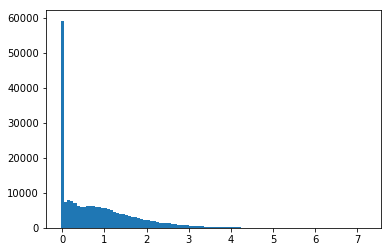

In [43]:
plt.hist(np.array(lst).mean(0).reshape([-1]),bins=100);

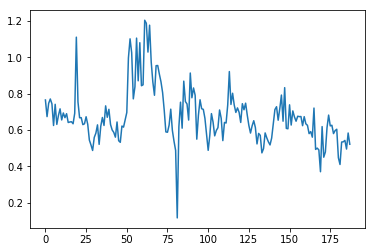

In [44]:
plt.plot(np.array(lst)[:,0,1200]);

In [45]:
for j in range(1680,1690):
    print j,np.nanmean(rawy[:,:,j],dtype=np.float),np.nanmean(y[:,:,j],dtype=np.float)

1680 1.68076379258 0.767920783369
1681 1.6817010969 0.767110917695
1682 1.62592518996 0.723749680765
1683 1.73977632686 0.821946088589
1684 1.71138398698 0.813116099178
1685 1.76363572066 0.845206885747
1686 1.69733310583 0.787718954939
1687 1.70009994492 0.789479112634
1688 nan 0.0
1689 nan 0.0


/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [46]:
for j in range(1680,1693):
    u=train_test[:,:,j]
    print j,np.nanmean(np.isnan(u),dtype=np.float),np.nanmean(u,dtype=np.float)

1680

 0.214113846231

 1.45569366925
1681

 0.215972096758

 1.4399343644
1682

 0.218039496136

 1.46008733325
1683

 0.218554024892

 1.45477503867
1684

 0.217169150858

 1.47259473553
1685

 0.21806044866

 1.46956621039
1686

 0.219308692161

 1.45837098191
1687

 0.220020701596

 1.40190137457
1688

 0.219921333936

 1.40553053683
1689

 0.45742948911

 1.29874254233
1690

 0.482186841313

 1.30320632441
1691

 0.499188748369

 1.32537504196
1692

 0.522750301114

 1.30877350593


In [47]:
np.mean(y[:,0,1688],dtype=np.float),np.mean(y[:,0,1686],dtype=np.float),np.mean(y[:,0,1687],dtype=np.float)

(0.0, 0.13274016203703703, 0.14341001157407407)

(54, 4100) 0.839836


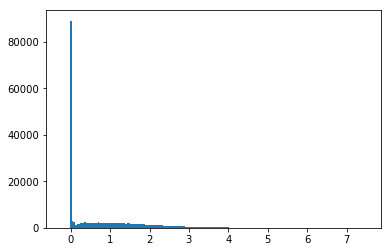

In [48]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1187]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.803012


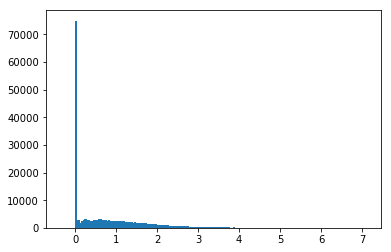

In [49]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1687]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.802833


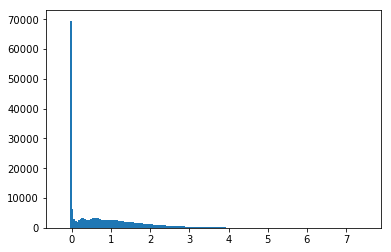

In [50]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.799385


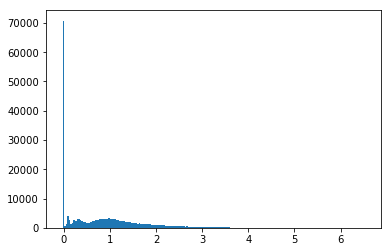

In [51]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1689]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

In [52]:
np.mean(isnan(train_test[:,:,1688]),dtype=np.float)

0.21992133393556157

In [53]:
np.mean(isnan(train_test[:,:,1687]),dtype=np.float)

0.22002070159590484

In [54]:
np.mean(isnan(train_test[:,:,1689]),dtype=np.float)

0.45742948910970593

(54, 4100) 0.802833


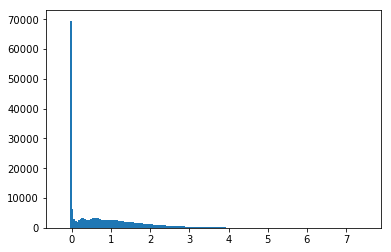

In [55]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);
pickle.dump(yy_pred3,open(a.name+".alt.pred",'wb'))

In [56]:
c=np.arange(60).reshape([3,4,5])

In [57]:
(c.reshape([-1,5]).reshape([3,4,5])==c).all()

True